In [1]:
import numpy as np
import copy # for copying internal variables in lists
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import parameters_MF_MB as PRM
import simulations_MF_MB as SIM
import analyzes_MF_MB as ALY
import figures_indiv as GRAPH_i
import figures_pop as GRAPH_p
import figure_qvalue_map as GRAPH_Qmap
# import importlib
# importlib.reload(SIM)

# Reloading modules automatically :
%load_ext autoreload
%autoreload 2

# Recover data

Notations :
- 'Data_' : raw data, i.e. number of actions taken by each individual on each trial.
- 'LC_' : summary statistics across individuals for each trial.
- 'PRF_' : summary statistics across trials for each individual.
- 'CV_' : convergence data (time to convergence, performance at convergence...)
- 'NonCV_': number of non converging individuals for each replay type.
- 'D', 'S' : deterministic and stochastic cases
- '0' :, '1', or nothing : phase of the simulation corresponding to the data, with respects to the change of reward state at trial 25 (nothing: full simulation, 0: before change, 1: after change).

In general, all files exist for the full simulation, before, and after the change in reward location.  
Exception: Only two files (0,1) exist for convergence data, as it only makes sense to compute convergence on separate phases of the simulations, on which the reward state is kept constant.

## Deterministic

In [2]:
Dl_D = SIM.recover_data('Dl_D')
Dg0_D = SIM.recover_data('Dg0_D')
Dl0_D, Dl1_D, params0, params1 = ALY.split_before_after_change(Dl_D) # recompute to update parameters

Models_D = SIM.recover_data('Model_D', df=False)

LCl_D = SIM.recover_data('LCl_D')

PRFl0_5f_D = SIM.recover_data('PRFl0_5f_D')
PRFl0_5l_D = SIM.recover_data('PRFl0_5l_D')
PRFl1_5f_D = SIM.recover_data('PRFl1_5f_D')
PRFl1_5l_D = SIM.recover_data('PRFl1_5l_D')
PRFg0_D = SIM.recover_data('PRFg0_D')

CVl0_D = SIM.recover_data('CVl0_D')
CVl1_D = SIM.recover_data('CVl1_D')
NonCVl0_D = SIM.recover_data('NonCVl0_D', df=False)
NonCVl1_D = SIM.recover_data('NonCVl1_D', df=False)

/media/esther/Data/Travail/Stages/Navigation/Codes/analyzes_MF_MB.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data1['Trial'] -= params['trial_change'] # reset trial numbers to start from 0


## Stochastic

In [3]:
Dl_S = SIM.recover_data('Dl_S')
Dg0_S = SIM.recover_data('Dg0_S')
Dl0_S, Dl1_S, params0, params1 = ALY.split_before_after_change(Dl_S)

Models_S = SIM.recover_data('Model_S', df=False)

LCl_S = SIM.recover_data('LCl_S')

PRFl0_5f_S = SIM.recover_data('PRFl0_5f_S')
PRFl0_5l_S = SIM.recover_data('PRFl0_5l_S')
PRFl1_5f_S = SIM.recover_data('PRFl1_5f_S')
PRFl1_5l_S = SIM.recover_data('PRFl1_5l_S')
PRFg0_S = SIM.recover_data('PRFg0_S')

CVl0_S = SIM.recover_data('CVl0_S')
CVl1_S = SIM.recover_data('CVl1_S')
NonCVl0_S = SIM.recover_data('NonCVl0_S', df=False)
NonCVl1_S = SIM.recover_data('NonCVl1_S', df=False)

## Data structure

In [4]:
print(PRM.params)

{'n_individuals': 100, 'n_trials': 50, 'n_individuals_sims': {'learning': 100, 'generalization': 100, 'fast_test': 10}, 'n_trials_sims': {'learning': 50, 'generalization': 6, 'fast_test': 10}, 'alpha': 0.8, 'beta': 15.0, 'gamma': 0.9, 'alpha_vals': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'beta_vals': {'learning': 15.0, 'generalization': 10.0, 'fast_test': 15.0}, 's_start': 35, 's_rw': 22, 'starting_points': {'learning': 35, 'generalization': [21, 34, 4], 'fast_test': 35}, 'reward_states': [22, 4], 'trial_change': 25, 'RSS': 90, 'RR': 20, 'n_seq_d': 6, 'RSS_d': 15, 'epsilon_d': 0.5, 'epsilon_p': 0.001, 'perc': 0.7, 'window': 5, 'n_types_replays': 5, 'replay_types': {0: 'No replay', 1: 'Backward replay', 2: 'Random replay', 3: 'Most diverse replay', 4: 'Prioritized sweeping', -1: 'Optimal policy'}, 'replay_refs': [0, 1, 2, 3, 4], 'nA': 8, 'nS': 36, 'state_coords': [(0.00320002, 0.0059351), (0.310727, 0.0241474), (0.593997, 0.152759), (0.724483, -0.118826), (0.9562

In [5]:
Dl0_D

Unnamed: 0  Replay type  Individual  Trial  Performance
0               0            0           0      0           83
1               1            0           0      1           51
2               2            0           0      2           62
3               3            0           0      3           93
4               4            0           0      4           37
...           ...          ...         ...    ...          ...
19970       19970            4          99     20           12
19971       19971            4          99     21            9
19972       19972            4          99     22            7
19973       19973            4          99     23           10
19974       19974            4          99     24           12

[10000 rows x 5 columns]

In [47]:
LCl_D

Unnamed: 0  Replay type  Trial    Mean        STD     Q1    Q2      Q3
0             0            0      0  111.43  86.463548  45.00  83.0  153.50
1             1            0      1   81.92  68.582896  34.75  52.5  109.75
2             2            0      2   73.34  65.092276  30.00  56.0   89.75
3             3            0      3   67.73  58.302977  24.75  49.5   97.00
4             4            0      4   48.99  44.187441  22.75  35.5   59.75
..          ...          ...    ...     ...        ...    ...   ...     ...
245         245            4     45   10.19   6.512595   6.00   8.0   11.00
246         246            4     46   10.14   8.392878   6.00   7.0   11.00
247         247            4     47    9.48   5.754094   6.00   7.0   11.00
248         248            4     48    9.68   6.502123   6.00   7.5   11.00
249         249            4     49    9.28   4.361376   6.00   8.0   11.00

[250 rows x 8 columns]

In [48]:
PRFl0_5f_D

Unnamed: 0  Replay type  Individual   Mean         STD
0             0            0           0   65.2   20.478281
1             1            0           1   70.0   31.112698
2             2            0           2  131.8  141.036733
3             3            0           3   33.0   15.165751
4             4            0           4  101.4   91.569864
..          ...          ...         ...    ...         ...
495         495            4          95   37.2   36.223749
496         496            4          96   31.8   34.330162
497         497            4          97   31.4   44.319747
498         498            4          98   54.8   87.151363
499         499            4          99   28.0   29.664794

[500 rows x 5 columns]

In [49]:
CVl0_D

Unnamed: 0  Replay type  Individual  Convergence trial  \
0             0            0           0                  6   
1             1            0           1                  5   
2             2            0           2                  5   
3             3            0           3                  5   
4             4            0           4                  5   
..          ...          ...         ...                ...   
495         495            4          95                  1   
496         496            4          96                  1   
497         497            4          97                  1   
498         498            4          98                  3   
499         499            4          99                  2   

     Performance at Convergence  Time to Convergence  
0                            16                  365  
1                            25                  375  
2                            36                  695  
3                            44                  209  
4                            19                  526  
..                          ...                  ...  
495                          25                  134  
496                          22                  122  
497                           9                  129  
498                          14                  259  
499                          13                  110  

[500 rows x 6 columns]

In [50]:
ALY.display_convergence(NonCVl0_D, NonCVl1_D, NonCVl0_S, NonCVl1_S)

Deterministic environment
Number of non-converging trials per type of replay:
Phase 0 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
Phase 1 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
---------------------------
Stochastic environment
Number of non-converging trials per type of replay:
Phase 0 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
Phase 1 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
---------------------------


# Learning curves

QUESTION : For the MB agent, is the performance due mainly to model-based learning, orrather to the type of replay ?  
It might be possible to compare only MB agents performing different types of replays, as 'backward', 'random' and 'most diverse' replays are not dependent on the learning algorithm (MF or MB).  
Moreover, it might be possible to extend 'prioritized sweeping' to MF agents, by considering as predecessors the states leading to the transition in the recent history.

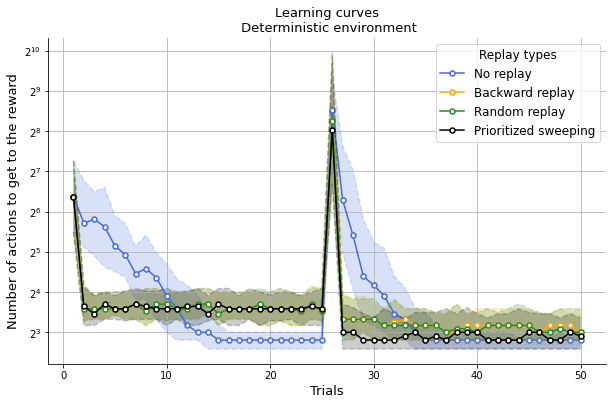

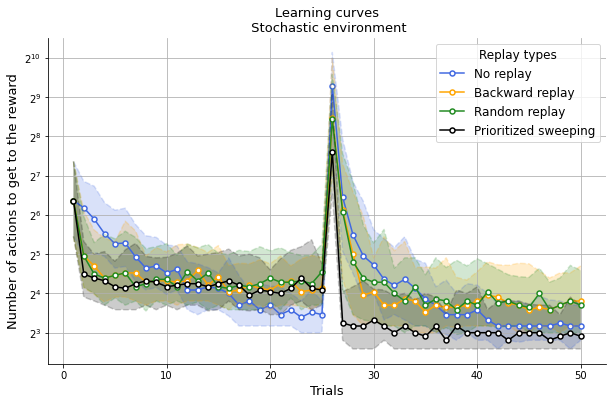

In [3]:
LCl_D = SIM.recover_data('LCl_D')
LCl_S = SIM.recover_data('LCl_S')
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]

mode = 'median'
log_scale = True
GRAPH_p.plot_learning_curves(LCl_D, mode=mode, log_scale=log_scale, deterministic=True, save=False, params=params)
GRAPH_p.plot_learning_curves(LCl_S, mode=mode, log_scale=log_scale, deterministic=False, save=False, params=params)

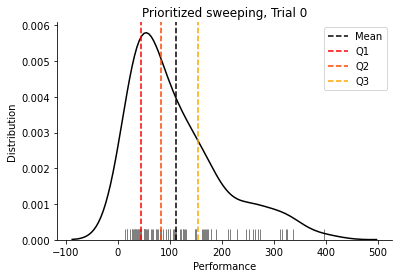

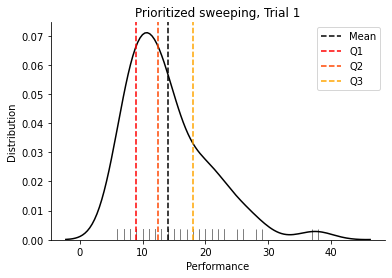

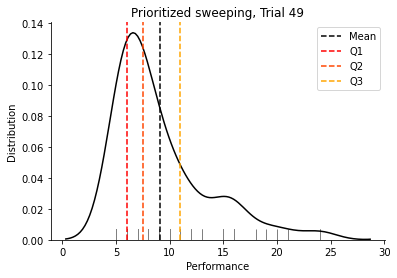

In [6]:
Dl_D = SIM.recover_data('Dl_D')
rep = 4
for t in [0,1,49]:
    GRAPH_p.plot_distribution_perf_trial(rep, t, Dl_D, LCl_D, params=params)

# Performance across the population

## Deterministic environment

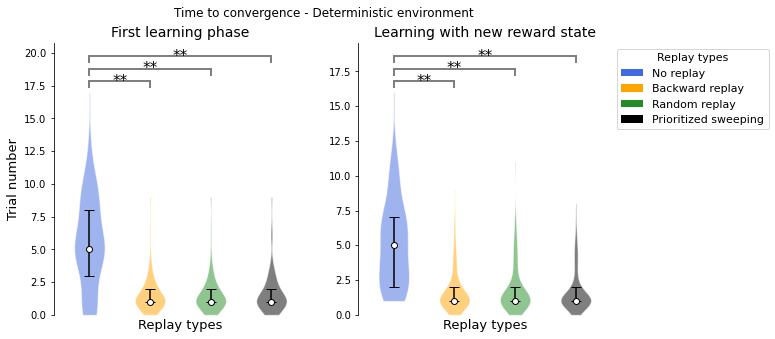

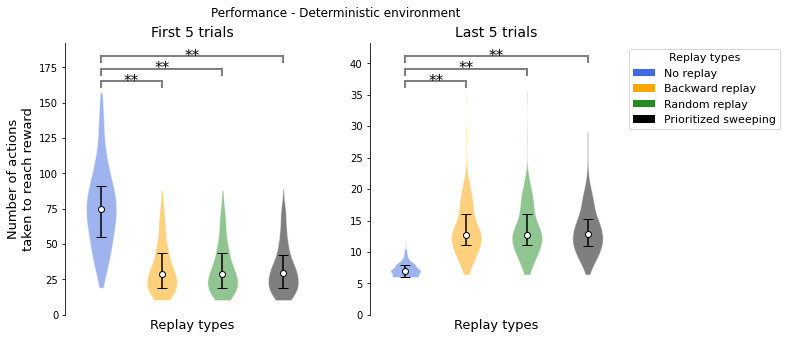

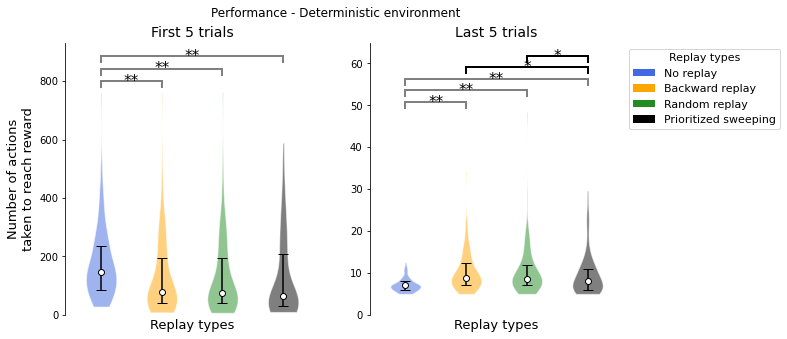

In [24]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]
CVl0_D = SIM.recover_data('CVl0_D')
CVl1_D = SIM.recover_data('CVl1_D')
NonCVl0_D = SIM.recover_data('NonCVl0_D', df=False)
NonCVl1_D = SIM.recover_data('NonCVl1_D', df=False)
PRFl0_5f_D = SIM.recover_data('PRFl0_5f_D')
PRFl0_5l_D = SIM.recover_data('PRFl0_5l_D')
PRFl1_5f_D = SIM.recover_data('PRFl1_5f_D')
PRFl1_5l_D = SIM.recover_data('PRFl1_5l_D')

log = False
GRAPH_p.plot_comparison(CVl0_D, CVl1_D, variable='conv', params=params)
GRAPH_p.plot_comparison(PRFl0_5f_D, PRFl0_5l_D, variable='perf', params=params, log=log)
GRAPH_p.plot_comparison(PRFl1_5f_D, PRFl1_5l_D, variable='perf', params=params, log=log)

In [17]:
test = 'kruskal'
print('>>> Time to convergence L0 <<<')
Hvalue, pvalue = ALY.test_groups(CVl0_D, 'Time to Convergence', params=params)
significant = ALY.test_pairwise(CVl0_D, 'Time to Convergence', params=params, test=test)
print('-------------------------------')
print('>>> Time to convergence L1 <<<')
Hvalue, pvalue = ALY.test_groups(CVl1_D, 'Time to Convergence', params=params)
significant = ALY.test_pairwise(CVl1_D, 'Time to Convergence', params=params, test=test)

>>> Time to convergence L0 <<<
Kruskal-Wallis result : H = 124.6120570882421, p-value = 7.834294026209563e-27 < 0.001
   G0  G1       Uvalue        pvalue
0   0   1       82.753  9.297557e-20
1   0   2       82.753  9.297557e-20
2   0   4      83.0872  7.851387e-20
3   1   2            0  1.000000e+00
4   1   4  0.000335869  9.853782e-01
5   2   4  0.000335869  9.853782e-01
Significant pairs : [(0, 1, 9.297556591411912e-20), (0, 2, 9.297556591411912e-20), (0, 4, 7.851386683738536e-20)]
-------------------------------
>>> Time to convergence L1 <<<
Kruskal-Wallis result : H = 31.835578310611865, p-value = 5.668116996274208e-07 < 0.001
   G0  G1      Uvalue    pvalue
0   0   1     18.8099  0.000014
1   0   2     18.5354  0.000017
2   0   4     23.3701  0.000001
3   1   2  0.00839622  0.926991
4   1   4     1.36983  0.241841
5   2   4     1.68022  0.194895
Significant pairs : [(0, 1, 1.4441349898202927e-05), (0, 2, 1.6677687987950633e-05), (0, 4, 1.3363978284757968e-06)]


In [55]:
print('>>> Performance L0 5 first <<<')
Hvalue, pvalue = ALY.test_groups(PRFl0_5f_D, 'Mean', params=params)
significant = ALY.test_pairwise(PRFl0_5f_D, 'Mean', params=params)
print('-------------------------------')
print('>>> Performance L0 5 last <<<')
Hvalue, pvalue = ALY.test_groups(PRFl0_5l_D, 'Mean', params=params)
significant = ALY.test_pairwise(PRFl0_5l_D, 'Mean', params=params)

>>> Performance L0 5 first <<<
Kruskal-Wallis result : H = 130.06207725755002, p-value = 5.244397776470168e-28 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1   -21160     0.0
1   0   2 -20809.5     0.0
2   0   4   -20563     0.0
3   1   2   -25636     0.0
4   1   4 -25440.5     0.0
5   2   4 -25672.5     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]
-------------------------------
>>> Performance L0 5 last <<<
Kruskal-Wallis result : H = 198.09203425577803, p-value = 1.0899608455255605e-42 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1 -17697.5     0.0
1   0   2 -17611.5     0.0
2   0   4   -16995     0.0
3   1   2   -27457     0.0
4   1   4 -26630.5     0.0
5   2   4 -27298.5     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]


In [56]:
print('>>> Performance L1 5 first <<<')
Hvalue, pvalue = ALY.test_groups(PRFl1_5f_D, 'Mean', params=params)
significant = ALY.test_pairwise(PRFl1_5f_D, 'Mean', params=params)
print('-------------------------------')
print('>>> Performance L1 5 last <<<')
Hvalue, pvalue = ALY.test_groups(PRFl1_5l_D, 'Mean', params=params)
significant = ALY.test_pairwise(PRFl1_5l_D, 'Mean', params=params)

>>> Performance L1 5 first <<<
Kruskal-Wallis result : H = 22.35971477814862, p-value = 5.490150679180134e-05 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1 -25282.5     0.0
1   0   2 -23284.5     0.0
2   0   4   -23179     0.0
3   1   2   -24424     0.0
4   1   4   -25479     0.0
5   2   4   -25835     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]
-------------------------------
>>> Performance L1 5 last <<<
Kruskal-Wallis result : H = 65.11172908053906, p-value = 4.747446339363547e-14 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1 -19084.5     0.0
1   0   2   -19234     0.0
2   0   4   -19878     0.0
3   1   2 -27062.5     0.0
4   1   4 -27305.5     0.0
5   2   4 -27818.5     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]


## Stochastic environment

Deterministic environment
Number of non-converging trials per type of replay:
Phase 0 {0: 0, 1: 0, 2: 0, 3: 100, 4: 0}
Phase 1 {0: 0, 1: 0, 2: 0, 3: 100, 4: 0}
---------------------------
Stochastic environment
Number of non-converging trials per type of replay:
Phase 0 {0: 2, 1: 2, 2: 1, 3: 100, 4: 8}
Phase 1 {0: 1, 1: 10, 2: 6, 3: 100, 4: 6}
---------------------------


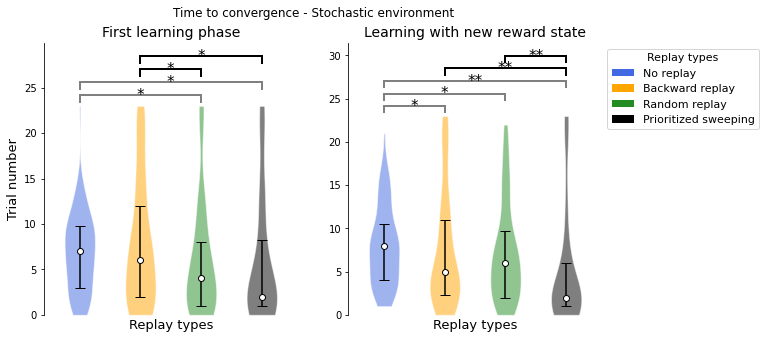

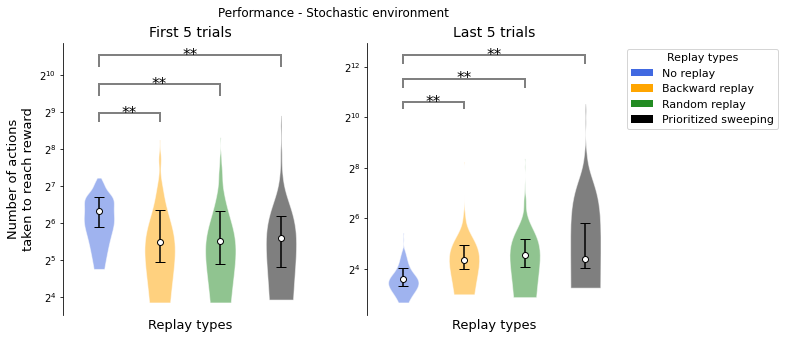

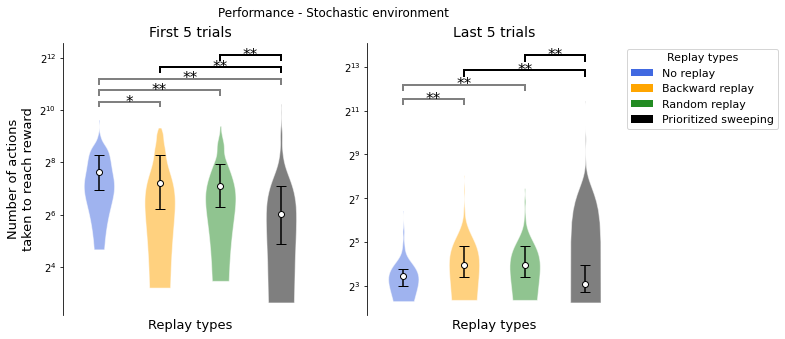

In [69]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]
CVl0_S = SIM.recover_data('CVl0_S')
CVl1_S = SIM.recover_data('CVl1_S')
NonCVl0_S = SIM.recover_data('NonCVl0_S', df=False)
NonCVl1_S = SIM.recover_data('NonCVl1_S', df=False)
PRFl0_5f_S = SIM.recover_data('PRFl0_5f_S')
PRFl0_5l_S = SIM.recover_data('PRFl0_5l_S')
PRFl1_5f_S = SIM.recover_data('PRFl1_5f_S')
PRFl1_5l_S = SIM.recover_data('PRFl1_5l_S')

ALY.display_convergence(NonCVl0_D, NonCVl1_D, NonCVl0_S, NonCVl1_S)
GRAPH_p.plot_comparison(CVl0_S, CVl1_S, variable='conv', params=params, deterministic=False)
GRAPH_p.plot_comparison(PRFl0_5f_S, PRFl0_5l_S, variable='perf', params=params, deterministic=False, log=True)
GRAPH_p.plot_comparison(PRFl1_5f_S, PRFl1_5l_S, variable='perf', params=params, deterministic=False, log=True)

In [58]:
test = 'kruskal'
print('>>> Time to convergence L0 <<<')
Hvalue, pvalue = ALY.test_groups(CVl0_S, 'Time to Convergence', params=params)
significant = ALY.test_pairwise(CVl0_S, 'Time to Convergence', params=params, test=test)
print('-------------------------------')
print('>>> Time to convergence L1 <<<')
Hvalue, pvalue = ALY.test_groups(CVl1_S, 'Time to Convergence', params=params)
significant = ALY.test_pairwise(CVl1_S, 'Time to Convergence', params=params, test=test)

>>> Time to convergence L0 <<<
Kruskal-Wallis result : H = 117.99184277641787, p-value = 2.0888053327134232e-25 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1  15479.6     0.0
1   0   2    15235     0.0
2   0   4  14849.9     0.0
3   1   2    16021     0.0
4   1   4  15751.4     0.0
5   2   4  16457.3     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]
-------------------------------
>>> Time to convergence L1 <<<
Kruskal-Wallis result : H = 25.822381014212016, p-value = 1.0389978995239571e-05 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1  15369.6     0.0
1   0   2  15254.8     0.0
2   0   4  15389.7     0.0
3   1   2    16392     0.0
4   1   4    16912     0.0
5   2   4    17895     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]


In [59]:
print('>>> Performance L0 5 first <<<')
Hvalue, pvalue = ALY.test_groups(PRFl0_5f_S, 'Mean', params=params)
significant = ALY.test_pairwise(PRFl0_5f_S, 'Mean', params=params)
print('-------------------------------')
print('>>> Performance L0 5 last <<<')
Hvalue, pvalue = ALY.test_groups(PRFl0_5l_S, 'Mean', params=params)
significant = ALY.test_pairwise(PRFl0_5l_S, 'Mean', params=params)

>>> Performance L0 5 first <<<
Kruskal-Wallis result : H = 130.06207725755002, p-value = 5.244397776470168e-28 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1   -21160     0.0
1   0   2 -20809.5     0.0
2   0   4   -20563     0.0
3   1   2   -25636     0.0
4   1   4 -25440.5     0.0
5   2   4 -25672.5     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]
-------------------------------
>>> Performance L0 5 last <<<
Kruskal-Wallis result : H = 198.09203425577803, p-value = 1.0899608455255605e-42 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1 -17697.5     0.0
1   0   2 -17611.5     0.0
2   0   4   -16995     0.0
3   1   2   -27457     0.0
4   1   4 -26630.5     0.0
5   2   4 -27298.5     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]


In [60]:
print('>>> Performance L1 5 first <<<')
Hvalue, pvalue = ALY.test_groups(PRFl1_5f_S, 'Mean', params=params)
significant = ALY.test_pairwise(PRFl1_5f_S, 'Mean', params=params)
print('-------------------------------')
print('>>> Performance L1 5 last <<<')
Hvalue, pvalue = ALY.test_groups(PRFl1_5l_S, 'Mean', params=params)
significant = ALY.test_pairwise(PRFl1_5l_S, 'Mean', params=params)

>>> Performance L1 5 first <<<
Kruskal-Wallis result : H = 22.35971477814862, p-value = 5.490150679180134e-05 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1 -25282.5     0.0
1   0   2 -23284.5     0.0
2   0   4   -23179     0.0
3   1   2   -24424     0.0
4   1   4   -25479     0.0
5   2   4   -25835     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]
-------------------------------
>>> Performance L1 5 last <<<
Kruskal-Wallis result : H = 65.11172908053906, p-value = 4.747446339363547e-14 < 0.001
   G0  G1   Uvalue  pvalue
0   0   1 -19084.5     0.0
1   0   2   -19234     0.0
2   0   4   -19878     0.0
3   1   2 -27062.5     0.0
4   1   4 -27305.5     0.0
5   2   4 -27818.5     0.0
Significant pairs : [(0, 1, 0.0), (0, 2, 0.0), (0, 4, 0.0), (1, 2, 0.0), (1, 4, 0.0), (2, 4, 0.0)]


## Correlations

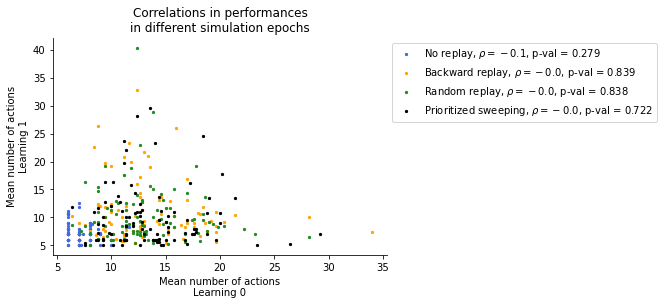

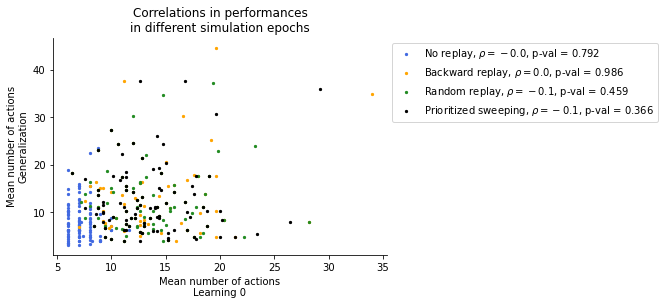

In [61]:
PRFl0_5l_D = SIM.recover_data('PRFl0_5l_D')
PRFl1_5l_D = SIM.recover_data('PRFl1_5l_D')
PRFg0_D = SIM.recover_data('PRFg0_D')

GRAPH_p.plot_correlations(PRFl0_5l_D, PRFl1_5l_D, label0='Mean number of actions\nLearning 0', label1='Mean number of actions\nLearning 1', title='Correlations in performances\nin different simulation epochs', params=params)
GRAPH_p.plot_correlations(PRFl0_5l_D, PRFg0_D, label0='Mean number of actions\nLearning 0', label1='Mean number of actions\nGeneralization', title='Correlations in performances\nin different simulation epochs', params=params)

# Q-value distributions

## Deterministic environment

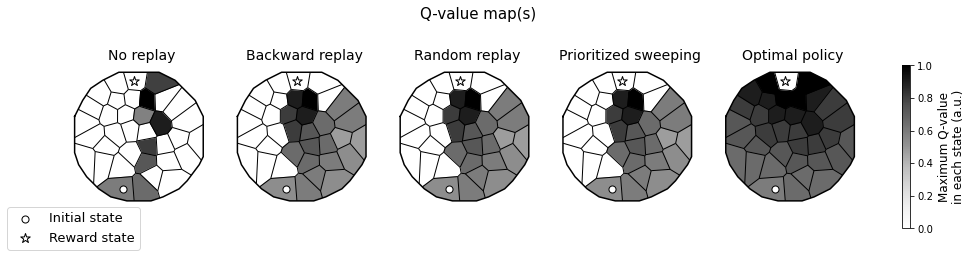

In [70]:
Models_D = SIM.recover_data('Model_D', df=False)
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]

i = 0
Q_dict = dict(zip(params['replay_refs'], [None for rep in params['replay_refs']]))
for rep in params['replay_refs']:
    Q = Models_D['Q'][rep][i]
    Q_dict[rep] = Q.copy()

Qopt_D = SIM.recover_data('Qopt_D', df=False)
params['replay_refs'].append(-1)
Q_dict[-1] = Qopt_D

GRAPH_Qmap.plot_Qvalues_map(Q_dict, deterministic=True, params=params)

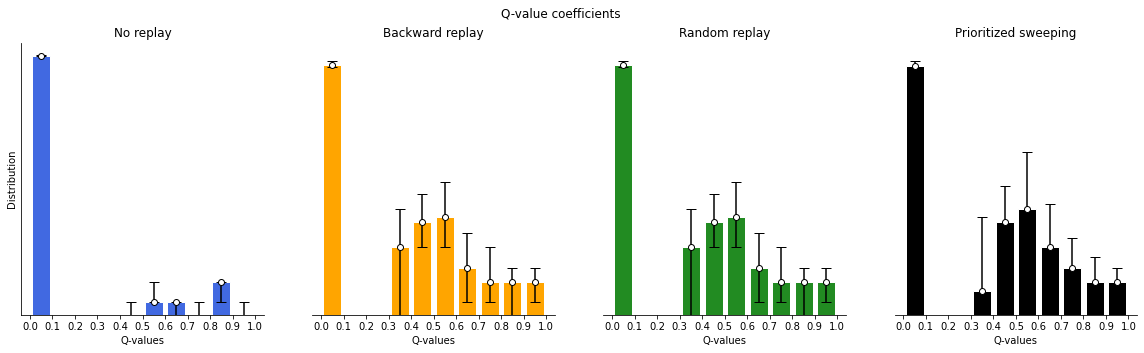

In [77]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]
H_D = SIM.recover_data('Hpop_D', df=False)
GRAPH_p.plot_Q_distributions_replays(H_D, params=params, log=True)

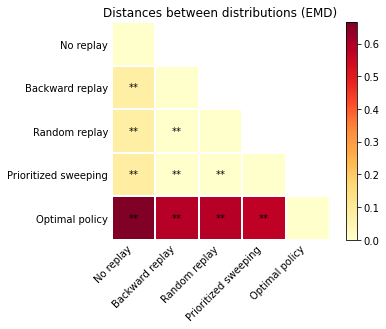

In [74]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]

EMD_D = SIM.recover_data('EMDpop_D', df=False)
Stat_emd_D = SIM.recover_data('StatEMD_D', df=False)

GRAPH_p.compare_distributions(EMD_D, Stat_emd_D, params=params)

## Stochastic environment

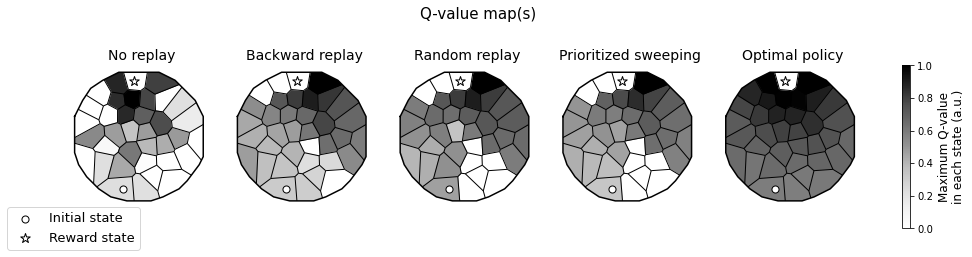

In [13]:
Models_S = SIM.recover_data('Model_S', df=False)
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]

i = 4
Q_dict = dict(zip(params['replay_refs'], [None for rep in params['replay_refs']]))
for rep in params['replay_refs']:
    Q = Models_S['Q'][rep][i]
    Q_dict[rep] = Q.copy()

Qopt_S = SIM.recover_data('Qopt_S', df=False)
params['replay_refs'].append(-1)
Q_dict[-1] = Qopt_S

GRAPH_Qmap.plot_Qvalues_map(Q_dict, deterministic=True, params=params)

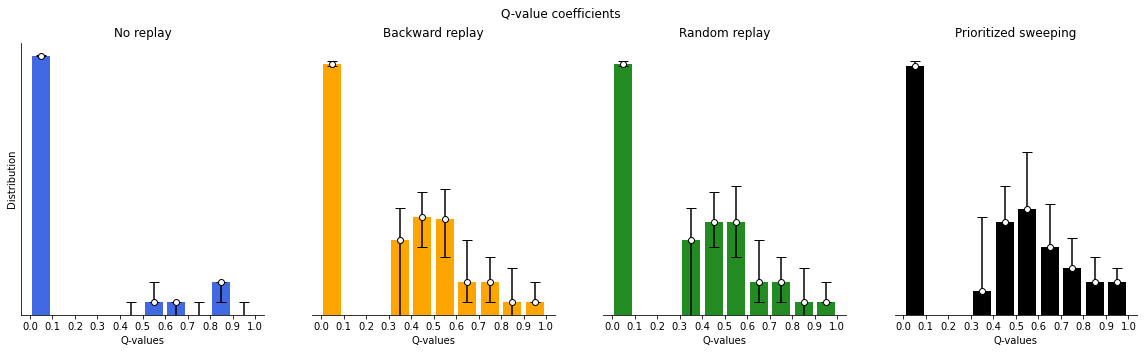

In [15]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]
H_D = SIM.recover_data('Hpop_D', df=False)
GRAPH_p.plot_Q_distributions_replays(H_D, params=params, log=True)

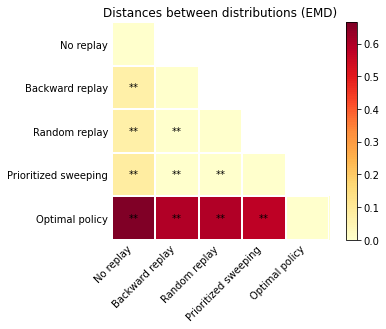

In [71]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]

EMD_D = SIM.recover_data('EMDpop_D', df=False)
Stat_emd_D = SIM.recover_data('StatEMD_D', df=False)

GRAPH_p.compare_distributions(EMD_D, Stat_emd_D, params=params)

# Individuals - Trajectories and Replays

It might be useful to test other rewarded locations, as the only one tested tends to be on the same side as the one most explored by the agents.  
In the most diverse sequence, it might be advantageous to also incorporate several trajectories from the first trial, instea of only the last steps of the desired length.

In [36]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]

Dl_indiv_D = SIM.recover_data('Dl_indiv_D', df=False)
Dl_indiv_S = SIM.recover_data('Dl_indiv_S', df=False)

LCl0_indiv_D = SIM.recover_data('LCl0_indiv_D')
LCl1_indiv_D = SIM.recover_data('LCl1_indiv_D')
LCl0_indiv_S = SIM.recover_data('LCl0_indiv_S')
LCl1_indiv_S = SIM.recover_data('LCl1_indiv_S')

LCl0_D = SIM.recover_data('LCl0_D')
LCl1_D = SIM.recover_data('LCl1_D')
LCl0_S = SIM.recover_data('LCl0_S')
LCl1_S = SIM.recover_data('LCl1_S')

## Representative Individual

Deterministic case


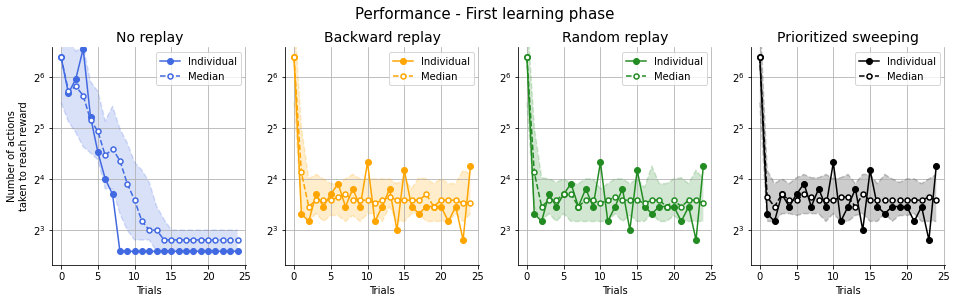

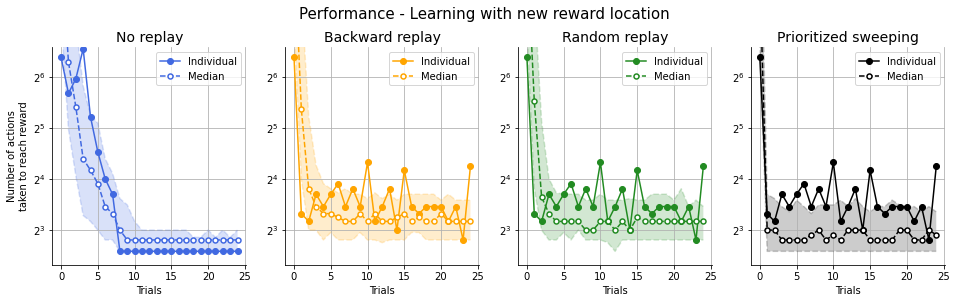

In [22]:
print('Deterministic case')
GRAPH_i.plot_performance_replays(LCl0_indiv_D, LCl0_D, epoch='l0', params=params)
GRAPH_i.plot_performance_replays(LCl1_indiv_D, LCl1_D, epoch='l1', params=params)

Stochastic case


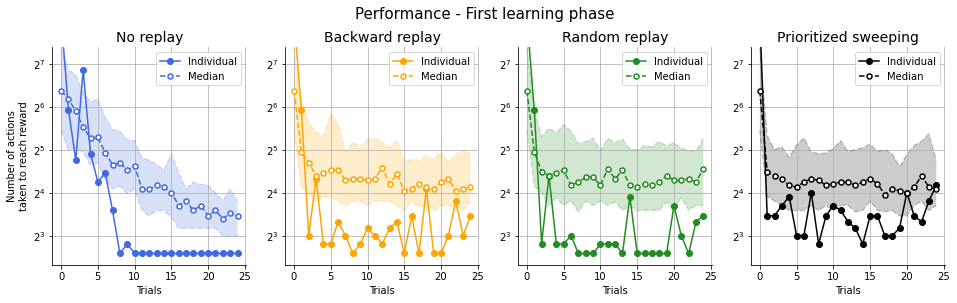

In [23]:
print('Stochastic case')
GRAPH_i.plot_performance_replays(LCl0_indiv_S, LCl0_S, epoch='l0', params=params)
GRAPH_i.plot_performance_replays(LCl1_indiv_S, LCl1_S, epoch='l1', params=params)

## Learning - Phase 0

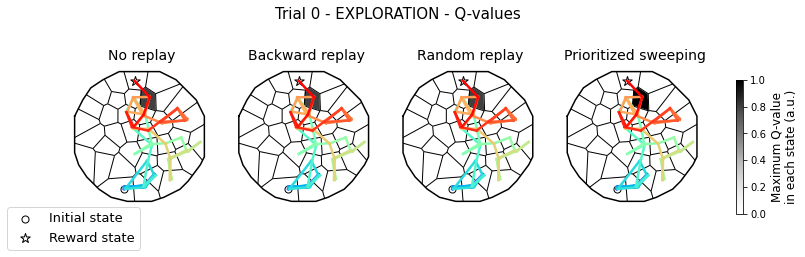

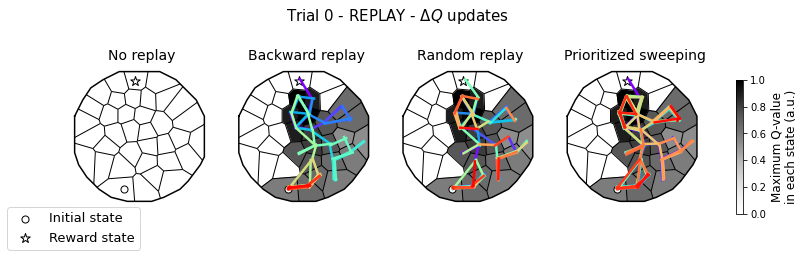

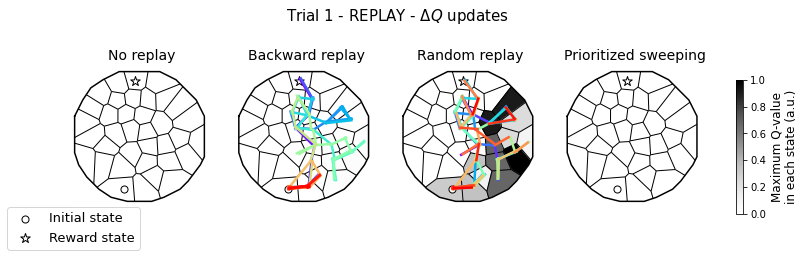

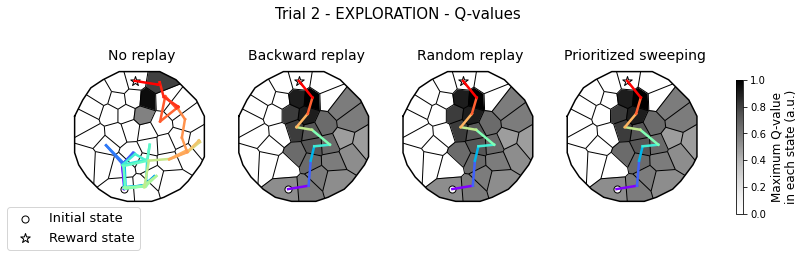

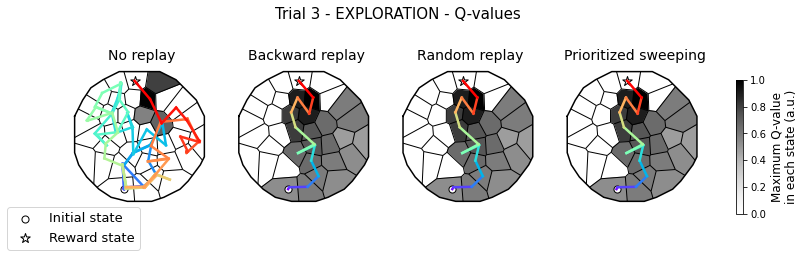

In [37]:
n_trials = 4
for t in range(n_trials):
    Q_rpls = Dl_indiv_D[t]['Q_explo']
    H_rpls = Dl_indiv_D[t]['h_explo']
    GRAPH_Qmap.plot_Qvalues_map(Q_rpls, H_rpls, deterministic=True, fig_title='Trial {} - EXPLORATION - Q-values'.format(t), params=params)
    Q_rpls = Dl_indiv_D[t]['Q_upd']
    H_rpls = Dl_indiv_D[t]['h_repl']
    GRAPH_Qmap.plot_Qvalues_map(Q_rpls, H_rpls, deterministic=True, fig_title=r'Trial {} - REPLAY - $\Delta Q$ updates'.format(t), params=params)

## Learning - Phase 1 (after change of reward state)

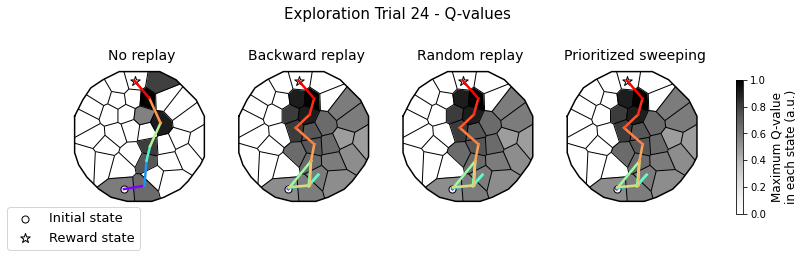

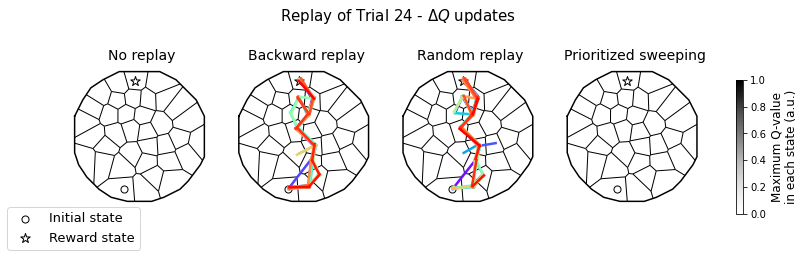

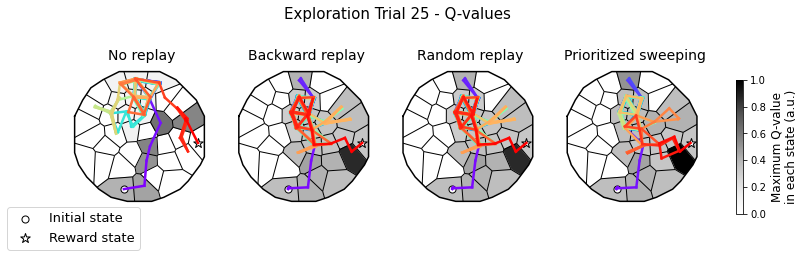

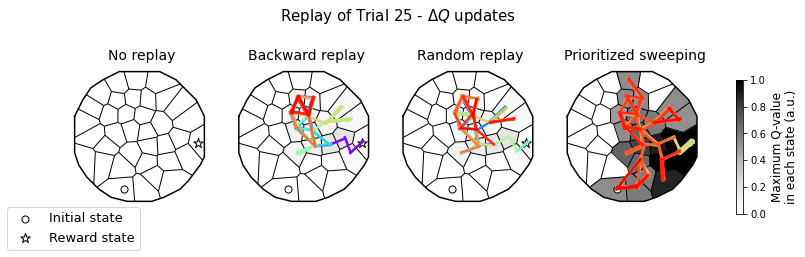

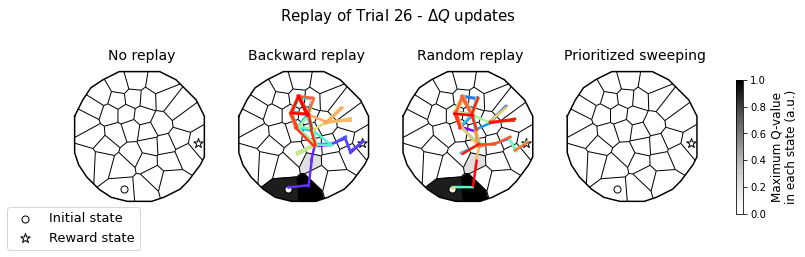

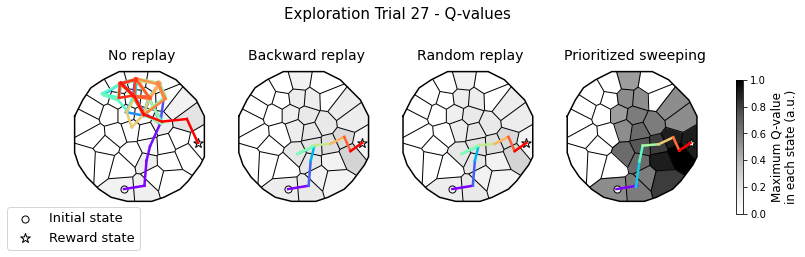

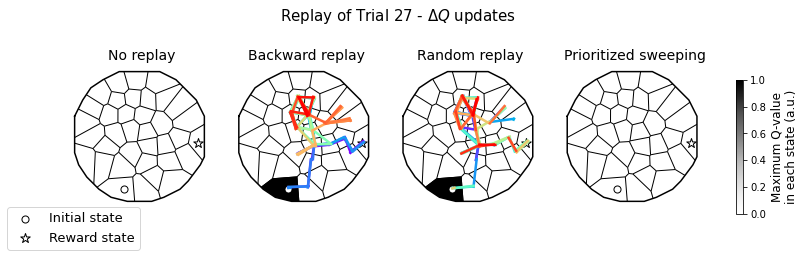

In [38]:
n_trials = 4
for t in range(24, 24+n_trials):
    if t == 24:
        r_state = 0
    else:
        r_state = 1
    Q_rpls = Dl_indiv_D[t]['Q_explo']
    H_rpls = Dl_indiv_D[t]['h_explo']
    GRAPH_Qmap.plot_Qvalues_map(Q_rpls, H_rpls, r_state=r_state, deterministic=True, fig_title='Exploration Trial {} - Q-values'.format(t), params=params)
    Q_rpls = Dl_indiv_D[t]['Q_upd']
    H_rpls = Dl_indiv_D[t]['h_repl']
    GRAPH_Qmap.plot_Qvalues_map(Q_rpls, H_rpls, r_state=r_state, deterministic=True, fig_title=r'Replay of Trial {} - $\Delta Q$ updates'.format(t), params=params)

# Optimization of the learning rate

WARNING : According to the formula, a model-based learning does not depend on $\alpha$.  
$Q(s,a) = R(s,a) + \gamma \sum\limits_{s'}T(s,a,s')\max_{u\in A}Q(s',u)$.  
This is also the case in Mehdi's code.  

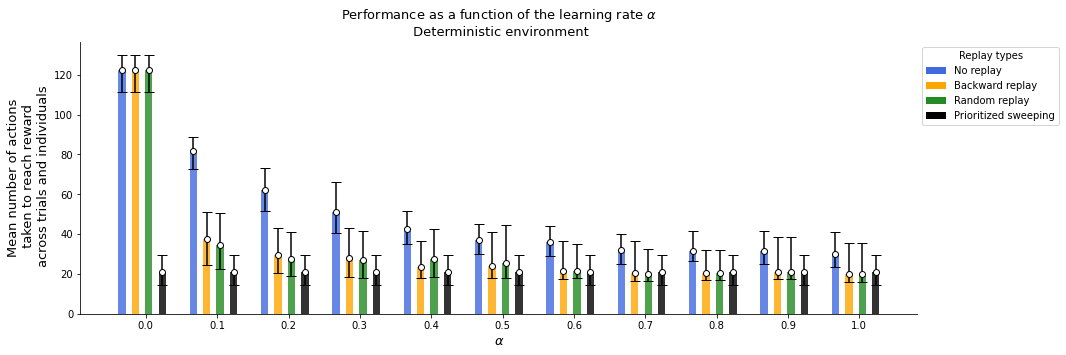

In [30]:
params = copy.deepcopy(PRM.params)
D_alpha_D = SIM.recover_data('D-alpha_D')
D_alpha_S = SIM.recover_data('D-alpha_S')
D_alpha_all = SIM.recover_data('D-alpha_summary')

params = PRM.set_replays(params, replay_refs=[0,1,2,4])
GRAPH_p.compare_alpha_values_replays(D_alpha_D, deterministic=True, params=params)

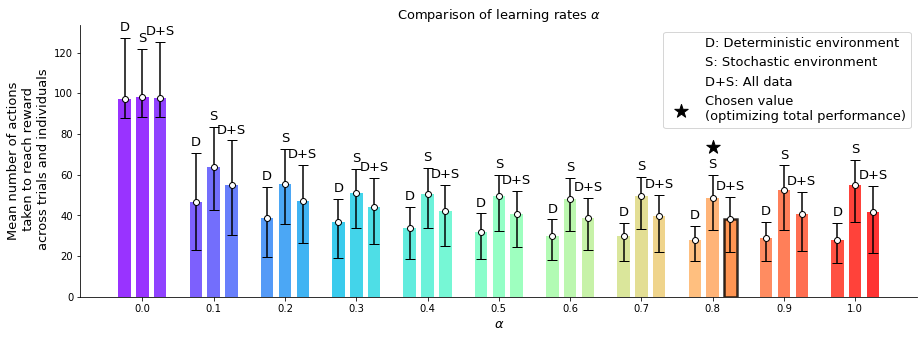

In [31]:
GRAPH_p.compare_alpha_det_stoch_all(D_alpha_all, params=params)

# Test of the number of replays

RR = 1, RSS = 10


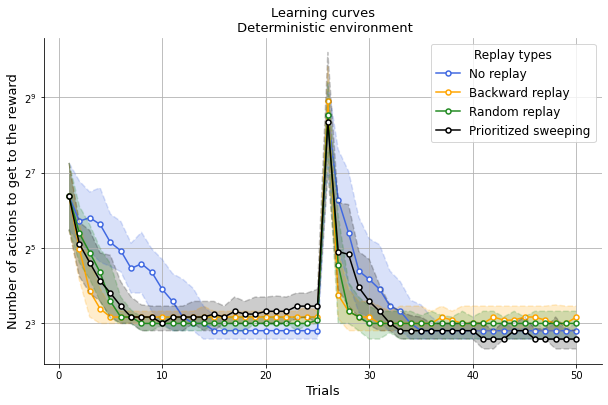

RR = 1, RSS = 50


RR = 1, RSS = 90


RR = 10, RSS = 10


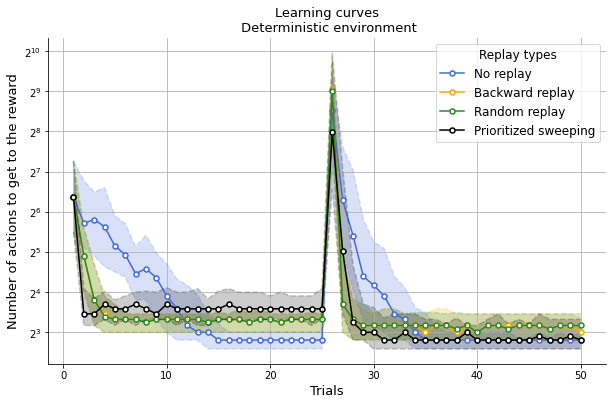

RR = 10, RSS = 50


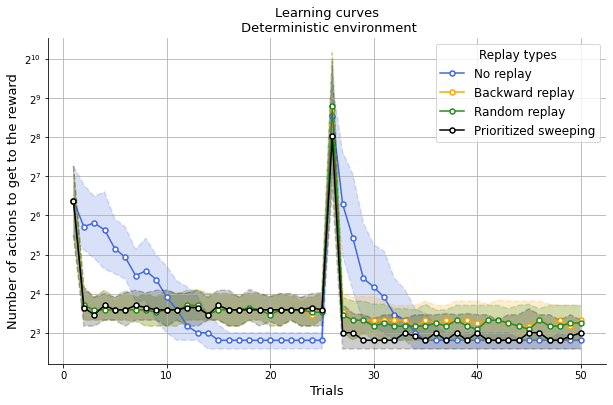

RR = 10, RSS = 90


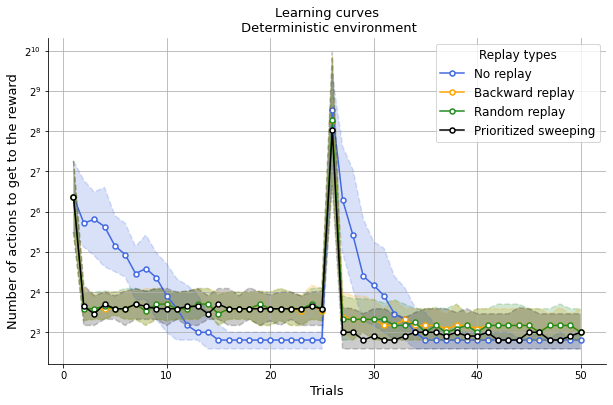

RR = 20, RSS = 10


RR = 20, RSS = 50


RR = 20, RSS = 90


In [42]:
path = '/R_tests/'
env = '_D'
for RR in [1, 10, 20]:
    for RSS in [10, 50, 90]:
        params = copy.deepcopy(PRM.params)
        params['RR'] = RR
        params['RSS'] = RSS
        params['replay_refs'] = [0,1,2,4]
        lab = '_RR{}_RSS{}'.format(RR, RSS)
        Data = SIM.recover_data(path+'Dl'+lab+env)
        Model = SIM.recover_data(path+'Model'+lab+env, df=False)
        LC = SIM.recover_data(path+'LCl'+lab+env)
        print('RR = {}, RSS = {}'.format(RR, RSS))
        GRAPH_p.plot_learning_curves(LC, deterministic=True, save=False, params=params)

In [95]:
DistMat = ALY.Frechet_distance_trajectories(4, deterministic=False, params=params)

Individual 0 T 0 0
Individual 0 T 0 1
Individual 0 T 0 2
Individual 0 T 0 3
Individual 0 T 0 4
Individual 0 T 0 5
Individual 0 T 0 6
Individual 0 T 0 7
Individual 0 T 0 8
Individual 0 T 0 9
Individual 0 T 0 10
Individual 0 T 0 11
Individual 0 T 0 12
Individual 0 T 0 13
Individual 0 T 0 14
Individual 0 T 0 15
Individual 0 T 0 16
Individual 0 T 0 17
Individual 0 T 0 18
Individual 0 T 0 19
Individual 0 T 0 20
Individual 0 T 0 21
Individual 0 T 0 22
Individual 0 T 0 23
Individual 0 T 0 24
Individual 0 T 0 25
Individual 0 T 0 26
Individual 0 T 0 27
Individual 0 T 0 28
Individual 0 T 0 29
Individual 0 T 0 30
Individual 0 T 0 31
Individual 0 T 0 32
Individual 0 T 0 33
Individual 0 T 0 34
Individual 0 T 0 35
Individual 0 T 0 36
Individual 0 T 0 37
Individual 0 T 0 38
Individual 0 T 0 39
Individual 0 T 0 40
Individual 0 T 0 41
Individual 0 T 0 42
Individual 0 T 0 43
Individual 0 T 0 44
Individual 0 T 0 45
Individual 0 T 0 46
Individual 0 T 0 47
Individual 0 T 0 48
Individual 0 T 0 49
Individual

Individual 0 T 10 19
Individual 0 T 10 20
Individual 0 T 10 21
Individual 0 T 10 22
Individual 0 T 10 23
Individual 0 T 10 24
Individual 0 T 10 25
Individual 0 T 10 26
Individual 0 T 10 27
Individual 0 T 10 28
Individual 0 T 10 29
Individual 0 T 10 30
Individual 0 T 10 31
Individual 0 T 10 32
Individual 0 T 10 33
Individual 0 T 10 34
Individual 0 T 10 35
Individual 0 T 10 36
Individual 0 T 10 37
Individual 0 T 10 38
Individual 0 T 10 39
Individual 0 T 10 40
Individual 0 T 10 41
Individual 0 T 10 42
Individual 0 T 10 43
Individual 0 T 10 44
Individual 0 T 10 45
Individual 0 T 10 46
Individual 0 T 10 47
Individual 0 T 10 48
Individual 0 T 10 49
Individual 0 T 11 11
Individual 0 T 11 12
Individual 0 T 11 13
Individual 0 T 11 14
Individual 0 T 11 15
Individual 0 T 11 16
Individual 0 T 11 17
Individual 0 T 11 18
Individual 0 T 11 19
Individual 0 T 11 20
Individual 0 T 11 21
Individual 0 T 11 22
Individual 0 T 11 23
Individual 0 T 11 24
Individual 0 T 11 25
Individual 0 T 11 26
Individual 0 

Individual 0 T 21 45
Individual 0 T 21 46
Individual 0 T 21 47
Individual 0 T 21 48
Individual 0 T 21 49
Individual 0 T 22 22
Individual 0 T 22 23
Individual 0 T 22 24
Individual 0 T 22 25
Individual 0 T 22 26
Individual 0 T 22 27
Individual 0 T 22 28
Individual 0 T 22 29
Individual 0 T 22 30
Individual 0 T 22 31
Individual 0 T 22 32
Individual 0 T 22 33
Individual 0 T 22 34
Individual 0 T 22 35
Individual 0 T 22 36
Individual 0 T 22 37
Individual 0 T 22 38
Individual 0 T 22 39
Individual 0 T 22 40
Individual 0 T 22 41
Individual 0 T 22 42
Individual 0 T 22 43
Individual 0 T 22 44
Individual 0 T 22 45
Individual 0 T 22 46
Individual 0 T 22 47
Individual 0 T 22 48
Individual 0 T 22 49
Individual 0 T 23 23
Individual 0 T 23 24
Individual 0 T 23 25
Individual 0 T 23 26
Individual 0 T 23 27
Individual 0 T 23 28
Individual 0 T 23 29
Individual 0 T 23 30
Individual 0 T 23 31
Individual 0 T 23 32
Individual 0 T 23 33
Individual 0 T 23 34
Individual 0 T 23 35
Individual 0 T 23 36
Individual 0 

Individual 1 T 0 0
Individual 1 T 0 1
Individual 1 T 0 2
Individual 1 T 0 3
Individual 1 T 0 4
Individual 1 T 0 5
Individual 1 T 0 6
Individual 1 T 0 7
Individual 1 T 0 8
Individual 1 T 0 9
Individual 1 T 0 10
Individual 1 T 0 11
Individual 1 T 0 12
Individual 1 T 0 13
Individual 1 T 0 14
Individual 1 T 0 15
Individual 1 T 0 16
Individual 1 T 0 17
Individual 1 T 0 18
Individual 1 T 0 19
Individual 1 T 0 20
Individual 1 T 0 21
Individual 1 T 0 22
Individual 1 T 0 23
Individual 1 T 0 24
Individual 1 T 0 25
Individual 1 T 0 26
Individual 1 T 0 27
Individual 1 T 0 28
Individual 1 T 0 29
Individual 1 T 0 30
Individual 1 T 0 31
Individual 1 T 0 32
Individual 1 T 0 33
Individual 1 T 0 34
Individual 1 T 0 35
Individual 1 T 0 36
Individual 1 T 0 37
Individual 1 T 0 38
Individual 1 T 0 39
Individual 1 T 0 40
Individual 1 T 0 41
Individual 1 T 0 42
Individual 1 T 0 43
Individual 1 T 0 44
Individual 1 T 0 45
Individual 1 T 0 46
Individual 1 T 0 47
Individual 1 T 0 48
Individual 1 T 0 49
Individual

Individual 1 T 9 36
Individual 1 T 9 37
Individual 1 T 9 38
Individual 1 T 9 39
Individual 1 T 9 40
Individual 1 T 9 41
Individual 1 T 9 42
Individual 1 T 9 43
Individual 1 T 9 44
Individual 1 T 9 45
Individual 1 T 9 46
Individual 1 T 9 47
Individual 1 T 9 48
Individual 1 T 9 49
Individual 1 T 10 10
Individual 1 T 10 11
Individual 1 T 10 12
Individual 1 T 10 13
Individual 1 T 10 14
Individual 1 T 10 15
Individual 1 T 10 16
Individual 1 T 10 17
Individual 1 T 10 18
Individual 1 T 10 19
Individual 1 T 10 20
Individual 1 T 10 21
Individual 1 T 10 22
Individual 1 T 10 23
Individual 1 T 10 24
Individual 1 T 10 25
Individual 1 T 10 26
Individual 1 T 10 27
Individual 1 T 10 28
Individual 1 T 10 29
Individual 1 T 10 30
Individual 1 T 10 31
Individual 1 T 10 32
Individual 1 T 10 33
Individual 1 T 10 34
Individual 1 T 10 35
Individual 1 T 10 36
Individual 1 T 10 37
Individual 1 T 10 38
Individual 1 T 10 39
Individual 1 T 10 40
Individual 1 T 10 41
Individual 1 T 10 42
Individual 1 T 10 43
Indivi

Individual 1 T 20 48
Individual 1 T 20 49
Individual 1 T 21 21
Individual 1 T 21 22
Individual 1 T 21 23
Individual 1 T 21 24
Individual 1 T 21 25
Individual 1 T 21 26
Individual 1 T 21 27
Individual 1 T 21 28
Individual 1 T 21 29
Individual 1 T 21 30
Individual 1 T 21 31
Individual 1 T 21 32
Individual 1 T 21 33
Individual 1 T 21 34
Individual 1 T 21 35
Individual 1 T 21 36
Individual 1 T 21 37
Individual 1 T 21 38
Individual 1 T 21 39
Individual 1 T 21 40
Individual 1 T 21 41
Individual 1 T 21 42
Individual 1 T 21 43
Individual 1 T 21 44
Individual 1 T 21 45
Individual 1 T 21 46
Individual 1 T 21 47
Individual 1 T 21 48
Individual 1 T 21 49
Individual 1 T 22 22
Individual 1 T 22 23
Individual 1 T 22 24
Individual 1 T 22 25
Individual 1 T 22 26
Individual 1 T 22 27
Individual 1 T 22 28
Individual 1 T 22 29
Individual 1 T 22 30
Individual 1 T 22 31
Individual 1 T 22 32
Individual 1 T 22 33
Individual 1 T 22 34
Individual 1 T 22 35
Individual 1 T 22 36
Individual 1 T 22 37
Individual 1 

Individual 1 T 42 46
Individual 1 T 42 47
Individual 1 T 42 48
Individual 1 T 42 49
Individual 1 T 43 43
Individual 1 T 43 44
Individual 1 T 43 45
Individual 1 T 43 46
Individual 1 T 43 47
Individual 1 T 43 48
Individual 1 T 43 49
Individual 1 T 44 44
Individual 1 T 44 45
Individual 1 T 44 46
Individual 1 T 44 47
Individual 1 T 44 48
Individual 1 T 44 49
Individual 1 T 45 45
Individual 1 T 45 46
Individual 1 T 45 47
Individual 1 T 45 48
Individual 1 T 45 49
Individual 1 T 46 46
Individual 1 T 46 47
Individual 1 T 46 48
Individual 1 T 46 49
Individual 1 T 47 47
Individual 1 T 47 48
Individual 1 T 47 49
Individual 1 T 48 48
Individual 1 T 48 49
Individual 1 T 49 49
Individual 2 T 0 0
Individual 2 T 0 1
Individual 2 T 0 2
Individual 2 T 0 3
Individual 2 T 0 4
Individual 2 T 0 5
Individual 2 T 0 6
Individual 2 T 0 7
Individual 2 T 0 8
Individual 2 T 0 9
Individual 2 T 0 10
Individual 2 T 0 11
Individual 2 T 0 12
Individual 2 T 0 13
Individual 2 T 0 14
Individual 2 T 0 15
Individual 2 T 0 1

Individual 2 T 9 14
Individual 2 T 9 15
Individual 2 T 9 16
Individual 2 T 9 17
Individual 2 T 9 18
Individual 2 T 9 19
Individual 2 T 9 20
Individual 2 T 9 21
Individual 2 T 9 22
Individual 2 T 9 23
Individual 2 T 9 24
Individual 2 T 9 25
Individual 2 T 9 26
Individual 2 T 9 27
Individual 2 T 9 28
Individual 2 T 9 29
Individual 2 T 9 30
Individual 2 T 9 31
Individual 2 T 9 32
Individual 2 T 9 33
Individual 2 T 9 34
Individual 2 T 9 35
Individual 2 T 9 36
Individual 2 T 9 37
Individual 2 T 9 38
Individual 2 T 9 39
Individual 2 T 9 40
Individual 2 T 9 41
Individual 2 T 9 42
Individual 2 T 9 43
Individual 2 T 9 44
Individual 2 T 9 45
Individual 2 T 9 46
Individual 2 T 9 47
Individual 2 T 9 48
Individual 2 T 9 49
Individual 2 T 10 10
Individual 2 T 10 11
Individual 2 T 10 12
Individual 2 T 10 13
Individual 2 T 10 14
Individual 2 T 10 15
Individual 2 T 10 16
Individual 2 T 10 17
Individual 2 T 10 18
Individual 2 T 10 19
Individual 2 T 10 20
Individual 2 T 10 21
Individual 2 T 10 22
Individ

Individual 2 T 21 49
Individual 2 T 22 22
Individual 2 T 22 23
Individual 2 T 22 24
Individual 2 T 22 25
Individual 2 T 22 26
Individual 2 T 22 27
Individual 2 T 22 28
Individual 2 T 22 29
Individual 2 T 22 30
Individual 2 T 22 31
Individual 2 T 22 32
Individual 2 T 22 33
Individual 2 T 22 34
Individual 2 T 22 35
Individual 2 T 22 36
Individual 2 T 22 37
Individual 2 T 22 38
Individual 2 T 22 39
Individual 2 T 22 40
Individual 2 T 22 41
Individual 2 T 22 42
Individual 2 T 22 43
Individual 2 T 22 44
Individual 2 T 22 45
Individual 2 T 22 46
Individual 2 T 22 47
Individual 2 T 22 48
Individual 2 T 22 49
Individual 2 T 23 23
Individual 2 T 23 24
Individual 2 T 23 25
Individual 2 T 23 26
Individual 2 T 23 27
Individual 2 T 23 28
Individual 2 T 23 29
Individual 2 T 23 30
Individual 2 T 23 31
Individual 2 T 23 32
Individual 2 T 23 33
Individual 2 T 23 34
Individual 2 T 23 35
Individual 2 T 23 36
Individual 2 T 23 37
Individual 2 T 23 38
Individual 2 T 23 39
Individual 2 T 23 40
Individual 2 

Individual 3 T 0 2
Individual 3 T 0 3
Individual 3 T 0 4
Individual 3 T 0 5
Individual 3 T 0 6
Individual 3 T 0 7
Individual 3 T 0 8
Individual 3 T 0 9
Individual 3 T 0 10
Individual 3 T 0 11
Individual 3 T 0 12
Individual 3 T 0 13
Individual 3 T 0 14
Individual 3 T 0 15
Individual 3 T 0 16
Individual 3 T 0 17
Individual 3 T 0 18
Individual 3 T 0 19
Individual 3 T 0 20
Individual 3 T 0 21
Individual 3 T 0 22
Individual 3 T 0 23
Individual 3 T 0 24
Individual 3 T 0 25
Individual 3 T 0 26
Individual 3 T 0 27
Individual 3 T 0 28
Individual 3 T 0 29
Individual 3 T 0 30
Individual 3 T 0 31
Individual 3 T 0 32
Individual 3 T 0 33
Individual 3 T 0 34
Individual 3 T 0 35
Individual 3 T 0 36
Individual 3 T 0 37
Individual 3 T 0 38
Individual 3 T 0 39
Individual 3 T 0 40
Individual 3 T 0 41
Individual 3 T 0 42
Individual 3 T 0 43
Individual 3 T 0 44
Individual 3 T 0 45
Individual 3 T 0 46
Individual 3 T 0 47
Individual 3 T 0 48
Individual 3 T 0 49
Individual 3 T 1 1
Individual 3 T 1 2
Individual

Individual 3 T 9 13
Individual 3 T 9 14
Individual 3 T 9 15
Individual 3 T 9 16
Individual 3 T 9 17
Individual 3 T 9 18
Individual 3 T 9 19
Individual 3 T 9 20
Individual 3 T 9 21
Individual 3 T 9 22
Individual 3 T 9 23
Individual 3 T 9 24
Individual 3 T 9 25
Individual 3 T 9 26
Individual 3 T 9 27
Individual 3 T 9 28
Individual 3 T 9 29
Individual 3 T 9 30
Individual 3 T 9 31
Individual 3 T 9 32
Individual 3 T 9 33
Individual 3 T 9 34
Individual 3 T 9 35
Individual 3 T 9 36
Individual 3 T 9 37
Individual 3 T 9 38
Individual 3 T 9 39
Individual 3 T 9 40
Individual 3 T 9 41
Individual 3 T 9 42
Individual 3 T 9 43
Individual 3 T 9 44
Individual 3 T 9 45
Individual 3 T 9 46
Individual 3 T 9 47
Individual 3 T 9 48
Individual 3 T 9 49
Individual 3 T 10 10
Individual 3 T 10 11
Individual 3 T 10 12
Individual 3 T 10 13
Individual 3 T 10 14
Individual 3 T 10 15
Individual 3 T 10 16
Individual 3 T 10 17
Individual 3 T 10 18
Individual 3 T 10 19
Individual 3 T 10 20
Individual 3 T 10 21
Individu

Individual 3 T 20 25
Individual 3 T 20 26
Individual 3 T 20 27
Individual 3 T 20 28
Individual 3 T 20 29
Individual 3 T 20 30
Individual 3 T 20 31
Individual 3 T 20 32
Individual 3 T 20 33
Individual 3 T 20 34
Individual 3 T 20 35
Individual 3 T 20 36
Individual 3 T 20 37
Individual 3 T 20 38
Individual 3 T 20 39
Individual 3 T 20 40
Individual 3 T 20 41
Individual 3 T 20 42
Individual 3 T 20 43
Individual 3 T 20 44
Individual 3 T 20 45
Individual 3 T 20 46
Individual 3 T 20 47
Individual 3 T 20 48
Individual 3 T 20 49
Individual 3 T 21 21
Individual 3 T 21 22
Individual 3 T 21 23
Individual 3 T 21 24
Individual 3 T 21 25
Individual 3 T 21 26
Individual 3 T 21 27
Individual 3 T 21 28
Individual 3 T 21 29
Individual 3 T 21 30
Individual 3 T 21 31
Individual 3 T 21 32
Individual 3 T 21 33
Individual 3 T 21 34
Individual 3 T 21 35
Individual 3 T 21 36
Individual 3 T 21 37
Individual 3 T 21 38
Individual 3 T 21 39
Individual 3 T 21 40
Individual 3 T 21 41
Individual 3 T 21 42
Individual 3 

Individual 3 T 39 39
Individual 3 T 39 40
Individual 3 T 39 41
Individual 3 T 39 42
Individual 3 T 39 43
Individual 3 T 39 44
Individual 3 T 39 45
Individual 3 T 39 46
Individual 3 T 39 47
Individual 3 T 39 48
Individual 3 T 39 49
Individual 3 T 40 40
Individual 3 T 40 41
Individual 3 T 40 42
Individual 3 T 40 43
Individual 3 T 40 44
Individual 3 T 40 45
Individual 3 T 40 46
Individual 3 T 40 47
Individual 3 T 40 48
Individual 3 T 40 49
Individual 3 T 41 41
Individual 3 T 41 42
Individual 3 T 41 43
Individual 3 T 41 44
Individual 3 T 41 45
Individual 3 T 41 46
Individual 3 T 41 47
Individual 3 T 41 48
Individual 3 T 41 49
Individual 3 T 42 42
Individual 3 T 42 43
Individual 3 T 42 44
Individual 3 T 42 45
Individual 3 T 42 46
Individual 3 T 42 47
Individual 3 T 42 48
Individual 3 T 42 49
Individual 3 T 43 43
Individual 3 T 43 44
Individual 3 T 43 45
Individual 3 T 43 46
Individual 3 T 43 47
Individual 3 T 43 48
Individual 3 T 43 49
Individual 3 T 44 44
Individual 3 T 44 45
Individual 3 

Individual 4 T 7 30
Individual 4 T 7 31
Individual 4 T 7 32
Individual 4 T 7 33
Individual 4 T 7 34
Individual 4 T 7 35
Individual 4 T 7 36
Individual 4 T 7 37
Individual 4 T 7 38
Individual 4 T 7 39
Individual 4 T 7 40
Individual 4 T 7 41
Individual 4 T 7 42
Individual 4 T 7 43
Individual 4 T 7 44
Individual 4 T 7 45
Individual 4 T 7 46
Individual 4 T 7 47
Individual 4 T 7 48
Individual 4 T 7 49
Individual 4 T 8 8
Individual 4 T 8 9
Individual 4 T 8 10
Individual 4 T 8 11
Individual 4 T 8 12
Individual 4 T 8 13
Individual 4 T 8 14
Individual 4 T 8 15
Individual 4 T 8 16
Individual 4 T 8 17
Individual 4 T 8 18
Individual 4 T 8 19
Individual 4 T 8 20
Individual 4 T 8 21
Individual 4 T 8 22
Individual 4 T 8 23
Individual 4 T 8 24
Individual 4 T 8 25
Individual 4 T 8 26
Individual 4 T 8 27
Individual 4 T 8 28
Individual 4 T 8 29
Individual 4 T 8 30
Individual 4 T 8 31
Individual 4 T 8 32
Individual 4 T 8 33
Individual 4 T 8 34
Individual 4 T 8 35
Individual 4 T 8 36
Individual 4 T 8 37
In

Individual 4 T 19 25
Individual 4 T 19 26
Individual 4 T 19 27
Individual 4 T 19 28
Individual 4 T 19 29
Individual 4 T 19 30
Individual 4 T 19 31
Individual 4 T 19 32
Individual 4 T 19 33
Individual 4 T 19 34
Individual 4 T 19 35
Individual 4 T 19 36
Individual 4 T 19 37
Individual 4 T 19 38
Individual 4 T 19 39
Individual 4 T 19 40
Individual 4 T 19 41
Individual 4 T 19 42
Individual 4 T 19 43
Individual 4 T 19 44
Individual 4 T 19 45
Individual 4 T 19 46
Individual 4 T 19 47
Individual 4 T 19 48
Individual 4 T 19 49
Individual 4 T 20 20
Individual 4 T 20 21
Individual 4 T 20 22
Individual 4 T 20 23
Individual 4 T 20 24
Individual 4 T 20 25
Individual 4 T 20 26
Individual 4 T 20 27
Individual 4 T 20 28
Individual 4 T 20 29
Individual 4 T 20 30
Individual 4 T 20 31
Individual 4 T 20 32
Individual 4 T 20 33
Individual 4 T 20 34
Individual 4 T 20 35
Individual 4 T 20 36
Individual 4 T 20 37
Individual 4 T 20 38
Individual 4 T 20 39
Individual 4 T 20 40
Individual 4 T 20 41
Individual 4 

Individual 4 T 39 44
Individual 4 T 39 45
Individual 4 T 39 46
Individual 4 T 39 47
Individual 4 T 39 48
Individual 4 T 39 49
Individual 4 T 40 40
Individual 4 T 40 41
Individual 4 T 40 42
Individual 4 T 40 43
Individual 4 T 40 44
Individual 4 T 40 45
Individual 4 T 40 46
Individual 4 T 40 47
Individual 4 T 40 48
Individual 4 T 40 49
Individual 4 T 41 41
Individual 4 T 41 42
Individual 4 T 41 43
Individual 4 T 41 44
Individual 4 T 41 45
Individual 4 T 41 46
Individual 4 T 41 47
Individual 4 T 41 48
Individual 4 T 41 49
Individual 4 T 42 42
Individual 4 T 42 43
Individual 4 T 42 44
Individual 4 T 42 45
Individual 4 T 42 46
Individual 4 T 42 47
Individual 4 T 42 48
Individual 4 T 42 49
Individual 4 T 43 43
Individual 4 T 43 44
Individual 4 T 43 45
Individual 4 T 43 46
Individual 4 T 43 47
Individual 4 T 43 48
Individual 4 T 43 49
Individual 4 T 44 44
Individual 4 T 44 45
Individual 4 T 44 46
Individual 4 T 44 47
Individual 4 T 44 48
Individual 4 T 44 49
Individual 4 T 45 45
Individual 4 

Individual 5 T 8 25
Individual 5 T 8 26
Individual 5 T 8 27
Individual 5 T 8 28
Individual 5 T 8 29
Individual 5 T 8 30
Individual 5 T 8 31
Individual 5 T 8 32
Individual 5 T 8 33
Individual 5 T 8 34
Individual 5 T 8 35
Individual 5 T 8 36
Individual 5 T 8 37
Individual 5 T 8 38
Individual 5 T 8 39
Individual 5 T 8 40
Individual 5 T 8 41
Individual 5 T 8 42
Individual 5 T 8 43
Individual 5 T 8 44
Individual 5 T 8 45
Individual 5 T 8 46
Individual 5 T 8 47
Individual 5 T 8 48
Individual 5 T 8 49
Individual 5 T 9 9
Individual 5 T 9 10
Individual 5 T 9 11
Individual 5 T 9 12
Individual 5 T 9 13
Individual 5 T 9 14
Individual 5 T 9 15
Individual 5 T 9 16
Individual 5 T 9 17
Individual 5 T 9 18
Individual 5 T 9 19
Individual 5 T 9 20
Individual 5 T 9 21
Individual 5 T 9 22
Individual 5 T 9 23
Individual 5 T 9 24
Individual 5 T 9 25
Individual 5 T 9 26
Individual 5 T 9 27
Individual 5 T 9 28
Individual 5 T 9 29
Individual 5 T 9 30
Individual 5 T 9 31
Individual 5 T 9 32
Individual 5 T 9 33
I

Individual 5 T 20 20
Individual 5 T 20 21
Individual 5 T 20 22
Individual 5 T 20 23
Individual 5 T 20 24
Individual 5 T 20 25
Individual 5 T 20 26
Individual 5 T 20 27
Individual 5 T 20 28
Individual 5 T 20 29
Individual 5 T 20 30
Individual 5 T 20 31
Individual 5 T 20 32
Individual 5 T 20 33
Individual 5 T 20 34
Individual 5 T 20 35
Individual 5 T 20 36
Individual 5 T 20 37
Individual 5 T 20 38
Individual 5 T 20 39
Individual 5 T 20 40
Individual 5 T 20 41
Individual 5 T 20 42
Individual 5 T 20 43
Individual 5 T 20 44
Individual 5 T 20 45
Individual 5 T 20 46
Individual 5 T 20 47
Individual 5 T 20 48
Individual 5 T 20 49
Individual 5 T 21 21
Individual 5 T 21 22
Individual 5 T 21 23
Individual 5 T 21 24
Individual 5 T 21 25
Individual 5 T 21 26
Individual 5 T 21 27
Individual 5 T 21 28
Individual 5 T 21 29
Individual 5 T 21 30
Individual 5 T 21 31
Individual 5 T 21 32
Individual 5 T 21 33
Individual 5 T 21 34
Individual 5 T 21 35
Individual 5 T 21 36
Individual 5 T 21 37
Individual 5 

Individual 6 T 0 0
Individual 6 T 0 1
Individual 6 T 0 2
Individual 6 T 0 3
Individual 6 T 0 4
Individual 6 T 0 5
Individual 6 T 0 6
Individual 6 T 0 7
Individual 6 T 0 8
Individual 6 T 0 9
Individual 6 T 0 10
Individual 6 T 0 11
Individual 6 T 0 12
Individual 6 T 0 13
Individual 6 T 0 14
Individual 6 T 0 15
Individual 6 T 0 16
Individual 6 T 0 17
Individual 6 T 0 18
Individual 6 T 0 19
Individual 6 T 0 20
Individual 6 T 0 21
Individual 6 T 0 22
Individual 6 T 0 23
Individual 6 T 0 24
Individual 6 T 0 25
Individual 6 T 0 26
Individual 6 T 0 27
Individual 6 T 0 28
Individual 6 T 0 29
Individual 6 T 0 30
Individual 6 T 0 31
Individual 6 T 0 32
Individual 6 T 0 33
Individual 6 T 0 34
Individual 6 T 0 35
Individual 6 T 0 36
Individual 6 T 0 37
Individual 6 T 0 38
Individual 6 T 0 39
Individual 6 T 0 40
Individual 6 T 0 41
Individual 6 T 0 42
Individual 6 T 0 43
Individual 6 T 0 44
Individual 6 T 0 45
Individual 6 T 0 46
Individual 6 T 0 47
Individual 6 T 0 48
Individual 6 T 0 49
Individual

Individual 6 T 9 25
Individual 6 T 9 26
Individual 6 T 9 27
Individual 6 T 9 28
Individual 6 T 9 29
Individual 6 T 9 30
Individual 6 T 9 31
Individual 6 T 9 32
Individual 6 T 9 33
Individual 6 T 9 34
Individual 6 T 9 35
Individual 6 T 9 36
Individual 6 T 9 37
Individual 6 T 9 38
Individual 6 T 9 39
Individual 6 T 9 40
Individual 6 T 9 41
Individual 6 T 9 42
Individual 6 T 9 43
Individual 6 T 9 44
Individual 6 T 9 45
Individual 6 T 9 46
Individual 6 T 9 47
Individual 6 T 9 48
Individual 6 T 9 49
Individual 6 T 10 10
Individual 6 T 10 11
Individual 6 T 10 12
Individual 6 T 10 13
Individual 6 T 10 14
Individual 6 T 10 15
Individual 6 T 10 16
Individual 6 T 10 17
Individual 6 T 10 18
Individual 6 T 10 19
Individual 6 T 10 20
Individual 6 T 10 21
Individual 6 T 10 22
Individual 6 T 10 23
Individual 6 T 10 24
Individual 6 T 10 25
Individual 6 T 10 26
Individual 6 T 10 27
Individual 6 T 10 28
Individual 6 T 10 29
Individual 6 T 10 30
Individual 6 T 10 31
Individual 6 T 10 32
Individual 6 T 10

Individual 6 T 21 31
Individual 6 T 21 32
Individual 6 T 21 33
Individual 6 T 21 34
Individual 6 T 21 35
Individual 6 T 21 36
Individual 6 T 21 37
Individual 6 T 21 38
Individual 6 T 21 39
Individual 6 T 21 40
Individual 6 T 21 41
Individual 6 T 21 42
Individual 6 T 21 43
Individual 6 T 21 44
Individual 6 T 21 45
Individual 6 T 21 46
Individual 6 T 21 47
Individual 6 T 21 48
Individual 6 T 21 49
Individual 6 T 22 22
Individual 6 T 22 23
Individual 6 T 22 24
Individual 6 T 22 25
Individual 6 T 22 26
Individual 6 T 22 27
Individual 6 T 22 28
Individual 6 T 22 29
Individual 6 T 22 30
Individual 6 T 22 31
Individual 6 T 22 32
Individual 6 T 22 33
Individual 6 T 22 34
Individual 6 T 22 35
Individual 6 T 22 36
Individual 6 T 22 37
Individual 6 T 22 38
Individual 6 T 22 39
Individual 6 T 22 40
Individual 6 T 22 41
Individual 6 T 22 42
Individual 6 T 22 43
Individual 6 T 22 44
Individual 6 T 22 45
Individual 6 T 22 46
Individual 6 T 22 47
Individual 6 T 22 48
Individual 6 T 22 49
Individual 6 

Individual 7 T 0 0
Individual 7 T 0 1
Individual 7 T 0 2
Individual 7 T 0 3
Individual 7 T 0 4
Individual 7 T 0 5
Individual 7 T 0 6
Individual 7 T 0 7
Individual 7 T 0 8
Individual 7 T 0 9
Individual 7 T 0 10
Individual 7 T 0 11
Individual 7 T 0 12
Individual 7 T 0 13
Individual 7 T 0 14
Individual 7 T 0 15
Individual 7 T 0 16
Individual 7 T 0 17
Individual 7 T 0 18
Individual 7 T 0 19
Individual 7 T 0 20
Individual 7 T 0 21
Individual 7 T 0 22
Individual 7 T 0 23
Individual 7 T 0 24
Individual 7 T 0 25
Individual 7 T 0 26
Individual 7 T 0 27
Individual 7 T 0 28
Individual 7 T 0 29
Individual 7 T 0 30
Individual 7 T 0 31
Individual 7 T 0 32
Individual 7 T 0 33
Individual 7 T 0 34
Individual 7 T 0 35
Individual 7 T 0 36
Individual 7 T 0 37
Individual 7 T 0 38
Individual 7 T 0 39
Individual 7 T 0 40
Individual 7 T 0 41
Individual 7 T 0 42
Individual 7 T 0 43
Individual 7 T 0 44
Individual 7 T 0 45
Individual 7 T 0 46
Individual 7 T 0 47
Individual 7 T 0 48
Individual 7 T 0 49
Individual

Individual 7 T 9 25
Individual 7 T 9 26
Individual 7 T 9 27
Individual 7 T 9 28
Individual 7 T 9 29
Individual 7 T 9 30
Individual 7 T 9 31
Individual 7 T 9 32
Individual 7 T 9 33
Individual 7 T 9 34
Individual 7 T 9 35
Individual 7 T 9 36
Individual 7 T 9 37
Individual 7 T 9 38
Individual 7 T 9 39
Individual 7 T 9 40
Individual 7 T 9 41
Individual 7 T 9 42
Individual 7 T 9 43
Individual 7 T 9 44
Individual 7 T 9 45
Individual 7 T 9 46
Individual 7 T 9 47
Individual 7 T 9 48
Individual 7 T 9 49
Individual 7 T 10 10
Individual 7 T 10 11
Individual 7 T 10 12
Individual 7 T 10 13
Individual 7 T 10 14
Individual 7 T 10 15
Individual 7 T 10 16
Individual 7 T 10 17
Individual 7 T 10 18
Individual 7 T 10 19
Individual 7 T 10 20
Individual 7 T 10 21
Individual 7 T 10 22
Individual 7 T 10 23
Individual 7 T 10 24
Individual 7 T 10 25
Individual 7 T 10 26
Individual 7 T 10 27
Individual 7 T 10 28
Individual 7 T 10 29
Individual 7 T 10 30
Individual 7 T 10 31
Individual 7 T 10 32
Individual 7 T 10

Individual 7 T 21 25
Individual 7 T 21 26
Individual 7 T 21 27
Individual 7 T 21 28
Individual 7 T 21 29
Individual 7 T 21 30
Individual 7 T 21 31
Individual 7 T 21 32
Individual 7 T 21 33
Individual 7 T 21 34
Individual 7 T 21 35
Individual 7 T 21 36
Individual 7 T 21 37
Individual 7 T 21 38
Individual 7 T 21 39
Individual 7 T 21 40
Individual 7 T 21 41
Individual 7 T 21 42
Individual 7 T 21 43
Individual 7 T 21 44
Individual 7 T 21 45
Individual 7 T 21 46
Individual 7 T 21 47
Individual 7 T 21 48
Individual 7 T 21 49
Individual 7 T 22 22
Individual 7 T 22 23
Individual 7 T 22 24
Individual 7 T 22 25
Individual 7 T 22 26
Individual 7 T 22 27
Individual 7 T 22 28
Individual 7 T 22 29
Individual 7 T 22 30
Individual 7 T 22 31
Individual 7 T 22 32
Individual 7 T 22 33
Individual 7 T 22 34
Individual 7 T 22 35
Individual 7 T 22 36
Individual 7 T 22 37
Individual 7 T 22 38
Individual 7 T 22 39
Individual 7 T 22 40
Individual 7 T 22 41
Individual 7 T 22 42
Individual 7 T 22 43
Individual 7 

Individual 7 T 48 48
Individual 7 T 48 49
Individual 7 T 49 49
Individual 8 T 0 0
Individual 8 T 0 1
Individual 8 T 0 2
Individual 8 T 0 3
Individual 8 T 0 4
Individual 8 T 0 5
Individual 8 T 0 6
Individual 8 T 0 7
Individual 8 T 0 8
Individual 8 T 0 9
Individual 8 T 0 10
Individual 8 T 0 11
Individual 8 T 0 12
Individual 8 T 0 13
Individual 8 T 0 14
Individual 8 T 0 15
Individual 8 T 0 16
Individual 8 T 0 17
Individual 8 T 0 18
Individual 8 T 0 19
Individual 8 T 0 20
Individual 8 T 0 21
Individual 8 T 0 22
Individual 8 T 0 23
Individual 8 T 0 24
Individual 8 T 0 25
Individual 8 T 0 26
Individual 8 T 0 27
Individual 8 T 0 28
Individual 8 T 0 29
Individual 8 T 0 30
Individual 8 T 0 31
Individual 8 T 0 32
Individual 8 T 0 33
Individual 8 T 0 34
Individual 8 T 0 35
Individual 8 T 0 36
Individual 8 T 0 37
Individual 8 T 0 38
Individual 8 T 0 39
Individual 8 T 0 40
Individual 8 T 0 41
Individual 8 T 0 42
Individual 8 T 0 43
Individual 8 T 0 44
Individual 8 T 0 45
Individual 8 T 0 46
Individ

Individual 8 T 9 25
Individual 8 T 9 26
Individual 8 T 9 27
Individual 8 T 9 28
Individual 8 T 9 29
Individual 8 T 9 30
Individual 8 T 9 31
Individual 8 T 9 32
Individual 8 T 9 33
Individual 8 T 9 34
Individual 8 T 9 35
Individual 8 T 9 36
Individual 8 T 9 37
Individual 8 T 9 38
Individual 8 T 9 39
Individual 8 T 9 40
Individual 8 T 9 41
Individual 8 T 9 42
Individual 8 T 9 43
Individual 8 T 9 44
Individual 8 T 9 45
Individual 8 T 9 46
Individual 8 T 9 47
Individual 8 T 9 48
Individual 8 T 9 49
Individual 8 T 10 10
Individual 8 T 10 11
Individual 8 T 10 12
Individual 8 T 10 13
Individual 8 T 10 14
Individual 8 T 10 15
Individual 8 T 10 16
Individual 8 T 10 17
Individual 8 T 10 18
Individual 8 T 10 19
Individual 8 T 10 20
Individual 8 T 10 21
Individual 8 T 10 22
Individual 8 T 10 23
Individual 8 T 10 24
Individual 8 T 10 25
Individual 8 T 10 26
Individual 8 T 10 27
Individual 8 T 10 28
Individual 8 T 10 29
Individual 8 T 10 30
Individual 8 T 10 31
Individual 8 T 10 32
Individual 8 T 10

Individual 8 T 21 25
Individual 8 T 21 26
Individual 8 T 21 27
Individual 8 T 21 28
Individual 8 T 21 29
Individual 8 T 21 30
Individual 8 T 21 31
Individual 8 T 21 32
Individual 8 T 21 33
Individual 8 T 21 34
Individual 8 T 21 35
Individual 8 T 21 36
Individual 8 T 21 37
Individual 8 T 21 38
Individual 8 T 21 39
Individual 8 T 21 40
Individual 8 T 21 41
Individual 8 T 21 42
Individual 8 T 21 43
Individual 8 T 21 44
Individual 8 T 21 45
Individual 8 T 21 46
Individual 8 T 21 47
Individual 8 T 21 48
Individual 8 T 21 49
Individual 8 T 22 22
Individual 8 T 22 23
Individual 8 T 22 24
Individual 8 T 22 25
Individual 8 T 22 26
Individual 8 T 22 27
Individual 8 T 22 28
Individual 8 T 22 29
Individual 8 T 22 30
Individual 8 T 22 31
Individual 8 T 22 32
Individual 8 T 22 33
Individual 8 T 22 34
Individual 8 T 22 35
Individual 8 T 22 36
Individual 8 T 22 37
Individual 8 T 22 38
Individual 8 T 22 39
Individual 8 T 22 40
Individual 8 T 22 41
Individual 8 T 22 42
Individual 8 T 22 43
Individual 8 

Individual 8 T 44 49
Individual 8 T 45 45
Individual 8 T 45 46
Individual 8 T 45 47
Individual 8 T 45 48
Individual 8 T 45 49
Individual 8 T 46 46
Individual 8 T 46 47
Individual 8 T 46 48
Individual 8 T 46 49
Individual 8 T 47 47
Individual 8 T 47 48
Individual 8 T 47 49
Individual 8 T 48 48
Individual 8 T 48 49
Individual 8 T 49 49
Individual 9 T 0 0
Individual 9 T 0 1
Individual 9 T 0 2
Individual 9 T 0 3
Individual 9 T 0 4
Individual 9 T 0 5
Individual 9 T 0 6
Individual 9 T 0 7
Individual 9 T 0 8
Individual 9 T 0 9
Individual 9 T 0 10
Individual 9 T 0 11
Individual 9 T 0 12
Individual 9 T 0 13
Individual 9 T 0 14
Individual 9 T 0 15
Individual 9 T 0 16
Individual 9 T 0 17
Individual 9 T 0 18
Individual 9 T 0 19
Individual 9 T 0 20
Individual 9 T 0 21
Individual 9 T 0 22
Individual 9 T 0 23
Individual 9 T 0 24
Individual 9 T 0 25
Individual 9 T 0 26
Individual 9 T 0 27
Individual 9 T 0 28
Individual 9 T 0 29
Individual 9 T 0 30
Individual 9 T 0 31
Individual 9 T 0 32
Individual 9 T

Individual 9 T 9 25
Individual 9 T 9 26
Individual 9 T 9 27
Individual 9 T 9 28
Individual 9 T 9 29
Individual 9 T 9 30
Individual 9 T 9 31
Individual 9 T 9 32
Individual 9 T 9 33
Individual 9 T 9 34
Individual 9 T 9 35
Individual 9 T 9 36
Individual 9 T 9 37
Individual 9 T 9 38
Individual 9 T 9 39
Individual 9 T 9 40
Individual 9 T 9 41
Individual 9 T 9 42
Individual 9 T 9 43
Individual 9 T 9 44
Individual 9 T 9 45
Individual 9 T 9 46
Individual 9 T 9 47
Individual 9 T 9 48
Individual 9 T 9 49
Individual 9 T 10 10
Individual 9 T 10 11
Individual 9 T 10 12
Individual 9 T 10 13
Individual 9 T 10 14
Individual 9 T 10 15
Individual 9 T 10 16
Individual 9 T 10 17
Individual 9 T 10 18
Individual 9 T 10 19
Individual 9 T 10 20
Individual 9 T 10 21
Individual 9 T 10 22
Individual 9 T 10 23
Individual 9 T 10 24
Individual 9 T 10 25
Individual 9 T 10 26
Individual 9 T 10 27
Individual 9 T 10 28
Individual 9 T 10 29
Individual 9 T 10 30
Individual 9 T 10 31
Individual 9 T 10 32
Individual 9 T 10

Individual 9 T 21 25
Individual 9 T 21 26
Individual 9 T 21 27
Individual 9 T 21 28
Individual 9 T 21 29
Individual 9 T 21 30
Individual 9 T 21 31
Individual 9 T 21 32
Individual 9 T 21 33
Individual 9 T 21 34
Individual 9 T 21 35
Individual 9 T 21 36
Individual 9 T 21 37
Individual 9 T 21 38
Individual 9 T 21 39
Individual 9 T 21 40
Individual 9 T 21 41
Individual 9 T 21 42
Individual 9 T 21 43
Individual 9 T 21 44
Individual 9 T 21 45
Individual 9 T 21 46
Individual 9 T 21 47
Individual 9 T 21 48
Individual 9 T 21 49
Individual 9 T 22 22
Individual 9 T 22 23
Individual 9 T 22 24
Individual 9 T 22 25
Individual 9 T 22 26
Individual 9 T 22 27
Individual 9 T 22 28
Individual 9 T 22 29
Individual 9 T 22 30
Individual 9 T 22 31
Individual 9 T 22 32
Individual 9 T 22 33
Individual 9 T 22 34
Individual 9 T 22 35
Individual 9 T 22 36
Individual 9 T 22 37
Individual 9 T 22 38
Individual 9 T 22 39
Individual 9 T 22 40
Individual 9 T 22 41
Individual 9 T 22 42
Individual 9 T 22 43
Individual 9 

Individual 10 T 0 0
Individual 10 T 0 1
Individual 10 T 0 2
Individual 10 T 0 3
Individual 10 T 0 4
Individual 10 T 0 5
Individual 10 T 0 6
Individual 10 T 0 7
Individual 10 T 0 8
Individual 10 T 0 9
Individual 10 T 0 10
Individual 10 T 0 11
Individual 10 T 0 12
Individual 10 T 0 13
Individual 10 T 0 14
Individual 10 T 0 15
Individual 10 T 0 16
Individual 10 T 0 17
Individual 10 T 0 18
Individual 10 T 0 19
Individual 10 T 0 20
Individual 10 T 0 21
Individual 10 T 0 22
Individual 10 T 0 23
Individual 10 T 0 24
Individual 10 T 0 25
Individual 10 T 0 26
Individual 10 T 0 27
Individual 10 T 0 28
Individual 10 T 0 29
Individual 10 T 0 30
Individual 10 T 0 31
Individual 10 T 0 32
Individual 10 T 0 33
Individual 10 T 0 34
Individual 10 T 0 35
Individual 10 T 0 36
Individual 10 T 0 37
Individual 10 T 0 38
Individual 10 T 0 39
Individual 10 T 0 40
Individual 10 T 0 41
Individual 10 T 0 42
Individual 10 T 0 43
Individual 10 T 0 44
Individual 10 T 0 45
Individual 10 T 0 46
Individual 10 T 0 47
In

Individual 10 T 10 23
Individual 10 T 10 24
Individual 10 T 10 25
Individual 10 T 10 26
Individual 10 T 10 27
Individual 10 T 10 28
Individual 10 T 10 29
Individual 10 T 10 30
Individual 10 T 10 31
Individual 10 T 10 32
Individual 10 T 10 33
Individual 10 T 10 34
Individual 10 T 10 35
Individual 10 T 10 36
Individual 10 T 10 37
Individual 10 T 10 38
Individual 10 T 10 39
Individual 10 T 10 40
Individual 10 T 10 41
Individual 10 T 10 42
Individual 10 T 10 43
Individual 10 T 10 44
Individual 10 T 10 45
Individual 10 T 10 46
Individual 10 T 10 47
Individual 10 T 10 48
Individual 10 T 10 49
Individual 10 T 11 11
Individual 10 T 11 12
Individual 10 T 11 13
Individual 10 T 11 14
Individual 10 T 11 15
Individual 10 T 11 16
Individual 10 T 11 17
Individual 10 T 11 18
Individual 10 T 11 19
Individual 10 T 11 20
Individual 10 T 11 21
Individual 10 T 11 22
Individual 10 T 11 23
Individual 10 T 11 24
Individual 10 T 11 25
Individual 10 T 11 26
Individual 10 T 11 27
Individual 10 T 11 28
Individual

Individual 10 T 21 24
Individual 10 T 21 25
Individual 10 T 21 26
Individual 10 T 21 27
Individual 10 T 21 28
Individual 10 T 21 29
Individual 10 T 21 30
Individual 10 T 21 31
Individual 10 T 21 32
Individual 10 T 21 33
Individual 10 T 21 34
Individual 10 T 21 35
Individual 10 T 21 36
Individual 10 T 21 37
Individual 10 T 21 38
Individual 10 T 21 39
Individual 10 T 21 40
Individual 10 T 21 41
Individual 10 T 21 42
Individual 10 T 21 43
Individual 10 T 21 44
Individual 10 T 21 45
Individual 10 T 21 46
Individual 10 T 21 47
Individual 10 T 21 48
Individual 10 T 21 49
Individual 10 T 22 22
Individual 10 T 22 23
Individual 10 T 22 24
Individual 10 T 22 25
Individual 10 T 22 26
Individual 10 T 22 27
Individual 10 T 22 28
Individual 10 T 22 29
Individual 10 T 22 30
Individual 10 T 22 31
Individual 10 T 22 32
Individual 10 T 22 33
Individual 10 T 22 34
Individual 10 T 22 35
Individual 10 T 22 36
Individual 10 T 22 37
Individual 10 T 22 38
Individual 10 T 22 39
Individual 10 T 22 40
Individual

Individual 10 T 39 48
Individual 10 T 39 49
Individual 10 T 40 40
Individual 10 T 40 41
Individual 10 T 40 42
Individual 10 T 40 43
Individual 10 T 40 44
Individual 10 T 40 45
Individual 10 T 40 46
Individual 10 T 40 47
Individual 10 T 40 48
Individual 10 T 40 49
Individual 10 T 41 41
Individual 10 T 41 42
Individual 10 T 41 43
Individual 10 T 41 44
Individual 10 T 41 45
Individual 10 T 41 46
Individual 10 T 41 47
Individual 10 T 41 48
Individual 10 T 41 49
Individual 10 T 42 42
Individual 10 T 42 43
Individual 10 T 42 44
Individual 10 T 42 45
Individual 10 T 42 46
Individual 10 T 42 47
Individual 10 T 42 48
Individual 10 T 42 49
Individual 10 T 43 43
Individual 10 T 43 44
Individual 10 T 43 45
Individual 10 T 43 46
Individual 10 T 43 47
Individual 10 T 43 48
Individual 10 T 43 49
Individual 10 T 44 44
Individual 10 T 44 45
Individual 10 T 44 46
Individual 10 T 44 47
Individual 10 T 44 48
Individual 10 T 44 49
Individual 10 T 45 45
Individual 10 T 45 46
Individual 10 T 45 47
Individual

Individual 11 T 7 22
Individual 11 T 7 23
Individual 11 T 7 24
Individual 11 T 7 25
Individual 11 T 7 26
Individual 11 T 7 27
Individual 11 T 7 28
Individual 11 T 7 29
Individual 11 T 7 30
Individual 11 T 7 31
Individual 11 T 7 32
Individual 11 T 7 33
Individual 11 T 7 34
Individual 11 T 7 35
Individual 11 T 7 36
Individual 11 T 7 37
Individual 11 T 7 38
Individual 11 T 7 39
Individual 11 T 7 40
Individual 11 T 7 41
Individual 11 T 7 42
Individual 11 T 7 43
Individual 11 T 7 44
Individual 11 T 7 45
Individual 11 T 7 46
Individual 11 T 7 47
Individual 11 T 7 48
Individual 11 T 7 49
Individual 11 T 8 8
Individual 11 T 8 9
Individual 11 T 8 10
Individual 11 T 8 11
Individual 11 T 8 12
Individual 11 T 8 13
Individual 11 T 8 14
Individual 11 T 8 15
Individual 11 T 8 16
Individual 11 T 8 17
Individual 11 T 8 18
Individual 11 T 8 19
Individual 11 T 8 20
Individual 11 T 8 21
Individual 11 T 8 22
Individual 11 T 8 23
Individual 11 T 8 24
Individual 11 T 8 25
Individual 11 T 8 26
Individual 11 T

Individual 11 T 17 25
Individual 11 T 17 26
Individual 11 T 17 27
Individual 11 T 17 28
Individual 11 T 17 29
Individual 11 T 17 30
Individual 11 T 17 31
Individual 11 T 17 32
Individual 11 T 17 33
Individual 11 T 17 34
Individual 11 T 17 35
Individual 11 T 17 36
Individual 11 T 17 37
Individual 11 T 17 38
Individual 11 T 17 39
Individual 11 T 17 40
Individual 11 T 17 41
Individual 11 T 17 42
Individual 11 T 17 43
Individual 11 T 17 44
Individual 11 T 17 45
Individual 11 T 17 46
Individual 11 T 17 47
Individual 11 T 17 48
Individual 11 T 17 49
Individual 11 T 18 18
Individual 11 T 18 19
Individual 11 T 18 20
Individual 11 T 18 21
Individual 11 T 18 22
Individual 11 T 18 23
Individual 11 T 18 24
Individual 11 T 18 25
Individual 11 T 18 26
Individual 11 T 18 27
Individual 11 T 18 28
Individual 11 T 18 29
Individual 11 T 18 30
Individual 11 T 18 31
Individual 11 T 18 32
Individual 11 T 18 33
Individual 11 T 18 34
Individual 11 T 18 35
Individual 11 T 18 36
Individual 11 T 18 37
Individual

Individual 11 T 31 42
Individual 11 T 31 43
Individual 11 T 31 44
Individual 11 T 31 45
Individual 11 T 31 46
Individual 11 T 31 47
Individual 11 T 31 48
Individual 11 T 31 49
Individual 11 T 32 32
Individual 11 T 32 33
Individual 11 T 32 34
Individual 11 T 32 35
Individual 11 T 32 36
Individual 11 T 32 37
Individual 11 T 32 38
Individual 11 T 32 39
Individual 11 T 32 40
Individual 11 T 32 41
Individual 11 T 32 42
Individual 11 T 32 43
Individual 11 T 32 44
Individual 11 T 32 45
Individual 11 T 32 46
Individual 11 T 32 47
Individual 11 T 32 48
Individual 11 T 32 49
Individual 11 T 33 33
Individual 11 T 33 34
Individual 11 T 33 35
Individual 11 T 33 36
Individual 11 T 33 37
Individual 11 T 33 38
Individual 11 T 33 39
Individual 11 T 33 40
Individual 11 T 33 41
Individual 11 T 33 42
Individual 11 T 33 43
Individual 11 T 33 44
Individual 11 T 33 45
Individual 11 T 33 46
Individual 11 T 33 47
Individual 11 T 33 48
Individual 11 T 33 49
Individual 11 T 34 34
Individual 11 T 34 35
Individual

Individual 12 T 4 25
Individual 12 T 4 26
Individual 12 T 4 27
Individual 12 T 4 28
Individual 12 T 4 29
Individual 12 T 4 30
Individual 12 T 4 31
Individual 12 T 4 32
Individual 12 T 4 33
Individual 12 T 4 34
Individual 12 T 4 35
Individual 12 T 4 36
Individual 12 T 4 37
Individual 12 T 4 38
Individual 12 T 4 39
Individual 12 T 4 40
Individual 12 T 4 41
Individual 12 T 4 42
Individual 12 T 4 43
Individual 12 T 4 44
Individual 12 T 4 45
Individual 12 T 4 46
Individual 12 T 4 47
Individual 12 T 4 48
Individual 12 T 4 49
Individual 12 T 5 5
Individual 12 T 5 6
Individual 12 T 5 7
Individual 12 T 5 8
Individual 12 T 5 9
Individual 12 T 5 10
Individual 12 T 5 11
Individual 12 T 5 12
Individual 12 T 5 13
Individual 12 T 5 14
Individual 12 T 5 15
Individual 12 T 5 16
Individual 12 T 5 17
Individual 12 T 5 18
Individual 12 T 5 19
Individual 12 T 5 20
Individual 12 T 5 21
Individual 12 T 5 22
Individual 12 T 5 23
Individual 12 T 5 24
Individual 12 T 5 25
Individual 12 T 5 26
Individual 12 T 5 

Individual 12 T 13 49
Individual 12 T 14 14
Individual 12 T 14 15
Individual 12 T 14 16
Individual 12 T 14 17
Individual 12 T 14 18
Individual 12 T 14 19
Individual 12 T 14 20
Individual 12 T 14 21
Individual 12 T 14 22
Individual 12 T 14 23
Individual 12 T 14 24
Individual 12 T 14 25
Individual 12 T 14 26
Individual 12 T 14 27
Individual 12 T 14 28
Individual 12 T 14 29
Individual 12 T 14 30
Individual 12 T 14 31
Individual 12 T 14 32
Individual 12 T 14 33
Individual 12 T 14 34
Individual 12 T 14 35
Individual 12 T 14 36
Individual 12 T 14 37
Individual 12 T 14 38
Individual 12 T 14 39
Individual 12 T 14 40
Individual 12 T 14 41
Individual 12 T 14 42
Individual 12 T 14 43
Individual 12 T 14 44
Individual 12 T 14 45
Individual 12 T 14 46
Individual 12 T 14 47
Individual 12 T 14 48
Individual 12 T 14 49
Individual 12 T 15 15
Individual 12 T 15 16
Individual 12 T 15 17
Individual 12 T 15 18
Individual 12 T 15 19
Individual 12 T 15 20
Individual 12 T 15 21
Individual 12 T 15 22
Individual

Individual 12 T 29 43
Individual 12 T 29 44
Individual 12 T 29 45
Individual 12 T 29 46
Individual 12 T 29 47
Individual 12 T 29 48
Individual 12 T 29 49
Individual 12 T 30 30
Individual 12 T 30 31
Individual 12 T 30 32
Individual 12 T 30 33
Individual 12 T 30 34
Individual 12 T 30 35
Individual 12 T 30 36
Individual 12 T 30 37
Individual 12 T 30 38
Individual 12 T 30 39
Individual 12 T 30 40
Individual 12 T 30 41
Individual 12 T 30 42
Individual 12 T 30 43
Individual 12 T 30 44
Individual 12 T 30 45
Individual 12 T 30 46
Individual 12 T 30 47
Individual 12 T 30 48
Individual 12 T 30 49
Individual 12 T 31 31
Individual 12 T 31 32
Individual 12 T 31 33
Individual 12 T 31 34
Individual 12 T 31 35
Individual 12 T 31 36
Individual 12 T 31 37
Individual 12 T 31 38
Individual 12 T 31 39
Individual 12 T 31 40
Individual 12 T 31 41
Individual 12 T 31 42
Individual 12 T 31 43
Individual 12 T 31 44
Individual 12 T 31 45
Individual 12 T 31 46
Individual 12 T 31 47
Individual 12 T 31 48
Individual

Individual 13 T 3 25
Individual 13 T 3 26
Individual 13 T 3 27
Individual 13 T 3 28
Individual 13 T 3 29
Individual 13 T 3 30
Individual 13 T 3 31
Individual 13 T 3 32
Individual 13 T 3 33
Individual 13 T 3 34
Individual 13 T 3 35
Individual 13 T 3 36
Individual 13 T 3 37
Individual 13 T 3 38
Individual 13 T 3 39
Individual 13 T 3 40
Individual 13 T 3 41
Individual 13 T 3 42
Individual 13 T 3 43
Individual 13 T 3 44
Individual 13 T 3 45
Individual 13 T 3 46
Individual 13 T 3 47
Individual 13 T 3 48
Individual 13 T 3 49
Individual 13 T 4 4
Individual 13 T 4 5
Individual 13 T 4 6
Individual 13 T 4 7
Individual 13 T 4 8
Individual 13 T 4 9
Individual 13 T 4 10
Individual 13 T 4 11
Individual 13 T 4 12
Individual 13 T 4 13
Individual 13 T 4 14
Individual 13 T 4 15
Individual 13 T 4 16
Individual 13 T 4 17
Individual 13 T 4 18
Individual 13 T 4 19
Individual 13 T 4 20
Individual 13 T 4 21
Individual 13 T 4 22
Individual 13 T 4 23
Individual 13 T 4 24
Individual 13 T 4 25
Individual 13 T 4 2

Individual 13 T 13 25
Individual 13 T 13 26
Individual 13 T 13 27
Individual 13 T 13 28
Individual 13 T 13 29
Individual 13 T 13 30
Individual 13 T 13 31
Individual 13 T 13 32
Individual 13 T 13 33
Individual 13 T 13 34
Individual 13 T 13 35
Individual 13 T 13 36
Individual 13 T 13 37
Individual 13 T 13 38
Individual 13 T 13 39
Individual 13 T 13 40
Individual 13 T 13 41
Individual 13 T 13 42
Individual 13 T 13 43
Individual 13 T 13 44
Individual 13 T 13 45
Individual 13 T 13 46
Individual 13 T 13 47
Individual 13 T 13 48
Individual 13 T 13 49
Individual 13 T 14 14
Individual 13 T 14 15
Individual 13 T 14 16
Individual 13 T 14 17
Individual 13 T 14 18
Individual 13 T 14 19
Individual 13 T 14 20
Individual 13 T 14 21
Individual 13 T 14 22
Individual 13 T 14 23
Individual 13 T 14 24
Individual 13 T 14 25
Individual 13 T 14 26
Individual 13 T 14 27
Individual 13 T 14 28
Individual 13 T 14 29
Individual 13 T 14 30
Individual 13 T 14 31
Individual 13 T 14 32
Individual 13 T 14 33
Individual

Individual 13 T 25 33
Individual 13 T 25 34
Individual 13 T 25 35
Individual 13 T 25 36
Individual 13 T 25 37
Individual 13 T 25 38
Individual 13 T 25 39
Individual 13 T 25 40
Individual 13 T 25 41
Individual 13 T 25 42
Individual 13 T 25 43
Individual 13 T 25 44
Individual 13 T 25 45
Individual 13 T 25 46
Individual 13 T 25 47
Individual 13 T 25 48
Individual 13 T 25 49
Individual 13 T 26 26
Individual 13 T 26 27
Individual 13 T 26 28
Individual 13 T 26 29
Individual 13 T 26 30
Individual 13 T 26 31
Individual 13 T 26 32
Individual 13 T 26 33
Individual 13 T 26 34
Individual 13 T 26 35
Individual 13 T 26 36
Individual 13 T 26 37
Individual 13 T 26 38
Individual 13 T 26 39
Individual 13 T 26 40
Individual 13 T 26 41
Individual 13 T 26 42
Individual 13 T 26 43
Individual 13 T 26 44
Individual 13 T 26 45
Individual 13 T 26 46
Individual 13 T 26 47
Individual 13 T 26 48
Individual 13 T 26 49
Individual 13 T 27 27
Individual 13 T 27 28
Individual 13 T 27 29
Individual 13 T 27 30
Individual

Individual 14 T 2 29
Individual 14 T 2 30
Individual 14 T 2 31
Individual 14 T 2 32
Individual 14 T 2 33
Individual 14 T 2 34
Individual 14 T 2 35
Individual 14 T 2 36
Individual 14 T 2 37
Individual 14 T 2 38
Individual 14 T 2 39
Individual 14 T 2 40
Individual 14 T 2 41
Individual 14 T 2 42
Individual 14 T 2 43
Individual 14 T 2 44
Individual 14 T 2 45
Individual 14 T 2 46
Individual 14 T 2 47
Individual 14 T 2 48
Individual 14 T 2 49
Individual 14 T 3 3
Individual 14 T 3 4
Individual 14 T 3 5
Individual 14 T 3 6
Individual 14 T 3 7
Individual 14 T 3 8
Individual 14 T 3 9
Individual 14 T 3 10
Individual 14 T 3 11
Individual 14 T 3 12
Individual 14 T 3 13
Individual 14 T 3 14
Individual 14 T 3 15
Individual 14 T 3 16
Individual 14 T 3 17
Individual 14 T 3 18
Individual 14 T 3 19
Individual 14 T 3 20
Individual 14 T 3 21
Individual 14 T 3 22
Individual 14 T 3 23
Individual 14 T 3 24
Individual 14 T 3 25
Individual 14 T 3 26
Individual 14 T 3 27
Individual 14 T 3 28
Individual 14 T 3 29

Individual 14 T 11 49
Individual 14 T 12 12
Individual 14 T 12 13
Individual 14 T 12 14
Individual 14 T 12 15
Individual 14 T 12 16
Individual 14 T 12 17
Individual 14 T 12 18
Individual 14 T 12 19
Individual 14 T 12 20
Individual 14 T 12 21
Individual 14 T 12 22
Individual 14 T 12 23
Individual 14 T 12 24
Individual 14 T 12 25
Individual 14 T 12 26
Individual 14 T 12 27
Individual 14 T 12 28
Individual 14 T 12 29
Individual 14 T 12 30
Individual 14 T 12 31
Individual 14 T 12 32
Individual 14 T 12 33
Individual 14 T 12 34
Individual 14 T 12 35
Individual 14 T 12 36
Individual 14 T 12 37
Individual 14 T 12 38
Individual 14 T 12 39
Individual 14 T 12 40
Individual 14 T 12 41
Individual 14 T 12 42
Individual 14 T 12 43
Individual 14 T 12 44
Individual 14 T 12 45
Individual 14 T 12 46
Individual 14 T 12 47
Individual 14 T 12 48
Individual 14 T 12 49
Individual 14 T 13 13
Individual 14 T 13 14
Individual 14 T 13 15
Individual 14 T 13 16
Individual 14 T 13 17
Individual 14 T 13 18
Individual

Individual 14 T 25 30
Individual 14 T 25 31
Individual 14 T 25 32
Individual 14 T 25 33
Individual 14 T 25 34
Individual 14 T 25 35
Individual 14 T 25 36
Individual 14 T 25 37
Individual 14 T 25 38
Individual 14 T 25 39
Individual 14 T 25 40
Individual 14 T 25 41
Individual 14 T 25 42
Individual 14 T 25 43
Individual 14 T 25 44
Individual 14 T 25 45
Individual 14 T 25 46
Individual 14 T 25 47
Individual 14 T 25 48
Individual 14 T 25 49
Individual 14 T 26 26
Individual 14 T 26 27
Individual 14 T 26 28
Individual 14 T 26 29
Individual 14 T 26 30
Individual 14 T 26 31
Individual 14 T 26 32
Individual 14 T 26 33
Individual 14 T 26 34
Individual 14 T 26 35
Individual 14 T 26 36
Individual 14 T 26 37
Individual 14 T 26 38
Individual 14 T 26 39
Individual 14 T 26 40
Individual 14 T 26 41
Individual 14 T 26 42
Individual 14 T 26 43
Individual 14 T 26 44
Individual 14 T 26 45
Individual 14 T 26 46
Individual 14 T 26 47
Individual 14 T 26 48
Individual 14 T 26 49
Individual 14 T 27 27
Individual

Individual 15 T 1 18
Individual 15 T 1 19
Individual 15 T 1 20
Individual 15 T 1 21
Individual 15 T 1 22
Individual 15 T 1 23
Individual 15 T 1 24
Individual 15 T 1 25
Individual 15 T 1 26
Individual 15 T 1 27
Individual 15 T 1 28
Individual 15 T 1 29
Individual 15 T 1 30
Individual 15 T 1 31
Individual 15 T 1 32
Individual 15 T 1 33
Individual 15 T 1 34
Individual 15 T 1 35
Individual 15 T 1 36
Individual 15 T 1 37
Individual 15 T 1 38
Individual 15 T 1 39
Individual 15 T 1 40
Individual 15 T 1 41
Individual 15 T 1 42
Individual 15 T 1 43
Individual 15 T 1 44
Individual 15 T 1 45
Individual 15 T 1 46
Individual 15 T 1 47
Individual 15 T 1 48
Individual 15 T 1 49
Individual 15 T 2 2
Individual 15 T 2 3
Individual 15 T 2 4
Individual 15 T 2 5
Individual 15 T 2 6
Individual 15 T 2 7
Individual 15 T 2 8
Individual 15 T 2 9
Individual 15 T 2 10
Individual 15 T 2 11
Individual 15 T 2 12
Individual 15 T 2 13
Individual 15 T 2 14
Individual 15 T 2 15
Individual 15 T 2 16
Individual 15 T 2 17


Individual 15 T 10 26
Individual 15 T 10 27
Individual 15 T 10 28
Individual 15 T 10 29
Individual 15 T 10 30
Individual 15 T 10 31
Individual 15 T 10 32
Individual 15 T 10 33
Individual 15 T 10 34
Individual 15 T 10 35
Individual 15 T 10 36
Individual 15 T 10 37
Individual 15 T 10 38
Individual 15 T 10 39
Individual 15 T 10 40
Individual 15 T 10 41
Individual 15 T 10 42
Individual 15 T 10 43
Individual 15 T 10 44
Individual 15 T 10 45
Individual 15 T 10 46
Individual 15 T 10 47
Individual 15 T 10 48
Individual 15 T 10 49
Individual 15 T 11 11
Individual 15 T 11 12
Individual 15 T 11 13
Individual 15 T 11 14
Individual 15 T 11 15
Individual 15 T 11 16
Individual 15 T 11 17
Individual 15 T 11 18
Individual 15 T 11 19
Individual 15 T 11 20
Individual 15 T 11 21
Individual 15 T 11 22
Individual 15 T 11 23
Individual 15 T 11 24
Individual 15 T 11 25
Individual 15 T 11 26
Individual 15 T 11 27
Individual 15 T 11 28
Individual 15 T 11 29
Individual 15 T 11 30
Individual 15 T 11 31
Individual

Individual 15 T 21 44
Individual 15 T 21 45
Individual 15 T 21 46
Individual 15 T 21 47
Individual 15 T 21 48
Individual 15 T 21 49
Individual 15 T 22 22
Individual 15 T 22 23
Individual 15 T 22 24
Individual 15 T 22 25
Individual 15 T 22 26
Individual 15 T 22 27
Individual 15 T 22 28
Individual 15 T 22 29
Individual 15 T 22 30
Individual 15 T 22 31
Individual 15 T 22 32
Individual 15 T 22 33
Individual 15 T 22 34
Individual 15 T 22 35
Individual 15 T 22 36
Individual 15 T 22 37
Individual 15 T 22 38
Individual 15 T 22 39
Individual 15 T 22 40
Individual 15 T 22 41
Individual 15 T 22 42
Individual 15 T 22 43
Individual 15 T 22 44
Individual 15 T 22 45
Individual 15 T 22 46
Individual 15 T 22 47
Individual 15 T 22 48
Individual 15 T 22 49
Individual 15 T 23 23
Individual 15 T 23 24
Individual 15 T 23 25
Individual 15 T 23 26
Individual 15 T 23 27
Individual 15 T 23 28
Individual 15 T 23 29
Individual 15 T 23 30
Individual 15 T 23 31
Individual 15 T 23 32
Individual 15 T 23 33
Individual

Individual 15 T 43 49
Individual 15 T 44 44
Individual 15 T 44 45
Individual 15 T 44 46
Individual 15 T 44 47
Individual 15 T 44 48
Individual 15 T 44 49
Individual 15 T 45 45
Individual 15 T 45 46
Individual 15 T 45 47
Individual 15 T 45 48
Individual 15 T 45 49
Individual 15 T 46 46
Individual 15 T 46 47
Individual 15 T 46 48
Individual 15 T 46 49
Individual 15 T 47 47
Individual 15 T 47 48
Individual 15 T 47 49
Individual 15 T 48 48
Individual 15 T 48 49
Individual 15 T 49 49
Individual 16 T 0 0
Individual 16 T 0 1
Individual 16 T 0 2
Individual 16 T 0 3
Individual 16 T 0 4
Individual 16 T 0 5
Individual 16 T 0 6
Individual 16 T 0 7
Individual 16 T 0 8
Individual 16 T 0 9
Individual 16 T 0 10
Individual 16 T 0 11
Individual 16 T 0 12
Individual 16 T 0 13
Individual 16 T 0 14
Individual 16 T 0 15
Individual 16 T 0 16
Individual 16 T 0 17
Individual 16 T 0 18
Individual 16 T 0 19
Individual 16 T 0 20
Individual 16 T 0 21
Individual 16 T 0 22
Individual 16 T 0 23
Individual 16 T 0 24
I

Individual 16 T 7 48
Individual 16 T 7 49
Individual 16 T 8 8
Individual 16 T 8 9
Individual 16 T 8 10
Individual 16 T 8 11
Individual 16 T 8 12
Individual 16 T 8 13
Individual 16 T 8 14
Individual 16 T 8 15
Individual 16 T 8 16
Individual 16 T 8 17
Individual 16 T 8 18
Individual 16 T 8 19
Individual 16 T 8 20
Individual 16 T 8 21
Individual 16 T 8 22
Individual 16 T 8 23
Individual 16 T 8 24
Individual 16 T 8 25
Individual 16 T 8 26
Individual 16 T 8 27
Individual 16 T 8 28
Individual 16 T 8 29
Individual 16 T 8 30
Individual 16 T 8 31
Individual 16 T 8 32
Individual 16 T 8 33
Individual 16 T 8 34
Individual 16 T 8 35
Individual 16 T 8 36
Individual 16 T 8 37
Individual 16 T 8 38
Individual 16 T 8 39
Individual 16 T 8 40
Individual 16 T 8 41
Individual 16 T 8 42
Individual 16 T 8 43
Individual 16 T 8 44
Individual 16 T 8 45
Individual 16 T 8 46
Individual 16 T 8 47
Individual 16 T 8 48
Individual 16 T 8 49
Individual 16 T 9 9
Individual 16 T 9 10
Individual 16 T 9 11
Individual 16 T 

Individual 16 T 18 40
Individual 16 T 18 41
Individual 16 T 18 42
Individual 16 T 18 43
Individual 16 T 18 44
Individual 16 T 18 45
Individual 16 T 18 46
Individual 16 T 18 47
Individual 16 T 18 48
Individual 16 T 18 49
Individual 16 T 19 19
Individual 16 T 19 20
Individual 16 T 19 21
Individual 16 T 19 22
Individual 16 T 19 23
Individual 16 T 19 24
Individual 16 T 19 25
Individual 16 T 19 26
Individual 16 T 19 27
Individual 16 T 19 28
Individual 16 T 19 29
Individual 16 T 19 30
Individual 16 T 19 31
Individual 16 T 19 32
Individual 16 T 19 33
Individual 16 T 19 34
Individual 16 T 19 35
Individual 16 T 19 36
Individual 16 T 19 37
Individual 16 T 19 38
Individual 16 T 19 39
Individual 16 T 19 40
Individual 16 T 19 41
Individual 16 T 19 42
Individual 16 T 19 43
Individual 16 T 19 44
Individual 16 T 19 45
Individual 16 T 19 46
Individual 16 T 19 47
Individual 16 T 19 48
Individual 16 T 19 49
Individual 16 T 20 20
Individual 16 T 20 21
Individual 16 T 20 22
Individual 16 T 20 23
Individual

Individual 16 T 35 48
Individual 16 T 35 49
Individual 16 T 36 36
Individual 16 T 36 37
Individual 16 T 36 38
Individual 16 T 36 39
Individual 16 T 36 40
Individual 16 T 36 41
Individual 16 T 36 42
Individual 16 T 36 43
Individual 16 T 36 44
Individual 16 T 36 45
Individual 16 T 36 46
Individual 16 T 36 47
Individual 16 T 36 48
Individual 16 T 36 49
Individual 16 T 37 37
Individual 16 T 37 38
Individual 16 T 37 39
Individual 16 T 37 40
Individual 16 T 37 41
Individual 16 T 37 42
Individual 16 T 37 43
Individual 16 T 37 44
Individual 16 T 37 45
Individual 16 T 37 46
Individual 16 T 37 47
Individual 16 T 37 48
Individual 16 T 37 49
Individual 16 T 38 38
Individual 16 T 38 39
Individual 16 T 38 40
Individual 16 T 38 41
Individual 16 T 38 42
Individual 16 T 38 43
Individual 16 T 38 44
Individual 16 T 38 45
Individual 16 T 38 46
Individual 16 T 38 47
Individual 16 T 38 48
Individual 16 T 38 49
Individual 16 T 39 39
Individual 16 T 39 40
Individual 16 T 39 41
Individual 16 T 39 42
Individual

Individual 17 T 7 14
Individual 17 T 7 15
Individual 17 T 7 16
Individual 17 T 7 17
Individual 17 T 7 18
Individual 17 T 7 19
Individual 17 T 7 20
Individual 17 T 7 21
Individual 17 T 7 22
Individual 17 T 7 23
Individual 17 T 7 24
Individual 17 T 7 25
Individual 17 T 7 26
Individual 17 T 7 27
Individual 17 T 7 28
Individual 17 T 7 29
Individual 17 T 7 30
Individual 17 T 7 31
Individual 17 T 7 32
Individual 17 T 7 33
Individual 17 T 7 34
Individual 17 T 7 35
Individual 17 T 7 36
Individual 17 T 7 37
Individual 17 T 7 38
Individual 17 T 7 39
Individual 17 T 7 40
Individual 17 T 7 41
Individual 17 T 7 42
Individual 17 T 7 43
Individual 17 T 7 44
Individual 17 T 7 45
Individual 17 T 7 46
Individual 17 T 7 47
Individual 17 T 7 48
Individual 17 T 7 49
Individual 17 T 8 8
Individual 17 T 8 9
Individual 17 T 8 10
Individual 17 T 8 11
Individual 17 T 8 12
Individual 17 T 8 13
Individual 17 T 8 14
Individual 17 T 8 15
Individual 17 T 8 16
Individual 17 T 8 17
Individual 17 T 8 18
Individual 17 T

Individual 17 T 18 49
Individual 17 T 19 19
Individual 17 T 19 20
Individual 17 T 19 21
Individual 17 T 19 22
Individual 17 T 19 23
Individual 17 T 19 24
Individual 17 T 19 25
Individual 17 T 19 26
Individual 17 T 19 27
Individual 17 T 19 28
Individual 17 T 19 29
Individual 17 T 19 30
Individual 17 T 19 31
Individual 17 T 19 32
Individual 17 T 19 33
Individual 17 T 19 34
Individual 17 T 19 35
Individual 17 T 19 36
Individual 17 T 19 37
Individual 17 T 19 38
Individual 17 T 19 39
Individual 17 T 19 40
Individual 17 T 19 41
Individual 17 T 19 42
Individual 17 T 19 43
Individual 17 T 19 44
Individual 17 T 19 45
Individual 17 T 19 46
Individual 17 T 19 47
Individual 17 T 19 48
Individual 17 T 19 49
Individual 17 T 20 20
Individual 17 T 20 21
Individual 17 T 20 22
Individual 17 T 20 23
Individual 17 T 20 24
Individual 17 T 20 25
Individual 17 T 20 26
Individual 17 T 20 27
Individual 17 T 20 28
Individual 17 T 20 29
Individual 17 T 20 30
Individual 17 T 20 31
Individual 17 T 20 32
Individual

Individual 17 T 35 39
Individual 17 T 35 40
Individual 17 T 35 41
Individual 17 T 35 42
Individual 17 T 35 43
Individual 17 T 35 44
Individual 17 T 35 45
Individual 17 T 35 46
Individual 17 T 35 47
Individual 17 T 35 48
Individual 17 T 35 49
Individual 17 T 36 36
Individual 17 T 36 37
Individual 17 T 36 38
Individual 17 T 36 39
Individual 17 T 36 40
Individual 17 T 36 41
Individual 17 T 36 42
Individual 17 T 36 43
Individual 17 T 36 44
Individual 17 T 36 45
Individual 17 T 36 46
Individual 17 T 36 47
Individual 17 T 36 48
Individual 17 T 36 49
Individual 17 T 37 37
Individual 17 T 37 38
Individual 17 T 37 39
Individual 17 T 37 40
Individual 17 T 37 41
Individual 17 T 37 42
Individual 17 T 37 43
Individual 17 T 37 44
Individual 17 T 37 45
Individual 17 T 37 46
Individual 17 T 37 47
Individual 17 T 37 48
Individual 17 T 37 49
Individual 17 T 38 38
Individual 17 T 38 39
Individual 17 T 38 40
Individual 17 T 38 41
Individual 17 T 38 42
Individual 17 T 38 43
Individual 17 T 38 44
Individual

Individual 18 T 6 13
Individual 18 T 6 14
Individual 18 T 6 15
Individual 18 T 6 16
Individual 18 T 6 17
Individual 18 T 6 18
Individual 18 T 6 19
Individual 18 T 6 20
Individual 18 T 6 21
Individual 18 T 6 22
Individual 18 T 6 23
Individual 18 T 6 24
Individual 18 T 6 25
Individual 18 T 6 26
Individual 18 T 6 27
Individual 18 T 6 28
Individual 18 T 6 29
Individual 18 T 6 30
Individual 18 T 6 31
Individual 18 T 6 32
Individual 18 T 6 33
Individual 18 T 6 34
Individual 18 T 6 35
Individual 18 T 6 36
Individual 18 T 6 37
Individual 18 T 6 38
Individual 18 T 6 39
Individual 18 T 6 40
Individual 18 T 6 41
Individual 18 T 6 42
Individual 18 T 6 43
Individual 18 T 6 44
Individual 18 T 6 45
Individual 18 T 6 46
Individual 18 T 6 47
Individual 18 T 6 48
Individual 18 T 6 49
Individual 18 T 7 7
Individual 18 T 7 8
Individual 18 T 7 9
Individual 18 T 7 10
Individual 18 T 7 11
Individual 18 T 7 12
Individual 18 T 7 13
Individual 18 T 7 14
Individual 18 T 7 15
Individual 18 T 7 16
Individual 18 T 

Individual 18 T 16 44
Individual 18 T 16 45
Individual 18 T 16 46
Individual 18 T 16 47
Individual 18 T 16 48
Individual 18 T 16 49
Individual 18 T 17 17
Individual 18 T 17 18
Individual 18 T 17 19
Individual 18 T 17 20
Individual 18 T 17 21
Individual 18 T 17 22
Individual 18 T 17 23
Individual 18 T 17 24
Individual 18 T 17 25
Individual 18 T 17 26
Individual 18 T 17 27
Individual 18 T 17 28
Individual 18 T 17 29
Individual 18 T 17 30
Individual 18 T 17 31
Individual 18 T 17 32
Individual 18 T 17 33
Individual 18 T 17 34
Individual 18 T 17 35
Individual 18 T 17 36
Individual 18 T 17 37
Individual 18 T 17 38
Individual 18 T 17 39
Individual 18 T 17 40
Individual 18 T 17 41
Individual 18 T 17 42
Individual 18 T 17 43
Individual 18 T 17 44
Individual 18 T 17 45
Individual 18 T 17 46
Individual 18 T 17 47
Individual 18 T 17 48
Individual 18 T 17 49
Individual 18 T 18 18
Individual 18 T 18 19
Individual 18 T 18 20
Individual 18 T 18 21
Individual 18 T 18 22
Individual 18 T 18 23
Individual

Individual 18 T 32 37
Individual 18 T 32 38
Individual 18 T 32 39
Individual 18 T 32 40
Individual 18 T 32 41
Individual 18 T 32 42
Individual 18 T 32 43
Individual 18 T 32 44
Individual 18 T 32 45
Individual 18 T 32 46
Individual 18 T 32 47
Individual 18 T 32 48
Individual 18 T 32 49
Individual 18 T 33 33
Individual 18 T 33 34
Individual 18 T 33 35
Individual 18 T 33 36
Individual 18 T 33 37
Individual 18 T 33 38
Individual 18 T 33 39
Individual 18 T 33 40
Individual 18 T 33 41
Individual 18 T 33 42
Individual 18 T 33 43
Individual 18 T 33 44
Individual 18 T 33 45
Individual 18 T 33 46
Individual 18 T 33 47
Individual 18 T 33 48
Individual 18 T 33 49
Individual 18 T 34 34
Individual 18 T 34 35
Individual 18 T 34 36
Individual 18 T 34 37
Individual 18 T 34 38
Individual 18 T 34 39
Individual 18 T 34 40
Individual 18 T 34 41
Individual 18 T 34 42
Individual 18 T 34 43
Individual 18 T 34 44
Individual 18 T 34 45
Individual 18 T 34 46
Individual 18 T 34 47
Individual 18 T 34 48
Individual

Individual 19 T 5 40
Individual 19 T 5 41
Individual 19 T 5 42
Individual 19 T 5 43
Individual 19 T 5 44
Individual 19 T 5 45
Individual 19 T 5 46
Individual 19 T 5 47
Individual 19 T 5 48
Individual 19 T 5 49
Individual 19 T 6 6
Individual 19 T 6 7
Individual 19 T 6 8
Individual 19 T 6 9
Individual 19 T 6 10
Individual 19 T 6 11
Individual 19 T 6 12
Individual 19 T 6 13
Individual 19 T 6 14
Individual 19 T 6 15
Individual 19 T 6 16
Individual 19 T 6 17
Individual 19 T 6 18
Individual 19 T 6 19
Individual 19 T 6 20
Individual 19 T 6 21
Individual 19 T 6 22
Individual 19 T 6 23
Individual 19 T 6 24
Individual 19 T 6 25
Individual 19 T 6 26
Individual 19 T 6 27
Individual 19 T 6 28
Individual 19 T 6 29
Individual 19 T 6 30
Individual 19 T 6 31
Individual 19 T 6 32
Individual 19 T 6 33
Individual 19 T 6 34
Individual 19 T 6 35
Individual 19 T 6 36
Individual 19 T 6 37
Individual 19 T 6 38
Individual 19 T 6 39
Individual 19 T 6 40
Individual 19 T 6 41
Individual 19 T 6 42
Individual 19 T 6

Individual 19 T 16 25
Individual 19 T 16 26
Individual 19 T 16 27
Individual 19 T 16 28
Individual 19 T 16 29
Individual 19 T 16 30
Individual 19 T 16 31
Individual 19 T 16 32
Individual 19 T 16 33
Individual 19 T 16 34
Individual 19 T 16 35
Individual 19 T 16 36
Individual 19 T 16 37
Individual 19 T 16 38
Individual 19 T 16 39
Individual 19 T 16 40
Individual 19 T 16 41
Individual 19 T 16 42
Individual 19 T 16 43
Individual 19 T 16 44
Individual 19 T 16 45
Individual 19 T 16 46
Individual 19 T 16 47
Individual 19 T 16 48
Individual 19 T 16 49
Individual 19 T 17 17
Individual 19 T 17 18
Individual 19 T 17 19
Individual 19 T 17 20
Individual 19 T 17 21
Individual 19 T 17 22
Individual 19 T 17 23
Individual 19 T 17 24
Individual 19 T 17 25
Individual 19 T 17 26
Individual 19 T 17 27
Individual 19 T 17 28
Individual 19 T 17 29
Individual 19 T 17 30
Individual 19 T 17 31
Individual 19 T 17 32
Individual 19 T 17 33
Individual 19 T 17 34
Individual 19 T 17 35
Individual 19 T 17 36
Individual

Individual 19 T 30 35
Individual 19 T 30 36
Individual 19 T 30 37
Individual 19 T 30 38
Individual 19 T 30 39
Individual 19 T 30 40
Individual 19 T 30 41
Individual 19 T 30 42
Individual 19 T 30 43
Individual 19 T 30 44
Individual 19 T 30 45
Individual 19 T 30 46
Individual 19 T 30 47
Individual 19 T 30 48
Individual 19 T 30 49
Individual 19 T 31 31
Individual 19 T 31 32
Individual 19 T 31 33
Individual 19 T 31 34
Individual 19 T 31 35
Individual 19 T 31 36
Individual 19 T 31 37
Individual 19 T 31 38
Individual 19 T 31 39
Individual 19 T 31 40
Individual 19 T 31 41
Individual 19 T 31 42
Individual 19 T 31 43
Individual 19 T 31 44
Individual 19 T 31 45
Individual 19 T 31 46
Individual 19 T 31 47
Individual 19 T 31 48
Individual 19 T 31 49
Individual 19 T 32 32
Individual 19 T 32 33
Individual 19 T 32 34
Individual 19 T 32 35
Individual 19 T 32 36
Individual 19 T 32 37
Individual 19 T 32 38
Individual 19 T 32 39
Individual 19 T 32 40
Individual 19 T 32 41
Individual 19 T 32 42
Individual

Individual 20 T 4 14
Individual 20 T 4 15
Individual 20 T 4 16
Individual 20 T 4 17
Individual 20 T 4 18
Individual 20 T 4 19
Individual 20 T 4 20
Individual 20 T 4 21
Individual 20 T 4 22
Individual 20 T 4 23
Individual 20 T 4 24
Individual 20 T 4 25
Individual 20 T 4 26
Individual 20 T 4 27
Individual 20 T 4 28
Individual 20 T 4 29
Individual 20 T 4 30
Individual 20 T 4 31
Individual 20 T 4 32
Individual 20 T 4 33
Individual 20 T 4 34
Individual 20 T 4 35
Individual 20 T 4 36
Individual 20 T 4 37
Individual 20 T 4 38
Individual 20 T 4 39
Individual 20 T 4 40
Individual 20 T 4 41
Individual 20 T 4 42
Individual 20 T 4 43
Individual 20 T 4 44
Individual 20 T 4 45
Individual 20 T 4 46
Individual 20 T 4 47
Individual 20 T 4 48
Individual 20 T 4 49
Individual 20 T 5 5
Individual 20 T 5 6
Individual 20 T 5 7
Individual 20 T 5 8
Individual 20 T 5 9
Individual 20 T 5 10
Individual 20 T 5 11
Individual 20 T 5 12
Individual 20 T 5 13
Individual 20 T 5 14
Individual 20 T 5 15
Individual 20 T 5 

Individual 20 T 13 47
Individual 20 T 13 48
Individual 20 T 13 49
Individual 20 T 14 14
Individual 20 T 14 15
Individual 20 T 14 16
Individual 20 T 14 17
Individual 20 T 14 18
Individual 20 T 14 19
Individual 20 T 14 20
Individual 20 T 14 21
Individual 20 T 14 22
Individual 20 T 14 23
Individual 20 T 14 24
Individual 20 T 14 25
Individual 20 T 14 26
Individual 20 T 14 27
Individual 20 T 14 28
Individual 20 T 14 29
Individual 20 T 14 30
Individual 20 T 14 31
Individual 20 T 14 32
Individual 20 T 14 33
Individual 20 T 14 34
Individual 20 T 14 35
Individual 20 T 14 36
Individual 20 T 14 37
Individual 20 T 14 38
Individual 20 T 14 39
Individual 20 T 14 40
Individual 20 T 14 41
Individual 20 T 14 42
Individual 20 T 14 43
Individual 20 T 14 44
Individual 20 T 14 45
Individual 20 T 14 46
Individual 20 T 14 47
Individual 20 T 14 48
Individual 20 T 14 49
Individual 20 T 15 15
Individual 20 T 15 16
Individual 20 T 15 17
Individual 20 T 15 18
Individual 20 T 15 19
Individual 20 T 15 20
Individual

Individual 20 T 27 30
Individual 20 T 27 31
Individual 20 T 27 32
Individual 20 T 27 33
Individual 20 T 27 34
Individual 20 T 27 35
Individual 20 T 27 36
Individual 20 T 27 37
Individual 20 T 27 38
Individual 20 T 27 39
Individual 20 T 27 40
Individual 20 T 27 41
Individual 20 T 27 42
Individual 20 T 27 43
Individual 20 T 27 44
Individual 20 T 27 45
Individual 20 T 27 46
Individual 20 T 27 47
Individual 20 T 27 48
Individual 20 T 27 49
Individual 20 T 28 28
Individual 20 T 28 29
Individual 20 T 28 30
Individual 20 T 28 31
Individual 20 T 28 32
Individual 20 T 28 33
Individual 20 T 28 34
Individual 20 T 28 35
Individual 20 T 28 36
Individual 20 T 28 37
Individual 20 T 28 38
Individual 20 T 28 39
Individual 20 T 28 40
Individual 20 T 28 41
Individual 20 T 28 42
Individual 20 T 28 43
Individual 20 T 28 44
Individual 20 T 28 45
Individual 20 T 28 46
Individual 20 T 28 47
Individual 20 T 28 48
Individual 20 T 28 49
Individual 20 T 29 29
Individual 20 T 29 30
Individual 20 T 29 31
Individual

Individual 21 T 2 25
Individual 21 T 2 26
Individual 21 T 2 27
Individual 21 T 2 28
Individual 21 T 2 29
Individual 21 T 2 30
Individual 21 T 2 31
Individual 21 T 2 32
Individual 21 T 2 33
Individual 21 T 2 34
Individual 21 T 2 35
Individual 21 T 2 36
Individual 21 T 2 37
Individual 21 T 2 38
Individual 21 T 2 39
Individual 21 T 2 40
Individual 21 T 2 41
Individual 21 T 2 42
Individual 21 T 2 43
Individual 21 T 2 44
Individual 21 T 2 45
Individual 21 T 2 46
Individual 21 T 2 47
Individual 21 T 2 48
Individual 21 T 2 49
Individual 21 T 3 3
Individual 21 T 3 4
Individual 21 T 3 5
Individual 21 T 3 6
Individual 21 T 3 7
Individual 21 T 3 8
Individual 21 T 3 9
Individual 21 T 3 10
Individual 21 T 3 11
Individual 21 T 3 12
Individual 21 T 3 13
Individual 21 T 3 14
Individual 21 T 3 15
Individual 21 T 3 16
Individual 21 T 3 17
Individual 21 T 3 18
Individual 21 T 3 19
Individual 21 T 3 20
Individual 21 T 3 21
Individual 21 T 3 22
Individual 21 T 3 23
Individual 21 T 3 24
Individual 21 T 3 25

Individual 21 T 12 25
Individual 21 T 12 26
Individual 21 T 12 27
Individual 21 T 12 28
Individual 21 T 12 29
Individual 21 T 12 30
Individual 21 T 12 31
Individual 21 T 12 32
Individual 21 T 12 33
Individual 21 T 12 34
Individual 21 T 12 35
Individual 21 T 12 36
Individual 21 T 12 37
Individual 21 T 12 38
Individual 21 T 12 39
Individual 21 T 12 40
Individual 21 T 12 41
Individual 21 T 12 42
Individual 21 T 12 43
Individual 21 T 12 44
Individual 21 T 12 45
Individual 21 T 12 46
Individual 21 T 12 47
Individual 21 T 12 48
Individual 21 T 12 49
Individual 21 T 13 13
Individual 21 T 13 14
Individual 21 T 13 15
Individual 21 T 13 16
Individual 21 T 13 17
Individual 21 T 13 18
Individual 21 T 13 19
Individual 21 T 13 20
Individual 21 T 13 21
Individual 21 T 13 22
Individual 21 T 13 23
Individual 21 T 13 24
Individual 21 T 13 25
Individual 21 T 13 26
Individual 21 T 13 27
Individual 21 T 13 28
Individual 21 T 13 29
Individual 21 T 13 30
Individual 21 T 13 31
Individual 21 T 13 32
Individual

Individual 21 T 24 25
Individual 21 T 24 26
Individual 21 T 24 27
Individual 21 T 24 28
Individual 21 T 24 29
Individual 21 T 24 30
Individual 21 T 24 31
Individual 21 T 24 32
Individual 21 T 24 33
Individual 21 T 24 34
Individual 21 T 24 35
Individual 21 T 24 36
Individual 21 T 24 37
Individual 21 T 24 38
Individual 21 T 24 39
Individual 21 T 24 40
Individual 21 T 24 41
Individual 21 T 24 42
Individual 21 T 24 43
Individual 21 T 24 44
Individual 21 T 24 45
Individual 21 T 24 46
Individual 21 T 24 47
Individual 21 T 24 48
Individual 21 T 24 49
Individual 21 T 25 25
Individual 21 T 25 26
Individual 21 T 25 27
Individual 21 T 25 28
Individual 21 T 25 29
Individual 21 T 25 30
Individual 21 T 25 31
Individual 21 T 25 32
Individual 21 T 25 33
Individual 21 T 25 34
Individual 21 T 25 35
Individual 21 T 25 36
Individual 21 T 25 37
Individual 21 T 25 38
Individual 21 T 25 39
Individual 21 T 25 40
Individual 21 T 25 41
Individual 21 T 25 42
Individual 21 T 25 43
Individual 21 T 25 44
Individual

Individual 22 T 0 34
Individual 22 T 0 35
Individual 22 T 0 36
Individual 22 T 0 37
Individual 22 T 0 38
Individual 22 T 0 39
Individual 22 T 0 40
Individual 22 T 0 41
Individual 22 T 0 42
Individual 22 T 0 43
Individual 22 T 0 44
Individual 22 T 0 45
Individual 22 T 0 46
Individual 22 T 0 47
Individual 22 T 0 48
Individual 22 T 0 49
Individual 22 T 1 1
Individual 22 T 1 2
Individual 22 T 1 3
Individual 22 T 1 4
Individual 22 T 1 5
Individual 22 T 1 6
Individual 22 T 1 7
Individual 22 T 1 8
Individual 22 T 1 9
Individual 22 T 1 10
Individual 22 T 1 11
Individual 22 T 1 12
Individual 22 T 1 13
Individual 22 T 1 14
Individual 22 T 1 15
Individual 22 T 1 16
Individual 22 T 1 17
Individual 22 T 1 18
Individual 22 T 1 19
Individual 22 T 1 20
Individual 22 T 1 21
Individual 22 T 1 22
Individual 22 T 1 23
Individual 22 T 1 24
Individual 22 T 1 25
Individual 22 T 1 26
Individual 22 T 1 27
Individual 22 T 1 28
Individual 22 T 1 29
Individual 22 T 1 30
Individual 22 T 1 31
Individual 22 T 1 32
I

Individual 22 T 9 44
Individual 22 T 9 45
Individual 22 T 9 46
Individual 22 T 9 47
Individual 22 T 9 48
Individual 22 T 9 49
Individual 22 T 10 10
Individual 22 T 10 11
Individual 22 T 10 12
Individual 22 T 10 13
Individual 22 T 10 14
Individual 22 T 10 15
Individual 22 T 10 16
Individual 22 T 10 17
Individual 22 T 10 18
Individual 22 T 10 19
Individual 22 T 10 20
Individual 22 T 10 21
Individual 22 T 10 22
Individual 22 T 10 23
Individual 22 T 10 24
Individual 22 T 10 25
Individual 22 T 10 26
Individual 22 T 10 27
Individual 22 T 10 28
Individual 22 T 10 29
Individual 22 T 10 30
Individual 22 T 10 31
Individual 22 T 10 32
Individual 22 T 10 33
Individual 22 T 10 34
Individual 22 T 10 35
Individual 22 T 10 36
Individual 22 T 10 37
Individual 22 T 10 38
Individual 22 T 10 39
Individual 22 T 10 40
Individual 22 T 10 41
Individual 22 T 10 42
Individual 22 T 10 43
Individual 22 T 10 44
Individual 22 T 10 45
Individual 22 T 10 46
Individual 22 T 10 47
Individual 22 T 10 48
Individual 22 T 

Individual 22 T 23 25
Individual 22 T 23 26
Individual 22 T 23 27
Individual 22 T 23 28
Individual 22 T 23 29
Individual 22 T 23 30
Individual 22 T 23 31
Individual 22 T 23 32
Individual 22 T 23 33
Individual 22 T 23 34
Individual 22 T 23 35
Individual 22 T 23 36
Individual 22 T 23 37
Individual 22 T 23 38
Individual 22 T 23 39
Individual 22 T 23 40
Individual 22 T 23 41
Individual 22 T 23 42
Individual 22 T 23 43
Individual 22 T 23 44
Individual 22 T 23 45
Individual 22 T 23 46
Individual 22 T 23 47
Individual 22 T 23 48
Individual 22 T 23 49
Individual 22 T 24 24
Individual 22 T 24 25
Individual 22 T 24 26
Individual 22 T 24 27
Individual 22 T 24 28
Individual 22 T 24 29
Individual 22 T 24 30
Individual 22 T 24 31
Individual 22 T 24 32
Individual 22 T 24 33
Individual 22 T 24 34
Individual 22 T 24 35
Individual 22 T 24 36
Individual 22 T 24 37
Individual 22 T 24 38
Individual 22 T 24 39
Individual 22 T 24 40
Individual 22 T 24 41
Individual 22 T 24 42
Individual 22 T 24 43
Individual

Individual 23 T 0 0
Individual 23 T 0 1
Individual 23 T 0 2
Individual 23 T 0 3
Individual 23 T 0 4
Individual 23 T 0 5
Individual 23 T 0 6
Individual 23 T 0 7
Individual 23 T 0 8
Individual 23 T 0 9
Individual 23 T 0 10
Individual 23 T 0 11
Individual 23 T 0 12
Individual 23 T 0 13
Individual 23 T 0 14
Individual 23 T 0 15
Individual 23 T 0 16
Individual 23 T 0 17
Individual 23 T 0 18
Individual 23 T 0 19
Individual 23 T 0 20
Individual 23 T 0 21
Individual 23 T 0 22
Individual 23 T 0 23
Individual 23 T 0 24
Individual 23 T 0 25
Individual 23 T 0 26
Individual 23 T 0 27
Individual 23 T 0 28
Individual 23 T 0 29
Individual 23 T 0 30
Individual 23 T 0 31
Individual 23 T 0 32
Individual 23 T 0 33
Individual 23 T 0 34
Individual 23 T 0 35
Individual 23 T 0 36
Individual 23 T 0 37
Individual 23 T 0 38
Individual 23 T 0 39
Individual 23 T 0 40
Individual 23 T 0 41
Individual 23 T 0 42
Individual 23 T 0 43
Individual 23 T 0 44
Individual 23 T 0 45
Individual 23 T 0 46
Individual 23 T 0 47
In

Individual 23 T 9 25
Individual 23 T 9 26
Individual 23 T 9 27
Individual 23 T 9 28
Individual 23 T 9 29
Individual 23 T 9 30
Individual 23 T 9 31
Individual 23 T 9 32
Individual 23 T 9 33
Individual 23 T 9 34
Individual 23 T 9 35
Individual 23 T 9 36
Individual 23 T 9 37
Individual 23 T 9 38
Individual 23 T 9 39
Individual 23 T 9 40
Individual 23 T 9 41
Individual 23 T 9 42
Individual 23 T 9 43
Individual 23 T 9 44
Individual 23 T 9 45
Individual 23 T 9 46
Individual 23 T 9 47
Individual 23 T 9 48
Individual 23 T 9 49
Individual 23 T 10 10
Individual 23 T 10 11
Individual 23 T 10 12
Individual 23 T 10 13
Individual 23 T 10 14
Individual 23 T 10 15
Individual 23 T 10 16
Individual 23 T 10 17
Individual 23 T 10 18
Individual 23 T 10 19
Individual 23 T 10 20
Individual 23 T 10 21
Individual 23 T 10 22
Individual 23 T 10 23
Individual 23 T 10 24
Individual 23 T 10 25
Individual 23 T 10 26
Individual 23 T 10 27
Individual 23 T 10 28
Individual 23 T 10 29
Individual 23 T 10 30
Individual 23

Individual 23 T 20 25
Individual 23 T 20 26
Individual 23 T 20 27
Individual 23 T 20 28
Individual 23 T 20 29
Individual 23 T 20 30
Individual 23 T 20 31
Individual 23 T 20 32
Individual 23 T 20 33
Individual 23 T 20 34
Individual 23 T 20 35
Individual 23 T 20 36
Individual 23 T 20 37
Individual 23 T 20 38
Individual 23 T 20 39
Individual 23 T 20 40
Individual 23 T 20 41
Individual 23 T 20 42
Individual 23 T 20 43
Individual 23 T 20 44
Individual 23 T 20 45
Individual 23 T 20 46
Individual 23 T 20 47
Individual 23 T 20 48
Individual 23 T 20 49
Individual 23 T 21 21
Individual 23 T 21 22
Individual 23 T 21 23
Individual 23 T 21 24
Individual 23 T 21 25
Individual 23 T 21 26
Individual 23 T 21 27
Individual 23 T 21 28
Individual 23 T 21 29
Individual 23 T 21 30
Individual 23 T 21 31
Individual 23 T 21 32
Individual 23 T 21 33
Individual 23 T 21 34
Individual 23 T 21 35
Individual 23 T 21 36
Individual 23 T 21 37
Individual 23 T 21 38
Individual 23 T 21 39
Individual 23 T 21 40
Individual

Individual 23 T 37 43
Individual 23 T 37 44
Individual 23 T 37 45
Individual 23 T 37 46
Individual 23 T 37 47
Individual 23 T 37 48
Individual 23 T 37 49
Individual 23 T 38 38
Individual 23 T 38 39
Individual 23 T 38 40
Individual 23 T 38 41
Individual 23 T 38 42
Individual 23 T 38 43
Individual 23 T 38 44
Individual 23 T 38 45
Individual 23 T 38 46
Individual 23 T 38 47
Individual 23 T 38 48
Individual 23 T 38 49
Individual 23 T 39 39
Individual 23 T 39 40
Individual 23 T 39 41
Individual 23 T 39 42
Individual 23 T 39 43
Individual 23 T 39 44
Individual 23 T 39 45
Individual 23 T 39 46
Individual 23 T 39 47
Individual 23 T 39 48
Individual 23 T 39 49
Individual 23 T 40 40
Individual 23 T 40 41
Individual 23 T 40 42
Individual 23 T 40 43
Individual 23 T 40 44
Individual 23 T 40 45
Individual 23 T 40 46
Individual 23 T 40 47
Individual 23 T 40 48
Individual 23 T 40 49
Individual 23 T 41 41
Individual 23 T 41 42
Individual 23 T 41 43
Individual 23 T 41 44
Individual 23 T 41 45
Individual

Individual 24 T 6 25
Individual 24 T 6 26
Individual 24 T 6 27
Individual 24 T 6 28
Individual 24 T 6 29
Individual 24 T 6 30
Individual 24 T 6 31
Individual 24 T 6 32
Individual 24 T 6 33
Individual 24 T 6 34
Individual 24 T 6 35
Individual 24 T 6 36
Individual 24 T 6 37
Individual 24 T 6 38
Individual 24 T 6 39
Individual 24 T 6 40
Individual 24 T 6 41
Individual 24 T 6 42
Individual 24 T 6 43
Individual 24 T 6 44
Individual 24 T 6 45
Individual 24 T 6 46
Individual 24 T 6 47
Individual 24 T 6 48
Individual 24 T 6 49
Individual 24 T 7 7
Individual 24 T 7 8
Individual 24 T 7 9
Individual 24 T 7 10
Individual 24 T 7 11
Individual 24 T 7 12
Individual 24 T 7 13
Individual 24 T 7 14
Individual 24 T 7 15
Individual 24 T 7 16
Individual 24 T 7 17
Individual 24 T 7 18
Individual 24 T 7 19
Individual 24 T 7 20
Individual 24 T 7 21
Individual 24 T 7 22
Individual 24 T 7 23
Individual 24 T 7 24
Individual 24 T 7 25
Individual 24 T 7 26
Individual 24 T 7 27
Individual 24 T 7 28
Individual 24 T 

Individual 24 T 17 25
Individual 24 T 17 26
Individual 24 T 17 27
Individual 24 T 17 28
Individual 24 T 17 29
Individual 24 T 17 30
Individual 24 T 17 31
Individual 24 T 17 32
Individual 24 T 17 33
Individual 24 T 17 34
Individual 24 T 17 35
Individual 24 T 17 36
Individual 24 T 17 37
Individual 24 T 17 38
Individual 24 T 17 39
Individual 24 T 17 40
Individual 24 T 17 41
Individual 24 T 17 42
Individual 24 T 17 43
Individual 24 T 17 44
Individual 24 T 17 45
Individual 24 T 17 46
Individual 24 T 17 47
Individual 24 T 17 48
Individual 24 T 17 49
Individual 24 T 18 18
Individual 24 T 18 19
Individual 24 T 18 20
Individual 24 T 18 21
Individual 24 T 18 22
Individual 24 T 18 23
Individual 24 T 18 24
Individual 24 T 18 25
Individual 24 T 18 26
Individual 24 T 18 27
Individual 24 T 18 28
Individual 24 T 18 29
Individual 24 T 18 30
Individual 24 T 18 31
Individual 24 T 18 32
Individual 24 T 18 33
Individual 24 T 18 34
Individual 24 T 18 35
Individual 24 T 18 36
Individual 24 T 18 37
Individual

Individual 24 T 35 45
Individual 24 T 35 46
Individual 24 T 35 47
Individual 24 T 35 48
Individual 24 T 35 49
Individual 24 T 36 36
Individual 24 T 36 37
Individual 24 T 36 38
Individual 24 T 36 39
Individual 24 T 36 40
Individual 24 T 36 41
Individual 24 T 36 42
Individual 24 T 36 43
Individual 24 T 36 44
Individual 24 T 36 45
Individual 24 T 36 46
Individual 24 T 36 47
Individual 24 T 36 48
Individual 24 T 36 49
Individual 24 T 37 37
Individual 24 T 37 38
Individual 24 T 37 39
Individual 24 T 37 40
Individual 24 T 37 41
Individual 24 T 37 42
Individual 24 T 37 43
Individual 24 T 37 44
Individual 24 T 37 45
Individual 24 T 37 46
Individual 24 T 37 47
Individual 24 T 37 48
Individual 24 T 37 49
Individual 24 T 38 38
Individual 24 T 38 39
Individual 24 T 38 40
Individual 24 T 38 41
Individual 24 T 38 42
Individual 24 T 38 43
Individual 24 T 38 44
Individual 24 T 38 45
Individual 24 T 38 46
Individual 24 T 38 47
Individual 24 T 38 48
Individual 24 T 38 49
Individual 24 T 39 39
Individual

Individual 25 T 5 44
Individual 25 T 5 45
Individual 25 T 5 46
Individual 25 T 5 47
Individual 25 T 5 48
Individual 25 T 5 49
Individual 25 T 6 6
Individual 25 T 6 7
Individual 25 T 6 8
Individual 25 T 6 9
Individual 25 T 6 10
Individual 25 T 6 11
Individual 25 T 6 12
Individual 25 T 6 13
Individual 25 T 6 14
Individual 25 T 6 15
Individual 25 T 6 16
Individual 25 T 6 17
Individual 25 T 6 18
Individual 25 T 6 19
Individual 25 T 6 20
Individual 25 T 6 21
Individual 25 T 6 22
Individual 25 T 6 23
Individual 25 T 6 24
Individual 25 T 6 25
Individual 25 T 6 26
Individual 25 T 6 27
Individual 25 T 6 28
Individual 25 T 6 29
Individual 25 T 6 30
Individual 25 T 6 31
Individual 25 T 6 32
Individual 25 T 6 33
Individual 25 T 6 34
Individual 25 T 6 35
Individual 25 T 6 36
Individual 25 T 6 37
Individual 25 T 6 38
Individual 25 T 6 39
Individual 25 T 6 40
Individual 25 T 6 41
Individual 25 T 6 42
Individual 25 T 6 43
Individual 25 T 6 44
Individual 25 T 6 45
Individual 25 T 6 46
Individual 25 T 6

Individual 25 T 16 25
Individual 25 T 16 26
Individual 25 T 16 27
Individual 25 T 16 28
Individual 25 T 16 29
Individual 25 T 16 30
Individual 25 T 16 31
Individual 25 T 16 32
Individual 25 T 16 33
Individual 25 T 16 34
Individual 25 T 16 35
Individual 25 T 16 36
Individual 25 T 16 37
Individual 25 T 16 38
Individual 25 T 16 39
Individual 25 T 16 40
Individual 25 T 16 41
Individual 25 T 16 42
Individual 25 T 16 43
Individual 25 T 16 44
Individual 25 T 16 45
Individual 25 T 16 46
Individual 25 T 16 47
Individual 25 T 16 48
Individual 25 T 16 49
Individual 25 T 17 17
Individual 25 T 17 18
Individual 25 T 17 19
Individual 25 T 17 20
Individual 25 T 17 21
Individual 25 T 17 22
Individual 25 T 17 23
Individual 25 T 17 24
Individual 25 T 17 25
Individual 25 T 17 26
Individual 25 T 17 27
Individual 25 T 17 28
Individual 25 T 17 29
Individual 25 T 17 30
Individual 25 T 17 31
Individual 25 T 17 32
Individual 25 T 17 33
Individual 25 T 17 34
Individual 25 T 17 35
Individual 25 T 17 36
Individual

Individual 25 T 30 37
Individual 25 T 30 38
Individual 25 T 30 39
Individual 25 T 30 40
Individual 25 T 30 41
Individual 25 T 30 42
Individual 25 T 30 43
Individual 25 T 30 44
Individual 25 T 30 45
Individual 25 T 30 46
Individual 25 T 30 47
Individual 25 T 30 48
Individual 25 T 30 49
Individual 25 T 31 31
Individual 25 T 31 32
Individual 25 T 31 33
Individual 25 T 31 34
Individual 25 T 31 35
Individual 25 T 31 36
Individual 25 T 31 37
Individual 25 T 31 38
Individual 25 T 31 39
Individual 25 T 31 40
Individual 25 T 31 41
Individual 25 T 31 42
Individual 25 T 31 43
Individual 25 T 31 44
Individual 25 T 31 45
Individual 25 T 31 46
Individual 25 T 31 47
Individual 25 T 31 48
Individual 25 T 31 49
Individual 25 T 32 32
Individual 25 T 32 33
Individual 25 T 32 34
Individual 25 T 32 35
Individual 25 T 32 36
Individual 25 T 32 37
Individual 25 T 32 38
Individual 25 T 32 39
Individual 25 T 32 40
Individual 25 T 32 41
Individual 25 T 32 42
Individual 25 T 32 43
Individual 25 T 32 44
Individual

Individual 26 T 4 40
Individual 26 T 4 41
Individual 26 T 4 42
Individual 26 T 4 43
Individual 26 T 4 44
Individual 26 T 4 45
Individual 26 T 4 46
Individual 26 T 4 47
Individual 26 T 4 48
Individual 26 T 4 49
Individual 26 T 5 5
Individual 26 T 5 6
Individual 26 T 5 7
Individual 26 T 5 8
Individual 26 T 5 9
Individual 26 T 5 10
Individual 26 T 5 11
Individual 26 T 5 12
Individual 26 T 5 13
Individual 26 T 5 14
Individual 26 T 5 15
Individual 26 T 5 16
Individual 26 T 5 17
Individual 26 T 5 18
Individual 26 T 5 19
Individual 26 T 5 20
Individual 26 T 5 21
Individual 26 T 5 22
Individual 26 T 5 23
Individual 26 T 5 24
Individual 26 T 5 25
Individual 26 T 5 26
Individual 26 T 5 27
Individual 26 T 5 28
Individual 26 T 5 29
Individual 26 T 5 30
Individual 26 T 5 31
Individual 26 T 5 32
Individual 26 T 5 33
Individual 26 T 5 34
Individual 26 T 5 35
Individual 26 T 5 36
Individual 26 T 5 37
Individual 26 T 5 38
Individual 26 T 5 39
Individual 26 T 5 40
Individual 26 T 5 41
Individual 26 T 5 

Individual 26 T 15 25
Individual 26 T 15 26
Individual 26 T 15 27
Individual 26 T 15 28
Individual 26 T 15 29
Individual 26 T 15 30
Individual 26 T 15 31
Individual 26 T 15 32
Individual 26 T 15 33
Individual 26 T 15 34
Individual 26 T 15 35
Individual 26 T 15 36
Individual 26 T 15 37
Individual 26 T 15 38
Individual 26 T 15 39
Individual 26 T 15 40
Individual 26 T 15 41
Individual 26 T 15 42
Individual 26 T 15 43
Individual 26 T 15 44
Individual 26 T 15 45
Individual 26 T 15 46
Individual 26 T 15 47
Individual 26 T 15 48
Individual 26 T 15 49
Individual 26 T 16 16
Individual 26 T 16 17
Individual 26 T 16 18
Individual 26 T 16 19
Individual 26 T 16 20
Individual 26 T 16 21
Individual 26 T 16 22
Individual 26 T 16 23
Individual 26 T 16 24
Individual 26 T 16 25
Individual 26 T 16 26
Individual 26 T 16 27
Individual 26 T 16 28
Individual 26 T 16 29
Individual 26 T 16 30
Individual 26 T 16 31
Individual 26 T 16 32
Individual 26 T 16 33
Individual 26 T 16 34
Individual 26 T 16 35
Individual

Individual 26 T 28 47
Individual 26 T 28 48
Individual 26 T 28 49
Individual 26 T 29 29
Individual 26 T 29 30
Individual 26 T 29 31
Individual 26 T 29 32
Individual 26 T 29 33
Individual 26 T 29 34
Individual 26 T 29 35
Individual 26 T 29 36
Individual 26 T 29 37
Individual 26 T 29 38
Individual 26 T 29 39
Individual 26 T 29 40
Individual 26 T 29 41
Individual 26 T 29 42
Individual 26 T 29 43
Individual 26 T 29 44
Individual 26 T 29 45
Individual 26 T 29 46
Individual 26 T 29 47
Individual 26 T 29 48
Individual 26 T 29 49
Individual 26 T 30 30
Individual 26 T 30 31
Individual 26 T 30 32
Individual 26 T 30 33
Individual 26 T 30 34
Individual 26 T 30 35
Individual 26 T 30 36
Individual 26 T 30 37
Individual 26 T 30 38
Individual 26 T 30 39
Individual 26 T 30 40
Individual 26 T 30 41
Individual 26 T 30 42
Individual 26 T 30 43
Individual 26 T 30 44
Individual 26 T 30 45
Individual 26 T 30 46
Individual 26 T 30 47
Individual 26 T 30 48
Individual 26 T 30 49
Individual 26 T 31 31
Individual

Individual 27 T 3 25
Individual 27 T 3 26
Individual 27 T 3 27
Individual 27 T 3 28
Individual 27 T 3 29
Individual 27 T 3 30
Individual 27 T 3 31
Individual 27 T 3 32
Individual 27 T 3 33
Individual 27 T 3 34
Individual 27 T 3 35
Individual 27 T 3 36
Individual 27 T 3 37
Individual 27 T 3 38
Individual 27 T 3 39
Individual 27 T 3 40
Individual 27 T 3 41
Individual 27 T 3 42
Individual 27 T 3 43
Individual 27 T 3 44
Individual 27 T 3 45
Individual 27 T 3 46
Individual 27 T 3 47
Individual 27 T 3 48
Individual 27 T 3 49
Individual 27 T 4 4
Individual 27 T 4 5
Individual 27 T 4 6
Individual 27 T 4 7
Individual 27 T 4 8
Individual 27 T 4 9
Individual 27 T 4 10
Individual 27 T 4 11
Individual 27 T 4 12
Individual 27 T 4 13
Individual 27 T 4 14
Individual 27 T 4 15
Individual 27 T 4 16
Individual 27 T 4 17
Individual 27 T 4 18
Individual 27 T 4 19
Individual 27 T 4 20
Individual 27 T 4 21
Individual 27 T 4 22
Individual 27 T 4 23
Individual 27 T 4 24
Individual 27 T 4 25
Individual 27 T 4 2

Individual 27 T 13 25
Individual 27 T 13 26
Individual 27 T 13 27
Individual 27 T 13 28
Individual 27 T 13 29
Individual 27 T 13 30
Individual 27 T 13 31
Individual 27 T 13 32
Individual 27 T 13 33
Individual 27 T 13 34
Individual 27 T 13 35
Individual 27 T 13 36
Individual 27 T 13 37
Individual 27 T 13 38
Individual 27 T 13 39
Individual 27 T 13 40
Individual 27 T 13 41
Individual 27 T 13 42
Individual 27 T 13 43
Individual 27 T 13 44
Individual 27 T 13 45
Individual 27 T 13 46
Individual 27 T 13 47
Individual 27 T 13 48
Individual 27 T 13 49
Individual 27 T 14 14
Individual 27 T 14 15
Individual 27 T 14 16
Individual 27 T 14 17
Individual 27 T 14 18
Individual 27 T 14 19
Individual 27 T 14 20
Individual 27 T 14 21
Individual 27 T 14 22
Individual 27 T 14 23
Individual 27 T 14 24
Individual 27 T 14 25
Individual 27 T 14 26
Individual 27 T 14 27
Individual 27 T 14 28
Individual 27 T 14 29
Individual 27 T 14 30
Individual 27 T 14 31
Individual 27 T 14 32
Individual 27 T 14 33
Individual

Individual 27 T 25 32
Individual 27 T 25 33
Individual 27 T 25 34
Individual 27 T 25 35
Individual 27 T 25 36
Individual 27 T 25 37
Individual 27 T 25 38
Individual 27 T 25 39
Individual 27 T 25 40
Individual 27 T 25 41
Individual 27 T 25 42
Individual 27 T 25 43
Individual 27 T 25 44
Individual 27 T 25 45
Individual 27 T 25 46
Individual 27 T 25 47
Individual 27 T 25 48
Individual 27 T 25 49
Individual 27 T 26 26
Individual 27 T 26 27
Individual 27 T 26 28
Individual 27 T 26 29
Individual 27 T 26 30
Individual 27 T 26 31
Individual 27 T 26 32
Individual 27 T 26 33
Individual 27 T 26 34
Individual 27 T 26 35
Individual 27 T 26 36
Individual 27 T 26 37
Individual 27 T 26 38
Individual 27 T 26 39
Individual 27 T 26 40
Individual 27 T 26 41
Individual 27 T 26 42
Individual 27 T 26 43
Individual 27 T 26 44
Individual 27 T 26 45
Individual 27 T 26 46
Individual 27 T 26 47
Individual 27 T 26 48
Individual 27 T 26 49
Individual 27 T 27 27
Individual 27 T 27 28
Individual 27 T 27 29
Individual

Individual 28 T 1 25
Individual 28 T 1 26
Individual 28 T 1 27
Individual 28 T 1 28
Individual 28 T 1 29
Individual 28 T 1 30
Individual 28 T 1 31
Individual 28 T 1 32
Individual 28 T 1 33
Individual 28 T 1 34
Individual 28 T 1 35
Individual 28 T 1 36
Individual 28 T 1 37
Individual 28 T 1 38
Individual 28 T 1 39
Individual 28 T 1 40
Individual 28 T 1 41
Individual 28 T 1 42
Individual 28 T 1 43
Individual 28 T 1 44
Individual 28 T 1 45
Individual 28 T 1 46
Individual 28 T 1 47
Individual 28 T 1 48
Individual 28 T 1 49
Individual 28 T 2 2
Individual 28 T 2 3
Individual 28 T 2 4
Individual 28 T 2 5
Individual 28 T 2 6
Individual 28 T 2 7
Individual 28 T 2 8
Individual 28 T 2 9
Individual 28 T 2 10
Individual 28 T 2 11
Individual 28 T 2 12
Individual 28 T 2 13
Individual 28 T 2 14
Individual 28 T 2 15
Individual 28 T 2 16
Individual 28 T 2 17
Individual 28 T 2 18
Individual 28 T 2 19
Individual 28 T 2 20
Individual 28 T 2 21
Individual 28 T 2 22
Individual 28 T 2 23
Individual 28 T 2 24


Individual 28 T 10 25
Individual 28 T 10 26
Individual 28 T 10 27
Individual 28 T 10 28
Individual 28 T 10 29
Individual 28 T 10 30
Individual 28 T 10 31
Individual 28 T 10 32
Individual 28 T 10 33
Individual 28 T 10 34
Individual 28 T 10 35
Individual 28 T 10 36
Individual 28 T 10 37
Individual 28 T 10 38
Individual 28 T 10 39
Individual 28 T 10 40
Individual 28 T 10 41
Individual 28 T 10 42
Individual 28 T 10 43
Individual 28 T 10 44
Individual 28 T 10 45
Individual 28 T 10 46
Individual 28 T 10 47
Individual 28 T 10 48
Individual 28 T 10 49
Individual 28 T 11 11
Individual 28 T 11 12
Individual 28 T 11 13
Individual 28 T 11 14
Individual 28 T 11 15
Individual 28 T 11 16
Individual 28 T 11 17
Individual 28 T 11 18
Individual 28 T 11 19
Individual 28 T 11 20
Individual 28 T 11 21
Individual 28 T 11 22
Individual 28 T 11 23
Individual 28 T 11 24
Individual 28 T 11 25
Individual 28 T 11 26
Individual 28 T 11 27
Individual 28 T 11 28
Individual 28 T 11 29
Individual 28 T 11 30
Individual

Individual 28 T 21 25
Individual 28 T 21 26
Individual 28 T 21 27
Individual 28 T 21 28
Individual 28 T 21 29
Individual 28 T 21 30
Individual 28 T 21 31
Individual 28 T 21 32
Individual 28 T 21 33
Individual 28 T 21 34
Individual 28 T 21 35
Individual 28 T 21 36
Individual 28 T 21 37
Individual 28 T 21 38
Individual 28 T 21 39
Individual 28 T 21 40
Individual 28 T 21 41
Individual 28 T 21 42
Individual 28 T 21 43
Individual 28 T 21 44
Individual 28 T 21 45
Individual 28 T 21 46
Individual 28 T 21 47
Individual 28 T 21 48
Individual 28 T 21 49
Individual 28 T 22 22
Individual 28 T 22 23
Individual 28 T 22 24
Individual 28 T 22 25
Individual 28 T 22 26
Individual 28 T 22 27
Individual 28 T 22 28
Individual 28 T 22 29
Individual 28 T 22 30
Individual 28 T 22 31
Individual 28 T 22 32
Individual 28 T 22 33
Individual 28 T 22 34
Individual 28 T 22 35
Individual 28 T 22 36
Individual 28 T 22 37
Individual 28 T 22 38
Individual 28 T 22 39
Individual 28 T 22 40
Individual 28 T 22 41
Individual

Individual 28 T 40 43
Individual 28 T 40 44
Individual 28 T 40 45
Individual 28 T 40 46
Individual 28 T 40 47
Individual 28 T 40 48
Individual 28 T 40 49
Individual 28 T 41 41
Individual 28 T 41 42
Individual 28 T 41 43
Individual 28 T 41 44
Individual 28 T 41 45
Individual 28 T 41 46
Individual 28 T 41 47
Individual 28 T 41 48
Individual 28 T 41 49
Individual 28 T 42 42
Individual 28 T 42 43
Individual 28 T 42 44
Individual 28 T 42 45
Individual 28 T 42 46
Individual 28 T 42 47
Individual 28 T 42 48
Individual 28 T 42 49
Individual 28 T 43 43
Individual 28 T 43 44
Individual 28 T 43 45
Individual 28 T 43 46
Individual 28 T 43 47
Individual 28 T 43 48
Individual 28 T 43 49
Individual 28 T 44 44
Individual 28 T 44 45
Individual 28 T 44 46
Individual 28 T 44 47
Individual 28 T 44 48
Individual 28 T 44 49
Individual 28 T 45 45
Individual 28 T 45 46
Individual 28 T 45 47
Individual 28 T 45 48
Individual 28 T 45 49
Individual 28 T 46 46
Individual 28 T 46 47
Individual 28 T 46 48
Individual

Individual 29 T 8 8
Individual 29 T 8 9
Individual 29 T 8 10
Individual 29 T 8 11
Individual 29 T 8 12
Individual 29 T 8 13
Individual 29 T 8 14
Individual 29 T 8 15
Individual 29 T 8 16
Individual 29 T 8 17
Individual 29 T 8 18
Individual 29 T 8 19
Individual 29 T 8 20
Individual 29 T 8 21
Individual 29 T 8 22
Individual 29 T 8 23
Individual 29 T 8 24
Individual 29 T 8 25
Individual 29 T 8 26
Individual 29 T 8 27
Individual 29 T 8 28
Individual 29 T 8 29
Individual 29 T 8 30
Individual 29 T 8 31
Individual 29 T 8 32
Individual 29 T 8 33
Individual 29 T 8 34
Individual 29 T 8 35
Individual 29 T 8 36
Individual 29 T 8 37
Individual 29 T 8 38
Individual 29 T 8 39
Individual 29 T 8 40
Individual 29 T 8 41
Individual 29 T 8 42
Individual 29 T 8 43
Individual 29 T 8 44
Individual 29 T 8 45
Individual 29 T 8 46
Individual 29 T 8 47
Individual 29 T 8 48
Individual 29 T 8 49
Individual 29 T 9 9
Individual 29 T 9 10
Individual 29 T 9 11
Individual 29 T 9 12
Individual 29 T 9 13
Individual 29 T 

Individual 29 T 18 49
Individual 29 T 19 19
Individual 29 T 19 20
Individual 29 T 19 21
Individual 29 T 19 22
Individual 29 T 19 23
Individual 29 T 19 24
Individual 29 T 19 25
Individual 29 T 19 26
Individual 29 T 19 27
Individual 29 T 19 28
Individual 29 T 19 29
Individual 29 T 19 30
Individual 29 T 19 31
Individual 29 T 19 32
Individual 29 T 19 33
Individual 29 T 19 34
Individual 29 T 19 35
Individual 29 T 19 36
Individual 29 T 19 37
Individual 29 T 19 38
Individual 29 T 19 39
Individual 29 T 19 40
Individual 29 T 19 41
Individual 29 T 19 42
Individual 29 T 19 43
Individual 29 T 19 44
Individual 29 T 19 45
Individual 29 T 19 46
Individual 29 T 19 47
Individual 29 T 19 48
Individual 29 T 19 49
Individual 29 T 20 20
Individual 29 T 20 21
Individual 29 T 20 22
Individual 29 T 20 23
Individual 29 T 20 24
Individual 29 T 20 25
Individual 29 T 20 26
Individual 29 T 20 27
Individual 29 T 20 28
Individual 29 T 20 29
Individual 29 T 20 30
Individual 29 T 20 31
Individual 29 T 20 32
Individual

Individual 29 T 42 48
Individual 29 T 42 49
Individual 29 T 43 43
Individual 29 T 43 44
Individual 29 T 43 45
Individual 29 T 43 46
Individual 29 T 43 47
Individual 29 T 43 48
Individual 29 T 43 49
Individual 29 T 44 44
Individual 29 T 44 45
Individual 29 T 44 46
Individual 29 T 44 47
Individual 29 T 44 48
Individual 29 T 44 49
Individual 29 T 45 45
Individual 29 T 45 46
Individual 29 T 45 47
Individual 29 T 45 48
Individual 29 T 45 49
Individual 29 T 46 46
Individual 29 T 46 47
Individual 29 T 46 48
Individual 29 T 46 49
Individual 29 T 47 47
Individual 29 T 47 48
Individual 29 T 47 49
Individual 29 T 48 48
Individual 29 T 48 49
Individual 29 T 49 49
Individual 30 T 0 0
Individual 30 T 0 1
Individual 30 T 0 2
Individual 30 T 0 3
Individual 30 T 0 4
Individual 30 T 0 5
Individual 30 T 0 6
Individual 30 T 0 7
Individual 30 T 0 8
Individual 30 T 0 9
Individual 30 T 0 10
Individual 30 T 0 11
Individual 30 T 0 12
Individual 30 T 0 13
Individual 30 T 0 14
Individual 30 T 0 15
Individual 30 

Individual 30 T 8 25
Individual 30 T 8 26
Individual 30 T 8 27
Individual 30 T 8 28
Individual 30 T 8 29
Individual 30 T 8 30
Individual 30 T 8 31
Individual 30 T 8 32
Individual 30 T 8 33
Individual 30 T 8 34
Individual 30 T 8 35
Individual 30 T 8 36
Individual 30 T 8 37
Individual 30 T 8 38
Individual 30 T 8 39
Individual 30 T 8 40
Individual 30 T 8 41
Individual 30 T 8 42
Individual 30 T 8 43
Individual 30 T 8 44
Individual 30 T 8 45
Individual 30 T 8 46
Individual 30 T 8 47
Individual 30 T 8 48
Individual 30 T 8 49
Individual 30 T 9 9
Individual 30 T 9 10
Individual 30 T 9 11
Individual 30 T 9 12
Individual 30 T 9 13
Individual 30 T 9 14
Individual 30 T 9 15
Individual 30 T 9 16
Individual 30 T 9 17
Individual 30 T 9 18
Individual 30 T 9 19
Individual 30 T 9 20
Individual 30 T 9 21
Individual 30 T 9 22
Individual 30 T 9 23
Individual 30 T 9 24
Individual 30 T 9 25
Individual 30 T 9 26
Individual 30 T 9 27
Individual 30 T 9 28
Individual 30 T 9 29
Individual 30 T 9 30
Individual 30 

Individual 30 T 19 27
Individual 30 T 19 28
Individual 30 T 19 29
Individual 30 T 19 30
Individual 30 T 19 31
Individual 30 T 19 32
Individual 30 T 19 33
Individual 30 T 19 34
Individual 30 T 19 35
Individual 30 T 19 36
Individual 30 T 19 37
Individual 30 T 19 38
Individual 30 T 19 39
Individual 30 T 19 40
Individual 30 T 19 41
Individual 30 T 19 42
Individual 30 T 19 43
Individual 30 T 19 44
Individual 30 T 19 45
Individual 30 T 19 46
Individual 30 T 19 47
Individual 30 T 19 48
Individual 30 T 19 49
Individual 30 T 20 20
Individual 30 T 20 21
Individual 30 T 20 22
Individual 30 T 20 23
Individual 30 T 20 24
Individual 30 T 20 25
Individual 30 T 20 26
Individual 30 T 20 27
Individual 30 T 20 28
Individual 30 T 20 29
Individual 30 T 20 30
Individual 30 T 20 31
Individual 30 T 20 32
Individual 30 T 20 33
Individual 30 T 20 34
Individual 30 T 20 35
Individual 30 T 20 36
Individual 30 T 20 37
Individual 30 T 20 38
Individual 30 T 20 39
Individual 30 T 20 40
Individual 30 T 20 41
Individual

Individual 30 T 35 40
Individual 30 T 35 41
Individual 30 T 35 42
Individual 30 T 35 43
Individual 30 T 35 44
Individual 30 T 35 45
Individual 30 T 35 46
Individual 30 T 35 47
Individual 30 T 35 48
Individual 30 T 35 49
Individual 30 T 36 36
Individual 30 T 36 37
Individual 30 T 36 38
Individual 30 T 36 39
Individual 30 T 36 40
Individual 30 T 36 41
Individual 30 T 36 42
Individual 30 T 36 43
Individual 30 T 36 44
Individual 30 T 36 45
Individual 30 T 36 46
Individual 30 T 36 47
Individual 30 T 36 48
Individual 30 T 36 49
Individual 30 T 37 37
Individual 30 T 37 38
Individual 30 T 37 39
Individual 30 T 37 40
Individual 30 T 37 41
Individual 30 T 37 42
Individual 30 T 37 43
Individual 30 T 37 44
Individual 30 T 37 45
Individual 30 T 37 46
Individual 30 T 37 47
Individual 30 T 37 48
Individual 30 T 37 49
Individual 30 T 38 38
Individual 30 T 38 39
Individual 30 T 38 40
Individual 30 T 38 41
Individual 30 T 38 42
Individual 30 T 38 43
Individual 30 T 38 44
Individual 30 T 38 45
Individual

Individual 31 T 6 25
Individual 31 T 6 26
Individual 31 T 6 27
Individual 31 T 6 28
Individual 31 T 6 29
Individual 31 T 6 30
Individual 31 T 6 31
Individual 31 T 6 32
Individual 31 T 6 33
Individual 31 T 6 34
Individual 31 T 6 35
Individual 31 T 6 36
Individual 31 T 6 37
Individual 31 T 6 38
Individual 31 T 6 39
Individual 31 T 6 40
Individual 31 T 6 41
Individual 31 T 6 42
Individual 31 T 6 43
Individual 31 T 6 44
Individual 31 T 6 45
Individual 31 T 6 46
Individual 31 T 6 47
Individual 31 T 6 48
Individual 31 T 6 49
Individual 31 T 7 7
Individual 31 T 7 8
Individual 31 T 7 9
Individual 31 T 7 10
Individual 31 T 7 11
Individual 31 T 7 12
Individual 31 T 7 13
Individual 31 T 7 14
Individual 31 T 7 15
Individual 31 T 7 16
Individual 31 T 7 17
Individual 31 T 7 18
Individual 31 T 7 19
Individual 31 T 7 20
Individual 31 T 7 21
Individual 31 T 7 22
Individual 31 T 7 23
Individual 31 T 7 24
Individual 31 T 7 25
Individual 31 T 7 26
Individual 31 T 7 27
Individual 31 T 7 28
Individual 31 T 

Individual 31 T 16 25
Individual 31 T 16 26
Individual 31 T 16 27
Individual 31 T 16 28
Individual 31 T 16 29
Individual 31 T 16 30
Individual 31 T 16 31
Individual 31 T 16 32
Individual 31 T 16 33
Individual 31 T 16 34
Individual 31 T 16 35
Individual 31 T 16 36
Individual 31 T 16 37
Individual 31 T 16 38
Individual 31 T 16 39
Individual 31 T 16 40
Individual 31 T 16 41
Individual 31 T 16 42
Individual 31 T 16 43
Individual 31 T 16 44
Individual 31 T 16 45
Individual 31 T 16 46
Individual 31 T 16 47
Individual 31 T 16 48
Individual 31 T 16 49
Individual 31 T 17 17
Individual 31 T 17 18
Individual 31 T 17 19
Individual 31 T 17 20
Individual 31 T 17 21
Individual 31 T 17 22
Individual 31 T 17 23
Individual 31 T 17 24
Individual 31 T 17 25
Individual 31 T 17 26
Individual 31 T 17 27
Individual 31 T 17 28
Individual 31 T 17 29
Individual 31 T 17 30
Individual 31 T 17 31
Individual 31 T 17 32
Individual 31 T 17 33
Individual 31 T 17 34
Individual 31 T 17 35
Individual 31 T 17 36
Individual

Individual 31 T 33 36
Individual 31 T 33 37
Individual 31 T 33 38
Individual 31 T 33 39
Individual 31 T 33 40
Individual 31 T 33 41
Individual 31 T 33 42
Individual 31 T 33 43
Individual 31 T 33 44
Individual 31 T 33 45
Individual 31 T 33 46
Individual 31 T 33 47
Individual 31 T 33 48
Individual 31 T 33 49
Individual 31 T 34 34
Individual 31 T 34 35
Individual 31 T 34 36
Individual 31 T 34 37
Individual 31 T 34 38
Individual 31 T 34 39
Individual 31 T 34 40
Individual 31 T 34 41
Individual 31 T 34 42
Individual 31 T 34 43
Individual 31 T 34 44
Individual 31 T 34 45
Individual 31 T 34 46
Individual 31 T 34 47
Individual 31 T 34 48
Individual 31 T 34 49
Individual 31 T 35 35
Individual 31 T 35 36
Individual 31 T 35 37
Individual 31 T 35 38
Individual 31 T 35 39
Individual 31 T 35 40
Individual 31 T 35 41
Individual 31 T 35 42
Individual 31 T 35 43
Individual 31 T 35 44
Individual 31 T 35 45
Individual 31 T 35 46
Individual 31 T 35 47
Individual 31 T 35 48
Individual 31 T 35 49
Individual

Individual 32 T 5 36
Individual 32 T 5 37
Individual 32 T 5 38
Individual 32 T 5 39
Individual 32 T 5 40
Individual 32 T 5 41
Individual 32 T 5 42
Individual 32 T 5 43
Individual 32 T 5 44
Individual 32 T 5 45
Individual 32 T 5 46
Individual 32 T 5 47
Individual 32 T 5 48
Individual 32 T 5 49
Individual 32 T 6 6
Individual 32 T 6 7
Individual 32 T 6 8
Individual 32 T 6 9
Individual 32 T 6 10
Individual 32 T 6 11
Individual 32 T 6 12
Individual 32 T 6 13
Individual 32 T 6 14
Individual 32 T 6 15
Individual 32 T 6 16
Individual 32 T 6 17
Individual 32 T 6 18
Individual 32 T 6 19
Individual 32 T 6 20
Individual 32 T 6 21
Individual 32 T 6 22
Individual 32 T 6 23
Individual 32 T 6 24
Individual 32 T 6 25
Individual 32 T 6 26
Individual 32 T 6 27
Individual 32 T 6 28
Individual 32 T 6 29
Individual 32 T 6 30
Individual 32 T 6 31
Individual 32 T 6 32
Individual 32 T 6 33
Individual 32 T 6 34
Individual 32 T 6 35
Individual 32 T 6 36
Individual 32 T 6 37
Individual 32 T 6 38
Individual 32 T 6

Individual 32 T 16 25
Individual 32 T 16 26
Individual 32 T 16 27
Individual 32 T 16 28
Individual 32 T 16 29
Individual 32 T 16 30
Individual 32 T 16 31
Individual 32 T 16 32
Individual 32 T 16 33
Individual 32 T 16 34
Individual 32 T 16 35
Individual 32 T 16 36
Individual 32 T 16 37
Individual 32 T 16 38
Individual 32 T 16 39
Individual 32 T 16 40
Individual 32 T 16 41
Individual 32 T 16 42
Individual 32 T 16 43
Individual 32 T 16 44
Individual 32 T 16 45
Individual 32 T 16 46
Individual 32 T 16 47
Individual 32 T 16 48
Individual 32 T 16 49
Individual 32 T 17 17
Individual 32 T 17 18
Individual 32 T 17 19
Individual 32 T 17 20
Individual 32 T 17 21
Individual 32 T 17 22
Individual 32 T 17 23
Individual 32 T 17 24
Individual 32 T 17 25
Individual 32 T 17 26
Individual 32 T 17 27
Individual 32 T 17 28
Individual 32 T 17 29
Individual 32 T 17 30
Individual 32 T 17 31
Individual 32 T 17 32
Individual 32 T 17 33
Individual 32 T 17 34
Individual 32 T 17 35
Individual 32 T 17 36
Individual

Individual 32 T 37 40
Individual 32 T 37 41
Individual 32 T 37 42
Individual 32 T 37 43
Individual 32 T 37 44
Individual 32 T 37 45
Individual 32 T 37 46
Individual 32 T 37 47
Individual 32 T 37 48
Individual 32 T 37 49
Individual 32 T 38 38
Individual 32 T 38 39
Individual 32 T 38 40
Individual 32 T 38 41
Individual 32 T 38 42
Individual 32 T 38 43
Individual 32 T 38 44
Individual 32 T 38 45
Individual 32 T 38 46
Individual 32 T 38 47
Individual 32 T 38 48
Individual 32 T 38 49
Individual 32 T 39 39
Individual 32 T 39 40
Individual 32 T 39 41
Individual 32 T 39 42
Individual 32 T 39 43
Individual 32 T 39 44
Individual 32 T 39 45
Individual 32 T 39 46
Individual 32 T 39 47
Individual 32 T 39 48
Individual 32 T 39 49
Individual 32 T 40 40
Individual 32 T 40 41
Individual 32 T 40 42
Individual 32 T 40 43
Individual 32 T 40 44
Individual 32 T 40 45
Individual 32 T 40 46
Individual 32 T 40 47
Individual 32 T 40 48
Individual 32 T 40 49
Individual 32 T 41 41
Individual 32 T 41 42
Individual

Individual 33 T 7 9
Individual 33 T 7 10
Individual 33 T 7 11
Individual 33 T 7 12
Individual 33 T 7 13
Individual 33 T 7 14
Individual 33 T 7 15
Individual 33 T 7 16
Individual 33 T 7 17
Individual 33 T 7 18
Individual 33 T 7 19
Individual 33 T 7 20
Individual 33 T 7 21
Individual 33 T 7 22
Individual 33 T 7 23
Individual 33 T 7 24
Individual 33 T 7 25
Individual 33 T 7 26
Individual 33 T 7 27
Individual 33 T 7 28
Individual 33 T 7 29
Individual 33 T 7 30
Individual 33 T 7 31
Individual 33 T 7 32
Individual 33 T 7 33
Individual 33 T 7 34
Individual 33 T 7 35
Individual 33 T 7 36
Individual 33 T 7 37
Individual 33 T 7 38
Individual 33 T 7 39
Individual 33 T 7 40
Individual 33 T 7 41
Individual 33 T 7 42
Individual 33 T 7 43
Individual 33 T 7 44
Individual 33 T 7 45
Individual 33 T 7 46
Individual 33 T 7 47
Individual 33 T 7 48
Individual 33 T 7 49
Individual 33 T 8 8
Individual 33 T 8 9
Individual 33 T 8 10
Individual 33 T 8 11
Individual 33 T 8 12
Individual 33 T 8 13
Individual 33 T 

Individual 33 T 17 36
Individual 33 T 17 37
Individual 33 T 17 38
Individual 33 T 17 39
Individual 33 T 17 40
Individual 33 T 17 41
Individual 33 T 17 42
Individual 33 T 17 43
Individual 33 T 17 44
Individual 33 T 17 45
Individual 33 T 17 46
Individual 33 T 17 47
Individual 33 T 17 48
Individual 33 T 17 49
Individual 33 T 18 18
Individual 33 T 18 19
Individual 33 T 18 20
Individual 33 T 18 21
Individual 33 T 18 22
Individual 33 T 18 23
Individual 33 T 18 24
Individual 33 T 18 25
Individual 33 T 18 26
Individual 33 T 18 27
Individual 33 T 18 28
Individual 33 T 18 29
Individual 33 T 18 30
Individual 33 T 18 31
Individual 33 T 18 32
Individual 33 T 18 33
Individual 33 T 18 34
Individual 33 T 18 35
Individual 33 T 18 36
Individual 33 T 18 37
Individual 33 T 18 38
Individual 33 T 18 39
Individual 33 T 18 40
Individual 33 T 18 41
Individual 33 T 18 42
Individual 33 T 18 43
Individual 33 T 18 44
Individual 33 T 18 45
Individual 33 T 18 46
Individual 33 T 18 47
Individual 33 T 18 48
Individual

Individual 33 T 33 40
Individual 33 T 33 41
Individual 33 T 33 42
Individual 33 T 33 43
Individual 33 T 33 44
Individual 33 T 33 45
Individual 33 T 33 46
Individual 33 T 33 47
Individual 33 T 33 48
Individual 33 T 33 49
Individual 33 T 34 34
Individual 33 T 34 35
Individual 33 T 34 36
Individual 33 T 34 37
Individual 33 T 34 38
Individual 33 T 34 39
Individual 33 T 34 40
Individual 33 T 34 41
Individual 33 T 34 42
Individual 33 T 34 43
Individual 33 T 34 44
Individual 33 T 34 45
Individual 33 T 34 46
Individual 33 T 34 47
Individual 33 T 34 48
Individual 33 T 34 49
Individual 33 T 35 35
Individual 33 T 35 36
Individual 33 T 35 37
Individual 33 T 35 38
Individual 33 T 35 39
Individual 33 T 35 40
Individual 33 T 35 41
Individual 33 T 35 42
Individual 33 T 35 43
Individual 33 T 35 44
Individual 33 T 35 45
Individual 33 T 35 46
Individual 33 T 35 47
Individual 33 T 35 48
Individual 33 T 35 49
Individual 33 T 36 36
Individual 33 T 36 37
Individual 33 T 36 38
Individual 33 T 36 39
Individual

Individual 34 T 6 18
Individual 34 T 6 19
Individual 34 T 6 20
Individual 34 T 6 21
Individual 34 T 6 22
Individual 34 T 6 23
Individual 34 T 6 24
Individual 34 T 6 25
Individual 34 T 6 26
Individual 34 T 6 27
Individual 34 T 6 28
Individual 34 T 6 29
Individual 34 T 6 30
Individual 34 T 6 31
Individual 34 T 6 32
Individual 34 T 6 33
Individual 34 T 6 34
Individual 34 T 6 35
Individual 34 T 6 36
Individual 34 T 6 37
Individual 34 T 6 38
Individual 34 T 6 39
Individual 34 T 6 40
Individual 34 T 6 41
Individual 34 T 6 42
Individual 34 T 6 43
Individual 34 T 6 44
Individual 34 T 6 45
Individual 34 T 6 46
Individual 34 T 6 47
Individual 34 T 6 48
Individual 34 T 6 49
Individual 34 T 7 7
Individual 34 T 7 8
Individual 34 T 7 9
Individual 34 T 7 10
Individual 34 T 7 11
Individual 34 T 7 12
Individual 34 T 7 13
Individual 34 T 7 14
Individual 34 T 7 15
Individual 34 T 7 16
Individual 34 T 7 17
Individual 34 T 7 18
Individual 34 T 7 19
Individual 34 T 7 20
Individual 34 T 7 21
Individual 34 T 

Individual 34 T 16 40
Individual 34 T 16 41
Individual 34 T 16 42
Individual 34 T 16 43
Individual 34 T 16 44
Individual 34 T 16 45
Individual 34 T 16 46
Individual 34 T 16 47
Individual 34 T 16 48
Individual 34 T 16 49
Individual 34 T 17 17
Individual 34 T 17 18
Individual 34 T 17 19
Individual 34 T 17 20
Individual 34 T 17 21
Individual 34 T 17 22
Individual 34 T 17 23
Individual 34 T 17 24
Individual 34 T 17 25
Individual 34 T 17 26
Individual 34 T 17 27
Individual 34 T 17 28
Individual 34 T 17 29
Individual 34 T 17 30
Individual 34 T 17 31
Individual 34 T 17 32
Individual 34 T 17 33
Individual 34 T 17 34
Individual 34 T 17 35
Individual 34 T 17 36
Individual 34 T 17 37
Individual 34 T 17 38
Individual 34 T 17 39
Individual 34 T 17 40
Individual 34 T 17 41
Individual 34 T 17 42
Individual 34 T 17 43
Individual 34 T 17 44
Individual 34 T 17 45
Individual 34 T 17 46
Individual 34 T 17 47
Individual 34 T 17 48
Individual 34 T 17 49
Individual 34 T 18 18
Individual 34 T 18 19
Individual

Individual 34 T 31 42
Individual 34 T 31 43
Individual 34 T 31 44
Individual 34 T 31 45
Individual 34 T 31 46
Individual 34 T 31 47
Individual 34 T 31 48
Individual 34 T 31 49
Individual 34 T 32 32
Individual 34 T 32 33
Individual 34 T 32 34
Individual 34 T 32 35
Individual 34 T 32 36
Individual 34 T 32 37
Individual 34 T 32 38
Individual 34 T 32 39
Individual 34 T 32 40
Individual 34 T 32 41
Individual 34 T 32 42
Individual 34 T 32 43
Individual 34 T 32 44
Individual 34 T 32 45
Individual 34 T 32 46
Individual 34 T 32 47
Individual 34 T 32 48
Individual 34 T 32 49
Individual 34 T 33 33
Individual 34 T 33 34
Individual 34 T 33 35
Individual 34 T 33 36
Individual 34 T 33 37
Individual 34 T 33 38
Individual 34 T 33 39
Individual 34 T 33 40
Individual 34 T 33 41
Individual 34 T 33 42
Individual 34 T 33 43
Individual 34 T 33 44
Individual 34 T 33 45
Individual 34 T 33 46
Individual 34 T 33 47
Individual 34 T 33 48
Individual 34 T 33 49
Individual 34 T 34 34
Individual 34 T 34 35
Individual

Individual 35 T 4 18
Individual 35 T 4 19
Individual 35 T 4 20
Individual 35 T 4 21
Individual 35 T 4 22
Individual 35 T 4 23
Individual 35 T 4 24
Individual 35 T 4 25
Individual 35 T 4 26
Individual 35 T 4 27
Individual 35 T 4 28
Individual 35 T 4 29
Individual 35 T 4 30
Individual 35 T 4 31
Individual 35 T 4 32
Individual 35 T 4 33
Individual 35 T 4 34
Individual 35 T 4 35
Individual 35 T 4 36
Individual 35 T 4 37
Individual 35 T 4 38
Individual 35 T 4 39
Individual 35 T 4 40
Individual 35 T 4 41
Individual 35 T 4 42
Individual 35 T 4 43
Individual 35 T 4 44
Individual 35 T 4 45
Individual 35 T 4 46
Individual 35 T 4 47
Individual 35 T 4 48
Individual 35 T 4 49
Individual 35 T 5 5
Individual 35 T 5 6
Individual 35 T 5 7
Individual 35 T 5 8
Individual 35 T 5 9
Individual 35 T 5 10
Individual 35 T 5 11
Individual 35 T 5 12
Individual 35 T 5 13
Individual 35 T 5 14
Individual 35 T 5 15
Individual 35 T 5 16
Individual 35 T 5 17
Individual 35 T 5 18
Individual 35 T 5 19
Individual 35 T 5 

Individual 35 T 14 37
Individual 35 T 14 38
Individual 35 T 14 39
Individual 35 T 14 40
Individual 35 T 14 41
Individual 35 T 14 42
Individual 35 T 14 43
Individual 35 T 14 44
Individual 35 T 14 45
Individual 35 T 14 46
Individual 35 T 14 47
Individual 35 T 14 48
Individual 35 T 14 49
Individual 35 T 15 15
Individual 35 T 15 16
Individual 35 T 15 17
Individual 35 T 15 18
Individual 35 T 15 19
Individual 35 T 15 20
Individual 35 T 15 21
Individual 35 T 15 22
Individual 35 T 15 23
Individual 35 T 15 24
Individual 35 T 15 25
Individual 35 T 15 26
Individual 35 T 15 27
Individual 35 T 15 28
Individual 35 T 15 29
Individual 35 T 15 30
Individual 35 T 15 31
Individual 35 T 15 32
Individual 35 T 15 33
Individual 35 T 15 34
Individual 35 T 15 35
Individual 35 T 15 36
Individual 35 T 15 37
Individual 35 T 15 38
Individual 35 T 15 39
Individual 35 T 15 40
Individual 35 T 15 41
Individual 35 T 15 42
Individual 35 T 15 43
Individual 35 T 15 44
Individual 35 T 15 45
Individual 35 T 15 46
Individual

Individual 35 T 28 30
Individual 35 T 28 31
Individual 35 T 28 32
Individual 35 T 28 33
Individual 35 T 28 34
Individual 35 T 28 35
Individual 35 T 28 36
Individual 35 T 28 37
Individual 35 T 28 38
Individual 35 T 28 39
Individual 35 T 28 40
Individual 35 T 28 41
Individual 35 T 28 42
Individual 35 T 28 43
Individual 35 T 28 44
Individual 35 T 28 45
Individual 35 T 28 46
Individual 35 T 28 47
Individual 35 T 28 48
Individual 35 T 28 49
Individual 35 T 29 29
Individual 35 T 29 30
Individual 35 T 29 31
Individual 35 T 29 32
Individual 35 T 29 33
Individual 35 T 29 34
Individual 35 T 29 35
Individual 35 T 29 36
Individual 35 T 29 37
Individual 35 T 29 38
Individual 35 T 29 39
Individual 35 T 29 40
Individual 35 T 29 41
Individual 35 T 29 42
Individual 35 T 29 43
Individual 35 T 29 44
Individual 35 T 29 45
Individual 35 T 29 46
Individual 35 T 29 47
Individual 35 T 29 48
Individual 35 T 29 49
Individual 35 T 30 30
Individual 35 T 30 31
Individual 35 T 30 32
Individual 35 T 30 33
Individual

Individual 36 T 3 25
Individual 36 T 3 26
Individual 36 T 3 27
Individual 36 T 3 28
Individual 36 T 3 29
Individual 36 T 3 30
Individual 36 T 3 31
Individual 36 T 3 32
Individual 36 T 3 33
Individual 36 T 3 34
Individual 36 T 3 35
Individual 36 T 3 36
Individual 36 T 3 37
Individual 36 T 3 38
Individual 36 T 3 39
Individual 36 T 3 40
Individual 36 T 3 41
Individual 36 T 3 42
Individual 36 T 3 43
Individual 36 T 3 44
Individual 36 T 3 45
Individual 36 T 3 46
Individual 36 T 3 47
Individual 36 T 3 48
Individual 36 T 3 49
Individual 36 T 4 4
Individual 36 T 4 5
Individual 36 T 4 6
Individual 36 T 4 7
Individual 36 T 4 8
Individual 36 T 4 9
Individual 36 T 4 10
Individual 36 T 4 11
Individual 36 T 4 12
Individual 36 T 4 13
Individual 36 T 4 14
Individual 36 T 4 15
Individual 36 T 4 16
Individual 36 T 4 17
Individual 36 T 4 18
Individual 36 T 4 19
Individual 36 T 4 20
Individual 36 T 4 21
Individual 36 T 4 22
Individual 36 T 4 23
Individual 36 T 4 24
Individual 36 T 4 25
Individual 36 T 4 2

Individual 36 T 13 21
Individual 36 T 13 22
Individual 36 T 13 23
Individual 36 T 13 24
Individual 36 T 13 25
Individual 36 T 13 26
Individual 36 T 13 27
Individual 36 T 13 28
Individual 36 T 13 29
Individual 36 T 13 30
Individual 36 T 13 31
Individual 36 T 13 32
Individual 36 T 13 33
Individual 36 T 13 34
Individual 36 T 13 35
Individual 36 T 13 36
Individual 36 T 13 37
Individual 36 T 13 38
Individual 36 T 13 39
Individual 36 T 13 40
Individual 36 T 13 41
Individual 36 T 13 42
Individual 36 T 13 43
Individual 36 T 13 44
Individual 36 T 13 45
Individual 36 T 13 46
Individual 36 T 13 47
Individual 36 T 13 48
Individual 36 T 13 49
Individual 36 T 14 14
Individual 36 T 14 15
Individual 36 T 14 16
Individual 36 T 14 17
Individual 36 T 14 18
Individual 36 T 14 19
Individual 36 T 14 20
Individual 36 T 14 21
Individual 36 T 14 22
Individual 36 T 14 23
Individual 36 T 14 24
Individual 36 T 14 25
Individual 36 T 14 26
Individual 36 T 14 27
Individual 36 T 14 28
Individual 36 T 14 29
Individual

Individual 36 T 25 33
Individual 36 T 25 34
Individual 36 T 25 35
Individual 36 T 25 36
Individual 36 T 25 37
Individual 36 T 25 38
Individual 36 T 25 39
Individual 36 T 25 40
Individual 36 T 25 41
Individual 36 T 25 42
Individual 36 T 25 43
Individual 36 T 25 44
Individual 36 T 25 45
Individual 36 T 25 46
Individual 36 T 25 47
Individual 36 T 25 48
Individual 36 T 25 49
Individual 36 T 26 26
Individual 36 T 26 27
Individual 36 T 26 28
Individual 36 T 26 29
Individual 36 T 26 30
Individual 36 T 26 31
Individual 36 T 26 32
Individual 36 T 26 33
Individual 36 T 26 34
Individual 36 T 26 35
Individual 36 T 26 36
Individual 36 T 26 37
Individual 36 T 26 38
Individual 36 T 26 39
Individual 36 T 26 40
Individual 36 T 26 41
Individual 36 T 26 42
Individual 36 T 26 43
Individual 36 T 26 44
Individual 36 T 26 45
Individual 36 T 26 46
Individual 36 T 26 47
Individual 36 T 26 48
Individual 36 T 26 49
Individual 36 T 27 27
Individual 36 T 27 28
Individual 36 T 27 29
Individual 36 T 27 30
Individual

Individual 37 T 1 21
Individual 37 T 1 22
Individual 37 T 1 23
Individual 37 T 1 24
Individual 37 T 1 25
Individual 37 T 1 26
Individual 37 T 1 27
Individual 37 T 1 28
Individual 37 T 1 29
Individual 37 T 1 30
Individual 37 T 1 31
Individual 37 T 1 32
Individual 37 T 1 33
Individual 37 T 1 34
Individual 37 T 1 35
Individual 37 T 1 36
Individual 37 T 1 37
Individual 37 T 1 38
Individual 37 T 1 39
Individual 37 T 1 40
Individual 37 T 1 41
Individual 37 T 1 42
Individual 37 T 1 43
Individual 37 T 1 44
Individual 37 T 1 45
Individual 37 T 1 46
Individual 37 T 1 47
Individual 37 T 1 48
Individual 37 T 1 49
Individual 37 T 2 2
Individual 37 T 2 3
Individual 37 T 2 4
Individual 37 T 2 5
Individual 37 T 2 6
Individual 37 T 2 7
Individual 37 T 2 8
Individual 37 T 2 9
Individual 37 T 2 10
Individual 37 T 2 11
Individual 37 T 2 12
Individual 37 T 2 13
Individual 37 T 2 14
Individual 37 T 2 15
Individual 37 T 2 16
Individual 37 T 2 17
Individual 37 T 2 18
Individual 37 T 2 19
Individual 37 T 2 20


Individual 37 T 10 25
Individual 37 T 10 26
Individual 37 T 10 27
Individual 37 T 10 28
Individual 37 T 10 29
Individual 37 T 10 30
Individual 37 T 10 31
Individual 37 T 10 32
Individual 37 T 10 33
Individual 37 T 10 34
Individual 37 T 10 35
Individual 37 T 10 36
Individual 37 T 10 37
Individual 37 T 10 38
Individual 37 T 10 39
Individual 37 T 10 40
Individual 37 T 10 41
Individual 37 T 10 42
Individual 37 T 10 43
Individual 37 T 10 44
Individual 37 T 10 45
Individual 37 T 10 46
Individual 37 T 10 47
Individual 37 T 10 48
Individual 37 T 10 49
Individual 37 T 11 11
Individual 37 T 11 12
Individual 37 T 11 13
Individual 37 T 11 14
Individual 37 T 11 15
Individual 37 T 11 16
Individual 37 T 11 17
Individual 37 T 11 18
Individual 37 T 11 19
Individual 37 T 11 20
Individual 37 T 11 21
Individual 37 T 11 22
Individual 37 T 11 23
Individual 37 T 11 24
Individual 37 T 11 25
Individual 37 T 11 26
Individual 37 T 11 27
Individual 37 T 11 28
Individual 37 T 11 29
Individual 37 T 11 30
Individual

Individual 37 T 21 25
Individual 37 T 21 26
Individual 37 T 21 27
Individual 37 T 21 28
Individual 37 T 21 29
Individual 37 T 21 30
Individual 37 T 21 31
Individual 37 T 21 32
Individual 37 T 21 33
Individual 37 T 21 34
Individual 37 T 21 35
Individual 37 T 21 36
Individual 37 T 21 37
Individual 37 T 21 38
Individual 37 T 21 39
Individual 37 T 21 40
Individual 37 T 21 41
Individual 37 T 21 42
Individual 37 T 21 43
Individual 37 T 21 44
Individual 37 T 21 45
Individual 37 T 21 46
Individual 37 T 21 47
Individual 37 T 21 48
Individual 37 T 21 49
Individual 37 T 22 22
Individual 37 T 22 23
Individual 37 T 22 24
Individual 37 T 22 25
Individual 37 T 22 26
Individual 37 T 22 27
Individual 37 T 22 28
Individual 37 T 22 29
Individual 37 T 22 30
Individual 37 T 22 31
Individual 37 T 22 32
Individual 37 T 22 33
Individual 37 T 22 34
Individual 37 T 22 35
Individual 37 T 22 36
Individual 37 T 22 37
Individual 37 T 22 38
Individual 37 T 22 39
Individual 37 T 22 40
Individual 37 T 22 41
Individual

Individual 37 T 40 41
Individual 37 T 40 42
Individual 37 T 40 43
Individual 37 T 40 44
Individual 37 T 40 45
Individual 37 T 40 46
Individual 37 T 40 47
Individual 37 T 40 48
Individual 37 T 40 49
Individual 37 T 41 41
Individual 37 T 41 42
Individual 37 T 41 43
Individual 37 T 41 44
Individual 37 T 41 45
Individual 37 T 41 46
Individual 37 T 41 47
Individual 37 T 41 48
Individual 37 T 41 49
Individual 37 T 42 42
Individual 37 T 42 43
Individual 37 T 42 44
Individual 37 T 42 45
Individual 37 T 42 46
Individual 37 T 42 47
Individual 37 T 42 48
Individual 37 T 42 49
Individual 37 T 43 43
Individual 37 T 43 44
Individual 37 T 43 45
Individual 37 T 43 46
Individual 37 T 43 47
Individual 37 T 43 48
Individual 37 T 43 49
Individual 37 T 44 44
Individual 37 T 44 45
Individual 37 T 44 46
Individual 37 T 44 47
Individual 37 T 44 48
Individual 37 T 44 49
Individual 37 T 45 45
Individual 37 T 45 46
Individual 37 T 45 47
Individual 37 T 45 48
Individual 37 T 45 49
Individual 37 T 46 46
Individual

Individual 38 T 7 16
Individual 38 T 7 17
Individual 38 T 7 18
Individual 38 T 7 19
Individual 38 T 7 20
Individual 38 T 7 21
Individual 38 T 7 22
Individual 38 T 7 23
Individual 38 T 7 24
Individual 38 T 7 25
Individual 38 T 7 26
Individual 38 T 7 27
Individual 38 T 7 28
Individual 38 T 7 29
Individual 38 T 7 30
Individual 38 T 7 31
Individual 38 T 7 32
Individual 38 T 7 33
Individual 38 T 7 34
Individual 38 T 7 35
Individual 38 T 7 36
Individual 38 T 7 37
Individual 38 T 7 38
Individual 38 T 7 39
Individual 38 T 7 40
Individual 38 T 7 41
Individual 38 T 7 42
Individual 38 T 7 43
Individual 38 T 7 44
Individual 38 T 7 45
Individual 38 T 7 46
Individual 38 T 7 47
Individual 38 T 7 48
Individual 38 T 7 49
Individual 38 T 8 8
Individual 38 T 8 9
Individual 38 T 8 10
Individual 38 T 8 11
Individual 38 T 8 12
Individual 38 T 8 13
Individual 38 T 8 14
Individual 38 T 8 15
Individual 38 T 8 16
Individual 38 T 8 17
Individual 38 T 8 18
Individual 38 T 8 19
Individual 38 T 8 20
Individual 38 T

Individual 38 T 18 25
Individual 38 T 18 26
Individual 38 T 18 27
Individual 38 T 18 28
Individual 38 T 18 29
Individual 38 T 18 30
Individual 38 T 18 31
Individual 38 T 18 32
Individual 38 T 18 33
Individual 38 T 18 34
Individual 38 T 18 35
Individual 38 T 18 36
Individual 38 T 18 37
Individual 38 T 18 38
Individual 38 T 18 39
Individual 38 T 18 40
Individual 38 T 18 41
Individual 38 T 18 42
Individual 38 T 18 43
Individual 38 T 18 44
Individual 38 T 18 45
Individual 38 T 18 46
Individual 38 T 18 47
Individual 38 T 18 48
Individual 38 T 18 49
Individual 38 T 19 19
Individual 38 T 19 20
Individual 38 T 19 21
Individual 38 T 19 22
Individual 38 T 19 23
Individual 38 T 19 24
Individual 38 T 19 25
Individual 38 T 19 26
Individual 38 T 19 27
Individual 38 T 19 28
Individual 38 T 19 29
Individual 38 T 19 30
Individual 38 T 19 31
Individual 38 T 19 32
Individual 38 T 19 33
Individual 38 T 19 34
Individual 38 T 19 35
Individual 38 T 19 36
Individual 38 T 19 37
Individual 38 T 19 38
Individual

Individual 39 T 0 0
Individual 39 T 0 1
Individual 39 T 0 2
Individual 39 T 0 3
Individual 39 T 0 4
Individual 39 T 0 5
Individual 39 T 0 6
Individual 39 T 0 7
Individual 39 T 0 8
Individual 39 T 0 9
Individual 39 T 0 10
Individual 39 T 0 11
Individual 39 T 0 12
Individual 39 T 0 13
Individual 39 T 0 14
Individual 39 T 0 15
Individual 39 T 0 16
Individual 39 T 0 17
Individual 39 T 0 18
Individual 39 T 0 19
Individual 39 T 0 20
Individual 39 T 0 21
Individual 39 T 0 22
Individual 39 T 0 23
Individual 39 T 0 24
Individual 39 T 0 25
Individual 39 T 0 26
Individual 39 T 0 27
Individual 39 T 0 28
Individual 39 T 0 29
Individual 39 T 0 30
Individual 39 T 0 31
Individual 39 T 0 32
Individual 39 T 0 33
Individual 39 T 0 34
Individual 39 T 0 35
Individual 39 T 0 36
Individual 39 T 0 37
Individual 39 T 0 38
Individual 39 T 0 39
Individual 39 T 0 40
Individual 39 T 0 41
Individual 39 T 0 42
Individual 39 T 0 43
Individual 39 T 0 44
Individual 39 T 0 45
Individual 39 T 0 46
Individual 39 T 0 47
In

Individual 39 T 8 40
Individual 39 T 8 41
Individual 39 T 8 42
Individual 39 T 8 43
Individual 39 T 8 44
Individual 39 T 8 45
Individual 39 T 8 46
Individual 39 T 8 47
Individual 39 T 8 48
Individual 39 T 8 49
Individual 39 T 9 9
Individual 39 T 9 10
Individual 39 T 9 11
Individual 39 T 9 12
Individual 39 T 9 13
Individual 39 T 9 14
Individual 39 T 9 15
Individual 39 T 9 16
Individual 39 T 9 17
Individual 39 T 9 18
Individual 39 T 9 19
Individual 39 T 9 20
Individual 39 T 9 21
Individual 39 T 9 22
Individual 39 T 9 23
Individual 39 T 9 24
Individual 39 T 9 25
Individual 39 T 9 26
Individual 39 T 9 27
Individual 39 T 9 28
Individual 39 T 9 29
Individual 39 T 9 30
Individual 39 T 9 31
Individual 39 T 9 32
Individual 39 T 9 33
Individual 39 T 9 34
Individual 39 T 9 35
Individual 39 T 9 36
Individual 39 T 9 37
Individual 39 T 9 38
Individual 39 T 9 39
Individual 39 T 9 40
Individual 39 T 9 41
Individual 39 T 9 42
Individual 39 T 9 43
Individual 39 T 9 44
Individual 39 T 9 45
Individual 39 

Individual 39 T 20 41
Individual 39 T 20 42
Individual 39 T 20 43
Individual 39 T 20 44
Individual 39 T 20 45
Individual 39 T 20 46
Individual 39 T 20 47
Individual 39 T 20 48
Individual 39 T 20 49
Individual 39 T 21 21
Individual 39 T 21 22
Individual 39 T 21 23
Individual 39 T 21 24
Individual 39 T 21 25
Individual 39 T 21 26
Individual 39 T 21 27
Individual 39 T 21 28
Individual 39 T 21 29
Individual 39 T 21 30
Individual 39 T 21 31
Individual 39 T 21 32
Individual 39 T 21 33
Individual 39 T 21 34
Individual 39 T 21 35
Individual 39 T 21 36
Individual 39 T 21 37
Individual 39 T 21 38
Individual 39 T 21 39
Individual 39 T 21 40
Individual 39 T 21 41
Individual 39 T 21 42
Individual 39 T 21 43
Individual 39 T 21 44
Individual 39 T 21 45
Individual 39 T 21 46
Individual 39 T 21 47
Individual 39 T 21 48
Individual 39 T 21 49
Individual 39 T 22 22
Individual 39 T 22 23
Individual 39 T 22 24
Individual 39 T 22 25
Individual 39 T 22 26
Individual 39 T 22 27
Individual 39 T 22 28
Individual

Individual 40 T 0 9
Individual 40 T 0 10
Individual 40 T 0 11
Individual 40 T 0 12
Individual 40 T 0 13
Individual 40 T 0 14
Individual 40 T 0 15
Individual 40 T 0 16
Individual 40 T 0 17
Individual 40 T 0 18
Individual 40 T 0 19
Individual 40 T 0 20
Individual 40 T 0 21
Individual 40 T 0 22
Individual 40 T 0 23
Individual 40 T 0 24
Individual 40 T 0 25
Individual 40 T 0 26
Individual 40 T 0 27
Individual 40 T 0 28
Individual 40 T 0 29
Individual 40 T 0 30
Individual 40 T 0 31
Individual 40 T 0 32
Individual 40 T 0 33
Individual 40 T 0 34
Individual 40 T 0 35
Individual 40 T 0 36
Individual 40 T 0 37
Individual 40 T 0 38
Individual 40 T 0 39
Individual 40 T 0 40
Individual 40 T 0 41
Individual 40 T 0 42
Individual 40 T 0 43
Individual 40 T 0 44
Individual 40 T 0 45
Individual 40 T 0 46
Individual 40 T 0 47
Individual 40 T 0 48
Individual 40 T 0 49
Individual 40 T 1 1
Individual 40 T 1 2
Individual 40 T 1 3
Individual 40 T 1 4
Individual 40 T 1 5
Individual 40 T 1 6
Individual 40 T 1 7


Individual 40 T 9 20
Individual 40 T 9 21
Individual 40 T 9 22
Individual 40 T 9 23
Individual 40 T 9 24
Individual 40 T 9 25
Individual 40 T 9 26
Individual 40 T 9 27
Individual 40 T 9 28
Individual 40 T 9 29
Individual 40 T 9 30
Individual 40 T 9 31
Individual 40 T 9 32
Individual 40 T 9 33
Individual 40 T 9 34
Individual 40 T 9 35
Individual 40 T 9 36
Individual 40 T 9 37
Individual 40 T 9 38
Individual 40 T 9 39
Individual 40 T 9 40
Individual 40 T 9 41
Individual 40 T 9 42
Individual 40 T 9 43
Individual 40 T 9 44
Individual 40 T 9 45
Individual 40 T 9 46
Individual 40 T 9 47
Individual 40 T 9 48
Individual 40 T 9 49
Individual 40 T 10 10
Individual 40 T 10 11
Individual 40 T 10 12
Individual 40 T 10 13
Individual 40 T 10 14
Individual 40 T 10 15
Individual 40 T 10 16
Individual 40 T 10 17
Individual 40 T 10 18
Individual 40 T 10 19
Individual 40 T 10 20
Individual 40 T 10 21
Individual 40 T 10 22
Individual 40 T 10 23
Individual 40 T 10 24
Individual 40 T 10 25
Individual 40 T 10

Individual 40 T 20 25
Individual 40 T 20 26
Individual 40 T 20 27
Individual 40 T 20 28
Individual 40 T 20 29
Individual 40 T 20 30
Individual 40 T 20 31
Individual 40 T 20 32
Individual 40 T 20 33
Individual 40 T 20 34
Individual 40 T 20 35
Individual 40 T 20 36
Individual 40 T 20 37
Individual 40 T 20 38
Individual 40 T 20 39
Individual 40 T 20 40
Individual 40 T 20 41
Individual 40 T 20 42
Individual 40 T 20 43
Individual 40 T 20 44
Individual 40 T 20 45
Individual 40 T 20 46
Individual 40 T 20 47
Individual 40 T 20 48
Individual 40 T 20 49
Individual 40 T 21 21
Individual 40 T 21 22
Individual 40 T 21 23
Individual 40 T 21 24
Individual 40 T 21 25
Individual 40 T 21 26
Individual 40 T 21 27
Individual 40 T 21 28
Individual 40 T 21 29
Individual 40 T 21 30
Individual 40 T 21 31
Individual 40 T 21 32
Individual 40 T 21 33
Individual 40 T 21 34
Individual 40 T 21 35
Individual 40 T 21 36
Individual 40 T 21 37
Individual 40 T 21 38
Individual 40 T 21 39
Individual 40 T 21 40
Individual

Individual 40 T 38 42
Individual 40 T 38 43
Individual 40 T 38 44
Individual 40 T 38 45
Individual 40 T 38 46
Individual 40 T 38 47
Individual 40 T 38 48
Individual 40 T 38 49
Individual 40 T 39 39
Individual 40 T 39 40
Individual 40 T 39 41
Individual 40 T 39 42
Individual 40 T 39 43
Individual 40 T 39 44
Individual 40 T 39 45
Individual 40 T 39 46
Individual 40 T 39 47
Individual 40 T 39 48
Individual 40 T 39 49
Individual 40 T 40 40
Individual 40 T 40 41
Individual 40 T 40 42
Individual 40 T 40 43
Individual 40 T 40 44
Individual 40 T 40 45
Individual 40 T 40 46
Individual 40 T 40 47
Individual 40 T 40 48
Individual 40 T 40 49
Individual 40 T 41 41
Individual 40 T 41 42
Individual 40 T 41 43
Individual 40 T 41 44
Individual 40 T 41 45
Individual 40 T 41 46
Individual 40 T 41 47
Individual 40 T 41 48
Individual 40 T 41 49
Individual 40 T 42 42
Individual 40 T 42 43
Individual 40 T 42 44
Individual 40 T 42 45
Individual 40 T 42 46
Individual 40 T 42 47
Individual 40 T 42 48
Individual

Individual 41 T 7 25
Individual 41 T 7 26
Individual 41 T 7 27
Individual 41 T 7 28
Individual 41 T 7 29
Individual 41 T 7 30
Individual 41 T 7 31
Individual 41 T 7 32
Individual 41 T 7 33
Individual 41 T 7 34
Individual 41 T 7 35
Individual 41 T 7 36
Individual 41 T 7 37
Individual 41 T 7 38
Individual 41 T 7 39
Individual 41 T 7 40
Individual 41 T 7 41
Individual 41 T 7 42
Individual 41 T 7 43
Individual 41 T 7 44
Individual 41 T 7 45
Individual 41 T 7 46
Individual 41 T 7 47
Individual 41 T 7 48
Individual 41 T 7 49
Individual 41 T 8 8
Individual 41 T 8 9
Individual 41 T 8 10
Individual 41 T 8 11
Individual 41 T 8 12
Individual 41 T 8 13
Individual 41 T 8 14
Individual 41 T 8 15
Individual 41 T 8 16
Individual 41 T 8 17
Individual 41 T 8 18
Individual 41 T 8 19
Individual 41 T 8 20
Individual 41 T 8 21
Individual 41 T 8 22
Individual 41 T 8 23
Individual 41 T 8 24
Individual 41 T 8 25
Individual 41 T 8 26
Individual 41 T 8 27
Individual 41 T 8 28
Individual 41 T 8 29
Individual 41 T

Individual 41 T 18 25
Individual 41 T 18 26
Individual 41 T 18 27
Individual 41 T 18 28
Individual 41 T 18 29
Individual 41 T 18 30
Individual 41 T 18 31
Individual 41 T 18 32
Individual 41 T 18 33
Individual 41 T 18 34
Individual 41 T 18 35
Individual 41 T 18 36
Individual 41 T 18 37
Individual 41 T 18 38
Individual 41 T 18 39
Individual 41 T 18 40
Individual 41 T 18 41
Individual 41 T 18 42
Individual 41 T 18 43
Individual 41 T 18 44
Individual 41 T 18 45
Individual 41 T 18 46
Individual 41 T 18 47
Individual 41 T 18 48
Individual 41 T 18 49
Individual 41 T 19 19
Individual 41 T 19 20
Individual 41 T 19 21
Individual 41 T 19 22
Individual 41 T 19 23
Individual 41 T 19 24
Individual 41 T 19 25
Individual 41 T 19 26
Individual 41 T 19 27
Individual 41 T 19 28
Individual 41 T 19 29
Individual 41 T 19 30
Individual 41 T 19 31
Individual 41 T 19 32
Individual 41 T 19 33
Individual 41 T 19 34
Individual 41 T 19 35
Individual 41 T 19 36
Individual 41 T 19 37
Individual 41 T 19 38
Individual

Individual 41 T 34 38
Individual 41 T 34 39
Individual 41 T 34 40
Individual 41 T 34 41
Individual 41 T 34 42
Individual 41 T 34 43
Individual 41 T 34 44
Individual 41 T 34 45
Individual 41 T 34 46
Individual 41 T 34 47
Individual 41 T 34 48
Individual 41 T 34 49
Individual 41 T 35 35
Individual 41 T 35 36
Individual 41 T 35 37
Individual 41 T 35 38
Individual 41 T 35 39
Individual 41 T 35 40
Individual 41 T 35 41
Individual 41 T 35 42
Individual 41 T 35 43
Individual 41 T 35 44
Individual 41 T 35 45
Individual 41 T 35 46
Individual 41 T 35 47
Individual 41 T 35 48
Individual 41 T 35 49
Individual 41 T 36 36
Individual 41 T 36 37
Individual 41 T 36 38
Individual 41 T 36 39
Individual 41 T 36 40
Individual 41 T 36 41
Individual 41 T 36 42
Individual 41 T 36 43
Individual 41 T 36 44
Individual 41 T 36 45
Individual 41 T 36 46
Individual 41 T 36 47
Individual 41 T 36 48
Individual 41 T 36 49
Individual 41 T 37 37
Individual 41 T 37 38
Individual 41 T 37 39
Individual 41 T 37 40
Individual

Individual 42 T 5 25
Individual 42 T 5 26
Individual 42 T 5 27
Individual 42 T 5 28
Individual 42 T 5 29
Individual 42 T 5 30
Individual 42 T 5 31
Individual 42 T 5 32
Individual 42 T 5 33
Individual 42 T 5 34
Individual 42 T 5 35
Individual 42 T 5 36
Individual 42 T 5 37
Individual 42 T 5 38
Individual 42 T 5 39
Individual 42 T 5 40
Individual 42 T 5 41
Individual 42 T 5 42
Individual 42 T 5 43
Individual 42 T 5 44
Individual 42 T 5 45
Individual 42 T 5 46
Individual 42 T 5 47
Individual 42 T 5 48
Individual 42 T 5 49
Individual 42 T 6 6
Individual 42 T 6 7
Individual 42 T 6 8
Individual 42 T 6 9
Individual 42 T 6 10
Individual 42 T 6 11
Individual 42 T 6 12
Individual 42 T 6 13
Individual 42 T 6 14
Individual 42 T 6 15
Individual 42 T 6 16
Individual 42 T 6 17
Individual 42 T 6 18
Individual 42 T 6 19
Individual 42 T 6 20
Individual 42 T 6 21
Individual 42 T 6 22
Individual 42 T 6 23
Individual 42 T 6 24
Individual 42 T 6 25
Individual 42 T 6 26
Individual 42 T 6 27
Individual 42 T 6

Individual 42 T 15 25
Individual 42 T 15 26
Individual 42 T 15 27
Individual 42 T 15 28
Individual 42 T 15 29
Individual 42 T 15 30
Individual 42 T 15 31
Individual 42 T 15 32
Individual 42 T 15 33
Individual 42 T 15 34
Individual 42 T 15 35
Individual 42 T 15 36
Individual 42 T 15 37
Individual 42 T 15 38
Individual 42 T 15 39
Individual 42 T 15 40
Individual 42 T 15 41
Individual 42 T 15 42
Individual 42 T 15 43
Individual 42 T 15 44
Individual 42 T 15 45
Individual 42 T 15 46
Individual 42 T 15 47
Individual 42 T 15 48
Individual 42 T 15 49
Individual 42 T 16 16
Individual 42 T 16 17
Individual 42 T 16 18
Individual 42 T 16 19
Individual 42 T 16 20
Individual 42 T 16 21
Individual 42 T 16 22
Individual 42 T 16 23
Individual 42 T 16 24
Individual 42 T 16 25
Individual 42 T 16 26
Individual 42 T 16 27
Individual 42 T 16 28
Individual 42 T 16 29
Individual 42 T 16 30
Individual 42 T 16 31
Individual 42 T 16 32
Individual 42 T 16 33
Individual 42 T 16 34
Individual 42 T 16 35
Individual

Individual 42 T 29 46
Individual 42 T 29 47
Individual 42 T 29 48
Individual 42 T 29 49
Individual 42 T 30 30
Individual 42 T 30 31
Individual 42 T 30 32
Individual 42 T 30 33
Individual 42 T 30 34
Individual 42 T 30 35
Individual 42 T 30 36
Individual 42 T 30 37
Individual 42 T 30 38
Individual 42 T 30 39
Individual 42 T 30 40
Individual 42 T 30 41
Individual 42 T 30 42
Individual 42 T 30 43
Individual 42 T 30 44
Individual 42 T 30 45
Individual 42 T 30 46
Individual 42 T 30 47
Individual 42 T 30 48
Individual 42 T 30 49
Individual 42 T 31 31
Individual 42 T 31 32
Individual 42 T 31 33
Individual 42 T 31 34
Individual 42 T 31 35
Individual 42 T 31 36
Individual 42 T 31 37
Individual 42 T 31 38
Individual 42 T 31 39
Individual 42 T 31 40
Individual 42 T 31 41
Individual 42 T 31 42
Individual 42 T 31 43
Individual 42 T 31 44
Individual 42 T 31 45
Individual 42 T 31 46
Individual 42 T 31 47
Individual 42 T 31 48
Individual 42 T 31 49
Individual 42 T 32 32
Individual 42 T 32 33
Individual

Individual 43 T 4 21
Individual 43 T 4 22
Individual 43 T 4 23
Individual 43 T 4 24
Individual 43 T 4 25
Individual 43 T 4 26
Individual 43 T 4 27
Individual 43 T 4 28
Individual 43 T 4 29
Individual 43 T 4 30
Individual 43 T 4 31
Individual 43 T 4 32
Individual 43 T 4 33
Individual 43 T 4 34
Individual 43 T 4 35
Individual 43 T 4 36
Individual 43 T 4 37
Individual 43 T 4 38
Individual 43 T 4 39
Individual 43 T 4 40
Individual 43 T 4 41
Individual 43 T 4 42
Individual 43 T 4 43
Individual 43 T 4 44
Individual 43 T 4 45
Individual 43 T 4 46
Individual 43 T 4 47
Individual 43 T 4 48
Individual 43 T 4 49
Individual 43 T 5 5
Individual 43 T 5 6
Individual 43 T 5 7
Individual 43 T 5 8
Individual 43 T 5 9
Individual 43 T 5 10
Individual 43 T 5 11
Individual 43 T 5 12
Individual 43 T 5 13
Individual 43 T 5 14
Individual 43 T 5 15
Individual 43 T 5 16
Individual 43 T 5 17
Individual 43 T 5 18
Individual 43 T 5 19
Individual 43 T 5 20
Individual 43 T 5 21
Individual 43 T 5 22
Individual 43 T 5 

Individual 43 T 14 29
Individual 43 T 14 30
Individual 43 T 14 31
Individual 43 T 14 32
Individual 43 T 14 33
Individual 43 T 14 34
Individual 43 T 14 35
Individual 43 T 14 36
Individual 43 T 14 37
Individual 43 T 14 38
Individual 43 T 14 39
Individual 43 T 14 40
Individual 43 T 14 41
Individual 43 T 14 42
Individual 43 T 14 43
Individual 43 T 14 44
Individual 43 T 14 45
Individual 43 T 14 46
Individual 43 T 14 47
Individual 43 T 14 48
Individual 43 T 14 49
Individual 43 T 15 15
Individual 43 T 15 16
Individual 43 T 15 17
Individual 43 T 15 18
Individual 43 T 15 19
Individual 43 T 15 20
Individual 43 T 15 21
Individual 43 T 15 22
Individual 43 T 15 23
Individual 43 T 15 24
Individual 43 T 15 25
Individual 43 T 15 26
Individual 43 T 15 27
Individual 43 T 15 28
Individual 43 T 15 29
Individual 43 T 15 30
Individual 43 T 15 31
Individual 43 T 15 32
Individual 43 T 15 33
Individual 43 T 15 34
Individual 43 T 15 35
Individual 43 T 15 36
Individual 43 T 15 37
Individual 43 T 15 38
Individual

Individual 43 T 26 47
Individual 43 T 26 48
Individual 43 T 26 49
Individual 43 T 27 27
Individual 43 T 27 28
Individual 43 T 27 29
Individual 43 T 27 30
Individual 43 T 27 31
Individual 43 T 27 32
Individual 43 T 27 33
Individual 43 T 27 34
Individual 43 T 27 35
Individual 43 T 27 36
Individual 43 T 27 37
Individual 43 T 27 38
Individual 43 T 27 39
Individual 43 T 27 40
Individual 43 T 27 41
Individual 43 T 27 42
Individual 43 T 27 43
Individual 43 T 27 44
Individual 43 T 27 45
Individual 43 T 27 46
Individual 43 T 27 47
Individual 43 T 27 48
Individual 43 T 27 49
Individual 43 T 28 28
Individual 43 T 28 29
Individual 43 T 28 30
Individual 43 T 28 31
Individual 43 T 28 32
Individual 43 T 28 33
Individual 43 T 28 34
Individual 43 T 28 35
Individual 43 T 28 36
Individual 43 T 28 37
Individual 43 T 28 38
Individual 43 T 28 39
Individual 43 T 28 40
Individual 43 T 28 41
Individual 43 T 28 42
Individual 43 T 28 43
Individual 43 T 28 44
Individual 43 T 28 45
Individual 43 T 28 46
Individual

Individual 44 T 2 25
Individual 44 T 2 26
Individual 44 T 2 27
Individual 44 T 2 28
Individual 44 T 2 29
Individual 44 T 2 30
Individual 44 T 2 31
Individual 44 T 2 32
Individual 44 T 2 33
Individual 44 T 2 34
Individual 44 T 2 35
Individual 44 T 2 36
Individual 44 T 2 37
Individual 44 T 2 38
Individual 44 T 2 39
Individual 44 T 2 40
Individual 44 T 2 41
Individual 44 T 2 42
Individual 44 T 2 43
Individual 44 T 2 44
Individual 44 T 2 45
Individual 44 T 2 46
Individual 44 T 2 47
Individual 44 T 2 48
Individual 44 T 2 49
Individual 44 T 3 3
Individual 44 T 3 4
Individual 44 T 3 5
Individual 44 T 3 6
Individual 44 T 3 7
Individual 44 T 3 8
Individual 44 T 3 9
Individual 44 T 3 10
Individual 44 T 3 11
Individual 44 T 3 12
Individual 44 T 3 13
Individual 44 T 3 14
Individual 44 T 3 15
Individual 44 T 3 16
Individual 44 T 3 17
Individual 44 T 3 18
Individual 44 T 3 19
Individual 44 T 3 20
Individual 44 T 3 21
Individual 44 T 3 22
Individual 44 T 3 23
Individual 44 T 3 24
Individual 44 T 3 25

Individual 44 T 11 30
Individual 44 T 11 31
Individual 44 T 11 32
Individual 44 T 11 33
Individual 44 T 11 34
Individual 44 T 11 35
Individual 44 T 11 36
Individual 44 T 11 37
Individual 44 T 11 38
Individual 44 T 11 39
Individual 44 T 11 40
Individual 44 T 11 41
Individual 44 T 11 42
Individual 44 T 11 43
Individual 44 T 11 44
Individual 44 T 11 45
Individual 44 T 11 46
Individual 44 T 11 47
Individual 44 T 11 48
Individual 44 T 11 49
Individual 44 T 12 12
Individual 44 T 12 13
Individual 44 T 12 14
Individual 44 T 12 15
Individual 44 T 12 16
Individual 44 T 12 17
Individual 44 T 12 18
Individual 44 T 12 19
Individual 44 T 12 20
Individual 44 T 12 21
Individual 44 T 12 22
Individual 44 T 12 23
Individual 44 T 12 24
Individual 44 T 12 25
Individual 44 T 12 26
Individual 44 T 12 27
Individual 44 T 12 28
Individual 44 T 12 29
Individual 44 T 12 30
Individual 44 T 12 31
Individual 44 T 12 32
Individual 44 T 12 33
Individual 44 T 12 34
Individual 44 T 12 35
Individual 44 T 12 36
Individual

Individual 44 T 23 25
Individual 44 T 23 26
Individual 44 T 23 27
Individual 44 T 23 28
Individual 44 T 23 29
Individual 44 T 23 30
Individual 44 T 23 31
Individual 44 T 23 32
Individual 44 T 23 33
Individual 44 T 23 34
Individual 44 T 23 35
Individual 44 T 23 36
Individual 44 T 23 37
Individual 44 T 23 38
Individual 44 T 23 39
Individual 44 T 23 40
Individual 44 T 23 41
Individual 44 T 23 42
Individual 44 T 23 43
Individual 44 T 23 44
Individual 44 T 23 45
Individual 44 T 23 46
Individual 44 T 23 47
Individual 44 T 23 48
Individual 44 T 23 49
Individual 44 T 24 24
Individual 44 T 24 25
Individual 44 T 24 26
Individual 44 T 24 27
Individual 44 T 24 28
Individual 44 T 24 29
Individual 44 T 24 30
Individual 44 T 24 31
Individual 44 T 24 32
Individual 44 T 24 33
Individual 44 T 24 34
Individual 44 T 24 35
Individual 44 T 24 36
Individual 44 T 24 37
Individual 44 T 24 38
Individual 44 T 24 39
Individual 44 T 24 40
Individual 44 T 24 41
Individual 44 T 24 42
Individual 44 T 24 43
Individual

Individual 45 T 0 4
Individual 45 T 0 5
Individual 45 T 0 6
Individual 45 T 0 7
Individual 45 T 0 8
Individual 45 T 0 9
Individual 45 T 0 10
Individual 45 T 0 11
Individual 45 T 0 12
Individual 45 T 0 13
Individual 45 T 0 14
Individual 45 T 0 15
Individual 45 T 0 16
Individual 45 T 0 17
Individual 45 T 0 18
Individual 45 T 0 19
Individual 45 T 0 20
Individual 45 T 0 21
Individual 45 T 0 22
Individual 45 T 0 23
Individual 45 T 0 24
Individual 45 T 0 25
Individual 45 T 0 26
Individual 45 T 0 27
Individual 45 T 0 28
Individual 45 T 0 29
Individual 45 T 0 30
Individual 45 T 0 31
Individual 45 T 0 32
Individual 45 T 0 33
Individual 45 T 0 34
Individual 45 T 0 35
Individual 45 T 0 36
Individual 45 T 0 37
Individual 45 T 0 38
Individual 45 T 0 39
Individual 45 T 0 40
Individual 45 T 0 41
Individual 45 T 0 42
Individual 45 T 0 43
Individual 45 T 0 44
Individual 45 T 0 45
Individual 45 T 0 46
Individual 45 T 0 47
Individual 45 T 0 48
Individual 45 T 0 49
Individual 45 T 1 1
Individual 45 T 1 2


Individual 45 T 9 21
Individual 45 T 9 22
Individual 45 T 9 23
Individual 45 T 9 24
Individual 45 T 9 25
Individual 45 T 9 26
Individual 45 T 9 27
Individual 45 T 9 28
Individual 45 T 9 29
Individual 45 T 9 30
Individual 45 T 9 31
Individual 45 T 9 32
Individual 45 T 9 33
Individual 45 T 9 34
Individual 45 T 9 35
Individual 45 T 9 36
Individual 45 T 9 37
Individual 45 T 9 38
Individual 45 T 9 39
Individual 45 T 9 40
Individual 45 T 9 41
Individual 45 T 9 42
Individual 45 T 9 43
Individual 45 T 9 44
Individual 45 T 9 45
Individual 45 T 9 46
Individual 45 T 9 47
Individual 45 T 9 48
Individual 45 T 9 49
Individual 45 T 10 10
Individual 45 T 10 11
Individual 45 T 10 12
Individual 45 T 10 13
Individual 45 T 10 14
Individual 45 T 10 15
Individual 45 T 10 16
Individual 45 T 10 17
Individual 45 T 10 18
Individual 45 T 10 19
Individual 45 T 10 20
Individual 45 T 10 21
Individual 45 T 10 22
Individual 45 T 10 23
Individual 45 T 10 24
Individual 45 T 10 25
Individual 45 T 10 26
Individual 45 T 1

Individual 45 T 20 25
Individual 45 T 20 26
Individual 45 T 20 27
Individual 45 T 20 28
Individual 45 T 20 29
Individual 45 T 20 30
Individual 45 T 20 31
Individual 45 T 20 32
Individual 45 T 20 33
Individual 45 T 20 34
Individual 45 T 20 35
Individual 45 T 20 36
Individual 45 T 20 37
Individual 45 T 20 38
Individual 45 T 20 39
Individual 45 T 20 40
Individual 45 T 20 41
Individual 45 T 20 42
Individual 45 T 20 43
Individual 45 T 20 44
Individual 45 T 20 45
Individual 45 T 20 46
Individual 45 T 20 47
Individual 45 T 20 48
Individual 45 T 20 49
Individual 45 T 21 21
Individual 45 T 21 22
Individual 45 T 21 23
Individual 45 T 21 24
Individual 45 T 21 25
Individual 45 T 21 26
Individual 45 T 21 27
Individual 45 T 21 28
Individual 45 T 21 29
Individual 45 T 21 30
Individual 45 T 21 31
Individual 45 T 21 32
Individual 45 T 21 33
Individual 45 T 21 34
Individual 45 T 21 35
Individual 45 T 21 36
Individual 45 T 21 37
Individual 45 T 21 38
Individual 45 T 21 39
Individual 45 T 21 40
Individual

Individual 45 T 37 47
Individual 45 T 37 48
Individual 45 T 37 49
Individual 45 T 38 38
Individual 45 T 38 39
Individual 45 T 38 40
Individual 45 T 38 41
Individual 45 T 38 42
Individual 45 T 38 43
Individual 45 T 38 44
Individual 45 T 38 45
Individual 45 T 38 46
Individual 45 T 38 47
Individual 45 T 38 48
Individual 45 T 38 49
Individual 45 T 39 39
Individual 45 T 39 40
Individual 45 T 39 41
Individual 45 T 39 42
Individual 45 T 39 43
Individual 45 T 39 44
Individual 45 T 39 45
Individual 45 T 39 46
Individual 45 T 39 47
Individual 45 T 39 48
Individual 45 T 39 49
Individual 45 T 40 40
Individual 45 T 40 41
Individual 45 T 40 42
Individual 45 T 40 43
Individual 45 T 40 44
Individual 45 T 40 45
Individual 45 T 40 46
Individual 45 T 40 47
Individual 45 T 40 48
Individual 45 T 40 49
Individual 45 T 41 41
Individual 45 T 41 42
Individual 45 T 41 43
Individual 45 T 41 44
Individual 45 T 41 45
Individual 45 T 41 46
Individual 45 T 41 47
Individual 45 T 41 48
Individual 45 T 41 49
Individual

Individual 46 T 7 26
Individual 46 T 7 27
Individual 46 T 7 28
Individual 46 T 7 29
Individual 46 T 7 30
Individual 46 T 7 31
Individual 46 T 7 32
Individual 46 T 7 33
Individual 46 T 7 34
Individual 46 T 7 35
Individual 46 T 7 36
Individual 46 T 7 37
Individual 46 T 7 38
Individual 46 T 7 39
Individual 46 T 7 40
Individual 46 T 7 41
Individual 46 T 7 42
Individual 46 T 7 43
Individual 46 T 7 44
Individual 46 T 7 45
Individual 46 T 7 46
Individual 46 T 7 47
Individual 46 T 7 48
Individual 46 T 7 49
Individual 46 T 8 8
Individual 46 T 8 9
Individual 46 T 8 10
Individual 46 T 8 11
Individual 46 T 8 12
Individual 46 T 8 13
Individual 46 T 8 14
Individual 46 T 8 15
Individual 46 T 8 16
Individual 46 T 8 17
Individual 46 T 8 18
Individual 46 T 8 19
Individual 46 T 8 20
Individual 46 T 8 21
Individual 46 T 8 22
Individual 46 T 8 23
Individual 46 T 8 24
Individual 46 T 8 25
Individual 46 T 8 26
Individual 46 T 8 27
Individual 46 T 8 28
Individual 46 T 8 29
Individual 46 T 8 30
Individual 46 T

Individual 46 T 18 29
Individual 46 T 18 30
Individual 46 T 18 31
Individual 46 T 18 32
Individual 46 T 18 33
Individual 46 T 18 34
Individual 46 T 18 35
Individual 46 T 18 36
Individual 46 T 18 37
Individual 46 T 18 38
Individual 46 T 18 39
Individual 46 T 18 40
Individual 46 T 18 41
Individual 46 T 18 42
Individual 46 T 18 43
Individual 46 T 18 44
Individual 46 T 18 45
Individual 46 T 18 46
Individual 46 T 18 47
Individual 46 T 18 48
Individual 46 T 18 49
Individual 46 T 19 19
Individual 46 T 19 20
Individual 46 T 19 21
Individual 46 T 19 22
Individual 46 T 19 23
Individual 46 T 19 24
Individual 46 T 19 25
Individual 46 T 19 26
Individual 46 T 19 27
Individual 46 T 19 28
Individual 46 T 19 29
Individual 46 T 19 30
Individual 46 T 19 31
Individual 46 T 19 32
Individual 46 T 19 33
Individual 46 T 19 34
Individual 46 T 19 35
Individual 46 T 19 36
Individual 46 T 19 37
Individual 46 T 19 38
Individual 46 T 19 39
Individual 46 T 19 40
Individual 46 T 19 41
Individual 46 T 19 42
Individual

Individual 46 T 36 47
Individual 46 T 36 48
Individual 46 T 36 49
Individual 46 T 37 37
Individual 46 T 37 38
Individual 46 T 37 39
Individual 46 T 37 40
Individual 46 T 37 41
Individual 46 T 37 42
Individual 46 T 37 43
Individual 46 T 37 44
Individual 46 T 37 45
Individual 46 T 37 46
Individual 46 T 37 47
Individual 46 T 37 48
Individual 46 T 37 49
Individual 46 T 38 38
Individual 46 T 38 39
Individual 46 T 38 40
Individual 46 T 38 41
Individual 46 T 38 42
Individual 46 T 38 43
Individual 46 T 38 44
Individual 46 T 38 45
Individual 46 T 38 46
Individual 46 T 38 47
Individual 46 T 38 48
Individual 46 T 38 49
Individual 46 T 39 39
Individual 46 T 39 40
Individual 46 T 39 41
Individual 46 T 39 42
Individual 46 T 39 43
Individual 46 T 39 44
Individual 46 T 39 45
Individual 46 T 39 46
Individual 46 T 39 47
Individual 46 T 39 48
Individual 46 T 39 49
Individual 46 T 40 40
Individual 46 T 40 41
Individual 46 T 40 42
Individual 46 T 40 43
Individual 46 T 40 44
Individual 46 T 40 45
Individual

Individual 47 T 6 45
Individual 47 T 6 46
Individual 47 T 6 47
Individual 47 T 6 48
Individual 47 T 6 49
Individual 47 T 7 7
Individual 47 T 7 8
Individual 47 T 7 9
Individual 47 T 7 10
Individual 47 T 7 11
Individual 47 T 7 12
Individual 47 T 7 13
Individual 47 T 7 14
Individual 47 T 7 15
Individual 47 T 7 16
Individual 47 T 7 17
Individual 47 T 7 18
Individual 47 T 7 19
Individual 47 T 7 20
Individual 47 T 7 21
Individual 47 T 7 22
Individual 47 T 7 23
Individual 47 T 7 24
Individual 47 T 7 25
Individual 47 T 7 26
Individual 47 T 7 27
Individual 47 T 7 28
Individual 47 T 7 29
Individual 47 T 7 30
Individual 47 T 7 31
Individual 47 T 7 32
Individual 47 T 7 33
Individual 47 T 7 34
Individual 47 T 7 35
Individual 47 T 7 36
Individual 47 T 7 37
Individual 47 T 7 38
Individual 47 T 7 39
Individual 47 T 7 40
Individual 47 T 7 41
Individual 47 T 7 42
Individual 47 T 7 43
Individual 47 T 7 44
Individual 47 T 7 45
Individual 47 T 7 46
Individual 47 T 7 47
Individual 47 T 7 48
Individual 47 T 

Individual 47 T 17 18
Individual 47 T 17 19
Individual 47 T 17 20
Individual 47 T 17 21
Individual 47 T 17 22
Individual 47 T 17 23
Individual 47 T 17 24
Individual 47 T 17 25
Individual 47 T 17 26
Individual 47 T 17 27
Individual 47 T 17 28
Individual 47 T 17 29
Individual 47 T 17 30
Individual 47 T 17 31
Individual 47 T 17 32
Individual 47 T 17 33
Individual 47 T 17 34
Individual 47 T 17 35
Individual 47 T 17 36
Individual 47 T 17 37
Individual 47 T 17 38
Individual 47 T 17 39
Individual 47 T 17 40
Individual 47 T 17 41
Individual 47 T 17 42
Individual 47 T 17 43
Individual 47 T 17 44
Individual 47 T 17 45
Individual 47 T 17 46
Individual 47 T 17 47
Individual 47 T 17 48
Individual 47 T 17 49
Individual 47 T 18 18
Individual 47 T 18 19
Individual 47 T 18 20
Individual 47 T 18 21
Individual 47 T 18 22
Individual 47 T 18 23
Individual 47 T 18 24
Individual 47 T 18 25
Individual 47 T 18 26
Individual 47 T 18 27
Individual 47 T 18 28
Individual 47 T 18 29
Individual 47 T 18 30
Individual

Individual 47 T 31 45
Individual 47 T 31 46
Individual 47 T 31 47
Individual 47 T 31 48
Individual 47 T 31 49
Individual 47 T 32 32
Individual 47 T 32 33
Individual 47 T 32 34
Individual 47 T 32 35
Individual 47 T 32 36
Individual 47 T 32 37
Individual 47 T 32 38
Individual 47 T 32 39
Individual 47 T 32 40
Individual 47 T 32 41
Individual 47 T 32 42
Individual 47 T 32 43
Individual 47 T 32 44
Individual 47 T 32 45
Individual 47 T 32 46
Individual 47 T 32 47
Individual 47 T 32 48
Individual 47 T 32 49
Individual 47 T 33 33
Individual 47 T 33 34
Individual 47 T 33 35
Individual 47 T 33 36
Individual 47 T 33 37
Individual 47 T 33 38
Individual 47 T 33 39
Individual 47 T 33 40
Individual 47 T 33 41
Individual 47 T 33 42
Individual 47 T 33 43
Individual 47 T 33 44
Individual 47 T 33 45
Individual 47 T 33 46
Individual 47 T 33 47
Individual 47 T 33 48
Individual 47 T 33 49
Individual 47 T 34 34
Individual 47 T 34 35
Individual 47 T 34 36
Individual 47 T 34 37
Individual 47 T 34 38
Individual

Individual 48 T 4 29
Individual 48 T 4 30
Individual 48 T 4 31
Individual 48 T 4 32
Individual 48 T 4 33
Individual 48 T 4 34
Individual 48 T 4 35
Individual 48 T 4 36
Individual 48 T 4 37
Individual 48 T 4 38
Individual 48 T 4 39
Individual 48 T 4 40
Individual 48 T 4 41
Individual 48 T 4 42
Individual 48 T 4 43
Individual 48 T 4 44
Individual 48 T 4 45
Individual 48 T 4 46
Individual 48 T 4 47
Individual 48 T 4 48
Individual 48 T 4 49
Individual 48 T 5 5
Individual 48 T 5 6
Individual 48 T 5 7
Individual 48 T 5 8
Individual 48 T 5 9
Individual 48 T 5 10
Individual 48 T 5 11
Individual 48 T 5 12
Individual 48 T 5 13
Individual 48 T 5 14
Individual 48 T 5 15
Individual 48 T 5 16
Individual 48 T 5 17
Individual 48 T 5 18
Individual 48 T 5 19
Individual 48 T 5 20
Individual 48 T 5 21
Individual 48 T 5 22
Individual 48 T 5 23
Individual 48 T 5 24
Individual 48 T 5 25
Individual 48 T 5 26
Individual 48 T 5 27
Individual 48 T 5 28
Individual 48 T 5 29
Individual 48 T 5 30
Individual 48 T 5 

Individual 48 T 14 25
Individual 48 T 14 26
Individual 48 T 14 27
Individual 48 T 14 28
Individual 48 T 14 29
Individual 48 T 14 30
Individual 48 T 14 31
Individual 48 T 14 32
Individual 48 T 14 33
Individual 48 T 14 34
Individual 48 T 14 35
Individual 48 T 14 36
Individual 48 T 14 37
Individual 48 T 14 38
Individual 48 T 14 39
Individual 48 T 14 40
Individual 48 T 14 41
Individual 48 T 14 42
Individual 48 T 14 43
Individual 48 T 14 44
Individual 48 T 14 45
Individual 48 T 14 46
Individual 48 T 14 47
Individual 48 T 14 48
Individual 48 T 14 49
Individual 48 T 15 15
Individual 48 T 15 16
Individual 48 T 15 17
Individual 48 T 15 18
Individual 48 T 15 19
Individual 48 T 15 20
Individual 48 T 15 21
Individual 48 T 15 22
Individual 48 T 15 23
Individual 48 T 15 24
Individual 48 T 15 25
Individual 48 T 15 26
Individual 48 T 15 27
Individual 48 T 15 28
Individual 48 T 15 29
Individual 48 T 15 30
Individual 48 T 15 31
Individual 48 T 15 32
Individual 48 T 15 33
Individual 48 T 15 34
Individual

Individual 48 T 31 44
Individual 48 T 31 45
Individual 48 T 31 46
Individual 48 T 31 47
Individual 48 T 31 48
Individual 48 T 31 49
Individual 48 T 32 32
Individual 48 T 32 33
Individual 48 T 32 34
Individual 48 T 32 35
Individual 48 T 32 36
Individual 48 T 32 37
Individual 48 T 32 38
Individual 48 T 32 39
Individual 48 T 32 40
Individual 48 T 32 41
Individual 48 T 32 42
Individual 48 T 32 43
Individual 48 T 32 44
Individual 48 T 32 45
Individual 48 T 32 46
Individual 48 T 32 47
Individual 48 T 32 48
Individual 48 T 32 49
Individual 48 T 33 33
Individual 48 T 33 34
Individual 48 T 33 35
Individual 48 T 33 36
Individual 48 T 33 37
Individual 48 T 33 38
Individual 48 T 33 39
Individual 48 T 33 40
Individual 48 T 33 41
Individual 48 T 33 42
Individual 48 T 33 43
Individual 48 T 33 44
Individual 48 T 33 45
Individual 48 T 33 46
Individual 48 T 33 47
Individual 48 T 33 48
Individual 48 T 33 49
Individual 48 T 34 34
Individual 48 T 34 35
Individual 48 T 34 36
Individual 48 T 34 37
Individual

Individual 49 T 5 13
Individual 49 T 5 14
Individual 49 T 5 15
Individual 49 T 5 16
Individual 49 T 5 17
Individual 49 T 5 18
Individual 49 T 5 19
Individual 49 T 5 20
Individual 49 T 5 21
Individual 49 T 5 22
Individual 49 T 5 23
Individual 49 T 5 24
Individual 49 T 5 25
Individual 49 T 5 26
Individual 49 T 5 27
Individual 49 T 5 28
Individual 49 T 5 29
Individual 49 T 5 30
Individual 49 T 5 31
Individual 49 T 5 32
Individual 49 T 5 33
Individual 49 T 5 34
Individual 49 T 5 35
Individual 49 T 5 36
Individual 49 T 5 37
Individual 49 T 5 38
Individual 49 T 5 39
Individual 49 T 5 40
Individual 49 T 5 41
Individual 49 T 5 42
Individual 49 T 5 43
Individual 49 T 5 44
Individual 49 T 5 45
Individual 49 T 5 46
Individual 49 T 5 47
Individual 49 T 5 48
Individual 49 T 5 49
Individual 49 T 6 6
Individual 49 T 6 7
Individual 49 T 6 8
Individual 49 T 6 9
Individual 49 T 6 10
Individual 49 T 6 11
Individual 49 T 6 12
Individual 49 T 6 13
Individual 49 T 6 14
Individual 49 T 6 15
Individual 49 T 6

Individual 49 T 14 43
Individual 49 T 14 44
Individual 49 T 14 45
Individual 49 T 14 46
Individual 49 T 14 47
Individual 49 T 14 48
Individual 49 T 14 49
Individual 49 T 15 15
Individual 49 T 15 16
Individual 49 T 15 17
Individual 49 T 15 18
Individual 49 T 15 19
Individual 49 T 15 20
Individual 49 T 15 21
Individual 49 T 15 22
Individual 49 T 15 23
Individual 49 T 15 24
Individual 49 T 15 25
Individual 49 T 15 26
Individual 49 T 15 27
Individual 49 T 15 28
Individual 49 T 15 29
Individual 49 T 15 30
Individual 49 T 15 31
Individual 49 T 15 32
Individual 49 T 15 33
Individual 49 T 15 34
Individual 49 T 15 35
Individual 49 T 15 36
Individual 49 T 15 37
Individual 49 T 15 38
Individual 49 T 15 39
Individual 49 T 15 40
Individual 49 T 15 41
Individual 49 T 15 42
Individual 49 T 15 43
Individual 49 T 15 44
Individual 49 T 15 45
Individual 49 T 15 46
Individual 49 T 15 47
Individual 49 T 15 48
Individual 49 T 15 49
Individual 49 T 16 16
Individual 49 T 16 17
Individual 49 T 16 18
Individual

Individual 49 T 31 36
Individual 49 T 31 37
Individual 49 T 31 38
Individual 49 T 31 39
Individual 49 T 31 40
Individual 49 T 31 41
Individual 49 T 31 42
Individual 49 T 31 43
Individual 49 T 31 44
Individual 49 T 31 45
Individual 49 T 31 46
Individual 49 T 31 47
Individual 49 T 31 48
Individual 49 T 31 49
Individual 49 T 32 32
Individual 49 T 32 33
Individual 49 T 32 34
Individual 49 T 32 35
Individual 49 T 32 36
Individual 49 T 32 37
Individual 49 T 32 38
Individual 49 T 32 39
Individual 49 T 32 40
Individual 49 T 32 41
Individual 49 T 32 42
Individual 49 T 32 43
Individual 49 T 32 44
Individual 49 T 32 45
Individual 49 T 32 46
Individual 49 T 32 47
Individual 49 T 32 48
Individual 49 T 32 49
Individual 49 T 33 33
Individual 49 T 33 34
Individual 49 T 33 35
Individual 49 T 33 36
Individual 49 T 33 37
Individual 49 T 33 38
Individual 49 T 33 39
Individual 49 T 33 40
Individual 49 T 33 41
Individual 49 T 33 42
Individual 49 T 33 43
Individual 49 T 33 44
Individual 49 T 33 45
Individual

Individual 50 T 4 10
Individual 50 T 4 11
Individual 50 T 4 12
Individual 50 T 4 13
Individual 50 T 4 14
Individual 50 T 4 15
Individual 50 T 4 16
Individual 50 T 4 17
Individual 50 T 4 18
Individual 50 T 4 19
Individual 50 T 4 20
Individual 50 T 4 21
Individual 50 T 4 22
Individual 50 T 4 23
Individual 50 T 4 24
Individual 50 T 4 25
Individual 50 T 4 26
Individual 50 T 4 27
Individual 50 T 4 28
Individual 50 T 4 29
Individual 50 T 4 30
Individual 50 T 4 31
Individual 50 T 4 32
Individual 50 T 4 33
Individual 50 T 4 34
Individual 50 T 4 35
Individual 50 T 4 36
Individual 50 T 4 37
Individual 50 T 4 38
Individual 50 T 4 39
Individual 50 T 4 40
Individual 50 T 4 41
Individual 50 T 4 42
Individual 50 T 4 43
Individual 50 T 4 44
Individual 50 T 4 45
Individual 50 T 4 46
Individual 50 T 4 47
Individual 50 T 4 48
Individual 50 T 4 49
Individual 50 T 5 5
Individual 50 T 5 6
Individual 50 T 5 7
Individual 50 T 5 8
Individual 50 T 5 9
Individual 50 T 5 10
Individual 50 T 5 11
Individual 50 T 5 

Individual 50 T 14 19
Individual 50 T 14 20
Individual 50 T 14 21
Individual 50 T 14 22
Individual 50 T 14 23
Individual 50 T 14 24
Individual 50 T 14 25
Individual 50 T 14 26
Individual 50 T 14 27
Individual 50 T 14 28
Individual 50 T 14 29
Individual 50 T 14 30
Individual 50 T 14 31
Individual 50 T 14 32
Individual 50 T 14 33
Individual 50 T 14 34
Individual 50 T 14 35
Individual 50 T 14 36
Individual 50 T 14 37
Individual 50 T 14 38
Individual 50 T 14 39
Individual 50 T 14 40
Individual 50 T 14 41
Individual 50 T 14 42
Individual 50 T 14 43
Individual 50 T 14 44
Individual 50 T 14 45
Individual 50 T 14 46
Individual 50 T 14 47
Individual 50 T 14 48
Individual 50 T 14 49
Individual 50 T 15 15
Individual 50 T 15 16
Individual 50 T 15 17
Individual 50 T 15 18
Individual 50 T 15 19
Individual 50 T 15 20
Individual 50 T 15 21
Individual 50 T 15 22
Individual 50 T 15 23
Individual 50 T 15 24
Individual 50 T 15 25
Individual 50 T 15 26
Individual 50 T 15 27
Individual 50 T 15 28
Individual

Individual 50 T 35 40
Individual 50 T 35 41
Individual 50 T 35 42
Individual 50 T 35 43
Individual 50 T 35 44
Individual 50 T 35 45
Individual 50 T 35 46
Individual 50 T 35 47
Individual 50 T 35 48
Individual 50 T 35 49
Individual 50 T 36 36
Individual 50 T 36 37
Individual 50 T 36 38
Individual 50 T 36 39
Individual 50 T 36 40
Individual 50 T 36 41
Individual 50 T 36 42
Individual 50 T 36 43
Individual 50 T 36 44
Individual 50 T 36 45
Individual 50 T 36 46
Individual 50 T 36 47
Individual 50 T 36 48
Individual 50 T 36 49
Individual 50 T 37 37
Individual 50 T 37 38
Individual 50 T 37 39
Individual 50 T 37 40
Individual 50 T 37 41
Individual 50 T 37 42
Individual 50 T 37 43
Individual 50 T 37 44
Individual 50 T 37 45
Individual 50 T 37 46
Individual 50 T 37 47
Individual 50 T 37 48
Individual 50 T 37 49
Individual 50 T 38 38
Individual 50 T 38 39
Individual 50 T 38 40
Individual 50 T 38 41
Individual 50 T 38 42
Individual 50 T 38 43
Individual 50 T 38 44
Individual 50 T 38 45
Individual

Individual 51 T 6 13
Individual 51 T 6 14
Individual 51 T 6 15
Individual 51 T 6 16
Individual 51 T 6 17
Individual 51 T 6 18
Individual 51 T 6 19
Individual 51 T 6 20
Individual 51 T 6 21
Individual 51 T 6 22
Individual 51 T 6 23
Individual 51 T 6 24
Individual 51 T 6 25
Individual 51 T 6 26
Individual 51 T 6 27
Individual 51 T 6 28
Individual 51 T 6 29
Individual 51 T 6 30
Individual 51 T 6 31
Individual 51 T 6 32
Individual 51 T 6 33
Individual 51 T 6 34
Individual 51 T 6 35
Individual 51 T 6 36
Individual 51 T 6 37
Individual 51 T 6 38
Individual 51 T 6 39
Individual 51 T 6 40
Individual 51 T 6 41
Individual 51 T 6 42
Individual 51 T 6 43
Individual 51 T 6 44
Individual 51 T 6 45
Individual 51 T 6 46
Individual 51 T 6 47
Individual 51 T 6 48
Individual 51 T 6 49
Individual 51 T 7 7
Individual 51 T 7 8
Individual 51 T 7 9
Individual 51 T 7 10
Individual 51 T 7 11
Individual 51 T 7 12
Individual 51 T 7 13
Individual 51 T 7 14
Individual 51 T 7 15
Individual 51 T 7 16
Individual 51 T 

Individual 51 T 16 23
Individual 51 T 16 24
Individual 51 T 16 25
Individual 51 T 16 26
Individual 51 T 16 27
Individual 51 T 16 28
Individual 51 T 16 29
Individual 51 T 16 30
Individual 51 T 16 31
Individual 51 T 16 32
Individual 51 T 16 33
Individual 51 T 16 34
Individual 51 T 16 35
Individual 51 T 16 36
Individual 51 T 16 37
Individual 51 T 16 38
Individual 51 T 16 39
Individual 51 T 16 40
Individual 51 T 16 41
Individual 51 T 16 42
Individual 51 T 16 43
Individual 51 T 16 44
Individual 51 T 16 45
Individual 51 T 16 46
Individual 51 T 16 47
Individual 51 T 16 48
Individual 51 T 16 49
Individual 51 T 17 17
Individual 51 T 17 18
Individual 51 T 17 19
Individual 51 T 17 20
Individual 51 T 17 21
Individual 51 T 17 22
Individual 51 T 17 23
Individual 51 T 17 24
Individual 51 T 17 25
Individual 51 T 17 26
Individual 51 T 17 27
Individual 51 T 17 28
Individual 51 T 17 29
Individual 51 T 17 30
Individual 51 T 17 31
Individual 51 T 17 32
Individual 51 T 17 33
Individual 51 T 17 34
Individual

Individual 51 T 32 41
Individual 51 T 32 42
Individual 51 T 32 43
Individual 51 T 32 44
Individual 51 T 32 45
Individual 51 T 32 46
Individual 51 T 32 47
Individual 51 T 32 48
Individual 51 T 32 49
Individual 51 T 33 33
Individual 51 T 33 34
Individual 51 T 33 35
Individual 51 T 33 36
Individual 51 T 33 37
Individual 51 T 33 38
Individual 51 T 33 39
Individual 51 T 33 40
Individual 51 T 33 41
Individual 51 T 33 42
Individual 51 T 33 43
Individual 51 T 33 44
Individual 51 T 33 45
Individual 51 T 33 46
Individual 51 T 33 47
Individual 51 T 33 48
Individual 51 T 33 49
Individual 51 T 34 34
Individual 51 T 34 35
Individual 51 T 34 36
Individual 51 T 34 37
Individual 51 T 34 38
Individual 51 T 34 39
Individual 51 T 34 40
Individual 51 T 34 41
Individual 51 T 34 42
Individual 51 T 34 43
Individual 51 T 34 44
Individual 51 T 34 45
Individual 51 T 34 46
Individual 51 T 34 47
Individual 51 T 34 48
Individual 51 T 34 49
Individual 51 T 35 35
Individual 51 T 35 36
Individual 51 T 35 37
Individual

Individual 52 T 5 12
Individual 52 T 5 13
Individual 52 T 5 14
Individual 52 T 5 15
Individual 52 T 5 16
Individual 52 T 5 17
Individual 52 T 5 18
Individual 52 T 5 19
Individual 52 T 5 20
Individual 52 T 5 21
Individual 52 T 5 22
Individual 52 T 5 23
Individual 52 T 5 24
Individual 52 T 5 25
Individual 52 T 5 26
Individual 52 T 5 27
Individual 52 T 5 28
Individual 52 T 5 29
Individual 52 T 5 30
Individual 52 T 5 31
Individual 52 T 5 32
Individual 52 T 5 33
Individual 52 T 5 34
Individual 52 T 5 35
Individual 52 T 5 36
Individual 52 T 5 37
Individual 52 T 5 38
Individual 52 T 5 39
Individual 52 T 5 40
Individual 52 T 5 41
Individual 52 T 5 42
Individual 52 T 5 43
Individual 52 T 5 44
Individual 52 T 5 45
Individual 52 T 5 46
Individual 52 T 5 47
Individual 52 T 5 48
Individual 52 T 5 49
Individual 52 T 6 6
Individual 52 T 6 7
Individual 52 T 6 8
Individual 52 T 6 9
Individual 52 T 6 10
Individual 52 T 6 11
Individual 52 T 6 12
Individual 52 T 6 13
Individual 52 T 6 14
Individual 52 T 6

Individual 52 T 15 34
Individual 52 T 15 35
Individual 52 T 15 36
Individual 52 T 15 37
Individual 52 T 15 38
Individual 52 T 15 39
Individual 52 T 15 40
Individual 52 T 15 41
Individual 52 T 15 42
Individual 52 T 15 43
Individual 52 T 15 44
Individual 52 T 15 45
Individual 52 T 15 46
Individual 52 T 15 47
Individual 52 T 15 48
Individual 52 T 15 49
Individual 52 T 16 16
Individual 52 T 16 17
Individual 52 T 16 18
Individual 52 T 16 19
Individual 52 T 16 20
Individual 52 T 16 21
Individual 52 T 16 22
Individual 52 T 16 23
Individual 52 T 16 24
Individual 52 T 16 25
Individual 52 T 16 26
Individual 52 T 16 27
Individual 52 T 16 28
Individual 52 T 16 29
Individual 52 T 16 30
Individual 52 T 16 31
Individual 52 T 16 32
Individual 52 T 16 33
Individual 52 T 16 34
Individual 52 T 16 35
Individual 52 T 16 36
Individual 52 T 16 37
Individual 52 T 16 38
Individual 52 T 16 39
Individual 52 T 16 40
Individual 52 T 16 41
Individual 52 T 16 42
Individual 52 T 16 43
Individual 52 T 16 44
Individual

Individual 52 T 37 38
Individual 52 T 37 39
Individual 52 T 37 40
Individual 52 T 37 41
Individual 52 T 37 42
Individual 52 T 37 43
Individual 52 T 37 44
Individual 52 T 37 45
Individual 52 T 37 46
Individual 52 T 37 47
Individual 52 T 37 48
Individual 52 T 37 49
Individual 52 T 38 38
Individual 52 T 38 39
Individual 52 T 38 40
Individual 52 T 38 41
Individual 52 T 38 42
Individual 52 T 38 43
Individual 52 T 38 44
Individual 52 T 38 45
Individual 52 T 38 46
Individual 52 T 38 47
Individual 52 T 38 48
Individual 52 T 38 49
Individual 52 T 39 39
Individual 52 T 39 40
Individual 52 T 39 41
Individual 52 T 39 42
Individual 52 T 39 43
Individual 52 T 39 44
Individual 52 T 39 45
Individual 52 T 39 46
Individual 52 T 39 47
Individual 52 T 39 48
Individual 52 T 39 49
Individual 52 T 40 40
Individual 52 T 40 41
Individual 52 T 40 42
Individual 52 T 40 43
Individual 52 T 40 44
Individual 52 T 40 45
Individual 52 T 40 46
Individual 52 T 40 47
Individual 52 T 40 48
Individual 52 T 40 49
Individual

Individual 53 T 6 25
Individual 53 T 6 26
Individual 53 T 6 27
Individual 53 T 6 28
Individual 53 T 6 29
Individual 53 T 6 30
Individual 53 T 6 31
Individual 53 T 6 32
Individual 53 T 6 33
Individual 53 T 6 34
Individual 53 T 6 35
Individual 53 T 6 36
Individual 53 T 6 37
Individual 53 T 6 38
Individual 53 T 6 39
Individual 53 T 6 40
Individual 53 T 6 41
Individual 53 T 6 42
Individual 53 T 6 43
Individual 53 T 6 44
Individual 53 T 6 45
Individual 53 T 6 46
Individual 53 T 6 47
Individual 53 T 6 48
Individual 53 T 6 49
Individual 53 T 7 7
Individual 53 T 7 8
Individual 53 T 7 9
Individual 53 T 7 10
Individual 53 T 7 11
Individual 53 T 7 12
Individual 53 T 7 13
Individual 53 T 7 14
Individual 53 T 7 15
Individual 53 T 7 16
Individual 53 T 7 17
Individual 53 T 7 18
Individual 53 T 7 19
Individual 53 T 7 20
Individual 53 T 7 21
Individual 53 T 7 22
Individual 53 T 7 23
Individual 53 T 7 24
Individual 53 T 7 25
Individual 53 T 7 26
Individual 53 T 7 27
Individual 53 T 7 28
Individual 53 T 

Individual 53 T 16 25
Individual 53 T 16 26
Individual 53 T 16 27
Individual 53 T 16 28
Individual 53 T 16 29
Individual 53 T 16 30
Individual 53 T 16 31
Individual 53 T 16 32
Individual 53 T 16 33
Individual 53 T 16 34
Individual 53 T 16 35
Individual 53 T 16 36
Individual 53 T 16 37
Individual 53 T 16 38
Individual 53 T 16 39
Individual 53 T 16 40
Individual 53 T 16 41
Individual 53 T 16 42
Individual 53 T 16 43
Individual 53 T 16 44
Individual 53 T 16 45
Individual 53 T 16 46
Individual 53 T 16 47
Individual 53 T 16 48
Individual 53 T 16 49
Individual 53 T 17 17
Individual 53 T 17 18
Individual 53 T 17 19
Individual 53 T 17 20
Individual 53 T 17 21
Individual 53 T 17 22
Individual 53 T 17 23
Individual 53 T 17 24
Individual 53 T 17 25
Individual 53 T 17 26
Individual 53 T 17 27
Individual 53 T 17 28
Individual 53 T 17 29
Individual 53 T 17 30
Individual 53 T 17 31
Individual 53 T 17 32
Individual 53 T 17 33
Individual 53 T 17 34
Individual 53 T 17 35
Individual 53 T 17 36
Individual

Individual 53 T 34 34
Individual 53 T 34 35
Individual 53 T 34 36
Individual 53 T 34 37
Individual 53 T 34 38
Individual 53 T 34 39
Individual 53 T 34 40
Individual 53 T 34 41
Individual 53 T 34 42
Individual 53 T 34 43
Individual 53 T 34 44
Individual 53 T 34 45
Individual 53 T 34 46
Individual 53 T 34 47
Individual 53 T 34 48
Individual 53 T 34 49
Individual 53 T 35 35
Individual 53 T 35 36
Individual 53 T 35 37
Individual 53 T 35 38
Individual 53 T 35 39
Individual 53 T 35 40
Individual 53 T 35 41
Individual 53 T 35 42
Individual 53 T 35 43
Individual 53 T 35 44
Individual 53 T 35 45
Individual 53 T 35 46
Individual 53 T 35 47
Individual 53 T 35 48
Individual 53 T 35 49
Individual 53 T 36 36
Individual 53 T 36 37
Individual 53 T 36 38
Individual 53 T 36 39
Individual 53 T 36 40
Individual 53 T 36 41
Individual 53 T 36 42
Individual 53 T 36 43
Individual 53 T 36 44
Individual 53 T 36 45
Individual 53 T 36 46
Individual 53 T 36 47
Individual 53 T 36 48
Individual 53 T 36 49
Individual

Individual 54 T 5 22
Individual 54 T 5 23
Individual 54 T 5 24
Individual 54 T 5 25
Individual 54 T 5 26
Individual 54 T 5 27
Individual 54 T 5 28
Individual 54 T 5 29
Individual 54 T 5 30
Individual 54 T 5 31
Individual 54 T 5 32
Individual 54 T 5 33
Individual 54 T 5 34
Individual 54 T 5 35
Individual 54 T 5 36
Individual 54 T 5 37
Individual 54 T 5 38
Individual 54 T 5 39
Individual 54 T 5 40
Individual 54 T 5 41
Individual 54 T 5 42
Individual 54 T 5 43
Individual 54 T 5 44
Individual 54 T 5 45
Individual 54 T 5 46
Individual 54 T 5 47
Individual 54 T 5 48
Individual 54 T 5 49
Individual 54 T 6 6
Individual 54 T 6 7
Individual 54 T 6 8
Individual 54 T 6 9
Individual 54 T 6 10
Individual 54 T 6 11
Individual 54 T 6 12
Individual 54 T 6 13
Individual 54 T 6 14
Individual 54 T 6 15
Individual 54 T 6 16
Individual 54 T 6 17
Individual 54 T 6 18
Individual 54 T 6 19
Individual 54 T 6 20
Individual 54 T 6 21
Individual 54 T 6 22
Individual 54 T 6 23
Individual 54 T 6 24
Individual 54 T 6

Individual 54 T 16 23
Individual 54 T 16 24
Individual 54 T 16 25
Individual 54 T 16 26
Individual 54 T 16 27
Individual 54 T 16 28
Individual 54 T 16 29
Individual 54 T 16 30
Individual 54 T 16 31
Individual 54 T 16 32
Individual 54 T 16 33
Individual 54 T 16 34
Individual 54 T 16 35
Individual 54 T 16 36
Individual 54 T 16 37
Individual 54 T 16 38
Individual 54 T 16 39
Individual 54 T 16 40
Individual 54 T 16 41
Individual 54 T 16 42
Individual 54 T 16 43
Individual 54 T 16 44
Individual 54 T 16 45
Individual 54 T 16 46
Individual 54 T 16 47
Individual 54 T 16 48
Individual 54 T 16 49
Individual 54 T 17 17
Individual 54 T 17 18
Individual 54 T 17 19
Individual 54 T 17 20
Individual 54 T 17 21
Individual 54 T 17 22
Individual 54 T 17 23
Individual 54 T 17 24
Individual 54 T 17 25
Individual 54 T 17 26
Individual 54 T 17 27
Individual 54 T 17 28
Individual 54 T 17 29
Individual 54 T 17 30
Individual 54 T 17 31
Individual 54 T 17 32
Individual 54 T 17 33
Individual 54 T 17 34
Individual

Individual 54 T 33 41
Individual 54 T 33 42
Individual 54 T 33 43
Individual 54 T 33 44
Individual 54 T 33 45
Individual 54 T 33 46
Individual 54 T 33 47
Individual 54 T 33 48
Individual 54 T 33 49
Individual 54 T 34 34
Individual 54 T 34 35
Individual 54 T 34 36
Individual 54 T 34 37
Individual 54 T 34 38
Individual 54 T 34 39
Individual 54 T 34 40
Individual 54 T 34 41
Individual 54 T 34 42
Individual 54 T 34 43
Individual 54 T 34 44
Individual 54 T 34 45
Individual 54 T 34 46
Individual 54 T 34 47
Individual 54 T 34 48
Individual 54 T 34 49
Individual 54 T 35 35
Individual 54 T 35 36
Individual 54 T 35 37
Individual 54 T 35 38
Individual 54 T 35 39
Individual 54 T 35 40
Individual 54 T 35 41
Individual 54 T 35 42
Individual 54 T 35 43
Individual 54 T 35 44
Individual 54 T 35 45
Individual 54 T 35 46
Individual 54 T 35 47
Individual 54 T 35 48
Individual 54 T 35 49
Individual 54 T 36 36
Individual 54 T 36 37
Individual 54 T 36 38
Individual 54 T 36 39
Individual 54 T 36 40
Individual

Individual 55 T 5 25
Individual 55 T 5 26
Individual 55 T 5 27
Individual 55 T 5 28
Individual 55 T 5 29
Individual 55 T 5 30
Individual 55 T 5 31
Individual 55 T 5 32
Individual 55 T 5 33
Individual 55 T 5 34
Individual 55 T 5 35
Individual 55 T 5 36
Individual 55 T 5 37
Individual 55 T 5 38
Individual 55 T 5 39
Individual 55 T 5 40
Individual 55 T 5 41
Individual 55 T 5 42
Individual 55 T 5 43
Individual 55 T 5 44
Individual 55 T 5 45
Individual 55 T 5 46
Individual 55 T 5 47
Individual 55 T 5 48
Individual 55 T 5 49
Individual 55 T 6 6
Individual 55 T 6 7
Individual 55 T 6 8
Individual 55 T 6 9
Individual 55 T 6 10
Individual 55 T 6 11
Individual 55 T 6 12
Individual 55 T 6 13
Individual 55 T 6 14
Individual 55 T 6 15
Individual 55 T 6 16
Individual 55 T 6 17
Individual 55 T 6 18
Individual 55 T 6 19
Individual 55 T 6 20
Individual 55 T 6 21
Individual 55 T 6 22
Individual 55 T 6 23
Individual 55 T 6 24
Individual 55 T 6 25
Individual 55 T 6 26
Individual 55 T 6 27
Individual 55 T 6

Individual 55 T 15 25
Individual 55 T 15 26
Individual 55 T 15 27
Individual 55 T 15 28
Individual 55 T 15 29
Individual 55 T 15 30
Individual 55 T 15 31
Individual 55 T 15 32
Individual 55 T 15 33
Individual 55 T 15 34
Individual 55 T 15 35
Individual 55 T 15 36
Individual 55 T 15 37
Individual 55 T 15 38
Individual 55 T 15 39
Individual 55 T 15 40
Individual 55 T 15 41
Individual 55 T 15 42
Individual 55 T 15 43
Individual 55 T 15 44
Individual 55 T 15 45
Individual 55 T 15 46
Individual 55 T 15 47
Individual 55 T 15 48
Individual 55 T 15 49
Individual 55 T 16 16
Individual 55 T 16 17
Individual 55 T 16 18
Individual 55 T 16 19
Individual 55 T 16 20
Individual 55 T 16 21
Individual 55 T 16 22
Individual 55 T 16 23
Individual 55 T 16 24
Individual 55 T 16 25
Individual 55 T 16 26
Individual 55 T 16 27
Individual 55 T 16 28
Individual 55 T 16 29
Individual 55 T 16 30
Individual 55 T 16 31
Individual 55 T 16 32
Individual 55 T 16 33
Individual 55 T 16 34
Individual 55 T 16 35
Individual

Individual 55 T 30 49
Individual 55 T 31 31
Individual 55 T 31 32
Individual 55 T 31 33
Individual 55 T 31 34
Individual 55 T 31 35
Individual 55 T 31 36
Individual 55 T 31 37
Individual 55 T 31 38
Individual 55 T 31 39
Individual 55 T 31 40
Individual 55 T 31 41
Individual 55 T 31 42
Individual 55 T 31 43
Individual 55 T 31 44
Individual 55 T 31 45
Individual 55 T 31 46
Individual 55 T 31 47
Individual 55 T 31 48
Individual 55 T 31 49
Individual 55 T 32 32
Individual 55 T 32 33
Individual 55 T 32 34
Individual 55 T 32 35
Individual 55 T 32 36
Individual 55 T 32 37
Individual 55 T 32 38
Individual 55 T 32 39
Individual 55 T 32 40
Individual 55 T 32 41
Individual 55 T 32 42
Individual 55 T 32 43
Individual 55 T 32 44
Individual 55 T 32 45
Individual 55 T 32 46
Individual 55 T 32 47
Individual 55 T 32 48
Individual 55 T 32 49
Individual 55 T 33 33
Individual 55 T 33 34
Individual 55 T 33 35
Individual 55 T 33 36
Individual 55 T 33 37
Individual 55 T 33 38
Individual 55 T 33 39
Individual

Individual 56 T 4 25
Individual 56 T 4 26
Individual 56 T 4 27
Individual 56 T 4 28
Individual 56 T 4 29
Individual 56 T 4 30
Individual 56 T 4 31
Individual 56 T 4 32
Individual 56 T 4 33
Individual 56 T 4 34
Individual 56 T 4 35
Individual 56 T 4 36
Individual 56 T 4 37
Individual 56 T 4 38
Individual 56 T 4 39
Individual 56 T 4 40
Individual 56 T 4 41
Individual 56 T 4 42
Individual 56 T 4 43
Individual 56 T 4 44
Individual 56 T 4 45
Individual 56 T 4 46
Individual 56 T 4 47
Individual 56 T 4 48
Individual 56 T 4 49
Individual 56 T 5 5
Individual 56 T 5 6
Individual 56 T 5 7
Individual 56 T 5 8
Individual 56 T 5 9
Individual 56 T 5 10
Individual 56 T 5 11
Individual 56 T 5 12
Individual 56 T 5 13
Individual 56 T 5 14
Individual 56 T 5 15
Individual 56 T 5 16
Individual 56 T 5 17
Individual 56 T 5 18
Individual 56 T 5 19
Individual 56 T 5 20
Individual 56 T 5 21
Individual 56 T 5 22
Individual 56 T 5 23
Individual 56 T 5 24
Individual 56 T 5 25
Individual 56 T 5 26
Individual 56 T 5 

Individual 56 T 13 49
Individual 56 T 14 14
Individual 56 T 14 15
Individual 56 T 14 16
Individual 56 T 14 17
Individual 56 T 14 18
Individual 56 T 14 19
Individual 56 T 14 20
Individual 56 T 14 21
Individual 56 T 14 22
Individual 56 T 14 23
Individual 56 T 14 24
Individual 56 T 14 25
Individual 56 T 14 26
Individual 56 T 14 27
Individual 56 T 14 28
Individual 56 T 14 29
Individual 56 T 14 30
Individual 56 T 14 31
Individual 56 T 14 32
Individual 56 T 14 33
Individual 56 T 14 34
Individual 56 T 14 35
Individual 56 T 14 36
Individual 56 T 14 37
Individual 56 T 14 38
Individual 56 T 14 39
Individual 56 T 14 40
Individual 56 T 14 41
Individual 56 T 14 42
Individual 56 T 14 43
Individual 56 T 14 44
Individual 56 T 14 45
Individual 56 T 14 46
Individual 56 T 14 47
Individual 56 T 14 48
Individual 56 T 14 49
Individual 56 T 15 15
Individual 56 T 15 16
Individual 56 T 15 17
Individual 56 T 15 18
Individual 56 T 15 19
Individual 56 T 15 20
Individual 56 T 15 21
Individual 56 T 15 22
Individual

Individual 56 T 29 40
Individual 56 T 29 41
Individual 56 T 29 42
Individual 56 T 29 43
Individual 56 T 29 44
Individual 56 T 29 45
Individual 56 T 29 46
Individual 56 T 29 47
Individual 56 T 29 48
Individual 56 T 29 49
Individual 56 T 30 30
Individual 56 T 30 31
Individual 56 T 30 32
Individual 56 T 30 33
Individual 56 T 30 34
Individual 56 T 30 35
Individual 56 T 30 36
Individual 56 T 30 37
Individual 56 T 30 38
Individual 56 T 30 39
Individual 56 T 30 40
Individual 56 T 30 41
Individual 56 T 30 42
Individual 56 T 30 43
Individual 56 T 30 44
Individual 56 T 30 45
Individual 56 T 30 46
Individual 56 T 30 47
Individual 56 T 30 48
Individual 56 T 30 49
Individual 56 T 31 31
Individual 56 T 31 32
Individual 56 T 31 33
Individual 56 T 31 34
Individual 56 T 31 35
Individual 56 T 31 36
Individual 56 T 31 37
Individual 56 T 31 38
Individual 56 T 31 39
Individual 56 T 31 40
Individual 56 T 31 41
Individual 56 T 31 42
Individual 56 T 31 43
Individual 56 T 31 44
Individual 56 T 31 45
Individual

Individual 57 T 3 25
Individual 57 T 3 26
Individual 57 T 3 27
Individual 57 T 3 28
Individual 57 T 3 29
Individual 57 T 3 30
Individual 57 T 3 31
Individual 57 T 3 32
Individual 57 T 3 33
Individual 57 T 3 34
Individual 57 T 3 35
Individual 57 T 3 36
Individual 57 T 3 37
Individual 57 T 3 38
Individual 57 T 3 39
Individual 57 T 3 40
Individual 57 T 3 41
Individual 57 T 3 42
Individual 57 T 3 43
Individual 57 T 3 44
Individual 57 T 3 45
Individual 57 T 3 46
Individual 57 T 3 47
Individual 57 T 3 48
Individual 57 T 3 49
Individual 57 T 4 4
Individual 57 T 4 5
Individual 57 T 4 6
Individual 57 T 4 7
Individual 57 T 4 8
Individual 57 T 4 9
Individual 57 T 4 10
Individual 57 T 4 11
Individual 57 T 4 12
Individual 57 T 4 13
Individual 57 T 4 14
Individual 57 T 4 15
Individual 57 T 4 16
Individual 57 T 4 17
Individual 57 T 4 18
Individual 57 T 4 19
Individual 57 T 4 20
Individual 57 T 4 21
Individual 57 T 4 22
Individual 57 T 4 23
Individual 57 T 4 24
Individual 57 T 4 25
Individual 57 T 4 2

Individual 57 T 13 15
Individual 57 T 13 16
Individual 57 T 13 17
Individual 57 T 13 18
Individual 57 T 13 19
Individual 57 T 13 20
Individual 57 T 13 21
Individual 57 T 13 22
Individual 57 T 13 23
Individual 57 T 13 24
Individual 57 T 13 25
Individual 57 T 13 26
Individual 57 T 13 27
Individual 57 T 13 28
Individual 57 T 13 29
Individual 57 T 13 30
Individual 57 T 13 31
Individual 57 T 13 32
Individual 57 T 13 33
Individual 57 T 13 34
Individual 57 T 13 35
Individual 57 T 13 36
Individual 57 T 13 37
Individual 57 T 13 38
Individual 57 T 13 39
Individual 57 T 13 40
Individual 57 T 13 41
Individual 57 T 13 42
Individual 57 T 13 43
Individual 57 T 13 44
Individual 57 T 13 45
Individual 57 T 13 46
Individual 57 T 13 47
Individual 57 T 13 48
Individual 57 T 13 49
Individual 57 T 14 14
Individual 57 T 14 15
Individual 57 T 14 16
Individual 57 T 14 17
Individual 57 T 14 18
Individual 57 T 14 19
Individual 57 T 14 20
Individual 57 T 14 21
Individual 57 T 14 22
Individual 57 T 14 23
Individual

Individual 57 T 25 25
Individual 57 T 25 26
Individual 57 T 25 27
Individual 57 T 25 28
Individual 57 T 25 29
Individual 57 T 25 30
Individual 57 T 25 31
Individual 57 T 25 32
Individual 57 T 25 33
Individual 57 T 25 34
Individual 57 T 25 35
Individual 57 T 25 36
Individual 57 T 25 37
Individual 57 T 25 38
Individual 57 T 25 39
Individual 57 T 25 40
Individual 57 T 25 41
Individual 57 T 25 42
Individual 57 T 25 43
Individual 57 T 25 44
Individual 57 T 25 45
Individual 57 T 25 46
Individual 57 T 25 47
Individual 57 T 25 48
Individual 57 T 25 49
Individual 57 T 26 26
Individual 57 T 26 27
Individual 57 T 26 28
Individual 57 T 26 29
Individual 57 T 26 30
Individual 57 T 26 31
Individual 57 T 26 32
Individual 57 T 26 33
Individual 57 T 26 34
Individual 57 T 26 35
Individual 57 T 26 36
Individual 57 T 26 37
Individual 57 T 26 38
Individual 57 T 26 39
Individual 57 T 26 40
Individual 57 T 26 41
Individual 57 T 26 42
Individual 57 T 26 43
Individual 57 T 26 44
Individual 57 T 26 45
Individual

Individual 58 T 1 4
Individual 58 T 1 5
Individual 58 T 1 6
Individual 58 T 1 7
Individual 58 T 1 8
Individual 58 T 1 9
Individual 58 T 1 10
Individual 58 T 1 11
Individual 58 T 1 12
Individual 58 T 1 13
Individual 58 T 1 14
Individual 58 T 1 15
Individual 58 T 1 16
Individual 58 T 1 17
Individual 58 T 1 18
Individual 58 T 1 19
Individual 58 T 1 20
Individual 58 T 1 21
Individual 58 T 1 22
Individual 58 T 1 23
Individual 58 T 1 24
Individual 58 T 1 25
Individual 58 T 1 26
Individual 58 T 1 27
Individual 58 T 1 28
Individual 58 T 1 29
Individual 58 T 1 30
Individual 58 T 1 31
Individual 58 T 1 32
Individual 58 T 1 33
Individual 58 T 1 34
Individual 58 T 1 35
Individual 58 T 1 36
Individual 58 T 1 37
Individual 58 T 1 38
Individual 58 T 1 39
Individual 58 T 1 40
Individual 58 T 1 41
Individual 58 T 1 42
Individual 58 T 1 43
Individual 58 T 1 44
Individual 58 T 1 45
Individual 58 T 1 46
Individual 58 T 1 47
Individual 58 T 1 48
Individual 58 T 1 49
Individual 58 T 2 2
Individual 58 T 2 3


Individual 58 T 9 40
Individual 58 T 9 41
Individual 58 T 9 42
Individual 58 T 9 43
Individual 58 T 9 44
Individual 58 T 9 45
Individual 58 T 9 46
Individual 58 T 9 47
Individual 58 T 9 48
Individual 58 T 9 49
Individual 58 T 10 10
Individual 58 T 10 11
Individual 58 T 10 12
Individual 58 T 10 13
Individual 58 T 10 14
Individual 58 T 10 15
Individual 58 T 10 16
Individual 58 T 10 17
Individual 58 T 10 18
Individual 58 T 10 19
Individual 58 T 10 20
Individual 58 T 10 21
Individual 58 T 10 22
Individual 58 T 10 23
Individual 58 T 10 24
Individual 58 T 10 25
Individual 58 T 10 26
Individual 58 T 10 27
Individual 58 T 10 28
Individual 58 T 10 29
Individual 58 T 10 30
Individual 58 T 10 31
Individual 58 T 10 32
Individual 58 T 10 33
Individual 58 T 10 34
Individual 58 T 10 35
Individual 58 T 10 36
Individual 58 T 10 37
Individual 58 T 10 38
Individual 58 T 10 39
Individual 58 T 10 40
Individual 58 T 10 41
Individual 58 T 10 42
Individual 58 T 10 43
Individual 58 T 10 44
Individual 58 T 10 4

Individual 58 T 21 31
Individual 58 T 21 32
Individual 58 T 21 33
Individual 58 T 21 34
Individual 58 T 21 35
Individual 58 T 21 36
Individual 58 T 21 37
Individual 58 T 21 38
Individual 58 T 21 39
Individual 58 T 21 40
Individual 58 T 21 41
Individual 58 T 21 42
Individual 58 T 21 43
Individual 58 T 21 44
Individual 58 T 21 45
Individual 58 T 21 46
Individual 58 T 21 47
Individual 58 T 21 48
Individual 58 T 21 49
Individual 58 T 22 22
Individual 58 T 22 23
Individual 58 T 22 24
Individual 58 T 22 25
Individual 58 T 22 26
Individual 58 T 22 27
Individual 58 T 22 28
Individual 58 T 22 29
Individual 58 T 22 30
Individual 58 T 22 31
Individual 58 T 22 32
Individual 58 T 22 33
Individual 58 T 22 34
Individual 58 T 22 35
Individual 58 T 22 36
Individual 58 T 22 37
Individual 58 T 22 38
Individual 58 T 22 39
Individual 58 T 22 40
Individual 58 T 22 41
Individual 58 T 22 42
Individual 58 T 22 43
Individual 58 T 22 44
Individual 58 T 22 45
Individual 58 T 22 46
Individual 58 T 22 47
Individual

Individual 59 T 0 0
Individual 59 T 0 1
Individual 59 T 0 2
Individual 59 T 0 3
Individual 59 T 0 4
Individual 59 T 0 5
Individual 59 T 0 6
Individual 59 T 0 7
Individual 59 T 0 8
Individual 59 T 0 9
Individual 59 T 0 10
Individual 59 T 0 11
Individual 59 T 0 12
Individual 59 T 0 13
Individual 59 T 0 14
Individual 59 T 0 15
Individual 59 T 0 16
Individual 59 T 0 17
Individual 59 T 0 18
Individual 59 T 0 19
Individual 59 T 0 20
Individual 59 T 0 21
Individual 59 T 0 22
Individual 59 T 0 23
Individual 59 T 0 24
Individual 59 T 0 25
Individual 59 T 0 26
Individual 59 T 0 27
Individual 59 T 0 28
Individual 59 T 0 29
Individual 59 T 0 30
Individual 59 T 0 31
Individual 59 T 0 32
Individual 59 T 0 33
Individual 59 T 0 34
Individual 59 T 0 35
Individual 59 T 0 36
Individual 59 T 0 37
Individual 59 T 0 38
Individual 59 T 0 39
Individual 59 T 0 40
Individual 59 T 0 41
Individual 59 T 0 42
Individual 59 T 0 43
Individual 59 T 0 44
Individual 59 T 0 45
Individual 59 T 0 46
Individual 59 T 0 47
In

Individual 59 T 10 12
Individual 59 T 10 13
Individual 59 T 10 14
Individual 59 T 10 15
Individual 59 T 10 16
Individual 59 T 10 17
Individual 59 T 10 18
Individual 59 T 10 19
Individual 59 T 10 20
Individual 59 T 10 21
Individual 59 T 10 22
Individual 59 T 10 23
Individual 59 T 10 24
Individual 59 T 10 25
Individual 59 T 10 26
Individual 59 T 10 27
Individual 59 T 10 28
Individual 59 T 10 29
Individual 59 T 10 30
Individual 59 T 10 31
Individual 59 T 10 32
Individual 59 T 10 33
Individual 59 T 10 34
Individual 59 T 10 35
Individual 59 T 10 36
Individual 59 T 10 37
Individual 59 T 10 38
Individual 59 T 10 39
Individual 59 T 10 40
Individual 59 T 10 41
Individual 59 T 10 42
Individual 59 T 10 43
Individual 59 T 10 44
Individual 59 T 10 45
Individual 59 T 10 46
Individual 59 T 10 47
Individual 59 T 10 48
Individual 59 T 10 49
Individual 59 T 11 11
Individual 59 T 11 12
Individual 59 T 11 13
Individual 59 T 11 14
Individual 59 T 11 15
Individual 59 T 11 16
Individual 59 T 11 17
Individual

Individual 59 T 21 49
Individual 59 T 22 22
Individual 59 T 22 23
Individual 59 T 22 24
Individual 59 T 22 25
Individual 59 T 22 26
Individual 59 T 22 27
Individual 59 T 22 28
Individual 59 T 22 29
Individual 59 T 22 30
Individual 59 T 22 31
Individual 59 T 22 32
Individual 59 T 22 33
Individual 59 T 22 34
Individual 59 T 22 35
Individual 59 T 22 36
Individual 59 T 22 37
Individual 59 T 22 38
Individual 59 T 22 39
Individual 59 T 22 40
Individual 59 T 22 41
Individual 59 T 22 42
Individual 59 T 22 43
Individual 59 T 22 44
Individual 59 T 22 45
Individual 59 T 22 46
Individual 59 T 22 47
Individual 59 T 22 48
Individual 59 T 22 49
Individual 59 T 23 23
Individual 59 T 23 24
Individual 59 T 23 25
Individual 59 T 23 26
Individual 59 T 23 27
Individual 59 T 23 28
Individual 59 T 23 29
Individual 59 T 23 30
Individual 59 T 23 31
Individual 59 T 23 32
Individual 59 T 23 33
Individual 59 T 23 34
Individual 59 T 23 35
Individual 59 T 23 36
Individual 59 T 23 37
Individual 59 T 23 38
Individual

Individual 60 T 0 11
Individual 60 T 0 12
Individual 60 T 0 13
Individual 60 T 0 14
Individual 60 T 0 15
Individual 60 T 0 16
Individual 60 T 0 17
Individual 60 T 0 18
Individual 60 T 0 19
Individual 60 T 0 20
Individual 60 T 0 21
Individual 60 T 0 22
Individual 60 T 0 23
Individual 60 T 0 24
Individual 60 T 0 25
Individual 60 T 0 26
Individual 60 T 0 27
Individual 60 T 0 28
Individual 60 T 0 29
Individual 60 T 0 30
Individual 60 T 0 31
Individual 60 T 0 32
Individual 60 T 0 33
Individual 60 T 0 34
Individual 60 T 0 35
Individual 60 T 0 36
Individual 60 T 0 37
Individual 60 T 0 38
Individual 60 T 0 39
Individual 60 T 0 40
Individual 60 T 0 41
Individual 60 T 0 42
Individual 60 T 0 43
Individual 60 T 0 44
Individual 60 T 0 45
Individual 60 T 0 46
Individual 60 T 0 47
Individual 60 T 0 48
Individual 60 T 0 49
Individual 60 T 1 1
Individual 60 T 1 2
Individual 60 T 1 3
Individual 60 T 1 4
Individual 60 T 1 5
Individual 60 T 1 6
Individual 60 T 1 7
Individual 60 T 1 8
Individual 60 T 1 9
I

Individual 60 T 8 42
Individual 60 T 8 43
Individual 60 T 8 44
Individual 60 T 8 45
Individual 60 T 8 46
Individual 60 T 8 47
Individual 60 T 8 48
Individual 60 T 8 49
Individual 60 T 9 9
Individual 60 T 9 10
Individual 60 T 9 11
Individual 60 T 9 12
Individual 60 T 9 13
Individual 60 T 9 14
Individual 60 T 9 15
Individual 60 T 9 16
Individual 60 T 9 17
Individual 60 T 9 18
Individual 60 T 9 19
Individual 60 T 9 20
Individual 60 T 9 21
Individual 60 T 9 22
Individual 60 T 9 23
Individual 60 T 9 24
Individual 60 T 9 25
Individual 60 T 9 26
Individual 60 T 9 27
Individual 60 T 9 28
Individual 60 T 9 29
Individual 60 T 9 30
Individual 60 T 9 31
Individual 60 T 9 32
Individual 60 T 9 33
Individual 60 T 9 34
Individual 60 T 9 35
Individual 60 T 9 36
Individual 60 T 9 37
Individual 60 T 9 38
Individual 60 T 9 39
Individual 60 T 9 40
Individual 60 T 9 41
Individual 60 T 9 42
Individual 60 T 9 43
Individual 60 T 9 44
Individual 60 T 9 45
Individual 60 T 9 46
Individual 60 T 9 47
Individual 60 

Individual 60 T 19 45
Individual 60 T 19 46
Individual 60 T 19 47
Individual 60 T 19 48
Individual 60 T 19 49
Individual 60 T 20 20
Individual 60 T 20 21
Individual 60 T 20 22
Individual 60 T 20 23
Individual 60 T 20 24
Individual 60 T 20 25
Individual 60 T 20 26
Individual 60 T 20 27
Individual 60 T 20 28
Individual 60 T 20 29
Individual 60 T 20 30
Individual 60 T 20 31
Individual 60 T 20 32
Individual 60 T 20 33
Individual 60 T 20 34
Individual 60 T 20 35
Individual 60 T 20 36
Individual 60 T 20 37
Individual 60 T 20 38
Individual 60 T 20 39
Individual 60 T 20 40
Individual 60 T 20 41
Individual 60 T 20 42
Individual 60 T 20 43
Individual 60 T 20 44
Individual 60 T 20 45
Individual 60 T 20 46
Individual 60 T 20 47
Individual 60 T 20 48
Individual 60 T 20 49
Individual 60 T 21 21
Individual 60 T 21 22
Individual 60 T 21 23
Individual 60 T 21 24
Individual 60 T 21 25
Individual 60 T 21 26
Individual 60 T 21 27
Individual 60 T 21 28
Individual 60 T 21 29
Individual 60 T 21 30
Individual

Individual 60 T 38 44
Individual 60 T 38 45
Individual 60 T 38 46
Individual 60 T 38 47
Individual 60 T 38 48
Individual 60 T 38 49
Individual 60 T 39 39
Individual 60 T 39 40
Individual 60 T 39 41
Individual 60 T 39 42
Individual 60 T 39 43
Individual 60 T 39 44
Individual 60 T 39 45
Individual 60 T 39 46
Individual 60 T 39 47
Individual 60 T 39 48
Individual 60 T 39 49
Individual 60 T 40 40
Individual 60 T 40 41
Individual 60 T 40 42
Individual 60 T 40 43
Individual 60 T 40 44
Individual 60 T 40 45
Individual 60 T 40 46
Individual 60 T 40 47
Individual 60 T 40 48
Individual 60 T 40 49
Individual 60 T 41 41
Individual 60 T 41 42
Individual 60 T 41 43
Individual 60 T 41 44
Individual 60 T 41 45
Individual 60 T 41 46
Individual 60 T 41 47
Individual 60 T 41 48
Individual 60 T 41 49
Individual 60 T 42 42
Individual 60 T 42 43
Individual 60 T 42 44
Individual 60 T 42 45
Individual 60 T 42 46
Individual 60 T 42 47
Individual 60 T 42 48
Individual 60 T 42 49
Individual 60 T 43 43
Individual

Individual 61 T 7 36
Individual 61 T 7 37
Individual 61 T 7 38
Individual 61 T 7 39
Individual 61 T 7 40
Individual 61 T 7 41
Individual 61 T 7 42
Individual 61 T 7 43
Individual 61 T 7 44
Individual 61 T 7 45
Individual 61 T 7 46
Individual 61 T 7 47
Individual 61 T 7 48
Individual 61 T 7 49
Individual 61 T 8 8
Individual 61 T 8 9
Individual 61 T 8 10
Individual 61 T 8 11
Individual 61 T 8 12
Individual 61 T 8 13
Individual 61 T 8 14
Individual 61 T 8 15
Individual 61 T 8 16
Individual 61 T 8 17
Individual 61 T 8 18
Individual 61 T 8 19
Individual 61 T 8 20
Individual 61 T 8 21
Individual 61 T 8 22
Individual 61 T 8 23
Individual 61 T 8 24
Individual 61 T 8 25
Individual 61 T 8 26
Individual 61 T 8 27
Individual 61 T 8 28
Individual 61 T 8 29
Individual 61 T 8 30
Individual 61 T 8 31
Individual 61 T 8 32
Individual 61 T 8 33
Individual 61 T 8 34
Individual 61 T 8 35
Individual 61 T 8 36
Individual 61 T 8 37
Individual 61 T 8 38
Individual 61 T 8 39
Individual 61 T 8 40
Individual 61 T

Individual 61 T 19 22
Individual 61 T 19 23
Individual 61 T 19 24
Individual 61 T 19 25
Individual 61 T 19 26
Individual 61 T 19 27
Individual 61 T 19 28
Individual 61 T 19 29
Individual 61 T 19 30
Individual 61 T 19 31
Individual 61 T 19 32
Individual 61 T 19 33
Individual 61 T 19 34
Individual 61 T 19 35
Individual 61 T 19 36
Individual 61 T 19 37
Individual 61 T 19 38
Individual 61 T 19 39
Individual 61 T 19 40
Individual 61 T 19 41
Individual 61 T 19 42
Individual 61 T 19 43
Individual 61 T 19 44
Individual 61 T 19 45
Individual 61 T 19 46
Individual 61 T 19 47
Individual 61 T 19 48
Individual 61 T 19 49
Individual 61 T 20 20
Individual 61 T 20 21
Individual 61 T 20 22
Individual 61 T 20 23
Individual 61 T 20 24
Individual 61 T 20 25
Individual 61 T 20 26
Individual 61 T 20 27
Individual 61 T 20 28
Individual 61 T 20 29
Individual 61 T 20 30
Individual 61 T 20 31
Individual 61 T 20 32
Individual 61 T 20 33
Individual 61 T 20 34
Individual 61 T 20 35
Individual 61 T 20 36
Individual

Individual 61 T 36 45
Individual 61 T 36 46
Individual 61 T 36 47
Individual 61 T 36 48
Individual 61 T 36 49
Individual 61 T 37 37
Individual 61 T 37 38
Individual 61 T 37 39
Individual 61 T 37 40
Individual 61 T 37 41
Individual 61 T 37 42
Individual 61 T 37 43
Individual 61 T 37 44
Individual 61 T 37 45
Individual 61 T 37 46
Individual 61 T 37 47
Individual 61 T 37 48
Individual 61 T 37 49
Individual 61 T 38 38
Individual 61 T 38 39
Individual 61 T 38 40
Individual 61 T 38 41
Individual 61 T 38 42
Individual 61 T 38 43
Individual 61 T 38 44
Individual 61 T 38 45
Individual 61 T 38 46
Individual 61 T 38 47
Individual 61 T 38 48
Individual 61 T 38 49
Individual 61 T 39 39
Individual 61 T 39 40
Individual 61 T 39 41
Individual 61 T 39 42
Individual 61 T 39 43
Individual 61 T 39 44
Individual 61 T 39 45
Individual 61 T 39 46
Individual 61 T 39 47
Individual 61 T 39 48
Individual 61 T 39 49
Individual 61 T 40 40
Individual 61 T 40 41
Individual 61 T 40 42
Individual 61 T 40 43
Individual

Individual 62 T 6 25
Individual 62 T 6 26
Individual 62 T 6 27
Individual 62 T 6 28
Individual 62 T 6 29
Individual 62 T 6 30
Individual 62 T 6 31
Individual 62 T 6 32
Individual 62 T 6 33
Individual 62 T 6 34
Individual 62 T 6 35
Individual 62 T 6 36
Individual 62 T 6 37
Individual 62 T 6 38
Individual 62 T 6 39
Individual 62 T 6 40
Individual 62 T 6 41
Individual 62 T 6 42
Individual 62 T 6 43
Individual 62 T 6 44
Individual 62 T 6 45
Individual 62 T 6 46
Individual 62 T 6 47
Individual 62 T 6 48
Individual 62 T 6 49
Individual 62 T 7 7
Individual 62 T 7 8
Individual 62 T 7 9
Individual 62 T 7 10
Individual 62 T 7 11
Individual 62 T 7 12
Individual 62 T 7 13
Individual 62 T 7 14
Individual 62 T 7 15
Individual 62 T 7 16
Individual 62 T 7 17
Individual 62 T 7 18
Individual 62 T 7 19
Individual 62 T 7 20
Individual 62 T 7 21
Individual 62 T 7 22
Individual 62 T 7 23
Individual 62 T 7 24
Individual 62 T 7 25
Individual 62 T 7 26
Individual 62 T 7 27
Individual 62 T 7 28
Individual 62 T 

Individual 62 T 16 32
Individual 62 T 16 33
Individual 62 T 16 34
Individual 62 T 16 35
Individual 62 T 16 36
Individual 62 T 16 37
Individual 62 T 16 38
Individual 62 T 16 39
Individual 62 T 16 40
Individual 62 T 16 41
Individual 62 T 16 42
Individual 62 T 16 43
Individual 62 T 16 44
Individual 62 T 16 45
Individual 62 T 16 46
Individual 62 T 16 47
Individual 62 T 16 48
Individual 62 T 16 49
Individual 62 T 17 17
Individual 62 T 17 18
Individual 62 T 17 19
Individual 62 T 17 20
Individual 62 T 17 21
Individual 62 T 17 22
Individual 62 T 17 23
Individual 62 T 17 24
Individual 62 T 17 25
Individual 62 T 17 26
Individual 62 T 17 27
Individual 62 T 17 28
Individual 62 T 17 29
Individual 62 T 17 30
Individual 62 T 17 31
Individual 62 T 17 32
Individual 62 T 17 33
Individual 62 T 17 34
Individual 62 T 17 35
Individual 62 T 17 36
Individual 62 T 17 37
Individual 62 T 17 38
Individual 62 T 17 39
Individual 62 T 17 40
Individual 62 T 17 41
Individual 62 T 17 42
Individual 62 T 17 43
Individual

Individual 62 T 33 38
Individual 62 T 33 39
Individual 62 T 33 40
Individual 62 T 33 41
Individual 62 T 33 42
Individual 62 T 33 43
Individual 62 T 33 44
Individual 62 T 33 45
Individual 62 T 33 46
Individual 62 T 33 47
Individual 62 T 33 48
Individual 62 T 33 49
Individual 62 T 34 34
Individual 62 T 34 35
Individual 62 T 34 36
Individual 62 T 34 37
Individual 62 T 34 38
Individual 62 T 34 39
Individual 62 T 34 40
Individual 62 T 34 41
Individual 62 T 34 42
Individual 62 T 34 43
Individual 62 T 34 44
Individual 62 T 34 45
Individual 62 T 34 46
Individual 62 T 34 47
Individual 62 T 34 48
Individual 62 T 34 49
Individual 62 T 35 35
Individual 62 T 35 36
Individual 62 T 35 37
Individual 62 T 35 38
Individual 62 T 35 39
Individual 62 T 35 40
Individual 62 T 35 41
Individual 62 T 35 42
Individual 62 T 35 43
Individual 62 T 35 44
Individual 62 T 35 45
Individual 62 T 35 46
Individual 62 T 35 47
Individual 62 T 35 48
Individual 62 T 35 49
Individual 62 T 36 36
Individual 62 T 36 37
Individual

Individual 63 T 5 14
Individual 63 T 5 15
Individual 63 T 5 16
Individual 63 T 5 17
Individual 63 T 5 18
Individual 63 T 5 19
Individual 63 T 5 20
Individual 63 T 5 21
Individual 63 T 5 22
Individual 63 T 5 23
Individual 63 T 5 24
Individual 63 T 5 25
Individual 63 T 5 26
Individual 63 T 5 27
Individual 63 T 5 28
Individual 63 T 5 29
Individual 63 T 5 30
Individual 63 T 5 31
Individual 63 T 5 32
Individual 63 T 5 33
Individual 63 T 5 34
Individual 63 T 5 35
Individual 63 T 5 36
Individual 63 T 5 37
Individual 63 T 5 38
Individual 63 T 5 39
Individual 63 T 5 40
Individual 63 T 5 41
Individual 63 T 5 42
Individual 63 T 5 43
Individual 63 T 5 44
Individual 63 T 5 45
Individual 63 T 5 46
Individual 63 T 5 47
Individual 63 T 5 48
Individual 63 T 5 49
Individual 63 T 6 6
Individual 63 T 6 7
Individual 63 T 6 8
Individual 63 T 6 9
Individual 63 T 6 10
Individual 63 T 6 11
Individual 63 T 6 12
Individual 63 T 6 13
Individual 63 T 6 14
Individual 63 T 6 15
Individual 63 T 6 16
Individual 63 T 6

Individual 63 T 14 39
Individual 63 T 14 40
Individual 63 T 14 41
Individual 63 T 14 42
Individual 63 T 14 43
Individual 63 T 14 44
Individual 63 T 14 45
Individual 63 T 14 46
Individual 63 T 14 47
Individual 63 T 14 48
Individual 63 T 14 49
Individual 63 T 15 15
Individual 63 T 15 16
Individual 63 T 15 17
Individual 63 T 15 18
Individual 63 T 15 19
Individual 63 T 15 20
Individual 63 T 15 21
Individual 63 T 15 22
Individual 63 T 15 23
Individual 63 T 15 24
Individual 63 T 15 25
Individual 63 T 15 26
Individual 63 T 15 27
Individual 63 T 15 28
Individual 63 T 15 29
Individual 63 T 15 30
Individual 63 T 15 31
Individual 63 T 15 32
Individual 63 T 15 33
Individual 63 T 15 34
Individual 63 T 15 35
Individual 63 T 15 36
Individual 63 T 15 37
Individual 63 T 15 38
Individual 63 T 15 39
Individual 63 T 15 40
Individual 63 T 15 41
Individual 63 T 15 42
Individual 63 T 15 43
Individual 63 T 15 44
Individual 63 T 15 45
Individual 63 T 15 46
Individual 63 T 15 47
Individual 63 T 15 48
Individual

Individual 63 T 28 32
Individual 63 T 28 33
Individual 63 T 28 34
Individual 63 T 28 35
Individual 63 T 28 36
Individual 63 T 28 37
Individual 63 T 28 38
Individual 63 T 28 39
Individual 63 T 28 40
Individual 63 T 28 41
Individual 63 T 28 42
Individual 63 T 28 43
Individual 63 T 28 44
Individual 63 T 28 45
Individual 63 T 28 46
Individual 63 T 28 47
Individual 63 T 28 48
Individual 63 T 28 49
Individual 63 T 29 29
Individual 63 T 29 30
Individual 63 T 29 31
Individual 63 T 29 32
Individual 63 T 29 33
Individual 63 T 29 34
Individual 63 T 29 35
Individual 63 T 29 36
Individual 63 T 29 37
Individual 63 T 29 38
Individual 63 T 29 39
Individual 63 T 29 40
Individual 63 T 29 41
Individual 63 T 29 42
Individual 63 T 29 43
Individual 63 T 29 44
Individual 63 T 29 45
Individual 63 T 29 46
Individual 63 T 29 47
Individual 63 T 29 48
Individual 63 T 29 49
Individual 63 T 30 30
Individual 63 T 30 31
Individual 63 T 30 32
Individual 63 T 30 33
Individual 63 T 30 34
Individual 63 T 30 35
Individual

Individual 64 T 3 16
Individual 64 T 3 17
Individual 64 T 3 18
Individual 64 T 3 19
Individual 64 T 3 20
Individual 64 T 3 21
Individual 64 T 3 22
Individual 64 T 3 23
Individual 64 T 3 24
Individual 64 T 3 25
Individual 64 T 3 26
Individual 64 T 3 27
Individual 64 T 3 28
Individual 64 T 3 29
Individual 64 T 3 30
Individual 64 T 3 31
Individual 64 T 3 32
Individual 64 T 3 33
Individual 64 T 3 34
Individual 64 T 3 35
Individual 64 T 3 36
Individual 64 T 3 37
Individual 64 T 3 38
Individual 64 T 3 39
Individual 64 T 3 40
Individual 64 T 3 41
Individual 64 T 3 42
Individual 64 T 3 43
Individual 64 T 3 44
Individual 64 T 3 45
Individual 64 T 3 46
Individual 64 T 3 47
Individual 64 T 3 48
Individual 64 T 3 49
Individual 64 T 4 4
Individual 64 T 4 5
Individual 64 T 4 6
Individual 64 T 4 7
Individual 64 T 4 8
Individual 64 T 4 9
Individual 64 T 4 10
Individual 64 T 4 11
Individual 64 T 4 12
Individual 64 T 4 13
Individual 64 T 4 14
Individual 64 T 4 15
Individual 64 T 4 16
Individual 64 T 4 1

Individual 64 T 12 25
Individual 64 T 12 26
Individual 64 T 12 27
Individual 64 T 12 28
Individual 64 T 12 29
Individual 64 T 12 30
Individual 64 T 12 31
Individual 64 T 12 32
Individual 64 T 12 33
Individual 64 T 12 34
Individual 64 T 12 35
Individual 64 T 12 36
Individual 64 T 12 37
Individual 64 T 12 38
Individual 64 T 12 39
Individual 64 T 12 40
Individual 64 T 12 41
Individual 64 T 12 42
Individual 64 T 12 43
Individual 64 T 12 44
Individual 64 T 12 45
Individual 64 T 12 46
Individual 64 T 12 47
Individual 64 T 12 48
Individual 64 T 12 49
Individual 64 T 13 13
Individual 64 T 13 14
Individual 64 T 13 15
Individual 64 T 13 16
Individual 64 T 13 17
Individual 64 T 13 18
Individual 64 T 13 19
Individual 64 T 13 20
Individual 64 T 13 21
Individual 64 T 13 22
Individual 64 T 13 23
Individual 64 T 13 24
Individual 64 T 13 25
Individual 64 T 13 26
Individual 64 T 13 27
Individual 64 T 13 28
Individual 64 T 13 29
Individual 64 T 13 30
Individual 64 T 13 31
Individual 64 T 13 32
Individual

Individual 64 T 24 25
Individual 64 T 24 26
Individual 64 T 24 27
Individual 64 T 24 28
Individual 64 T 24 29
Individual 64 T 24 30
Individual 64 T 24 31
Individual 64 T 24 32
Individual 64 T 24 33
Individual 64 T 24 34
Individual 64 T 24 35
Individual 64 T 24 36
Individual 64 T 24 37
Individual 64 T 24 38
Individual 64 T 24 39
Individual 64 T 24 40
Individual 64 T 24 41
Individual 64 T 24 42
Individual 64 T 24 43
Individual 64 T 24 44
Individual 64 T 24 45
Individual 64 T 24 46
Individual 64 T 24 47
Individual 64 T 24 48
Individual 64 T 24 49
Individual 64 T 25 25
Individual 64 T 25 26
Individual 64 T 25 27
Individual 64 T 25 28
Individual 64 T 25 29
Individual 64 T 25 30
Individual 64 T 25 31
Individual 64 T 25 32
Individual 64 T 25 33
Individual 64 T 25 34
Individual 64 T 25 35
Individual 64 T 25 36
Individual 64 T 25 37
Individual 64 T 25 38
Individual 64 T 25 39
Individual 64 T 25 40
Individual 64 T 25 41
Individual 64 T 25 42
Individual 64 T 25 43
Individual 64 T 25 44
Individual

Individual 65 T 0 25
Individual 65 T 0 26
Individual 65 T 0 27
Individual 65 T 0 28
Individual 65 T 0 29
Individual 65 T 0 30
Individual 65 T 0 31
Individual 65 T 0 32
Individual 65 T 0 33
Individual 65 T 0 34
Individual 65 T 0 35
Individual 65 T 0 36
Individual 65 T 0 37
Individual 65 T 0 38
Individual 65 T 0 39
Individual 65 T 0 40
Individual 65 T 0 41
Individual 65 T 0 42
Individual 65 T 0 43
Individual 65 T 0 44
Individual 65 T 0 45
Individual 65 T 0 46
Individual 65 T 0 47
Individual 65 T 0 48
Individual 65 T 0 49
Individual 65 T 1 1
Individual 65 T 1 2
Individual 65 T 1 3
Individual 65 T 1 4
Individual 65 T 1 5
Individual 65 T 1 6
Individual 65 T 1 7
Individual 65 T 1 8
Individual 65 T 1 9
Individual 65 T 1 10
Individual 65 T 1 11
Individual 65 T 1 12
Individual 65 T 1 13
Individual 65 T 1 14
Individual 65 T 1 15
Individual 65 T 1 16
Individual 65 T 1 17
Individual 65 T 1 18
Individual 65 T 1 19
Individual 65 T 1 20
Individual 65 T 1 21
Individual 65 T 1 22
Individual 65 T 1 23
I

Individual 65 T 9 23
Individual 65 T 9 24
Individual 65 T 9 25
Individual 65 T 9 26
Individual 65 T 9 27
Individual 65 T 9 28
Individual 65 T 9 29
Individual 65 T 9 30
Individual 65 T 9 31
Individual 65 T 9 32
Individual 65 T 9 33
Individual 65 T 9 34
Individual 65 T 9 35
Individual 65 T 9 36
Individual 65 T 9 37
Individual 65 T 9 38
Individual 65 T 9 39
Individual 65 T 9 40
Individual 65 T 9 41
Individual 65 T 9 42
Individual 65 T 9 43
Individual 65 T 9 44
Individual 65 T 9 45
Individual 65 T 9 46
Individual 65 T 9 47
Individual 65 T 9 48
Individual 65 T 9 49
Individual 65 T 10 10
Individual 65 T 10 11
Individual 65 T 10 12
Individual 65 T 10 13
Individual 65 T 10 14
Individual 65 T 10 15
Individual 65 T 10 16
Individual 65 T 10 17
Individual 65 T 10 18
Individual 65 T 10 19
Individual 65 T 10 20
Individual 65 T 10 21
Individual 65 T 10 22
Individual 65 T 10 23
Individual 65 T 10 24
Individual 65 T 10 25
Individual 65 T 10 26
Individual 65 T 10 27
Individual 65 T 10 28
Individual 65 T

Individual 65 T 20 25
Individual 65 T 20 26
Individual 65 T 20 27
Individual 65 T 20 28
Individual 65 T 20 29
Individual 65 T 20 30
Individual 65 T 20 31
Individual 65 T 20 32
Individual 65 T 20 33
Individual 65 T 20 34
Individual 65 T 20 35
Individual 65 T 20 36
Individual 65 T 20 37
Individual 65 T 20 38
Individual 65 T 20 39
Individual 65 T 20 40
Individual 65 T 20 41
Individual 65 T 20 42
Individual 65 T 20 43
Individual 65 T 20 44
Individual 65 T 20 45
Individual 65 T 20 46
Individual 65 T 20 47
Individual 65 T 20 48
Individual 65 T 20 49
Individual 65 T 21 21
Individual 65 T 21 22
Individual 65 T 21 23
Individual 65 T 21 24
Individual 65 T 21 25
Individual 65 T 21 26
Individual 65 T 21 27
Individual 65 T 21 28
Individual 65 T 21 29
Individual 65 T 21 30
Individual 65 T 21 31
Individual 65 T 21 32
Individual 65 T 21 33
Individual 65 T 21 34
Individual 65 T 21 35
Individual 65 T 21 36
Individual 65 T 21 37
Individual 65 T 21 38
Individual 65 T 21 39
Individual 65 T 21 40
Individual

Individual 65 T 40 47
Individual 65 T 40 48
Individual 65 T 40 49
Individual 65 T 41 41
Individual 65 T 41 42
Individual 65 T 41 43
Individual 65 T 41 44
Individual 65 T 41 45
Individual 65 T 41 46
Individual 65 T 41 47
Individual 65 T 41 48
Individual 65 T 41 49
Individual 65 T 42 42
Individual 65 T 42 43
Individual 65 T 42 44
Individual 65 T 42 45
Individual 65 T 42 46
Individual 65 T 42 47
Individual 65 T 42 48
Individual 65 T 42 49
Individual 65 T 43 43
Individual 65 T 43 44
Individual 65 T 43 45
Individual 65 T 43 46
Individual 65 T 43 47
Individual 65 T 43 48
Individual 65 T 43 49
Individual 65 T 44 44
Individual 65 T 44 45
Individual 65 T 44 46
Individual 65 T 44 47
Individual 65 T 44 48
Individual 65 T 44 49
Individual 65 T 45 45
Individual 65 T 45 46
Individual 65 T 45 47
Individual 65 T 45 48
Individual 65 T 45 49
Individual 65 T 46 46
Individual 65 T 46 47
Individual 65 T 46 48
Individual 65 T 46 49
Individual 65 T 47 47
Individual 65 T 47 48
Individual 65 T 47 49
Individual

Individual 66 T 7 25
Individual 66 T 7 26
Individual 66 T 7 27
Individual 66 T 7 28
Individual 66 T 7 29
Individual 66 T 7 30
Individual 66 T 7 31
Individual 66 T 7 32
Individual 66 T 7 33
Individual 66 T 7 34
Individual 66 T 7 35
Individual 66 T 7 36
Individual 66 T 7 37
Individual 66 T 7 38
Individual 66 T 7 39
Individual 66 T 7 40
Individual 66 T 7 41
Individual 66 T 7 42
Individual 66 T 7 43
Individual 66 T 7 44
Individual 66 T 7 45
Individual 66 T 7 46
Individual 66 T 7 47
Individual 66 T 7 48
Individual 66 T 7 49
Individual 66 T 8 8
Individual 66 T 8 9
Individual 66 T 8 10
Individual 66 T 8 11
Individual 66 T 8 12
Individual 66 T 8 13
Individual 66 T 8 14
Individual 66 T 8 15
Individual 66 T 8 16
Individual 66 T 8 17
Individual 66 T 8 18
Individual 66 T 8 19
Individual 66 T 8 20
Individual 66 T 8 21
Individual 66 T 8 22
Individual 66 T 8 23
Individual 66 T 8 24
Individual 66 T 8 25
Individual 66 T 8 26
Individual 66 T 8 27
Individual 66 T 8 28
Individual 66 T 8 29
Individual 66 T

Individual 66 T 17 28
Individual 66 T 17 29
Individual 66 T 17 30
Individual 66 T 17 31
Individual 66 T 17 32
Individual 66 T 17 33
Individual 66 T 17 34
Individual 66 T 17 35
Individual 66 T 17 36
Individual 66 T 17 37
Individual 66 T 17 38
Individual 66 T 17 39
Individual 66 T 17 40
Individual 66 T 17 41
Individual 66 T 17 42
Individual 66 T 17 43
Individual 66 T 17 44
Individual 66 T 17 45
Individual 66 T 17 46
Individual 66 T 17 47
Individual 66 T 17 48
Individual 66 T 17 49
Individual 66 T 18 18
Individual 66 T 18 19
Individual 66 T 18 20
Individual 66 T 18 21
Individual 66 T 18 22
Individual 66 T 18 23
Individual 66 T 18 24
Individual 66 T 18 25
Individual 66 T 18 26
Individual 66 T 18 27
Individual 66 T 18 28
Individual 66 T 18 29
Individual 66 T 18 30
Individual 66 T 18 31
Individual 66 T 18 32
Individual 66 T 18 33
Individual 66 T 18 34
Individual 66 T 18 35
Individual 66 T 18 36
Individual 66 T 18 37
Individual 66 T 18 38
Individual 66 T 18 39
Individual 66 T 18 40
Individual

Individual 66 T 34 37
Individual 66 T 34 38
Individual 66 T 34 39
Individual 66 T 34 40
Individual 66 T 34 41
Individual 66 T 34 42
Individual 66 T 34 43
Individual 66 T 34 44
Individual 66 T 34 45
Individual 66 T 34 46
Individual 66 T 34 47
Individual 66 T 34 48
Individual 66 T 34 49
Individual 66 T 35 35
Individual 66 T 35 36
Individual 66 T 35 37
Individual 66 T 35 38
Individual 66 T 35 39
Individual 66 T 35 40
Individual 66 T 35 41
Individual 66 T 35 42
Individual 66 T 35 43
Individual 66 T 35 44
Individual 66 T 35 45
Individual 66 T 35 46
Individual 66 T 35 47
Individual 66 T 35 48
Individual 66 T 35 49
Individual 66 T 36 36
Individual 66 T 36 37
Individual 66 T 36 38
Individual 66 T 36 39
Individual 66 T 36 40
Individual 66 T 36 41
Individual 66 T 36 42
Individual 66 T 36 43
Individual 66 T 36 44
Individual 66 T 36 45
Individual 66 T 36 46
Individual 66 T 36 47
Individual 66 T 36 48
Individual 66 T 36 49
Individual 66 T 37 37
Individual 66 T 37 38
Individual 66 T 37 39
Individual

Individual 67 T 5 25
Individual 67 T 5 26
Individual 67 T 5 27
Individual 67 T 5 28
Individual 67 T 5 29
Individual 67 T 5 30
Individual 67 T 5 31
Individual 67 T 5 32
Individual 67 T 5 33
Individual 67 T 5 34
Individual 67 T 5 35
Individual 67 T 5 36
Individual 67 T 5 37
Individual 67 T 5 38
Individual 67 T 5 39
Individual 67 T 5 40
Individual 67 T 5 41
Individual 67 T 5 42
Individual 67 T 5 43
Individual 67 T 5 44
Individual 67 T 5 45
Individual 67 T 5 46
Individual 67 T 5 47
Individual 67 T 5 48
Individual 67 T 5 49
Individual 67 T 6 6
Individual 67 T 6 7
Individual 67 T 6 8
Individual 67 T 6 9
Individual 67 T 6 10
Individual 67 T 6 11
Individual 67 T 6 12
Individual 67 T 6 13
Individual 67 T 6 14
Individual 67 T 6 15
Individual 67 T 6 16
Individual 67 T 6 17
Individual 67 T 6 18
Individual 67 T 6 19
Individual 67 T 6 20
Individual 67 T 6 21
Individual 67 T 6 22
Individual 67 T 6 23
Individual 67 T 6 24
Individual 67 T 6 25
Individual 67 T 6 26
Individual 67 T 6 27
Individual 67 T 6

Individual 67 T 15 25
Individual 67 T 15 26
Individual 67 T 15 27
Individual 67 T 15 28
Individual 67 T 15 29
Individual 67 T 15 30
Individual 67 T 15 31
Individual 67 T 15 32
Individual 67 T 15 33
Individual 67 T 15 34
Individual 67 T 15 35
Individual 67 T 15 36
Individual 67 T 15 37
Individual 67 T 15 38
Individual 67 T 15 39
Individual 67 T 15 40
Individual 67 T 15 41
Individual 67 T 15 42
Individual 67 T 15 43
Individual 67 T 15 44
Individual 67 T 15 45
Individual 67 T 15 46
Individual 67 T 15 47
Individual 67 T 15 48
Individual 67 T 15 49
Individual 67 T 16 16
Individual 67 T 16 17
Individual 67 T 16 18
Individual 67 T 16 19
Individual 67 T 16 20
Individual 67 T 16 21
Individual 67 T 16 22
Individual 67 T 16 23
Individual 67 T 16 24
Individual 67 T 16 25
Individual 67 T 16 26
Individual 67 T 16 27
Individual 67 T 16 28
Individual 67 T 16 29
Individual 67 T 16 30
Individual 67 T 16 31
Individual 67 T 16 32
Individual 67 T 16 33
Individual 67 T 16 34
Individual 67 T 16 35
Individual

Individual 67 T 31 32
Individual 67 T 31 33
Individual 67 T 31 34
Individual 67 T 31 35
Individual 67 T 31 36
Individual 67 T 31 37
Individual 67 T 31 38
Individual 67 T 31 39
Individual 67 T 31 40
Individual 67 T 31 41
Individual 67 T 31 42
Individual 67 T 31 43
Individual 67 T 31 44
Individual 67 T 31 45
Individual 67 T 31 46
Individual 67 T 31 47
Individual 67 T 31 48
Individual 67 T 31 49
Individual 67 T 32 32
Individual 67 T 32 33
Individual 67 T 32 34
Individual 67 T 32 35
Individual 67 T 32 36
Individual 67 T 32 37
Individual 67 T 32 38
Individual 67 T 32 39
Individual 67 T 32 40
Individual 67 T 32 41
Individual 67 T 32 42
Individual 67 T 32 43
Individual 67 T 32 44
Individual 67 T 32 45
Individual 67 T 32 46
Individual 67 T 32 47
Individual 67 T 32 48
Individual 67 T 32 49
Individual 67 T 33 33
Individual 67 T 33 34
Individual 67 T 33 35
Individual 67 T 33 36
Individual 67 T 33 37
Individual 67 T 33 38
Individual 67 T 33 39
Individual 67 T 33 40
Individual 67 T 33 41
Individual

Individual 68 T 5 18
Individual 68 T 5 19
Individual 68 T 5 20
Individual 68 T 5 21
Individual 68 T 5 22
Individual 68 T 5 23
Individual 68 T 5 24
Individual 68 T 5 25
Individual 68 T 5 26
Individual 68 T 5 27
Individual 68 T 5 28
Individual 68 T 5 29
Individual 68 T 5 30
Individual 68 T 5 31
Individual 68 T 5 32
Individual 68 T 5 33
Individual 68 T 5 34
Individual 68 T 5 35
Individual 68 T 5 36
Individual 68 T 5 37
Individual 68 T 5 38
Individual 68 T 5 39
Individual 68 T 5 40
Individual 68 T 5 41
Individual 68 T 5 42
Individual 68 T 5 43
Individual 68 T 5 44
Individual 68 T 5 45
Individual 68 T 5 46
Individual 68 T 5 47
Individual 68 T 5 48
Individual 68 T 5 49
Individual 68 T 6 6
Individual 68 T 6 7
Individual 68 T 6 8
Individual 68 T 6 9
Individual 68 T 6 10
Individual 68 T 6 11
Individual 68 T 6 12
Individual 68 T 6 13
Individual 68 T 6 14
Individual 68 T 6 15
Individual 68 T 6 16
Individual 68 T 6 17
Individual 68 T 6 18
Individual 68 T 6 19
Individual 68 T 6 20
Individual 68 T 6

Individual 68 T 16 25
Individual 68 T 16 26
Individual 68 T 16 27
Individual 68 T 16 28
Individual 68 T 16 29
Individual 68 T 16 30
Individual 68 T 16 31
Individual 68 T 16 32
Individual 68 T 16 33
Individual 68 T 16 34
Individual 68 T 16 35
Individual 68 T 16 36
Individual 68 T 16 37
Individual 68 T 16 38
Individual 68 T 16 39
Individual 68 T 16 40
Individual 68 T 16 41
Individual 68 T 16 42
Individual 68 T 16 43
Individual 68 T 16 44
Individual 68 T 16 45
Individual 68 T 16 46
Individual 68 T 16 47
Individual 68 T 16 48
Individual 68 T 16 49
Individual 68 T 17 17
Individual 68 T 17 18
Individual 68 T 17 19
Individual 68 T 17 20
Individual 68 T 17 21
Individual 68 T 17 22
Individual 68 T 17 23
Individual 68 T 17 24
Individual 68 T 17 25
Individual 68 T 17 26
Individual 68 T 17 27
Individual 68 T 17 28
Individual 68 T 17 29
Individual 68 T 17 30
Individual 68 T 17 31
Individual 68 T 17 32
Individual 68 T 17 33
Individual 68 T 17 34
Individual 68 T 17 35
Individual 68 T 17 36
Individual

Individual 68 T 31 41
Individual 68 T 31 42
Individual 68 T 31 43
Individual 68 T 31 44
Individual 68 T 31 45
Individual 68 T 31 46
Individual 68 T 31 47
Individual 68 T 31 48
Individual 68 T 31 49
Individual 68 T 32 32
Individual 68 T 32 33
Individual 68 T 32 34
Individual 68 T 32 35
Individual 68 T 32 36
Individual 68 T 32 37
Individual 68 T 32 38
Individual 68 T 32 39
Individual 68 T 32 40
Individual 68 T 32 41
Individual 68 T 32 42
Individual 68 T 32 43
Individual 68 T 32 44
Individual 68 T 32 45
Individual 68 T 32 46
Individual 68 T 32 47
Individual 68 T 32 48
Individual 68 T 32 49
Individual 68 T 33 33
Individual 68 T 33 34
Individual 68 T 33 35
Individual 68 T 33 36
Individual 68 T 33 37
Individual 68 T 33 38
Individual 68 T 33 39
Individual 68 T 33 40
Individual 68 T 33 41
Individual 68 T 33 42
Individual 68 T 33 43
Individual 68 T 33 44
Individual 68 T 33 45
Individual 68 T 33 46
Individual 68 T 33 47
Individual 68 T 33 48
Individual 68 T 33 49
Individual 68 T 34 34
Individual

Individual 69 T 4 15
Individual 69 T 4 16
Individual 69 T 4 17
Individual 69 T 4 18
Individual 69 T 4 19
Individual 69 T 4 20
Individual 69 T 4 21
Individual 69 T 4 22
Individual 69 T 4 23
Individual 69 T 4 24
Individual 69 T 4 25
Individual 69 T 4 26
Individual 69 T 4 27
Individual 69 T 4 28
Individual 69 T 4 29
Individual 69 T 4 30
Individual 69 T 4 31
Individual 69 T 4 32
Individual 69 T 4 33
Individual 69 T 4 34
Individual 69 T 4 35
Individual 69 T 4 36
Individual 69 T 4 37
Individual 69 T 4 38
Individual 69 T 4 39
Individual 69 T 4 40
Individual 69 T 4 41
Individual 69 T 4 42
Individual 69 T 4 43
Individual 69 T 4 44
Individual 69 T 4 45
Individual 69 T 4 46
Individual 69 T 4 47
Individual 69 T 4 48
Individual 69 T 4 49
Individual 69 T 5 5
Individual 69 T 5 6
Individual 69 T 5 7
Individual 69 T 5 8
Individual 69 T 5 9
Individual 69 T 5 10
Individual 69 T 5 11
Individual 69 T 5 12
Individual 69 T 5 13
Individual 69 T 5 14
Individual 69 T 5 15
Individual 69 T 5 16
Individual 69 T 5 

Individual 69 T 13 34
Individual 69 T 13 35
Individual 69 T 13 36
Individual 69 T 13 37
Individual 69 T 13 38
Individual 69 T 13 39
Individual 69 T 13 40
Individual 69 T 13 41
Individual 69 T 13 42
Individual 69 T 13 43
Individual 69 T 13 44
Individual 69 T 13 45
Individual 69 T 13 46
Individual 69 T 13 47
Individual 69 T 13 48
Individual 69 T 13 49
Individual 69 T 14 14
Individual 69 T 14 15
Individual 69 T 14 16
Individual 69 T 14 17
Individual 69 T 14 18
Individual 69 T 14 19
Individual 69 T 14 20
Individual 69 T 14 21
Individual 69 T 14 22
Individual 69 T 14 23
Individual 69 T 14 24
Individual 69 T 14 25
Individual 69 T 14 26
Individual 69 T 14 27
Individual 69 T 14 28
Individual 69 T 14 29
Individual 69 T 14 30
Individual 69 T 14 31
Individual 69 T 14 32
Individual 69 T 14 33
Individual 69 T 14 34
Individual 69 T 14 35
Individual 69 T 14 36
Individual 69 T 14 37
Individual 69 T 14 38
Individual 69 T 14 39
Individual 69 T 14 40
Individual 69 T 14 41
Individual 69 T 14 42
Individual

Individual 69 T 25 48
Individual 69 T 25 49
Individual 69 T 26 26
Individual 69 T 26 27
Individual 69 T 26 28
Individual 69 T 26 29
Individual 69 T 26 30
Individual 69 T 26 31
Individual 69 T 26 32
Individual 69 T 26 33
Individual 69 T 26 34
Individual 69 T 26 35
Individual 69 T 26 36
Individual 69 T 26 37
Individual 69 T 26 38
Individual 69 T 26 39
Individual 69 T 26 40
Individual 69 T 26 41
Individual 69 T 26 42
Individual 69 T 26 43
Individual 69 T 26 44
Individual 69 T 26 45
Individual 69 T 26 46
Individual 69 T 26 47
Individual 69 T 26 48
Individual 69 T 26 49
Individual 69 T 27 27
Individual 69 T 27 28
Individual 69 T 27 29
Individual 69 T 27 30
Individual 69 T 27 31
Individual 69 T 27 32
Individual 69 T 27 33
Individual 69 T 27 34
Individual 69 T 27 35
Individual 69 T 27 36
Individual 69 T 27 37
Individual 69 T 27 38
Individual 69 T 27 39
Individual 69 T 27 40
Individual 69 T 27 41
Individual 69 T 27 42
Individual 69 T 27 43
Individual 69 T 27 44
Individual 69 T 27 45
Individual

Individual 70 T 2 12
Individual 70 T 2 13
Individual 70 T 2 14
Individual 70 T 2 15
Individual 70 T 2 16
Individual 70 T 2 17
Individual 70 T 2 18
Individual 70 T 2 19
Individual 70 T 2 20
Individual 70 T 2 21
Individual 70 T 2 22
Individual 70 T 2 23
Individual 70 T 2 24
Individual 70 T 2 25
Individual 70 T 2 26
Individual 70 T 2 27
Individual 70 T 2 28
Individual 70 T 2 29
Individual 70 T 2 30
Individual 70 T 2 31
Individual 70 T 2 32
Individual 70 T 2 33
Individual 70 T 2 34
Individual 70 T 2 35
Individual 70 T 2 36
Individual 70 T 2 37
Individual 70 T 2 38
Individual 70 T 2 39
Individual 70 T 2 40
Individual 70 T 2 41
Individual 70 T 2 42
Individual 70 T 2 43
Individual 70 T 2 44
Individual 70 T 2 45
Individual 70 T 2 46
Individual 70 T 2 47
Individual 70 T 2 48
Individual 70 T 2 49
Individual 70 T 3 3
Individual 70 T 3 4
Individual 70 T 3 5
Individual 70 T 3 6
Individual 70 T 3 7
Individual 70 T 3 8
Individual 70 T 3 9
Individual 70 T 3 10
Individual 70 T 3 11
Individual 70 T 3 12

Individual 70 T 11 35
Individual 70 T 11 36
Individual 70 T 11 37
Individual 70 T 11 38
Individual 70 T 11 39
Individual 70 T 11 40
Individual 70 T 11 41
Individual 70 T 11 42
Individual 70 T 11 43
Individual 70 T 11 44
Individual 70 T 11 45
Individual 70 T 11 46
Individual 70 T 11 47
Individual 70 T 11 48
Individual 70 T 11 49
Individual 70 T 12 12
Individual 70 T 12 13
Individual 70 T 12 14
Individual 70 T 12 15
Individual 70 T 12 16
Individual 70 T 12 17
Individual 70 T 12 18
Individual 70 T 12 19
Individual 70 T 12 20
Individual 70 T 12 21
Individual 70 T 12 22
Individual 70 T 12 23
Individual 70 T 12 24
Individual 70 T 12 25
Individual 70 T 12 26
Individual 70 T 12 27
Individual 70 T 12 28
Individual 70 T 12 29
Individual 70 T 12 30
Individual 70 T 12 31
Individual 70 T 12 32
Individual 70 T 12 33
Individual 70 T 12 34
Individual 70 T 12 35
Individual 70 T 12 36
Individual 70 T 12 37
Individual 70 T 12 38
Individual 70 T 12 39
Individual 70 T 12 40
Individual 70 T 12 41
Individual

Individual 70 T 23 31
Individual 70 T 23 32
Individual 70 T 23 33
Individual 70 T 23 34
Individual 70 T 23 35
Individual 70 T 23 36
Individual 70 T 23 37
Individual 70 T 23 38
Individual 70 T 23 39
Individual 70 T 23 40
Individual 70 T 23 41
Individual 70 T 23 42
Individual 70 T 23 43
Individual 70 T 23 44
Individual 70 T 23 45
Individual 70 T 23 46
Individual 70 T 23 47
Individual 70 T 23 48
Individual 70 T 23 49
Individual 70 T 24 24
Individual 70 T 24 25
Individual 70 T 24 26
Individual 70 T 24 27
Individual 70 T 24 28
Individual 70 T 24 29
Individual 70 T 24 30
Individual 70 T 24 31
Individual 70 T 24 32
Individual 70 T 24 33
Individual 70 T 24 34
Individual 70 T 24 35
Individual 70 T 24 36
Individual 70 T 24 37
Individual 70 T 24 38
Individual 70 T 24 39
Individual 70 T 24 40
Individual 70 T 24 41
Individual 70 T 24 42
Individual 70 T 24 43
Individual 70 T 24 44
Individual 70 T 24 45
Individual 70 T 24 46
Individual 70 T 24 47
Individual 70 T 24 48
Individual 70 T 24 49
Individual

Individual 71 T 0 22
Individual 71 T 0 23
Individual 71 T 0 24
Individual 71 T 0 25
Individual 71 T 0 26
Individual 71 T 0 27
Individual 71 T 0 28
Individual 71 T 0 29
Individual 71 T 0 30
Individual 71 T 0 31
Individual 71 T 0 32
Individual 71 T 0 33
Individual 71 T 0 34
Individual 71 T 0 35
Individual 71 T 0 36
Individual 71 T 0 37
Individual 71 T 0 38
Individual 71 T 0 39
Individual 71 T 0 40
Individual 71 T 0 41
Individual 71 T 0 42
Individual 71 T 0 43
Individual 71 T 0 44
Individual 71 T 0 45
Individual 71 T 0 46
Individual 71 T 0 47
Individual 71 T 0 48
Individual 71 T 0 49
Individual 71 T 1 1
Individual 71 T 1 2
Individual 71 T 1 3
Individual 71 T 1 4
Individual 71 T 1 5
Individual 71 T 1 6
Individual 71 T 1 7
Individual 71 T 1 8
Individual 71 T 1 9
Individual 71 T 1 10
Individual 71 T 1 11
Individual 71 T 1 12
Individual 71 T 1 13
Individual 71 T 1 14
Individual 71 T 1 15
Individual 71 T 1 16
Individual 71 T 1 17
Individual 71 T 1 18
Individual 71 T 1 19
Individual 71 T 1 20
I

Individual 71 T 9 25
Individual 71 T 9 26
Individual 71 T 9 27
Individual 71 T 9 28
Individual 71 T 9 29
Individual 71 T 9 30
Individual 71 T 9 31
Individual 71 T 9 32
Individual 71 T 9 33
Individual 71 T 9 34
Individual 71 T 9 35
Individual 71 T 9 36
Individual 71 T 9 37
Individual 71 T 9 38
Individual 71 T 9 39
Individual 71 T 9 40
Individual 71 T 9 41
Individual 71 T 9 42
Individual 71 T 9 43
Individual 71 T 9 44
Individual 71 T 9 45
Individual 71 T 9 46
Individual 71 T 9 47
Individual 71 T 9 48
Individual 71 T 9 49
Individual 71 T 10 10
Individual 71 T 10 11
Individual 71 T 10 12
Individual 71 T 10 13
Individual 71 T 10 14
Individual 71 T 10 15
Individual 71 T 10 16
Individual 71 T 10 17
Individual 71 T 10 18
Individual 71 T 10 19
Individual 71 T 10 20
Individual 71 T 10 21
Individual 71 T 10 22
Individual 71 T 10 23
Individual 71 T 10 24
Individual 71 T 10 25
Individual 71 T 10 26
Individual 71 T 10 27
Individual 71 T 10 28
Individual 71 T 10 29
Individual 71 T 10 30
Individual 71

Individual 71 T 20 25
Individual 71 T 20 26
Individual 71 T 20 27
Individual 71 T 20 28
Individual 71 T 20 29
Individual 71 T 20 30
Individual 71 T 20 31
Individual 71 T 20 32
Individual 71 T 20 33
Individual 71 T 20 34
Individual 71 T 20 35
Individual 71 T 20 36
Individual 71 T 20 37
Individual 71 T 20 38
Individual 71 T 20 39
Individual 71 T 20 40
Individual 71 T 20 41
Individual 71 T 20 42
Individual 71 T 20 43
Individual 71 T 20 44
Individual 71 T 20 45
Individual 71 T 20 46
Individual 71 T 20 47
Individual 71 T 20 48
Individual 71 T 20 49
Individual 71 T 21 21
Individual 71 T 21 22
Individual 71 T 21 23
Individual 71 T 21 24
Individual 71 T 21 25
Individual 71 T 21 26
Individual 71 T 21 27
Individual 71 T 21 28
Individual 71 T 21 29
Individual 71 T 21 30
Individual 71 T 21 31
Individual 71 T 21 32
Individual 71 T 21 33
Individual 71 T 21 34
Individual 71 T 21 35
Individual 71 T 21 36
Individual 71 T 21 37
Individual 71 T 21 38
Individual 71 T 21 39
Individual 71 T 21 40
Individual

Individual 71 T 37 42
Individual 71 T 37 43
Individual 71 T 37 44
Individual 71 T 37 45
Individual 71 T 37 46
Individual 71 T 37 47
Individual 71 T 37 48
Individual 71 T 37 49
Individual 71 T 38 38
Individual 71 T 38 39
Individual 71 T 38 40
Individual 71 T 38 41
Individual 71 T 38 42
Individual 71 T 38 43
Individual 71 T 38 44
Individual 71 T 38 45
Individual 71 T 38 46
Individual 71 T 38 47
Individual 71 T 38 48
Individual 71 T 38 49
Individual 71 T 39 39
Individual 71 T 39 40
Individual 71 T 39 41
Individual 71 T 39 42
Individual 71 T 39 43
Individual 71 T 39 44
Individual 71 T 39 45
Individual 71 T 39 46
Individual 71 T 39 47
Individual 71 T 39 48
Individual 71 T 39 49
Individual 71 T 40 40
Individual 71 T 40 41
Individual 71 T 40 42
Individual 71 T 40 43
Individual 71 T 40 44
Individual 71 T 40 45
Individual 71 T 40 46
Individual 71 T 40 47
Individual 71 T 40 48
Individual 71 T 40 49
Individual 71 T 41 41
Individual 71 T 41 42
Individual 71 T 41 43
Individual 71 T 41 44
Individual

Individual 72 T 6 25
Individual 72 T 6 26
Individual 72 T 6 27
Individual 72 T 6 28
Individual 72 T 6 29
Individual 72 T 6 30
Individual 72 T 6 31
Individual 72 T 6 32
Individual 72 T 6 33
Individual 72 T 6 34
Individual 72 T 6 35
Individual 72 T 6 36
Individual 72 T 6 37
Individual 72 T 6 38
Individual 72 T 6 39
Individual 72 T 6 40
Individual 72 T 6 41
Individual 72 T 6 42
Individual 72 T 6 43
Individual 72 T 6 44
Individual 72 T 6 45
Individual 72 T 6 46
Individual 72 T 6 47
Individual 72 T 6 48
Individual 72 T 6 49
Individual 72 T 7 7
Individual 72 T 7 8
Individual 72 T 7 9
Individual 72 T 7 10
Individual 72 T 7 11
Individual 72 T 7 12
Individual 72 T 7 13
Individual 72 T 7 14
Individual 72 T 7 15
Individual 72 T 7 16
Individual 72 T 7 17
Individual 72 T 7 18
Individual 72 T 7 19
Individual 72 T 7 20
Individual 72 T 7 21
Individual 72 T 7 22
Individual 72 T 7 23
Individual 72 T 7 24
Individual 72 T 7 25
Individual 72 T 7 26
Individual 72 T 7 27
Individual 72 T 7 28
Individual 72 T 

Individual 72 T 17 30
Individual 72 T 17 31
Individual 72 T 17 32
Individual 72 T 17 33
Individual 72 T 17 34
Individual 72 T 17 35
Individual 72 T 17 36
Individual 72 T 17 37
Individual 72 T 17 38
Individual 72 T 17 39
Individual 72 T 17 40
Individual 72 T 17 41
Individual 72 T 17 42
Individual 72 T 17 43
Individual 72 T 17 44
Individual 72 T 17 45
Individual 72 T 17 46
Individual 72 T 17 47
Individual 72 T 17 48
Individual 72 T 17 49
Individual 72 T 18 18
Individual 72 T 18 19
Individual 72 T 18 20
Individual 72 T 18 21
Individual 72 T 18 22
Individual 72 T 18 23
Individual 72 T 18 24
Individual 72 T 18 25
Individual 72 T 18 26
Individual 72 T 18 27
Individual 72 T 18 28
Individual 72 T 18 29
Individual 72 T 18 30
Individual 72 T 18 31
Individual 72 T 18 32
Individual 72 T 18 33
Individual 72 T 18 34
Individual 72 T 18 35
Individual 72 T 18 36
Individual 72 T 18 37
Individual 72 T 18 38
Individual 72 T 18 39
Individual 72 T 18 40
Individual 72 T 18 41
Individual 72 T 18 42
Individual

Individual 72 T 35 44
Individual 72 T 35 45
Individual 72 T 35 46
Individual 72 T 35 47
Individual 72 T 35 48
Individual 72 T 35 49
Individual 72 T 36 36
Individual 72 T 36 37
Individual 72 T 36 38
Individual 72 T 36 39
Individual 72 T 36 40
Individual 72 T 36 41
Individual 72 T 36 42
Individual 72 T 36 43
Individual 72 T 36 44
Individual 72 T 36 45
Individual 72 T 36 46
Individual 72 T 36 47
Individual 72 T 36 48
Individual 72 T 36 49
Individual 72 T 37 37
Individual 72 T 37 38
Individual 72 T 37 39
Individual 72 T 37 40
Individual 72 T 37 41
Individual 72 T 37 42
Individual 72 T 37 43
Individual 72 T 37 44
Individual 72 T 37 45
Individual 72 T 37 46
Individual 72 T 37 47
Individual 72 T 37 48
Individual 72 T 37 49
Individual 72 T 38 38
Individual 72 T 38 39
Individual 72 T 38 40
Individual 72 T 38 41
Individual 72 T 38 42
Individual 72 T 38 43
Individual 72 T 38 44
Individual 72 T 38 45
Individual 72 T 38 46
Individual 72 T 38 47
Individual 72 T 38 48
Individual 72 T 38 49
Individual

Individual 73 T 6 25
Individual 73 T 6 26
Individual 73 T 6 27
Individual 73 T 6 28
Individual 73 T 6 29
Individual 73 T 6 30
Individual 73 T 6 31
Individual 73 T 6 32
Individual 73 T 6 33
Individual 73 T 6 34
Individual 73 T 6 35
Individual 73 T 6 36
Individual 73 T 6 37
Individual 73 T 6 38
Individual 73 T 6 39
Individual 73 T 6 40
Individual 73 T 6 41
Individual 73 T 6 42
Individual 73 T 6 43
Individual 73 T 6 44
Individual 73 T 6 45
Individual 73 T 6 46
Individual 73 T 6 47
Individual 73 T 6 48
Individual 73 T 6 49
Individual 73 T 7 7
Individual 73 T 7 8
Individual 73 T 7 9
Individual 73 T 7 10
Individual 73 T 7 11
Individual 73 T 7 12
Individual 73 T 7 13
Individual 73 T 7 14
Individual 73 T 7 15
Individual 73 T 7 16
Individual 73 T 7 17
Individual 73 T 7 18
Individual 73 T 7 19
Individual 73 T 7 20
Individual 73 T 7 21
Individual 73 T 7 22
Individual 73 T 7 23
Individual 73 T 7 24
Individual 73 T 7 25
Individual 73 T 7 26
Individual 73 T 7 27
Individual 73 T 7 28
Individual 73 T 

Individual 73 T 16 25
Individual 73 T 16 26
Individual 73 T 16 27
Individual 73 T 16 28
Individual 73 T 16 29
Individual 73 T 16 30
Individual 73 T 16 31
Individual 73 T 16 32
Individual 73 T 16 33
Individual 73 T 16 34
Individual 73 T 16 35
Individual 73 T 16 36
Individual 73 T 16 37
Individual 73 T 16 38
Individual 73 T 16 39
Individual 73 T 16 40
Individual 73 T 16 41
Individual 73 T 16 42
Individual 73 T 16 43
Individual 73 T 16 44
Individual 73 T 16 45
Individual 73 T 16 46
Individual 73 T 16 47
Individual 73 T 16 48
Individual 73 T 16 49
Individual 73 T 17 17
Individual 73 T 17 18
Individual 73 T 17 19
Individual 73 T 17 20
Individual 73 T 17 21
Individual 73 T 17 22
Individual 73 T 17 23
Individual 73 T 17 24
Individual 73 T 17 25
Individual 73 T 17 26
Individual 73 T 17 27
Individual 73 T 17 28
Individual 73 T 17 29
Individual 73 T 17 30
Individual 73 T 17 31
Individual 73 T 17 32
Individual 73 T 17 33
Individual 73 T 17 34
Individual 73 T 17 35
Individual 73 T 17 36
Individual

Individual 73 T 31 49
Individual 73 T 32 32
Individual 73 T 32 33
Individual 73 T 32 34
Individual 73 T 32 35
Individual 73 T 32 36
Individual 73 T 32 37
Individual 73 T 32 38
Individual 73 T 32 39
Individual 73 T 32 40
Individual 73 T 32 41
Individual 73 T 32 42
Individual 73 T 32 43
Individual 73 T 32 44
Individual 73 T 32 45
Individual 73 T 32 46
Individual 73 T 32 47
Individual 73 T 32 48
Individual 73 T 32 49
Individual 73 T 33 33
Individual 73 T 33 34
Individual 73 T 33 35
Individual 73 T 33 36
Individual 73 T 33 37
Individual 73 T 33 38
Individual 73 T 33 39
Individual 73 T 33 40
Individual 73 T 33 41
Individual 73 T 33 42
Individual 73 T 33 43
Individual 73 T 33 44
Individual 73 T 33 45
Individual 73 T 33 46
Individual 73 T 33 47
Individual 73 T 33 48
Individual 73 T 33 49
Individual 73 T 34 34
Individual 73 T 34 35
Individual 73 T 34 36
Individual 73 T 34 37
Individual 73 T 34 38
Individual 73 T 34 39
Individual 73 T 34 40
Individual 73 T 34 41
Individual 73 T 34 42
Individual

Individual 74 T 5 23
Individual 74 T 5 24
Individual 74 T 5 25
Individual 74 T 5 26
Individual 74 T 5 27
Individual 74 T 5 28
Individual 74 T 5 29
Individual 74 T 5 30
Individual 74 T 5 31
Individual 74 T 5 32
Individual 74 T 5 33
Individual 74 T 5 34
Individual 74 T 5 35
Individual 74 T 5 36
Individual 74 T 5 37
Individual 74 T 5 38
Individual 74 T 5 39
Individual 74 T 5 40
Individual 74 T 5 41
Individual 74 T 5 42
Individual 74 T 5 43
Individual 74 T 5 44
Individual 74 T 5 45
Individual 74 T 5 46
Individual 74 T 5 47
Individual 74 T 5 48
Individual 74 T 5 49
Individual 74 T 6 6
Individual 74 T 6 7
Individual 74 T 6 8
Individual 74 T 6 9
Individual 74 T 6 10
Individual 74 T 6 11
Individual 74 T 6 12
Individual 74 T 6 13
Individual 74 T 6 14
Individual 74 T 6 15
Individual 74 T 6 16
Individual 74 T 6 17
Individual 74 T 6 18
Individual 74 T 6 19
Individual 74 T 6 20
Individual 74 T 6 21
Individual 74 T 6 22
Individual 74 T 6 23
Individual 74 T 6 24
Individual 74 T 6 25
Individual 74 T 6

Individual 74 T 16 36
Individual 74 T 16 37
Individual 74 T 16 38
Individual 74 T 16 39
Individual 74 T 16 40
Individual 74 T 16 41
Individual 74 T 16 42
Individual 74 T 16 43
Individual 74 T 16 44
Individual 74 T 16 45
Individual 74 T 16 46
Individual 74 T 16 47
Individual 74 T 16 48
Individual 74 T 16 49
Individual 74 T 17 17
Individual 74 T 17 18
Individual 74 T 17 19
Individual 74 T 17 20
Individual 74 T 17 21
Individual 74 T 17 22
Individual 74 T 17 23
Individual 74 T 17 24
Individual 74 T 17 25
Individual 74 T 17 26
Individual 74 T 17 27
Individual 74 T 17 28
Individual 74 T 17 29
Individual 74 T 17 30
Individual 74 T 17 31
Individual 74 T 17 32
Individual 74 T 17 33
Individual 74 T 17 34
Individual 74 T 17 35
Individual 74 T 17 36
Individual 74 T 17 37
Individual 74 T 17 38
Individual 74 T 17 39
Individual 74 T 17 40
Individual 74 T 17 41
Individual 74 T 17 42
Individual 74 T 17 43
Individual 74 T 17 44
Individual 74 T 17 45
Individual 74 T 17 46
Individual 74 T 17 47
Individual

Individual 74 T 35 43
Individual 74 T 35 44
Individual 74 T 35 45
Individual 74 T 35 46
Individual 74 T 35 47
Individual 74 T 35 48
Individual 74 T 35 49
Individual 74 T 36 36
Individual 74 T 36 37
Individual 74 T 36 38
Individual 74 T 36 39
Individual 74 T 36 40
Individual 74 T 36 41
Individual 74 T 36 42
Individual 74 T 36 43
Individual 74 T 36 44
Individual 74 T 36 45
Individual 74 T 36 46
Individual 74 T 36 47
Individual 74 T 36 48
Individual 74 T 36 49
Individual 74 T 37 37
Individual 74 T 37 38
Individual 74 T 37 39
Individual 74 T 37 40
Individual 74 T 37 41
Individual 74 T 37 42
Individual 74 T 37 43
Individual 74 T 37 44
Individual 74 T 37 45
Individual 74 T 37 46
Individual 74 T 37 47
Individual 74 T 37 48
Individual 74 T 37 49
Individual 74 T 38 38
Individual 74 T 38 39
Individual 74 T 38 40
Individual 74 T 38 41
Individual 74 T 38 42
Individual 74 T 38 43
Individual 74 T 38 44
Individual 74 T 38 45
Individual 74 T 38 46
Individual 74 T 38 47
Individual 74 T 38 48
Individual

Individual 75 T 6 12
Individual 75 T 6 13
Individual 75 T 6 14
Individual 75 T 6 15
Individual 75 T 6 16
Individual 75 T 6 17
Individual 75 T 6 18
Individual 75 T 6 19
Individual 75 T 6 20
Individual 75 T 6 21
Individual 75 T 6 22
Individual 75 T 6 23
Individual 75 T 6 24
Individual 75 T 6 25
Individual 75 T 6 26
Individual 75 T 6 27
Individual 75 T 6 28
Individual 75 T 6 29
Individual 75 T 6 30
Individual 75 T 6 31
Individual 75 T 6 32
Individual 75 T 6 33
Individual 75 T 6 34
Individual 75 T 6 35
Individual 75 T 6 36
Individual 75 T 6 37
Individual 75 T 6 38
Individual 75 T 6 39
Individual 75 T 6 40
Individual 75 T 6 41
Individual 75 T 6 42
Individual 75 T 6 43
Individual 75 T 6 44
Individual 75 T 6 45
Individual 75 T 6 46
Individual 75 T 6 47
Individual 75 T 6 48
Individual 75 T 6 49
Individual 75 T 7 7
Individual 75 T 7 8
Individual 75 T 7 9
Individual 75 T 7 10
Individual 75 T 7 11
Individual 75 T 7 12
Individual 75 T 7 13
Individual 75 T 7 14
Individual 75 T 7 15
Individual 75 T 

Individual 75 T 16 20
Individual 75 T 16 21
Individual 75 T 16 22
Individual 75 T 16 23
Individual 75 T 16 24
Individual 75 T 16 25
Individual 75 T 16 26
Individual 75 T 16 27
Individual 75 T 16 28
Individual 75 T 16 29
Individual 75 T 16 30
Individual 75 T 16 31
Individual 75 T 16 32
Individual 75 T 16 33
Individual 75 T 16 34
Individual 75 T 16 35
Individual 75 T 16 36
Individual 75 T 16 37
Individual 75 T 16 38
Individual 75 T 16 39
Individual 75 T 16 40
Individual 75 T 16 41
Individual 75 T 16 42
Individual 75 T 16 43
Individual 75 T 16 44
Individual 75 T 16 45
Individual 75 T 16 46
Individual 75 T 16 47
Individual 75 T 16 48
Individual 75 T 16 49
Individual 75 T 17 17
Individual 75 T 17 18
Individual 75 T 17 19
Individual 75 T 17 20
Individual 75 T 17 21
Individual 75 T 17 22
Individual 75 T 17 23
Individual 75 T 17 24
Individual 75 T 17 25
Individual 75 T 17 26
Individual 75 T 17 27
Individual 75 T 17 28
Individual 75 T 17 29
Individual 75 T 17 30
Individual 75 T 17 31
Individual

Individual 75 T 33 36
Individual 75 T 33 37
Individual 75 T 33 38
Individual 75 T 33 39
Individual 75 T 33 40
Individual 75 T 33 41
Individual 75 T 33 42
Individual 75 T 33 43
Individual 75 T 33 44
Individual 75 T 33 45
Individual 75 T 33 46
Individual 75 T 33 47
Individual 75 T 33 48
Individual 75 T 33 49
Individual 75 T 34 34
Individual 75 T 34 35
Individual 75 T 34 36
Individual 75 T 34 37
Individual 75 T 34 38
Individual 75 T 34 39
Individual 75 T 34 40
Individual 75 T 34 41
Individual 75 T 34 42
Individual 75 T 34 43
Individual 75 T 34 44
Individual 75 T 34 45
Individual 75 T 34 46
Individual 75 T 34 47
Individual 75 T 34 48
Individual 75 T 34 49
Individual 75 T 35 35
Individual 75 T 35 36
Individual 75 T 35 37
Individual 75 T 35 38
Individual 75 T 35 39
Individual 75 T 35 40
Individual 75 T 35 41
Individual 75 T 35 42
Individual 75 T 35 43
Individual 75 T 35 44
Individual 75 T 35 45
Individual 75 T 35 46
Individual 75 T 35 47
Individual 75 T 35 48
Individual 75 T 35 49
Individual

Individual 76 T 5 25
Individual 76 T 5 26
Individual 76 T 5 27
Individual 76 T 5 28
Individual 76 T 5 29
Individual 76 T 5 30
Individual 76 T 5 31
Individual 76 T 5 32
Individual 76 T 5 33
Individual 76 T 5 34
Individual 76 T 5 35
Individual 76 T 5 36
Individual 76 T 5 37
Individual 76 T 5 38
Individual 76 T 5 39
Individual 76 T 5 40
Individual 76 T 5 41
Individual 76 T 5 42
Individual 76 T 5 43
Individual 76 T 5 44
Individual 76 T 5 45
Individual 76 T 5 46
Individual 76 T 5 47
Individual 76 T 5 48
Individual 76 T 5 49
Individual 76 T 6 6
Individual 76 T 6 7
Individual 76 T 6 8
Individual 76 T 6 9
Individual 76 T 6 10
Individual 76 T 6 11
Individual 76 T 6 12
Individual 76 T 6 13
Individual 76 T 6 14
Individual 76 T 6 15
Individual 76 T 6 16
Individual 76 T 6 17
Individual 76 T 6 18
Individual 76 T 6 19
Individual 76 T 6 20
Individual 76 T 6 21
Individual 76 T 6 22
Individual 76 T 6 23
Individual 76 T 6 24
Individual 76 T 6 25
Individual 76 T 6 26
Individual 76 T 6 27
Individual 76 T 6

Individual 76 T 15 25
Individual 76 T 15 26
Individual 76 T 15 27
Individual 76 T 15 28
Individual 76 T 15 29
Individual 76 T 15 30
Individual 76 T 15 31
Individual 76 T 15 32
Individual 76 T 15 33
Individual 76 T 15 34
Individual 76 T 15 35
Individual 76 T 15 36
Individual 76 T 15 37
Individual 76 T 15 38
Individual 76 T 15 39
Individual 76 T 15 40
Individual 76 T 15 41
Individual 76 T 15 42
Individual 76 T 15 43
Individual 76 T 15 44
Individual 76 T 15 45
Individual 76 T 15 46
Individual 76 T 15 47
Individual 76 T 15 48
Individual 76 T 15 49
Individual 76 T 16 16
Individual 76 T 16 17
Individual 76 T 16 18
Individual 76 T 16 19
Individual 76 T 16 20
Individual 76 T 16 21
Individual 76 T 16 22
Individual 76 T 16 23
Individual 76 T 16 24
Individual 76 T 16 25
Individual 76 T 16 26
Individual 76 T 16 27
Individual 76 T 16 28
Individual 76 T 16 29
Individual 76 T 16 30
Individual 76 T 16 31
Individual 76 T 16 32
Individual 76 T 16 33
Individual 76 T 16 34
Individual 76 T 16 35
Individual

Individual 76 T 29 33
Individual 76 T 29 34
Individual 76 T 29 35
Individual 76 T 29 36
Individual 76 T 29 37
Individual 76 T 29 38
Individual 76 T 29 39
Individual 76 T 29 40
Individual 76 T 29 41
Individual 76 T 29 42
Individual 76 T 29 43
Individual 76 T 29 44
Individual 76 T 29 45
Individual 76 T 29 46
Individual 76 T 29 47
Individual 76 T 29 48
Individual 76 T 29 49
Individual 76 T 30 30
Individual 76 T 30 31
Individual 76 T 30 32
Individual 76 T 30 33
Individual 76 T 30 34
Individual 76 T 30 35
Individual 76 T 30 36
Individual 76 T 30 37
Individual 76 T 30 38
Individual 76 T 30 39
Individual 76 T 30 40
Individual 76 T 30 41
Individual 76 T 30 42
Individual 76 T 30 43
Individual 76 T 30 44
Individual 76 T 30 45
Individual 76 T 30 46
Individual 76 T 30 47
Individual 76 T 30 48
Individual 76 T 30 49
Individual 76 T 31 31
Individual 76 T 31 32
Individual 76 T 31 33
Individual 76 T 31 34
Individual 76 T 31 35
Individual 76 T 31 36
Individual 76 T 31 37
Individual 76 T 31 38
Individual

Individual 77 T 3 33
Individual 77 T 3 34
Individual 77 T 3 35
Individual 77 T 3 36
Individual 77 T 3 37
Individual 77 T 3 38
Individual 77 T 3 39
Individual 77 T 3 40
Individual 77 T 3 41
Individual 77 T 3 42
Individual 77 T 3 43
Individual 77 T 3 44
Individual 77 T 3 45
Individual 77 T 3 46
Individual 77 T 3 47
Individual 77 T 3 48
Individual 77 T 3 49
Individual 77 T 4 4
Individual 77 T 4 5
Individual 77 T 4 6
Individual 77 T 4 7
Individual 77 T 4 8
Individual 77 T 4 9
Individual 77 T 4 10
Individual 77 T 4 11
Individual 77 T 4 12
Individual 77 T 4 13
Individual 77 T 4 14
Individual 77 T 4 15
Individual 77 T 4 16
Individual 77 T 4 17
Individual 77 T 4 18
Individual 77 T 4 19
Individual 77 T 4 20
Individual 77 T 4 21
Individual 77 T 4 22
Individual 77 T 4 23
Individual 77 T 4 24
Individual 77 T 4 25
Individual 77 T 4 26
Individual 77 T 4 27
Individual 77 T 4 28
Individual 77 T 4 29
Individual 77 T 4 30
Individual 77 T 4 31
Individual 77 T 4 32
Individual 77 T 4 33
Individual 77 T 4 3

Individual 77 T 13 26
Individual 77 T 13 27
Individual 77 T 13 28
Individual 77 T 13 29
Individual 77 T 13 30
Individual 77 T 13 31
Individual 77 T 13 32
Individual 77 T 13 33
Individual 77 T 13 34
Individual 77 T 13 35
Individual 77 T 13 36
Individual 77 T 13 37
Individual 77 T 13 38
Individual 77 T 13 39
Individual 77 T 13 40
Individual 77 T 13 41
Individual 77 T 13 42
Individual 77 T 13 43
Individual 77 T 13 44
Individual 77 T 13 45
Individual 77 T 13 46
Individual 77 T 13 47
Individual 77 T 13 48
Individual 77 T 13 49
Individual 77 T 14 14
Individual 77 T 14 15
Individual 77 T 14 16
Individual 77 T 14 17
Individual 77 T 14 18
Individual 77 T 14 19
Individual 77 T 14 20
Individual 77 T 14 21
Individual 77 T 14 22
Individual 77 T 14 23
Individual 77 T 14 24
Individual 77 T 14 25
Individual 77 T 14 26
Individual 77 T 14 27
Individual 77 T 14 28
Individual 77 T 14 29
Individual 77 T 14 30
Individual 77 T 14 31
Individual 77 T 14 32
Individual 77 T 14 33
Individual 77 T 14 34
Individual

Individual 77 T 25 32
Individual 77 T 25 33
Individual 77 T 25 34
Individual 77 T 25 35
Individual 77 T 25 36
Individual 77 T 25 37
Individual 77 T 25 38
Individual 77 T 25 39
Individual 77 T 25 40
Individual 77 T 25 41
Individual 77 T 25 42
Individual 77 T 25 43
Individual 77 T 25 44
Individual 77 T 25 45
Individual 77 T 25 46
Individual 77 T 25 47
Individual 77 T 25 48
Individual 77 T 25 49
Individual 77 T 26 26
Individual 77 T 26 27
Individual 77 T 26 28
Individual 77 T 26 29
Individual 77 T 26 30
Individual 77 T 26 31
Individual 77 T 26 32
Individual 77 T 26 33
Individual 77 T 26 34
Individual 77 T 26 35
Individual 77 T 26 36
Individual 77 T 26 37
Individual 77 T 26 38
Individual 77 T 26 39
Individual 77 T 26 40
Individual 77 T 26 41
Individual 77 T 26 42
Individual 77 T 26 43
Individual 77 T 26 44
Individual 77 T 26 45
Individual 77 T 26 46
Individual 77 T 26 47
Individual 77 T 26 48
Individual 77 T 26 49
Individual 77 T 27 27
Individual 77 T 27 28
Individual 77 T 27 29
Individual

Individual 78 T 1 25
Individual 78 T 1 26
Individual 78 T 1 27
Individual 78 T 1 28
Individual 78 T 1 29
Individual 78 T 1 30
Individual 78 T 1 31
Individual 78 T 1 32
Individual 78 T 1 33
Individual 78 T 1 34
Individual 78 T 1 35
Individual 78 T 1 36
Individual 78 T 1 37
Individual 78 T 1 38
Individual 78 T 1 39
Individual 78 T 1 40
Individual 78 T 1 41
Individual 78 T 1 42
Individual 78 T 1 43
Individual 78 T 1 44
Individual 78 T 1 45
Individual 78 T 1 46
Individual 78 T 1 47
Individual 78 T 1 48
Individual 78 T 1 49
Individual 78 T 2 2
Individual 78 T 2 3
Individual 78 T 2 4
Individual 78 T 2 5
Individual 78 T 2 6
Individual 78 T 2 7
Individual 78 T 2 8
Individual 78 T 2 9
Individual 78 T 2 10
Individual 78 T 2 11
Individual 78 T 2 12
Individual 78 T 2 13
Individual 78 T 2 14
Individual 78 T 2 15
Individual 78 T 2 16
Individual 78 T 2 17
Individual 78 T 2 18
Individual 78 T 2 19
Individual 78 T 2 20
Individual 78 T 2 21
Individual 78 T 2 22
Individual 78 T 2 23
Individual 78 T 2 24


Individual 78 T 10 25
Individual 78 T 10 26
Individual 78 T 10 27
Individual 78 T 10 28
Individual 78 T 10 29
Individual 78 T 10 30
Individual 78 T 10 31
Individual 78 T 10 32
Individual 78 T 10 33
Individual 78 T 10 34
Individual 78 T 10 35
Individual 78 T 10 36
Individual 78 T 10 37
Individual 78 T 10 38
Individual 78 T 10 39
Individual 78 T 10 40
Individual 78 T 10 41
Individual 78 T 10 42
Individual 78 T 10 43
Individual 78 T 10 44
Individual 78 T 10 45
Individual 78 T 10 46
Individual 78 T 10 47
Individual 78 T 10 48
Individual 78 T 10 49
Individual 78 T 11 11
Individual 78 T 11 12
Individual 78 T 11 13
Individual 78 T 11 14
Individual 78 T 11 15
Individual 78 T 11 16
Individual 78 T 11 17
Individual 78 T 11 18
Individual 78 T 11 19
Individual 78 T 11 20
Individual 78 T 11 21
Individual 78 T 11 22
Individual 78 T 11 23
Individual 78 T 11 24
Individual 78 T 11 25
Individual 78 T 11 26
Individual 78 T 11 27
Individual 78 T 11 28
Individual 78 T 11 29
Individual 78 T 11 30
Individual

Individual 78 T 21 25
Individual 78 T 21 26
Individual 78 T 21 27
Individual 78 T 21 28
Individual 78 T 21 29
Individual 78 T 21 30
Individual 78 T 21 31
Individual 78 T 21 32
Individual 78 T 21 33
Individual 78 T 21 34
Individual 78 T 21 35
Individual 78 T 21 36
Individual 78 T 21 37
Individual 78 T 21 38
Individual 78 T 21 39
Individual 78 T 21 40
Individual 78 T 21 41
Individual 78 T 21 42
Individual 78 T 21 43
Individual 78 T 21 44
Individual 78 T 21 45
Individual 78 T 21 46
Individual 78 T 21 47
Individual 78 T 21 48
Individual 78 T 21 49
Individual 78 T 22 22
Individual 78 T 22 23
Individual 78 T 22 24
Individual 78 T 22 25
Individual 78 T 22 26
Individual 78 T 22 27
Individual 78 T 22 28
Individual 78 T 22 29
Individual 78 T 22 30
Individual 78 T 22 31
Individual 78 T 22 32
Individual 78 T 22 33
Individual 78 T 22 34
Individual 78 T 22 35
Individual 78 T 22 36
Individual 78 T 22 37
Individual 78 T 22 38
Individual 78 T 22 39
Individual 78 T 22 40
Individual 78 T 22 41
Individual

Individual 78 T 43 48
Individual 78 T 43 49
Individual 78 T 44 44
Individual 78 T 44 45
Individual 78 T 44 46
Individual 78 T 44 47
Individual 78 T 44 48
Individual 78 T 44 49
Individual 78 T 45 45
Individual 78 T 45 46
Individual 78 T 45 47
Individual 78 T 45 48
Individual 78 T 45 49
Individual 78 T 46 46
Individual 78 T 46 47
Individual 78 T 46 48
Individual 78 T 46 49
Individual 78 T 47 47
Individual 78 T 47 48
Individual 78 T 47 49
Individual 78 T 48 48
Individual 78 T 48 49
Individual 78 T 49 49
Individual 79 T 0 0
Individual 79 T 0 1
Individual 79 T 0 2
Individual 79 T 0 3
Individual 79 T 0 4
Individual 79 T 0 5
Individual 79 T 0 6
Individual 79 T 0 7
Individual 79 T 0 8
Individual 79 T 0 9
Individual 79 T 0 10
Individual 79 T 0 11
Individual 79 T 0 12
Individual 79 T 0 13
Individual 79 T 0 14
Individual 79 T 0 15
Individual 79 T 0 16
Individual 79 T 0 17
Individual 79 T 0 18
Individual 79 T 0 19
Individual 79 T 0 20
Individual 79 T 0 21
Individual 79 T 0 22
Individual 79 T 0 23


Individual 79 T 8 28
Individual 79 T 8 29
Individual 79 T 8 30
Individual 79 T 8 31
Individual 79 T 8 32
Individual 79 T 8 33
Individual 79 T 8 34
Individual 79 T 8 35
Individual 79 T 8 36
Individual 79 T 8 37
Individual 79 T 8 38
Individual 79 T 8 39
Individual 79 T 8 40
Individual 79 T 8 41
Individual 79 T 8 42
Individual 79 T 8 43
Individual 79 T 8 44
Individual 79 T 8 45
Individual 79 T 8 46
Individual 79 T 8 47
Individual 79 T 8 48
Individual 79 T 8 49
Individual 79 T 9 9
Individual 79 T 9 10
Individual 79 T 9 11
Individual 79 T 9 12
Individual 79 T 9 13
Individual 79 T 9 14
Individual 79 T 9 15
Individual 79 T 9 16
Individual 79 T 9 17
Individual 79 T 9 18
Individual 79 T 9 19
Individual 79 T 9 20
Individual 79 T 9 21
Individual 79 T 9 22
Individual 79 T 9 23
Individual 79 T 9 24
Individual 79 T 9 25
Individual 79 T 9 26
Individual 79 T 9 27
Individual 79 T 9 28
Individual 79 T 9 29
Individual 79 T 9 30
Individual 79 T 9 31
Individual 79 T 9 32
Individual 79 T 9 33
Individual 79 

Individual 79 T 20 27
Individual 79 T 20 28
Individual 79 T 20 29
Individual 79 T 20 30
Individual 79 T 20 31
Individual 79 T 20 32
Individual 79 T 20 33
Individual 79 T 20 34
Individual 79 T 20 35
Individual 79 T 20 36
Individual 79 T 20 37
Individual 79 T 20 38
Individual 79 T 20 39
Individual 79 T 20 40
Individual 79 T 20 41
Individual 79 T 20 42
Individual 79 T 20 43
Individual 79 T 20 44
Individual 79 T 20 45
Individual 79 T 20 46
Individual 79 T 20 47
Individual 79 T 20 48
Individual 79 T 20 49
Individual 79 T 21 21
Individual 79 T 21 22
Individual 79 T 21 23
Individual 79 T 21 24
Individual 79 T 21 25
Individual 79 T 21 26
Individual 79 T 21 27
Individual 79 T 21 28
Individual 79 T 21 29
Individual 79 T 21 30
Individual 79 T 21 31
Individual 79 T 21 32
Individual 79 T 21 33
Individual 79 T 21 34
Individual 79 T 21 35
Individual 79 T 21 36
Individual 79 T 21 37
Individual 79 T 21 38
Individual 79 T 21 39
Individual 79 T 21 40
Individual 79 T 21 41
Individual 79 T 21 42
Individual

Individual 79 T 38 41
Individual 79 T 38 42
Individual 79 T 38 43
Individual 79 T 38 44
Individual 79 T 38 45
Individual 79 T 38 46
Individual 79 T 38 47
Individual 79 T 38 48
Individual 79 T 38 49
Individual 79 T 39 39
Individual 79 T 39 40
Individual 79 T 39 41
Individual 79 T 39 42
Individual 79 T 39 43
Individual 79 T 39 44
Individual 79 T 39 45
Individual 79 T 39 46
Individual 79 T 39 47
Individual 79 T 39 48
Individual 79 T 39 49
Individual 79 T 40 40
Individual 79 T 40 41
Individual 79 T 40 42
Individual 79 T 40 43
Individual 79 T 40 44
Individual 79 T 40 45
Individual 79 T 40 46
Individual 79 T 40 47
Individual 79 T 40 48
Individual 79 T 40 49
Individual 79 T 41 41
Individual 79 T 41 42
Individual 79 T 41 43
Individual 79 T 41 44
Individual 79 T 41 45
Individual 79 T 41 46
Individual 79 T 41 47
Individual 79 T 41 48
Individual 79 T 41 49
Individual 79 T 42 42
Individual 79 T 42 43
Individual 79 T 42 44
Individual 79 T 42 45
Individual 79 T 42 46
Individual 79 T 42 47
Individual

Individual 80 T 7 31
Individual 80 T 7 32
Individual 80 T 7 33
Individual 80 T 7 34
Individual 80 T 7 35
Individual 80 T 7 36
Individual 80 T 7 37
Individual 80 T 7 38
Individual 80 T 7 39
Individual 80 T 7 40
Individual 80 T 7 41
Individual 80 T 7 42
Individual 80 T 7 43
Individual 80 T 7 44
Individual 80 T 7 45
Individual 80 T 7 46
Individual 80 T 7 47
Individual 80 T 7 48
Individual 80 T 7 49
Individual 80 T 8 8
Individual 80 T 8 9
Individual 80 T 8 10
Individual 80 T 8 11
Individual 80 T 8 12
Individual 80 T 8 13
Individual 80 T 8 14
Individual 80 T 8 15
Individual 80 T 8 16
Individual 80 T 8 17
Individual 80 T 8 18
Individual 80 T 8 19
Individual 80 T 8 20
Individual 80 T 8 21
Individual 80 T 8 22
Individual 80 T 8 23
Individual 80 T 8 24
Individual 80 T 8 25
Individual 80 T 8 26
Individual 80 T 8 27
Individual 80 T 8 28
Individual 80 T 8 29
Individual 80 T 8 30
Individual 80 T 8 31
Individual 80 T 8 32
Individual 80 T 8 33
Individual 80 T 8 34
Individual 80 T 8 35
Individual 80 T

Individual 80 T 18 25
Individual 80 T 18 26
Individual 80 T 18 27
Individual 80 T 18 28
Individual 80 T 18 29
Individual 80 T 18 30
Individual 80 T 18 31
Individual 80 T 18 32
Individual 80 T 18 33
Individual 80 T 18 34
Individual 80 T 18 35
Individual 80 T 18 36
Individual 80 T 18 37
Individual 80 T 18 38
Individual 80 T 18 39
Individual 80 T 18 40
Individual 80 T 18 41
Individual 80 T 18 42
Individual 80 T 18 43
Individual 80 T 18 44
Individual 80 T 18 45
Individual 80 T 18 46
Individual 80 T 18 47
Individual 80 T 18 48
Individual 80 T 18 49
Individual 80 T 19 19
Individual 80 T 19 20
Individual 80 T 19 21
Individual 80 T 19 22
Individual 80 T 19 23
Individual 80 T 19 24
Individual 80 T 19 25
Individual 80 T 19 26
Individual 80 T 19 27
Individual 80 T 19 28
Individual 80 T 19 29
Individual 80 T 19 30
Individual 80 T 19 31
Individual 80 T 19 32
Individual 80 T 19 33
Individual 80 T 19 34
Individual 80 T 19 35
Individual 80 T 19 36
Individual 80 T 19 37
Individual 80 T 19 38
Individual

Individual 80 T 38 49
Individual 80 T 39 39
Individual 80 T 39 40
Individual 80 T 39 41
Individual 80 T 39 42
Individual 80 T 39 43
Individual 80 T 39 44
Individual 80 T 39 45
Individual 80 T 39 46
Individual 80 T 39 47
Individual 80 T 39 48
Individual 80 T 39 49
Individual 80 T 40 40
Individual 80 T 40 41
Individual 80 T 40 42
Individual 80 T 40 43
Individual 80 T 40 44
Individual 80 T 40 45
Individual 80 T 40 46
Individual 80 T 40 47
Individual 80 T 40 48
Individual 80 T 40 49
Individual 80 T 41 41
Individual 80 T 41 42
Individual 80 T 41 43
Individual 80 T 41 44
Individual 80 T 41 45
Individual 80 T 41 46
Individual 80 T 41 47
Individual 80 T 41 48
Individual 80 T 41 49
Individual 80 T 42 42
Individual 80 T 42 43
Individual 80 T 42 44
Individual 80 T 42 45
Individual 80 T 42 46
Individual 80 T 42 47
Individual 80 T 42 48
Individual 80 T 42 49
Individual 80 T 43 43
Individual 80 T 43 44
Individual 80 T 43 45
Individual 80 T 43 46
Individual 80 T 43 47
Individual 80 T 43 48
Individual

Individual 81 T 7 12
Individual 81 T 7 13
Individual 81 T 7 14
Individual 81 T 7 15
Individual 81 T 7 16
Individual 81 T 7 17
Individual 81 T 7 18
Individual 81 T 7 19
Individual 81 T 7 20
Individual 81 T 7 21
Individual 81 T 7 22
Individual 81 T 7 23
Individual 81 T 7 24
Individual 81 T 7 25
Individual 81 T 7 26
Individual 81 T 7 27
Individual 81 T 7 28
Individual 81 T 7 29
Individual 81 T 7 30
Individual 81 T 7 31
Individual 81 T 7 32
Individual 81 T 7 33
Individual 81 T 7 34
Individual 81 T 7 35
Individual 81 T 7 36
Individual 81 T 7 37
Individual 81 T 7 38
Individual 81 T 7 39
Individual 81 T 7 40
Individual 81 T 7 41
Individual 81 T 7 42
Individual 81 T 7 43
Individual 81 T 7 44
Individual 81 T 7 45
Individual 81 T 7 46
Individual 81 T 7 47
Individual 81 T 7 48
Individual 81 T 7 49
Individual 81 T 8 8
Individual 81 T 8 9
Individual 81 T 8 10
Individual 81 T 8 11
Individual 81 T 8 12
Individual 81 T 8 13
Individual 81 T 8 14
Individual 81 T 8 15
Individual 81 T 8 16
Individual 81 T

Individual 81 T 17 25
Individual 81 T 17 26
Individual 81 T 17 27
Individual 81 T 17 28
Individual 81 T 17 29
Individual 81 T 17 30
Individual 81 T 17 31
Individual 81 T 17 32
Individual 81 T 17 33
Individual 81 T 17 34
Individual 81 T 17 35
Individual 81 T 17 36
Individual 81 T 17 37
Individual 81 T 17 38
Individual 81 T 17 39
Individual 81 T 17 40
Individual 81 T 17 41
Individual 81 T 17 42
Individual 81 T 17 43
Individual 81 T 17 44
Individual 81 T 17 45
Individual 81 T 17 46
Individual 81 T 17 47
Individual 81 T 17 48
Individual 81 T 17 49
Individual 81 T 18 18
Individual 81 T 18 19
Individual 81 T 18 20
Individual 81 T 18 21
Individual 81 T 18 22
Individual 81 T 18 23
Individual 81 T 18 24
Individual 81 T 18 25
Individual 81 T 18 26
Individual 81 T 18 27
Individual 81 T 18 28
Individual 81 T 18 29
Individual 81 T 18 30
Individual 81 T 18 31
Individual 81 T 18 32
Individual 81 T 18 33
Individual 81 T 18 34
Individual 81 T 18 35
Individual 81 T 18 36
Individual 81 T 18 37
Individual

Individual 81 T 33 45
Individual 81 T 33 46
Individual 81 T 33 47
Individual 81 T 33 48
Individual 81 T 33 49
Individual 81 T 34 34
Individual 81 T 34 35
Individual 81 T 34 36
Individual 81 T 34 37
Individual 81 T 34 38
Individual 81 T 34 39
Individual 81 T 34 40
Individual 81 T 34 41
Individual 81 T 34 42
Individual 81 T 34 43
Individual 81 T 34 44
Individual 81 T 34 45
Individual 81 T 34 46
Individual 81 T 34 47
Individual 81 T 34 48
Individual 81 T 34 49
Individual 81 T 35 35
Individual 81 T 35 36
Individual 81 T 35 37
Individual 81 T 35 38
Individual 81 T 35 39
Individual 81 T 35 40
Individual 81 T 35 41
Individual 81 T 35 42
Individual 81 T 35 43
Individual 81 T 35 44
Individual 81 T 35 45
Individual 81 T 35 46
Individual 81 T 35 47
Individual 81 T 35 48
Individual 81 T 35 49
Individual 81 T 36 36
Individual 81 T 36 37
Individual 81 T 36 38
Individual 81 T 36 39
Individual 81 T 36 40
Individual 81 T 36 41
Individual 81 T 36 42
Individual 81 T 36 43
Individual 81 T 36 44
Individual

Individual 82 T 5 15
Individual 82 T 5 16
Individual 82 T 5 17
Individual 82 T 5 18
Individual 82 T 5 19
Individual 82 T 5 20
Individual 82 T 5 21
Individual 82 T 5 22
Individual 82 T 5 23
Individual 82 T 5 24
Individual 82 T 5 25
Individual 82 T 5 26
Individual 82 T 5 27
Individual 82 T 5 28
Individual 82 T 5 29
Individual 82 T 5 30
Individual 82 T 5 31
Individual 82 T 5 32
Individual 82 T 5 33
Individual 82 T 5 34
Individual 82 T 5 35
Individual 82 T 5 36
Individual 82 T 5 37
Individual 82 T 5 38
Individual 82 T 5 39
Individual 82 T 5 40
Individual 82 T 5 41
Individual 82 T 5 42
Individual 82 T 5 43
Individual 82 T 5 44
Individual 82 T 5 45
Individual 82 T 5 46
Individual 82 T 5 47
Individual 82 T 5 48
Individual 82 T 5 49
Individual 82 T 6 6
Individual 82 T 6 7
Individual 82 T 6 8
Individual 82 T 6 9
Individual 82 T 6 10
Individual 82 T 6 11
Individual 82 T 6 12
Individual 82 T 6 13
Individual 82 T 6 14
Individual 82 T 6 15
Individual 82 T 6 16
Individual 82 T 6 17
Individual 82 T 6

Individual 82 T 15 25
Individual 82 T 15 26
Individual 82 T 15 27
Individual 82 T 15 28
Individual 82 T 15 29
Individual 82 T 15 30
Individual 82 T 15 31
Individual 82 T 15 32
Individual 82 T 15 33
Individual 82 T 15 34
Individual 82 T 15 35
Individual 82 T 15 36
Individual 82 T 15 37
Individual 82 T 15 38
Individual 82 T 15 39
Individual 82 T 15 40
Individual 82 T 15 41
Individual 82 T 15 42
Individual 82 T 15 43
Individual 82 T 15 44
Individual 82 T 15 45
Individual 82 T 15 46
Individual 82 T 15 47
Individual 82 T 15 48
Individual 82 T 15 49
Individual 82 T 16 16
Individual 82 T 16 17
Individual 82 T 16 18
Individual 82 T 16 19
Individual 82 T 16 20
Individual 82 T 16 21
Individual 82 T 16 22
Individual 82 T 16 23
Individual 82 T 16 24
Individual 82 T 16 25
Individual 82 T 16 26
Individual 82 T 16 27
Individual 82 T 16 28
Individual 82 T 16 29
Individual 82 T 16 30
Individual 82 T 16 31
Individual 82 T 16 32
Individual 82 T 16 33
Individual 82 T 16 34
Individual 82 T 16 35
Individual

Individual 82 T 29 42
Individual 82 T 29 43
Individual 82 T 29 44
Individual 82 T 29 45
Individual 82 T 29 46
Individual 82 T 29 47
Individual 82 T 29 48
Individual 82 T 29 49
Individual 82 T 30 30
Individual 82 T 30 31
Individual 82 T 30 32
Individual 82 T 30 33
Individual 82 T 30 34
Individual 82 T 30 35
Individual 82 T 30 36
Individual 82 T 30 37
Individual 82 T 30 38
Individual 82 T 30 39
Individual 82 T 30 40
Individual 82 T 30 41
Individual 82 T 30 42
Individual 82 T 30 43
Individual 82 T 30 44
Individual 82 T 30 45
Individual 82 T 30 46
Individual 82 T 30 47
Individual 82 T 30 48
Individual 82 T 30 49
Individual 82 T 31 31
Individual 82 T 31 32
Individual 82 T 31 33
Individual 82 T 31 34
Individual 82 T 31 35
Individual 82 T 31 36
Individual 82 T 31 37
Individual 82 T 31 38
Individual 82 T 31 39
Individual 82 T 31 40
Individual 82 T 31 41
Individual 82 T 31 42
Individual 82 T 31 43
Individual 82 T 31 44
Individual 82 T 31 45
Individual 82 T 31 46
Individual 82 T 31 47
Individual

Individual 83 T 3 25
Individual 83 T 3 26
Individual 83 T 3 27
Individual 83 T 3 28
Individual 83 T 3 29
Individual 83 T 3 30
Individual 83 T 3 31
Individual 83 T 3 32
Individual 83 T 3 33
Individual 83 T 3 34
Individual 83 T 3 35
Individual 83 T 3 36
Individual 83 T 3 37
Individual 83 T 3 38
Individual 83 T 3 39
Individual 83 T 3 40
Individual 83 T 3 41
Individual 83 T 3 42
Individual 83 T 3 43
Individual 83 T 3 44
Individual 83 T 3 45
Individual 83 T 3 46
Individual 83 T 3 47
Individual 83 T 3 48
Individual 83 T 3 49
Individual 83 T 4 4
Individual 83 T 4 5
Individual 83 T 4 6
Individual 83 T 4 7
Individual 83 T 4 8
Individual 83 T 4 9
Individual 83 T 4 10
Individual 83 T 4 11
Individual 83 T 4 12
Individual 83 T 4 13
Individual 83 T 4 14
Individual 83 T 4 15
Individual 83 T 4 16
Individual 83 T 4 17
Individual 83 T 4 18
Individual 83 T 4 19
Individual 83 T 4 20
Individual 83 T 4 21
Individual 83 T 4 22
Individual 83 T 4 23
Individual 83 T 4 24
Individual 83 T 4 25
Individual 83 T 4 2

Individual 83 T 13 41
Individual 83 T 13 42
Individual 83 T 13 43
Individual 83 T 13 44
Individual 83 T 13 45
Individual 83 T 13 46
Individual 83 T 13 47
Individual 83 T 13 48
Individual 83 T 13 49
Individual 83 T 14 14
Individual 83 T 14 15
Individual 83 T 14 16
Individual 83 T 14 17
Individual 83 T 14 18
Individual 83 T 14 19
Individual 83 T 14 20
Individual 83 T 14 21
Individual 83 T 14 22
Individual 83 T 14 23
Individual 83 T 14 24
Individual 83 T 14 25
Individual 83 T 14 26
Individual 83 T 14 27
Individual 83 T 14 28
Individual 83 T 14 29
Individual 83 T 14 30
Individual 83 T 14 31
Individual 83 T 14 32
Individual 83 T 14 33
Individual 83 T 14 34
Individual 83 T 14 35
Individual 83 T 14 36
Individual 83 T 14 37
Individual 83 T 14 38
Individual 83 T 14 39
Individual 83 T 14 40
Individual 83 T 14 41
Individual 83 T 14 42
Individual 83 T 14 43
Individual 83 T 14 44
Individual 83 T 14 45
Individual 83 T 14 46
Individual 83 T 14 47
Individual 83 T 14 48
Individual 83 T 14 49
Individual

Individual 83 T 32 32
Individual 83 T 32 33
Individual 83 T 32 34
Individual 83 T 32 35
Individual 83 T 32 36
Individual 83 T 32 37
Individual 83 T 32 38
Individual 83 T 32 39
Individual 83 T 32 40
Individual 83 T 32 41
Individual 83 T 32 42
Individual 83 T 32 43
Individual 83 T 32 44
Individual 83 T 32 45
Individual 83 T 32 46
Individual 83 T 32 47
Individual 83 T 32 48
Individual 83 T 32 49
Individual 83 T 33 33
Individual 83 T 33 34
Individual 83 T 33 35
Individual 83 T 33 36
Individual 83 T 33 37
Individual 83 T 33 38
Individual 83 T 33 39
Individual 83 T 33 40
Individual 83 T 33 41
Individual 83 T 33 42
Individual 83 T 33 43
Individual 83 T 33 44
Individual 83 T 33 45
Individual 83 T 33 46
Individual 83 T 33 47
Individual 83 T 33 48
Individual 83 T 33 49
Individual 83 T 34 34
Individual 83 T 34 35
Individual 83 T 34 36
Individual 83 T 34 37
Individual 83 T 34 38
Individual 83 T 34 39
Individual 83 T 34 40
Individual 83 T 34 41
Individual 83 T 34 42
Individual 83 T 34 43
Individual

Individual 84 T 5 23
Individual 84 T 5 24
Individual 84 T 5 25
Individual 84 T 5 26
Individual 84 T 5 27
Individual 84 T 5 28
Individual 84 T 5 29
Individual 84 T 5 30
Individual 84 T 5 31
Individual 84 T 5 32
Individual 84 T 5 33
Individual 84 T 5 34
Individual 84 T 5 35
Individual 84 T 5 36
Individual 84 T 5 37
Individual 84 T 5 38
Individual 84 T 5 39
Individual 84 T 5 40
Individual 84 T 5 41
Individual 84 T 5 42
Individual 84 T 5 43
Individual 84 T 5 44
Individual 84 T 5 45
Individual 84 T 5 46
Individual 84 T 5 47
Individual 84 T 5 48
Individual 84 T 5 49
Individual 84 T 6 6
Individual 84 T 6 7
Individual 84 T 6 8
Individual 84 T 6 9
Individual 84 T 6 10
Individual 84 T 6 11
Individual 84 T 6 12
Individual 84 T 6 13
Individual 84 T 6 14
Individual 84 T 6 15
Individual 84 T 6 16
Individual 84 T 6 17
Individual 84 T 6 18
Individual 84 T 6 19
Individual 84 T 6 20
Individual 84 T 6 21
Individual 84 T 6 22
Individual 84 T 6 23
Individual 84 T 6 24
Individual 84 T 6 25
Individual 84 T 6

Individual 84 T 15 20
Individual 84 T 15 21
Individual 84 T 15 22
Individual 84 T 15 23
Individual 84 T 15 24
Individual 84 T 15 25
Individual 84 T 15 26
Individual 84 T 15 27
Individual 84 T 15 28
Individual 84 T 15 29
Individual 84 T 15 30
Individual 84 T 15 31
Individual 84 T 15 32
Individual 84 T 15 33
Individual 84 T 15 34
Individual 84 T 15 35
Individual 84 T 15 36
Individual 84 T 15 37
Individual 84 T 15 38
Individual 84 T 15 39
Individual 84 T 15 40
Individual 84 T 15 41
Individual 84 T 15 42
Individual 84 T 15 43
Individual 84 T 15 44
Individual 84 T 15 45
Individual 84 T 15 46
Individual 84 T 15 47
Individual 84 T 15 48
Individual 84 T 15 49
Individual 84 T 16 16
Individual 84 T 16 17
Individual 84 T 16 18
Individual 84 T 16 19
Individual 84 T 16 20
Individual 84 T 16 21
Individual 84 T 16 22
Individual 84 T 16 23
Individual 84 T 16 24
Individual 84 T 16 25
Individual 84 T 16 26
Individual 84 T 16 27
Individual 84 T 16 28
Individual 84 T 16 29
Individual 84 T 16 30
Individual

Individual 84 T 34 45
Individual 84 T 34 46
Individual 84 T 34 47
Individual 84 T 34 48
Individual 84 T 34 49
Individual 84 T 35 35
Individual 84 T 35 36
Individual 84 T 35 37
Individual 84 T 35 38
Individual 84 T 35 39
Individual 84 T 35 40
Individual 84 T 35 41
Individual 84 T 35 42
Individual 84 T 35 43
Individual 84 T 35 44
Individual 84 T 35 45
Individual 84 T 35 46
Individual 84 T 35 47
Individual 84 T 35 48
Individual 84 T 35 49
Individual 84 T 36 36
Individual 84 T 36 37
Individual 84 T 36 38
Individual 84 T 36 39
Individual 84 T 36 40
Individual 84 T 36 41
Individual 84 T 36 42
Individual 84 T 36 43
Individual 84 T 36 44
Individual 84 T 36 45
Individual 84 T 36 46
Individual 84 T 36 47
Individual 84 T 36 48
Individual 84 T 36 49
Individual 84 T 37 37
Individual 84 T 37 38
Individual 84 T 37 39
Individual 84 T 37 40
Individual 84 T 37 41
Individual 84 T 37 42
Individual 84 T 37 43
Individual 84 T 37 44
Individual 84 T 37 45
Individual 84 T 37 46
Individual 84 T 37 47
Individual

Individual 85 T 5 43
Individual 85 T 5 44
Individual 85 T 5 45
Individual 85 T 5 46
Individual 85 T 5 47
Individual 85 T 5 48
Individual 85 T 5 49
Individual 85 T 6 6
Individual 85 T 6 7
Individual 85 T 6 8
Individual 85 T 6 9
Individual 85 T 6 10
Individual 85 T 6 11
Individual 85 T 6 12
Individual 85 T 6 13
Individual 85 T 6 14
Individual 85 T 6 15
Individual 85 T 6 16
Individual 85 T 6 17
Individual 85 T 6 18
Individual 85 T 6 19
Individual 85 T 6 20
Individual 85 T 6 21
Individual 85 T 6 22
Individual 85 T 6 23
Individual 85 T 6 24
Individual 85 T 6 25
Individual 85 T 6 26
Individual 85 T 6 27
Individual 85 T 6 28
Individual 85 T 6 29
Individual 85 T 6 30
Individual 85 T 6 31
Individual 85 T 6 32
Individual 85 T 6 33
Individual 85 T 6 34
Individual 85 T 6 35
Individual 85 T 6 36
Individual 85 T 6 37
Individual 85 T 6 38
Individual 85 T 6 39
Individual 85 T 6 40
Individual 85 T 6 41
Individual 85 T 6 42
Individual 85 T 6 43
Individual 85 T 6 44
Individual 85 T 6 45
Individual 85 T 6

Individual 85 T 15 42
Individual 85 T 15 43
Individual 85 T 15 44
Individual 85 T 15 45
Individual 85 T 15 46
Individual 85 T 15 47
Individual 85 T 15 48
Individual 85 T 15 49
Individual 85 T 16 16
Individual 85 T 16 17
Individual 85 T 16 18
Individual 85 T 16 19
Individual 85 T 16 20
Individual 85 T 16 21
Individual 85 T 16 22
Individual 85 T 16 23
Individual 85 T 16 24
Individual 85 T 16 25
Individual 85 T 16 26
Individual 85 T 16 27
Individual 85 T 16 28
Individual 85 T 16 29
Individual 85 T 16 30
Individual 85 T 16 31
Individual 85 T 16 32
Individual 85 T 16 33
Individual 85 T 16 34
Individual 85 T 16 35
Individual 85 T 16 36
Individual 85 T 16 37
Individual 85 T 16 38
Individual 85 T 16 39
Individual 85 T 16 40
Individual 85 T 16 41
Individual 85 T 16 42
Individual 85 T 16 43
Individual 85 T 16 44
Individual 85 T 16 45
Individual 85 T 16 46
Individual 85 T 16 47
Individual 85 T 16 48
Individual 85 T 16 49
Individual 85 T 17 17
Individual 85 T 17 18
Individual 85 T 17 19
Individual

Individual 85 T 35 41
Individual 85 T 35 42
Individual 85 T 35 43
Individual 85 T 35 44
Individual 85 T 35 45
Individual 85 T 35 46
Individual 85 T 35 47
Individual 85 T 35 48
Individual 85 T 35 49
Individual 85 T 36 36
Individual 85 T 36 37
Individual 85 T 36 38
Individual 85 T 36 39
Individual 85 T 36 40
Individual 85 T 36 41
Individual 85 T 36 42
Individual 85 T 36 43
Individual 85 T 36 44
Individual 85 T 36 45
Individual 85 T 36 46
Individual 85 T 36 47
Individual 85 T 36 48
Individual 85 T 36 49
Individual 85 T 37 37
Individual 85 T 37 38
Individual 85 T 37 39
Individual 85 T 37 40
Individual 85 T 37 41
Individual 85 T 37 42
Individual 85 T 37 43
Individual 85 T 37 44
Individual 85 T 37 45
Individual 85 T 37 46
Individual 85 T 37 47
Individual 85 T 37 48
Individual 85 T 37 49
Individual 85 T 38 38
Individual 85 T 38 39
Individual 85 T 38 40
Individual 85 T 38 41
Individual 85 T 38 42
Individual 85 T 38 43
Individual 85 T 38 44
Individual 85 T 38 45
Individual 85 T 38 46
Individual

Individual 86 T 6 25
Individual 86 T 6 26
Individual 86 T 6 27
Individual 86 T 6 28
Individual 86 T 6 29
Individual 86 T 6 30
Individual 86 T 6 31
Individual 86 T 6 32
Individual 86 T 6 33
Individual 86 T 6 34
Individual 86 T 6 35
Individual 86 T 6 36
Individual 86 T 6 37
Individual 86 T 6 38
Individual 86 T 6 39
Individual 86 T 6 40
Individual 86 T 6 41
Individual 86 T 6 42
Individual 86 T 6 43
Individual 86 T 6 44
Individual 86 T 6 45
Individual 86 T 6 46
Individual 86 T 6 47
Individual 86 T 6 48
Individual 86 T 6 49
Individual 86 T 7 7
Individual 86 T 7 8
Individual 86 T 7 9
Individual 86 T 7 10
Individual 86 T 7 11
Individual 86 T 7 12
Individual 86 T 7 13
Individual 86 T 7 14
Individual 86 T 7 15
Individual 86 T 7 16
Individual 86 T 7 17
Individual 86 T 7 18
Individual 86 T 7 19
Individual 86 T 7 20
Individual 86 T 7 21
Individual 86 T 7 22
Individual 86 T 7 23
Individual 86 T 7 24
Individual 86 T 7 25
Individual 86 T 7 26
Individual 86 T 7 27
Individual 86 T 7 28
Individual 86 T 

Individual 86 T 16 25
Individual 86 T 16 26
Individual 86 T 16 27
Individual 86 T 16 28
Individual 86 T 16 29
Individual 86 T 16 30
Individual 86 T 16 31
Individual 86 T 16 32
Individual 86 T 16 33
Individual 86 T 16 34
Individual 86 T 16 35
Individual 86 T 16 36
Individual 86 T 16 37
Individual 86 T 16 38
Individual 86 T 16 39
Individual 86 T 16 40
Individual 86 T 16 41
Individual 86 T 16 42
Individual 86 T 16 43
Individual 86 T 16 44
Individual 86 T 16 45
Individual 86 T 16 46
Individual 86 T 16 47
Individual 86 T 16 48
Individual 86 T 16 49
Individual 86 T 17 17
Individual 86 T 17 18
Individual 86 T 17 19
Individual 86 T 17 20
Individual 86 T 17 21
Individual 86 T 17 22
Individual 86 T 17 23
Individual 86 T 17 24
Individual 86 T 17 25
Individual 86 T 17 26
Individual 86 T 17 27
Individual 86 T 17 28
Individual 86 T 17 29
Individual 86 T 17 30
Individual 86 T 17 31
Individual 86 T 17 32
Individual 86 T 17 33
Individual 86 T 17 34
Individual 86 T 17 35
Individual 86 T 17 36
Individual

Individual 86 T 31 46
Individual 86 T 31 47
Individual 86 T 31 48
Individual 86 T 31 49
Individual 86 T 32 32
Individual 86 T 32 33
Individual 86 T 32 34
Individual 86 T 32 35
Individual 86 T 32 36
Individual 86 T 32 37
Individual 86 T 32 38
Individual 86 T 32 39
Individual 86 T 32 40
Individual 86 T 32 41
Individual 86 T 32 42
Individual 86 T 32 43
Individual 86 T 32 44
Individual 86 T 32 45
Individual 86 T 32 46
Individual 86 T 32 47
Individual 86 T 32 48
Individual 86 T 32 49
Individual 86 T 33 33
Individual 86 T 33 34
Individual 86 T 33 35
Individual 86 T 33 36
Individual 86 T 33 37
Individual 86 T 33 38
Individual 86 T 33 39
Individual 86 T 33 40
Individual 86 T 33 41
Individual 86 T 33 42
Individual 86 T 33 43
Individual 86 T 33 44
Individual 86 T 33 45
Individual 86 T 33 46
Individual 86 T 33 47
Individual 86 T 33 48
Individual 86 T 33 49
Individual 86 T 34 34
Individual 86 T 34 35
Individual 86 T 34 36
Individual 86 T 34 37
Individual 86 T 34 38
Individual 86 T 34 39
Individual

Individual 87 T 4 25
Individual 87 T 4 26
Individual 87 T 4 27
Individual 87 T 4 28
Individual 87 T 4 29
Individual 87 T 4 30
Individual 87 T 4 31
Individual 87 T 4 32
Individual 87 T 4 33
Individual 87 T 4 34
Individual 87 T 4 35
Individual 87 T 4 36
Individual 87 T 4 37
Individual 87 T 4 38
Individual 87 T 4 39
Individual 87 T 4 40
Individual 87 T 4 41
Individual 87 T 4 42
Individual 87 T 4 43
Individual 87 T 4 44
Individual 87 T 4 45
Individual 87 T 4 46
Individual 87 T 4 47
Individual 87 T 4 48
Individual 87 T 4 49
Individual 87 T 5 5
Individual 87 T 5 6
Individual 87 T 5 7
Individual 87 T 5 8
Individual 87 T 5 9
Individual 87 T 5 10
Individual 87 T 5 11
Individual 87 T 5 12
Individual 87 T 5 13
Individual 87 T 5 14
Individual 87 T 5 15
Individual 87 T 5 16
Individual 87 T 5 17
Individual 87 T 5 18
Individual 87 T 5 19
Individual 87 T 5 20
Individual 87 T 5 21
Individual 87 T 5 22
Individual 87 T 5 23
Individual 87 T 5 24
Individual 87 T 5 25
Individual 87 T 5 26
Individual 87 T 5 

Individual 87 T 14 25
Individual 87 T 14 26
Individual 87 T 14 27
Individual 87 T 14 28
Individual 87 T 14 29
Individual 87 T 14 30
Individual 87 T 14 31
Individual 87 T 14 32
Individual 87 T 14 33
Individual 87 T 14 34
Individual 87 T 14 35
Individual 87 T 14 36
Individual 87 T 14 37
Individual 87 T 14 38
Individual 87 T 14 39
Individual 87 T 14 40
Individual 87 T 14 41
Individual 87 T 14 42
Individual 87 T 14 43
Individual 87 T 14 44
Individual 87 T 14 45
Individual 87 T 14 46
Individual 87 T 14 47
Individual 87 T 14 48
Individual 87 T 14 49
Individual 87 T 15 15
Individual 87 T 15 16
Individual 87 T 15 17
Individual 87 T 15 18
Individual 87 T 15 19
Individual 87 T 15 20
Individual 87 T 15 21
Individual 87 T 15 22
Individual 87 T 15 23
Individual 87 T 15 24
Individual 87 T 15 25
Individual 87 T 15 26
Individual 87 T 15 27
Individual 87 T 15 28
Individual 87 T 15 29
Individual 87 T 15 30
Individual 87 T 15 31
Individual 87 T 15 32
Individual 87 T 15 33
Individual 87 T 15 34
Individual

Individual 87 T 28 42
Individual 87 T 28 43
Individual 87 T 28 44
Individual 87 T 28 45
Individual 87 T 28 46
Individual 87 T 28 47
Individual 87 T 28 48
Individual 87 T 28 49
Individual 87 T 29 29
Individual 87 T 29 30
Individual 87 T 29 31
Individual 87 T 29 32
Individual 87 T 29 33
Individual 87 T 29 34
Individual 87 T 29 35
Individual 87 T 29 36
Individual 87 T 29 37
Individual 87 T 29 38
Individual 87 T 29 39
Individual 87 T 29 40
Individual 87 T 29 41
Individual 87 T 29 42
Individual 87 T 29 43
Individual 87 T 29 44
Individual 87 T 29 45
Individual 87 T 29 46
Individual 87 T 29 47
Individual 87 T 29 48
Individual 87 T 29 49
Individual 87 T 30 30
Individual 87 T 30 31
Individual 87 T 30 32
Individual 87 T 30 33
Individual 87 T 30 34
Individual 87 T 30 35
Individual 87 T 30 36
Individual 87 T 30 37
Individual 87 T 30 38
Individual 87 T 30 39
Individual 87 T 30 40
Individual 87 T 30 41
Individual 87 T 30 42
Individual 87 T 30 43
Individual 87 T 30 44
Individual 87 T 30 45
Individual

Individual 88 T 3 25
Individual 88 T 3 26
Individual 88 T 3 27
Individual 88 T 3 28
Individual 88 T 3 29
Individual 88 T 3 30
Individual 88 T 3 31
Individual 88 T 3 32
Individual 88 T 3 33
Individual 88 T 3 34
Individual 88 T 3 35
Individual 88 T 3 36
Individual 88 T 3 37
Individual 88 T 3 38
Individual 88 T 3 39
Individual 88 T 3 40
Individual 88 T 3 41
Individual 88 T 3 42
Individual 88 T 3 43
Individual 88 T 3 44
Individual 88 T 3 45
Individual 88 T 3 46
Individual 88 T 3 47
Individual 88 T 3 48
Individual 88 T 3 49
Individual 88 T 4 4
Individual 88 T 4 5
Individual 88 T 4 6
Individual 88 T 4 7
Individual 88 T 4 8
Individual 88 T 4 9
Individual 88 T 4 10
Individual 88 T 4 11
Individual 88 T 4 12
Individual 88 T 4 13
Individual 88 T 4 14
Individual 88 T 4 15
Individual 88 T 4 16
Individual 88 T 4 17
Individual 88 T 4 18
Individual 88 T 4 19
Individual 88 T 4 20
Individual 88 T 4 21
Individual 88 T 4 22
Individual 88 T 4 23
Individual 88 T 4 24
Individual 88 T 4 25
Individual 88 T 4 2

Individual 88 T 13 25
Individual 88 T 13 26
Individual 88 T 13 27
Individual 88 T 13 28
Individual 88 T 13 29
Individual 88 T 13 30
Individual 88 T 13 31
Individual 88 T 13 32
Individual 88 T 13 33
Individual 88 T 13 34
Individual 88 T 13 35
Individual 88 T 13 36
Individual 88 T 13 37
Individual 88 T 13 38
Individual 88 T 13 39
Individual 88 T 13 40
Individual 88 T 13 41
Individual 88 T 13 42
Individual 88 T 13 43
Individual 88 T 13 44
Individual 88 T 13 45
Individual 88 T 13 46
Individual 88 T 13 47
Individual 88 T 13 48
Individual 88 T 13 49
Individual 88 T 14 14
Individual 88 T 14 15
Individual 88 T 14 16
Individual 88 T 14 17
Individual 88 T 14 18
Individual 88 T 14 19
Individual 88 T 14 20
Individual 88 T 14 21
Individual 88 T 14 22
Individual 88 T 14 23
Individual 88 T 14 24
Individual 88 T 14 25
Individual 88 T 14 26
Individual 88 T 14 27
Individual 88 T 14 28
Individual 88 T 14 29
Individual 88 T 14 30
Individual 88 T 14 31
Individual 88 T 14 32
Individual 88 T 14 33
Individual

Individual 88 T 25 33
Individual 88 T 25 34
Individual 88 T 25 35
Individual 88 T 25 36
Individual 88 T 25 37
Individual 88 T 25 38
Individual 88 T 25 39
Individual 88 T 25 40
Individual 88 T 25 41
Individual 88 T 25 42
Individual 88 T 25 43
Individual 88 T 25 44
Individual 88 T 25 45
Individual 88 T 25 46
Individual 88 T 25 47
Individual 88 T 25 48
Individual 88 T 25 49
Individual 88 T 26 26
Individual 88 T 26 27
Individual 88 T 26 28
Individual 88 T 26 29
Individual 88 T 26 30
Individual 88 T 26 31
Individual 88 T 26 32
Individual 88 T 26 33
Individual 88 T 26 34
Individual 88 T 26 35
Individual 88 T 26 36
Individual 88 T 26 37
Individual 88 T 26 38
Individual 88 T 26 39
Individual 88 T 26 40
Individual 88 T 26 41
Individual 88 T 26 42
Individual 88 T 26 43
Individual 88 T 26 44
Individual 88 T 26 45
Individual 88 T 26 46
Individual 88 T 26 47
Individual 88 T 26 48
Individual 88 T 26 49
Individual 88 T 27 27
Individual 88 T 27 28
Individual 88 T 27 29
Individual 88 T 27 30
Individual

Individual 89 T 1 25
Individual 89 T 1 26
Individual 89 T 1 27
Individual 89 T 1 28
Individual 89 T 1 29
Individual 89 T 1 30
Individual 89 T 1 31
Individual 89 T 1 32
Individual 89 T 1 33
Individual 89 T 1 34
Individual 89 T 1 35
Individual 89 T 1 36
Individual 89 T 1 37
Individual 89 T 1 38
Individual 89 T 1 39
Individual 89 T 1 40
Individual 89 T 1 41
Individual 89 T 1 42
Individual 89 T 1 43
Individual 89 T 1 44
Individual 89 T 1 45
Individual 89 T 1 46
Individual 89 T 1 47
Individual 89 T 1 48
Individual 89 T 1 49
Individual 89 T 2 2
Individual 89 T 2 3
Individual 89 T 2 4
Individual 89 T 2 5
Individual 89 T 2 6
Individual 89 T 2 7
Individual 89 T 2 8
Individual 89 T 2 9
Individual 89 T 2 10
Individual 89 T 2 11
Individual 89 T 2 12
Individual 89 T 2 13
Individual 89 T 2 14
Individual 89 T 2 15
Individual 89 T 2 16
Individual 89 T 2 17
Individual 89 T 2 18
Individual 89 T 2 19
Individual 89 T 2 20
Individual 89 T 2 21
Individual 89 T 2 22
Individual 89 T 2 23
Individual 89 T 2 24


Individual 89 T 10 25
Individual 89 T 10 26
Individual 89 T 10 27
Individual 89 T 10 28
Individual 89 T 10 29
Individual 89 T 10 30
Individual 89 T 10 31
Individual 89 T 10 32
Individual 89 T 10 33
Individual 89 T 10 34
Individual 89 T 10 35
Individual 89 T 10 36
Individual 89 T 10 37
Individual 89 T 10 38
Individual 89 T 10 39
Individual 89 T 10 40
Individual 89 T 10 41
Individual 89 T 10 42
Individual 89 T 10 43
Individual 89 T 10 44
Individual 89 T 10 45
Individual 89 T 10 46
Individual 89 T 10 47
Individual 89 T 10 48
Individual 89 T 10 49
Individual 89 T 11 11
Individual 89 T 11 12
Individual 89 T 11 13
Individual 89 T 11 14
Individual 89 T 11 15
Individual 89 T 11 16
Individual 89 T 11 17
Individual 89 T 11 18
Individual 89 T 11 19
Individual 89 T 11 20
Individual 89 T 11 21
Individual 89 T 11 22
Individual 89 T 11 23
Individual 89 T 11 24
Individual 89 T 11 25
Individual 89 T 11 26
Individual 89 T 11 27
Individual 89 T 11 28
Individual 89 T 11 29
Individual 89 T 11 30
Individual

Individual 89 T 21 25
Individual 89 T 21 26
Individual 89 T 21 27
Individual 89 T 21 28
Individual 89 T 21 29
Individual 89 T 21 30
Individual 89 T 21 31
Individual 89 T 21 32
Individual 89 T 21 33
Individual 89 T 21 34
Individual 89 T 21 35
Individual 89 T 21 36
Individual 89 T 21 37
Individual 89 T 21 38
Individual 89 T 21 39
Individual 89 T 21 40
Individual 89 T 21 41
Individual 89 T 21 42
Individual 89 T 21 43
Individual 89 T 21 44
Individual 89 T 21 45
Individual 89 T 21 46
Individual 89 T 21 47
Individual 89 T 21 48
Individual 89 T 21 49
Individual 89 T 22 22
Individual 89 T 22 23
Individual 89 T 22 24
Individual 89 T 22 25
Individual 89 T 22 26
Individual 89 T 22 27
Individual 89 T 22 28
Individual 89 T 22 29
Individual 89 T 22 30
Individual 89 T 22 31
Individual 89 T 22 32
Individual 89 T 22 33
Individual 89 T 22 34
Individual 89 T 22 35
Individual 89 T 22 36
Individual 89 T 22 37
Individual 89 T 22 38
Individual 89 T 22 39
Individual 89 T 22 40
Individual 89 T 22 41
Individual

Individual 90 T 0 0
Individual 90 T 0 1
Individual 90 T 0 2
Individual 90 T 0 3
Individual 90 T 0 4
Individual 90 T 0 5
Individual 90 T 0 6
Individual 90 T 0 7
Individual 90 T 0 8
Individual 90 T 0 9
Individual 90 T 0 10
Individual 90 T 0 11
Individual 90 T 0 12
Individual 90 T 0 13
Individual 90 T 0 14
Individual 90 T 0 15
Individual 90 T 0 16
Individual 90 T 0 17
Individual 90 T 0 18
Individual 90 T 0 19
Individual 90 T 0 20
Individual 90 T 0 21
Individual 90 T 0 22
Individual 90 T 0 23
Individual 90 T 0 24
Individual 90 T 0 25
Individual 90 T 0 26
Individual 90 T 0 27
Individual 90 T 0 28
Individual 90 T 0 29
Individual 90 T 0 30
Individual 90 T 0 31
Individual 90 T 0 32
Individual 90 T 0 33
Individual 90 T 0 34
Individual 90 T 0 35
Individual 90 T 0 36
Individual 90 T 0 37
Individual 90 T 0 38
Individual 90 T 0 39
Individual 90 T 0 40
Individual 90 T 0 41
Individual 90 T 0 42
Individual 90 T 0 43
Individual 90 T 0 44
Individual 90 T 0 45
Individual 90 T 0 46
Individual 90 T 0 47
In

Individual 90 T 9 11
Individual 90 T 9 12
Individual 90 T 9 13
Individual 90 T 9 14
Individual 90 T 9 15
Individual 90 T 9 16
Individual 90 T 9 17
Individual 90 T 9 18
Individual 90 T 9 19
Individual 90 T 9 20
Individual 90 T 9 21
Individual 90 T 9 22
Individual 90 T 9 23
Individual 90 T 9 24
Individual 90 T 9 25
Individual 90 T 9 26
Individual 90 T 9 27
Individual 90 T 9 28
Individual 90 T 9 29
Individual 90 T 9 30
Individual 90 T 9 31
Individual 90 T 9 32
Individual 90 T 9 33
Individual 90 T 9 34
Individual 90 T 9 35
Individual 90 T 9 36
Individual 90 T 9 37
Individual 90 T 9 38
Individual 90 T 9 39
Individual 90 T 9 40
Individual 90 T 9 41
Individual 90 T 9 42
Individual 90 T 9 43
Individual 90 T 9 44
Individual 90 T 9 45
Individual 90 T 9 46
Individual 90 T 9 47
Individual 90 T 9 48
Individual 90 T 9 49
Individual 90 T 10 10
Individual 90 T 10 11
Individual 90 T 10 12
Individual 90 T 10 13
Individual 90 T 10 14
Individual 90 T 10 15
Individual 90 T 10 16
Individual 90 T 10 17
Indiv

Individual 90 T 21 28
Individual 90 T 21 29
Individual 90 T 21 30
Individual 90 T 21 31
Individual 90 T 21 32
Individual 90 T 21 33
Individual 90 T 21 34
Individual 90 T 21 35
Individual 90 T 21 36
Individual 90 T 21 37
Individual 90 T 21 38
Individual 90 T 21 39
Individual 90 T 21 40
Individual 90 T 21 41
Individual 90 T 21 42
Individual 90 T 21 43
Individual 90 T 21 44
Individual 90 T 21 45
Individual 90 T 21 46
Individual 90 T 21 47
Individual 90 T 21 48
Individual 90 T 21 49
Individual 90 T 22 22
Individual 90 T 22 23
Individual 90 T 22 24
Individual 90 T 22 25
Individual 90 T 22 26
Individual 90 T 22 27
Individual 90 T 22 28
Individual 90 T 22 29
Individual 90 T 22 30
Individual 90 T 22 31
Individual 90 T 22 32
Individual 90 T 22 33
Individual 90 T 22 34
Individual 90 T 22 35
Individual 90 T 22 36
Individual 90 T 22 37
Individual 90 T 22 38
Individual 90 T 22 39
Individual 90 T 22 40
Individual 90 T 22 41
Individual 90 T 22 42
Individual 90 T 22 43
Individual 90 T 22 44
Individual

Individual 90 T 40 45
Individual 90 T 40 46
Individual 90 T 40 47
Individual 90 T 40 48
Individual 90 T 40 49
Individual 90 T 41 41
Individual 90 T 41 42
Individual 90 T 41 43
Individual 90 T 41 44
Individual 90 T 41 45
Individual 90 T 41 46
Individual 90 T 41 47
Individual 90 T 41 48
Individual 90 T 41 49
Individual 90 T 42 42
Individual 90 T 42 43
Individual 90 T 42 44
Individual 90 T 42 45
Individual 90 T 42 46
Individual 90 T 42 47
Individual 90 T 42 48
Individual 90 T 42 49
Individual 90 T 43 43
Individual 90 T 43 44
Individual 90 T 43 45
Individual 90 T 43 46
Individual 90 T 43 47
Individual 90 T 43 48
Individual 90 T 43 49
Individual 90 T 44 44
Individual 90 T 44 45
Individual 90 T 44 46
Individual 90 T 44 47
Individual 90 T 44 48
Individual 90 T 44 49
Individual 90 T 45 45
Individual 90 T 45 46
Individual 90 T 45 47
Individual 90 T 45 48
Individual 90 T 45 49
Individual 90 T 46 46
Individual 90 T 46 47
Individual 90 T 46 48
Individual 90 T 46 49
Individual 90 T 47 47
Individual

Individual 91 T 8 14
Individual 91 T 8 15
Individual 91 T 8 16
Individual 91 T 8 17
Individual 91 T 8 18
Individual 91 T 8 19
Individual 91 T 8 20
Individual 91 T 8 21
Individual 91 T 8 22
Individual 91 T 8 23
Individual 91 T 8 24
Individual 91 T 8 25
Individual 91 T 8 26
Individual 91 T 8 27
Individual 91 T 8 28
Individual 91 T 8 29
Individual 91 T 8 30
Individual 91 T 8 31
Individual 91 T 8 32
Individual 91 T 8 33
Individual 91 T 8 34
Individual 91 T 8 35
Individual 91 T 8 36
Individual 91 T 8 37
Individual 91 T 8 38
Individual 91 T 8 39
Individual 91 T 8 40
Individual 91 T 8 41
Individual 91 T 8 42
Individual 91 T 8 43
Individual 91 T 8 44
Individual 91 T 8 45
Individual 91 T 8 46
Individual 91 T 8 47
Individual 91 T 8 48
Individual 91 T 8 49
Individual 91 T 9 9
Individual 91 T 9 10
Individual 91 T 9 11
Individual 91 T 9 12
Individual 91 T 9 13
Individual 91 T 9 14
Individual 91 T 9 15
Individual 91 T 9 16
Individual 91 T 9 17
Individual 91 T 9 18
Individual 91 T 9 19
Individual 91 

Individual 91 T 19 25
Individual 91 T 19 26
Individual 91 T 19 27
Individual 91 T 19 28
Individual 91 T 19 29
Individual 91 T 19 30
Individual 91 T 19 31
Individual 91 T 19 32
Individual 91 T 19 33
Individual 91 T 19 34
Individual 91 T 19 35
Individual 91 T 19 36
Individual 91 T 19 37
Individual 91 T 19 38
Individual 91 T 19 39
Individual 91 T 19 40
Individual 91 T 19 41
Individual 91 T 19 42
Individual 91 T 19 43
Individual 91 T 19 44
Individual 91 T 19 45
Individual 91 T 19 46
Individual 91 T 19 47
Individual 91 T 19 48
Individual 91 T 19 49
Individual 91 T 20 20
Individual 91 T 20 21
Individual 91 T 20 22
Individual 91 T 20 23
Individual 91 T 20 24
Individual 91 T 20 25
Individual 91 T 20 26
Individual 91 T 20 27
Individual 91 T 20 28
Individual 91 T 20 29
Individual 91 T 20 30
Individual 91 T 20 31
Individual 91 T 20 32
Individual 91 T 20 33
Individual 91 T 20 34
Individual 91 T 20 35
Individual 91 T 20 36
Individual 91 T 20 37
Individual 91 T 20 38
Individual 91 T 20 39
Individual

Individual 91 T 36 38
Individual 91 T 36 39
Individual 91 T 36 40
Individual 91 T 36 41
Individual 91 T 36 42
Individual 91 T 36 43
Individual 91 T 36 44
Individual 91 T 36 45
Individual 91 T 36 46
Individual 91 T 36 47
Individual 91 T 36 48
Individual 91 T 36 49
Individual 91 T 37 37
Individual 91 T 37 38
Individual 91 T 37 39
Individual 91 T 37 40
Individual 91 T 37 41
Individual 91 T 37 42
Individual 91 T 37 43
Individual 91 T 37 44
Individual 91 T 37 45
Individual 91 T 37 46
Individual 91 T 37 47
Individual 91 T 37 48
Individual 91 T 37 49
Individual 91 T 38 38
Individual 91 T 38 39
Individual 91 T 38 40
Individual 91 T 38 41
Individual 91 T 38 42
Individual 91 T 38 43
Individual 91 T 38 44
Individual 91 T 38 45
Individual 91 T 38 46
Individual 91 T 38 47
Individual 91 T 38 48
Individual 91 T 38 49
Individual 91 T 39 39
Individual 91 T 39 40
Individual 91 T 39 41
Individual 91 T 39 42
Individual 91 T 39 43
Individual 91 T 39 44
Individual 91 T 39 45
Individual 91 T 39 46
Individual

Individual 92 T 6 11
Individual 92 T 6 12
Individual 92 T 6 13
Individual 92 T 6 14
Individual 92 T 6 15
Individual 92 T 6 16
Individual 92 T 6 17
Individual 92 T 6 18
Individual 92 T 6 19
Individual 92 T 6 20
Individual 92 T 6 21
Individual 92 T 6 22
Individual 92 T 6 23
Individual 92 T 6 24
Individual 92 T 6 25
Individual 92 T 6 26
Individual 92 T 6 27
Individual 92 T 6 28
Individual 92 T 6 29
Individual 92 T 6 30
Individual 92 T 6 31
Individual 92 T 6 32
Individual 92 T 6 33
Individual 92 T 6 34
Individual 92 T 6 35
Individual 92 T 6 36
Individual 92 T 6 37
Individual 92 T 6 38
Individual 92 T 6 39
Individual 92 T 6 40
Individual 92 T 6 41
Individual 92 T 6 42
Individual 92 T 6 43
Individual 92 T 6 44
Individual 92 T 6 45
Individual 92 T 6 46
Individual 92 T 6 47
Individual 92 T 6 48
Individual 92 T 6 49
Individual 92 T 7 7
Individual 92 T 7 8
Individual 92 T 7 9
Individual 92 T 7 10
Individual 92 T 7 11
Individual 92 T 7 12
Individual 92 T 7 13
Individual 92 T 7 14
Individual 92 T 

Individual 92 T 16 45
Individual 92 T 16 46
Individual 92 T 16 47
Individual 92 T 16 48
Individual 92 T 16 49
Individual 92 T 17 17
Individual 92 T 17 18
Individual 92 T 17 19
Individual 92 T 17 20
Individual 92 T 17 21
Individual 92 T 17 22
Individual 92 T 17 23
Individual 92 T 17 24
Individual 92 T 17 25
Individual 92 T 17 26
Individual 92 T 17 27
Individual 92 T 17 28
Individual 92 T 17 29
Individual 92 T 17 30
Individual 92 T 17 31
Individual 92 T 17 32
Individual 92 T 17 33
Individual 92 T 17 34
Individual 92 T 17 35
Individual 92 T 17 36
Individual 92 T 17 37
Individual 92 T 17 38
Individual 92 T 17 39
Individual 92 T 17 40
Individual 92 T 17 41
Individual 92 T 17 42
Individual 92 T 17 43
Individual 92 T 17 44
Individual 92 T 17 45
Individual 92 T 17 46
Individual 92 T 17 47
Individual 92 T 17 48
Individual 92 T 17 49
Individual 92 T 18 18
Individual 92 T 18 19
Individual 92 T 18 20
Individual 92 T 18 21
Individual 92 T 18 22
Individual 92 T 18 23
Individual 92 T 18 24
Individual

Individual 92 T 32 39
Individual 92 T 32 40
Individual 92 T 32 41
Individual 92 T 32 42
Individual 92 T 32 43
Individual 92 T 32 44
Individual 92 T 32 45
Individual 92 T 32 46
Individual 92 T 32 47
Individual 92 T 32 48
Individual 92 T 32 49
Individual 92 T 33 33
Individual 92 T 33 34
Individual 92 T 33 35
Individual 92 T 33 36
Individual 92 T 33 37
Individual 92 T 33 38
Individual 92 T 33 39
Individual 92 T 33 40
Individual 92 T 33 41
Individual 92 T 33 42
Individual 92 T 33 43
Individual 92 T 33 44
Individual 92 T 33 45
Individual 92 T 33 46
Individual 92 T 33 47
Individual 92 T 33 48
Individual 92 T 33 49
Individual 92 T 34 34
Individual 92 T 34 35
Individual 92 T 34 36
Individual 92 T 34 37
Individual 92 T 34 38
Individual 92 T 34 39
Individual 92 T 34 40
Individual 92 T 34 41
Individual 92 T 34 42
Individual 92 T 34 43
Individual 92 T 34 44
Individual 92 T 34 45
Individual 92 T 34 46
Individual 92 T 34 47
Individual 92 T 34 48
Individual 92 T 34 49
Individual 92 T 35 35
Individual

Individual 93 T 5 25
Individual 93 T 5 26
Individual 93 T 5 27
Individual 93 T 5 28
Individual 93 T 5 29
Individual 93 T 5 30
Individual 93 T 5 31
Individual 93 T 5 32
Individual 93 T 5 33
Individual 93 T 5 34
Individual 93 T 5 35
Individual 93 T 5 36
Individual 93 T 5 37
Individual 93 T 5 38
Individual 93 T 5 39
Individual 93 T 5 40
Individual 93 T 5 41
Individual 93 T 5 42
Individual 93 T 5 43
Individual 93 T 5 44
Individual 93 T 5 45
Individual 93 T 5 46
Individual 93 T 5 47
Individual 93 T 5 48
Individual 93 T 5 49
Individual 93 T 6 6
Individual 93 T 6 7
Individual 93 T 6 8
Individual 93 T 6 9
Individual 93 T 6 10
Individual 93 T 6 11
Individual 93 T 6 12
Individual 93 T 6 13
Individual 93 T 6 14
Individual 93 T 6 15
Individual 93 T 6 16
Individual 93 T 6 17
Individual 93 T 6 18
Individual 93 T 6 19
Individual 93 T 6 20
Individual 93 T 6 21
Individual 93 T 6 22
Individual 93 T 6 23
Individual 93 T 6 24
Individual 93 T 6 25
Individual 93 T 6 26
Individual 93 T 6 27
Individual 93 T 6

Individual 93 T 16 25
Individual 93 T 16 26
Individual 93 T 16 27
Individual 93 T 16 28
Individual 93 T 16 29
Individual 93 T 16 30
Individual 93 T 16 31
Individual 93 T 16 32
Individual 93 T 16 33
Individual 93 T 16 34
Individual 93 T 16 35
Individual 93 T 16 36
Individual 93 T 16 37
Individual 93 T 16 38
Individual 93 T 16 39
Individual 93 T 16 40
Individual 93 T 16 41
Individual 93 T 16 42
Individual 93 T 16 43
Individual 93 T 16 44
Individual 93 T 16 45
Individual 93 T 16 46
Individual 93 T 16 47
Individual 93 T 16 48
Individual 93 T 16 49
Individual 93 T 17 17
Individual 93 T 17 18
Individual 93 T 17 19
Individual 93 T 17 20
Individual 93 T 17 21
Individual 93 T 17 22
Individual 93 T 17 23
Individual 93 T 17 24
Individual 93 T 17 25
Individual 93 T 17 26
Individual 93 T 17 27
Individual 93 T 17 28
Individual 93 T 17 29
Individual 93 T 17 30
Individual 93 T 17 31
Individual 93 T 17 32
Individual 93 T 17 33
Individual 93 T 17 34
Individual 93 T 17 35
Individual 93 T 17 36
Individual

Individual 93 T 37 43
Individual 93 T 37 44
Individual 93 T 37 45
Individual 93 T 37 46
Individual 93 T 37 47
Individual 93 T 37 48
Individual 93 T 37 49
Individual 93 T 38 38
Individual 93 T 38 39
Individual 93 T 38 40
Individual 93 T 38 41
Individual 93 T 38 42
Individual 93 T 38 43
Individual 93 T 38 44
Individual 93 T 38 45
Individual 93 T 38 46
Individual 93 T 38 47
Individual 93 T 38 48
Individual 93 T 38 49
Individual 93 T 39 39
Individual 93 T 39 40
Individual 93 T 39 41
Individual 93 T 39 42
Individual 93 T 39 43
Individual 93 T 39 44
Individual 93 T 39 45
Individual 93 T 39 46
Individual 93 T 39 47
Individual 93 T 39 48
Individual 93 T 39 49
Individual 93 T 40 40
Individual 93 T 40 41
Individual 93 T 40 42
Individual 93 T 40 43
Individual 93 T 40 44
Individual 93 T 40 45
Individual 93 T 40 46
Individual 93 T 40 47
Individual 93 T 40 48
Individual 93 T 40 49
Individual 93 T 41 41
Individual 93 T 41 42
Individual 93 T 41 43
Individual 93 T 41 44
Individual 93 T 41 45
Individual

Individual 94 T 7 25
Individual 94 T 7 26
Individual 94 T 7 27
Individual 94 T 7 28
Individual 94 T 7 29
Individual 94 T 7 30
Individual 94 T 7 31
Individual 94 T 7 32
Individual 94 T 7 33
Individual 94 T 7 34
Individual 94 T 7 35
Individual 94 T 7 36
Individual 94 T 7 37
Individual 94 T 7 38
Individual 94 T 7 39
Individual 94 T 7 40
Individual 94 T 7 41
Individual 94 T 7 42
Individual 94 T 7 43
Individual 94 T 7 44
Individual 94 T 7 45
Individual 94 T 7 46
Individual 94 T 7 47
Individual 94 T 7 48
Individual 94 T 7 49
Individual 94 T 8 8
Individual 94 T 8 9
Individual 94 T 8 10
Individual 94 T 8 11
Individual 94 T 8 12
Individual 94 T 8 13
Individual 94 T 8 14
Individual 94 T 8 15
Individual 94 T 8 16
Individual 94 T 8 17
Individual 94 T 8 18
Individual 94 T 8 19
Individual 94 T 8 20
Individual 94 T 8 21
Individual 94 T 8 22
Individual 94 T 8 23
Individual 94 T 8 24
Individual 94 T 8 25
Individual 94 T 8 26
Individual 94 T 8 27
Individual 94 T 8 28
Individual 94 T 8 29
Individual 94 T

Individual 94 T 19 20
Individual 94 T 19 21
Individual 94 T 19 22
Individual 94 T 19 23
Individual 94 T 19 24
Individual 94 T 19 25
Individual 94 T 19 26
Individual 94 T 19 27
Individual 94 T 19 28
Individual 94 T 19 29
Individual 94 T 19 30
Individual 94 T 19 31
Individual 94 T 19 32
Individual 94 T 19 33
Individual 94 T 19 34
Individual 94 T 19 35
Individual 94 T 19 36
Individual 94 T 19 37
Individual 94 T 19 38
Individual 94 T 19 39
Individual 94 T 19 40
Individual 94 T 19 41
Individual 94 T 19 42
Individual 94 T 19 43
Individual 94 T 19 44
Individual 94 T 19 45
Individual 94 T 19 46
Individual 94 T 19 47
Individual 94 T 19 48
Individual 94 T 19 49
Individual 94 T 20 20
Individual 94 T 20 21
Individual 94 T 20 22
Individual 94 T 20 23
Individual 94 T 20 24
Individual 94 T 20 25
Individual 94 T 20 26
Individual 94 T 20 27
Individual 94 T 20 28
Individual 94 T 20 29
Individual 94 T 20 30
Individual 94 T 20 31
Individual 94 T 20 32
Individual 94 T 20 33
Individual 94 T 20 34
Individual

Individual 94 T 40 45
Individual 94 T 40 46
Individual 94 T 40 47
Individual 94 T 40 48
Individual 94 T 40 49
Individual 94 T 41 41
Individual 94 T 41 42
Individual 94 T 41 43
Individual 94 T 41 44
Individual 94 T 41 45
Individual 94 T 41 46
Individual 94 T 41 47
Individual 94 T 41 48
Individual 94 T 41 49
Individual 94 T 42 42
Individual 94 T 42 43
Individual 94 T 42 44
Individual 94 T 42 45
Individual 94 T 42 46
Individual 94 T 42 47
Individual 94 T 42 48
Individual 94 T 42 49
Individual 94 T 43 43
Individual 94 T 43 44
Individual 94 T 43 45
Individual 94 T 43 46
Individual 94 T 43 47
Individual 94 T 43 48
Individual 94 T 43 49
Individual 94 T 44 44
Individual 94 T 44 45
Individual 94 T 44 46
Individual 94 T 44 47
Individual 94 T 44 48
Individual 94 T 44 49
Individual 94 T 45 45
Individual 94 T 45 46
Individual 94 T 45 47
Individual 94 T 45 48
Individual 94 T 45 49
Individual 94 T 46 46
Individual 94 T 46 47
Individual 94 T 46 48
Individual 94 T 46 49
Individual 94 T 47 47
Individual

Individual 95 T 8 9
Individual 95 T 8 10
Individual 95 T 8 11
Individual 95 T 8 12
Individual 95 T 8 13
Individual 95 T 8 14
Individual 95 T 8 15
Individual 95 T 8 16
Individual 95 T 8 17
Individual 95 T 8 18
Individual 95 T 8 19
Individual 95 T 8 20
Individual 95 T 8 21
Individual 95 T 8 22
Individual 95 T 8 23
Individual 95 T 8 24
Individual 95 T 8 25
Individual 95 T 8 26
Individual 95 T 8 27
Individual 95 T 8 28
Individual 95 T 8 29
Individual 95 T 8 30
Individual 95 T 8 31
Individual 95 T 8 32
Individual 95 T 8 33
Individual 95 T 8 34
Individual 95 T 8 35
Individual 95 T 8 36
Individual 95 T 8 37
Individual 95 T 8 38
Individual 95 T 8 39
Individual 95 T 8 40
Individual 95 T 8 41
Individual 95 T 8 42
Individual 95 T 8 43
Individual 95 T 8 44
Individual 95 T 8 45
Individual 95 T 8 46
Individual 95 T 8 47
Individual 95 T 8 48
Individual 95 T 8 49
Individual 95 T 9 9
Individual 95 T 9 10
Individual 95 T 9 11
Individual 95 T 9 12
Individual 95 T 9 13
Individual 95 T 9 14
Individual 95 T

Individual 95 T 18 25
Individual 95 T 18 26
Individual 95 T 18 27
Individual 95 T 18 28
Individual 95 T 18 29
Individual 95 T 18 30
Individual 95 T 18 31
Individual 95 T 18 32
Individual 95 T 18 33
Individual 95 T 18 34
Individual 95 T 18 35
Individual 95 T 18 36
Individual 95 T 18 37
Individual 95 T 18 38
Individual 95 T 18 39
Individual 95 T 18 40
Individual 95 T 18 41
Individual 95 T 18 42
Individual 95 T 18 43
Individual 95 T 18 44
Individual 95 T 18 45
Individual 95 T 18 46
Individual 95 T 18 47
Individual 95 T 18 48
Individual 95 T 18 49
Individual 95 T 19 19
Individual 95 T 19 20
Individual 95 T 19 21
Individual 95 T 19 22
Individual 95 T 19 23
Individual 95 T 19 24
Individual 95 T 19 25
Individual 95 T 19 26
Individual 95 T 19 27
Individual 95 T 19 28
Individual 95 T 19 29
Individual 95 T 19 30
Individual 95 T 19 31
Individual 95 T 19 32
Individual 95 T 19 33
Individual 95 T 19 34
Individual 95 T 19 35
Individual 95 T 19 36
Individual 95 T 19 37
Individual 95 T 19 38
Individual

Individual 95 T 44 46
Individual 95 T 44 47
Individual 95 T 44 48
Individual 95 T 44 49
Individual 95 T 45 45
Individual 95 T 45 46
Individual 95 T 45 47
Individual 95 T 45 48
Individual 95 T 45 49
Individual 95 T 46 46
Individual 95 T 46 47
Individual 95 T 46 48
Individual 95 T 46 49
Individual 95 T 47 47
Individual 95 T 47 48
Individual 95 T 47 49
Individual 95 T 48 48
Individual 95 T 48 49
Individual 95 T 49 49
Individual 96 T 0 0
Individual 96 T 0 1
Individual 96 T 0 2
Individual 96 T 0 3
Individual 96 T 0 4
Individual 96 T 0 5
Individual 96 T 0 6
Individual 96 T 0 7
Individual 96 T 0 8
Individual 96 T 0 9
Individual 96 T 0 10
Individual 96 T 0 11
Individual 96 T 0 12
Individual 96 T 0 13
Individual 96 T 0 14
Individual 96 T 0 15
Individual 96 T 0 16
Individual 96 T 0 17
Individual 96 T 0 18
Individual 96 T 0 19
Individual 96 T 0 20
Individual 96 T 0 21
Individual 96 T 0 22
Individual 96 T 0 23
Individual 96 T 0 24
Individual 96 T 0 25
Individual 96 T 0 26
Individual 96 T 0 27
Indi

Individual 96 T 8 22
Individual 96 T 8 23
Individual 96 T 8 24
Individual 96 T 8 25
Individual 96 T 8 26
Individual 96 T 8 27
Individual 96 T 8 28
Individual 96 T 8 29
Individual 96 T 8 30
Individual 96 T 8 31
Individual 96 T 8 32
Individual 96 T 8 33
Individual 96 T 8 34
Individual 96 T 8 35
Individual 96 T 8 36
Individual 96 T 8 37
Individual 96 T 8 38
Individual 96 T 8 39
Individual 96 T 8 40
Individual 96 T 8 41
Individual 96 T 8 42
Individual 96 T 8 43
Individual 96 T 8 44
Individual 96 T 8 45
Individual 96 T 8 46
Individual 96 T 8 47
Individual 96 T 8 48
Individual 96 T 8 49
Individual 96 T 9 9
Individual 96 T 9 10
Individual 96 T 9 11
Individual 96 T 9 12
Individual 96 T 9 13
Individual 96 T 9 14
Individual 96 T 9 15
Individual 96 T 9 16
Individual 96 T 9 17
Individual 96 T 9 18
Individual 96 T 9 19
Individual 96 T 9 20
Individual 96 T 9 21
Individual 96 T 9 22
Individual 96 T 9 23
Individual 96 T 9 24
Individual 96 T 9 25
Individual 96 T 9 26
Individual 96 T 9 27
Individual 96 

Individual 96 T 18 41
Individual 96 T 18 42
Individual 96 T 18 43
Individual 96 T 18 44
Individual 96 T 18 45
Individual 96 T 18 46
Individual 96 T 18 47
Individual 96 T 18 48
Individual 96 T 18 49
Individual 96 T 19 19
Individual 96 T 19 20
Individual 96 T 19 21
Individual 96 T 19 22
Individual 96 T 19 23
Individual 96 T 19 24
Individual 96 T 19 25
Individual 96 T 19 26
Individual 96 T 19 27
Individual 96 T 19 28
Individual 96 T 19 29
Individual 96 T 19 30
Individual 96 T 19 31
Individual 96 T 19 32
Individual 96 T 19 33
Individual 96 T 19 34
Individual 96 T 19 35
Individual 96 T 19 36
Individual 96 T 19 37
Individual 96 T 19 38
Individual 96 T 19 39
Individual 96 T 19 40
Individual 96 T 19 41
Individual 96 T 19 42
Individual 96 T 19 43
Individual 96 T 19 44
Individual 96 T 19 45
Individual 96 T 19 46
Individual 96 T 19 47
Individual 96 T 19 48
Individual 96 T 19 49
Individual 96 T 20 20
Individual 96 T 20 21
Individual 96 T 20 22
Individual 96 T 20 23
Individual 96 T 20 24
Individual

Individual 96 T 35 42
Individual 96 T 35 43
Individual 96 T 35 44
Individual 96 T 35 45
Individual 96 T 35 46
Individual 96 T 35 47
Individual 96 T 35 48
Individual 96 T 35 49
Individual 96 T 36 36
Individual 96 T 36 37
Individual 96 T 36 38
Individual 96 T 36 39
Individual 96 T 36 40
Individual 96 T 36 41
Individual 96 T 36 42
Individual 96 T 36 43
Individual 96 T 36 44
Individual 96 T 36 45
Individual 96 T 36 46
Individual 96 T 36 47
Individual 96 T 36 48
Individual 96 T 36 49
Individual 96 T 37 37
Individual 96 T 37 38
Individual 96 T 37 39
Individual 96 T 37 40
Individual 96 T 37 41
Individual 96 T 37 42
Individual 96 T 37 43
Individual 96 T 37 44
Individual 96 T 37 45
Individual 96 T 37 46
Individual 96 T 37 47
Individual 96 T 37 48
Individual 96 T 37 49
Individual 96 T 38 38
Individual 96 T 38 39
Individual 96 T 38 40
Individual 96 T 38 41
Individual 96 T 38 42
Individual 96 T 38 43
Individual 96 T 38 44
Individual 96 T 38 45
Individual 96 T 38 46
Individual 96 T 38 47
Individual

Individual 97 T 6 25
Individual 97 T 6 26
Individual 97 T 6 27
Individual 97 T 6 28
Individual 97 T 6 29
Individual 97 T 6 30
Individual 97 T 6 31
Individual 97 T 6 32
Individual 97 T 6 33
Individual 97 T 6 34
Individual 97 T 6 35
Individual 97 T 6 36
Individual 97 T 6 37
Individual 97 T 6 38
Individual 97 T 6 39
Individual 97 T 6 40
Individual 97 T 6 41
Individual 97 T 6 42
Individual 97 T 6 43
Individual 97 T 6 44
Individual 97 T 6 45
Individual 97 T 6 46
Individual 97 T 6 47
Individual 97 T 6 48
Individual 97 T 6 49
Individual 97 T 7 7
Individual 97 T 7 8
Individual 97 T 7 9
Individual 97 T 7 10
Individual 97 T 7 11
Individual 97 T 7 12
Individual 97 T 7 13
Individual 97 T 7 14
Individual 97 T 7 15
Individual 97 T 7 16
Individual 97 T 7 17
Individual 97 T 7 18
Individual 97 T 7 19
Individual 97 T 7 20
Individual 97 T 7 21
Individual 97 T 7 22
Individual 97 T 7 23
Individual 97 T 7 24
Individual 97 T 7 25
Individual 97 T 7 26
Individual 97 T 7 27
Individual 97 T 7 28
Individual 97 T 

Individual 97 T 16 25
Individual 97 T 16 26
Individual 97 T 16 27
Individual 97 T 16 28
Individual 97 T 16 29
Individual 97 T 16 30
Individual 97 T 16 31
Individual 97 T 16 32
Individual 97 T 16 33
Individual 97 T 16 34
Individual 97 T 16 35
Individual 97 T 16 36
Individual 97 T 16 37
Individual 97 T 16 38
Individual 97 T 16 39
Individual 97 T 16 40
Individual 97 T 16 41
Individual 97 T 16 42
Individual 97 T 16 43
Individual 97 T 16 44
Individual 97 T 16 45
Individual 97 T 16 46
Individual 97 T 16 47
Individual 97 T 16 48
Individual 97 T 16 49
Individual 97 T 17 17
Individual 97 T 17 18
Individual 97 T 17 19
Individual 97 T 17 20
Individual 97 T 17 21
Individual 97 T 17 22
Individual 97 T 17 23
Individual 97 T 17 24
Individual 97 T 17 25
Individual 97 T 17 26
Individual 97 T 17 27
Individual 97 T 17 28
Individual 97 T 17 29
Individual 97 T 17 30
Individual 97 T 17 31
Individual 97 T 17 32
Individual 97 T 17 33
Individual 97 T 17 34
Individual 97 T 17 35
Individual 97 T 17 36
Individual

Individual 97 T 30 32
Individual 97 T 30 33
Individual 97 T 30 34
Individual 97 T 30 35
Individual 97 T 30 36
Individual 97 T 30 37
Individual 97 T 30 38
Individual 97 T 30 39
Individual 97 T 30 40
Individual 97 T 30 41
Individual 97 T 30 42
Individual 97 T 30 43
Individual 97 T 30 44
Individual 97 T 30 45
Individual 97 T 30 46
Individual 97 T 30 47
Individual 97 T 30 48
Individual 97 T 30 49
Individual 97 T 31 31
Individual 97 T 31 32
Individual 97 T 31 33
Individual 97 T 31 34
Individual 97 T 31 35
Individual 97 T 31 36
Individual 97 T 31 37
Individual 97 T 31 38
Individual 97 T 31 39
Individual 97 T 31 40
Individual 97 T 31 41
Individual 97 T 31 42
Individual 97 T 31 43
Individual 97 T 31 44
Individual 97 T 31 45
Individual 97 T 31 46
Individual 97 T 31 47
Individual 97 T 31 48
Individual 97 T 31 49
Individual 97 T 32 32
Individual 97 T 32 33
Individual 97 T 32 34
Individual 97 T 32 35
Individual 97 T 32 36
Individual 97 T 32 37
Individual 97 T 32 38
Individual 97 T 32 39
Individual

Individual 98 T 3 30
Individual 98 T 3 31
Individual 98 T 3 32
Individual 98 T 3 33
Individual 98 T 3 34
Individual 98 T 3 35
Individual 98 T 3 36
Individual 98 T 3 37
Individual 98 T 3 38
Individual 98 T 3 39
Individual 98 T 3 40
Individual 98 T 3 41
Individual 98 T 3 42
Individual 98 T 3 43
Individual 98 T 3 44
Individual 98 T 3 45
Individual 98 T 3 46
Individual 98 T 3 47
Individual 98 T 3 48
Individual 98 T 3 49
Individual 98 T 4 4
Individual 98 T 4 5
Individual 98 T 4 6
Individual 98 T 4 7
Individual 98 T 4 8
Individual 98 T 4 9
Individual 98 T 4 10
Individual 98 T 4 11
Individual 98 T 4 12
Individual 98 T 4 13
Individual 98 T 4 14
Individual 98 T 4 15
Individual 98 T 4 16
Individual 98 T 4 17
Individual 98 T 4 18
Individual 98 T 4 19
Individual 98 T 4 20
Individual 98 T 4 21
Individual 98 T 4 22
Individual 98 T 4 23
Individual 98 T 4 24
Individual 98 T 4 25
Individual 98 T 4 26
Individual 98 T 4 27
Individual 98 T 4 28
Individual 98 T 4 29
Individual 98 T 4 30
Individual 98 T 4 3

Individual 98 T 13 17
Individual 98 T 13 18
Individual 98 T 13 19
Individual 98 T 13 20
Individual 98 T 13 21
Individual 98 T 13 22
Individual 98 T 13 23
Individual 98 T 13 24
Individual 98 T 13 25
Individual 98 T 13 26
Individual 98 T 13 27
Individual 98 T 13 28
Individual 98 T 13 29
Individual 98 T 13 30
Individual 98 T 13 31
Individual 98 T 13 32
Individual 98 T 13 33
Individual 98 T 13 34
Individual 98 T 13 35
Individual 98 T 13 36
Individual 98 T 13 37
Individual 98 T 13 38
Individual 98 T 13 39
Individual 98 T 13 40
Individual 98 T 13 41
Individual 98 T 13 42
Individual 98 T 13 43
Individual 98 T 13 44
Individual 98 T 13 45
Individual 98 T 13 46
Individual 98 T 13 47
Individual 98 T 13 48
Individual 98 T 13 49
Individual 98 T 14 14
Individual 98 T 14 15
Individual 98 T 14 16
Individual 98 T 14 17
Individual 98 T 14 18
Individual 98 T 14 19
Individual 98 T 14 20
Individual 98 T 14 21
Individual 98 T 14 22
Individual 98 T 14 23
Individual 98 T 14 24
Individual 98 T 14 25
Individual

Individual 98 T 25 25
Individual 98 T 25 26
Individual 98 T 25 27
Individual 98 T 25 28
Individual 98 T 25 29
Individual 98 T 25 30
Individual 98 T 25 31
Individual 98 T 25 32
Individual 98 T 25 33
Individual 98 T 25 34
Individual 98 T 25 35
Individual 98 T 25 36
Individual 98 T 25 37
Individual 98 T 25 38
Individual 98 T 25 39
Individual 98 T 25 40
Individual 98 T 25 41
Individual 98 T 25 42
Individual 98 T 25 43
Individual 98 T 25 44
Individual 98 T 25 45
Individual 98 T 25 46
Individual 98 T 25 47
Individual 98 T 25 48
Individual 98 T 25 49
Individual 98 T 26 26
Individual 98 T 26 27
Individual 98 T 26 28
Individual 98 T 26 29
Individual 98 T 26 30
Individual 98 T 26 31
Individual 98 T 26 32
Individual 98 T 26 33
Individual 98 T 26 34
Individual 98 T 26 35
Individual 98 T 26 36
Individual 98 T 26 37
Individual 98 T 26 38
Individual 98 T 26 39
Individual 98 T 26 40
Individual 98 T 26 41
Individual 98 T 26 42
Individual 98 T 26 43
Individual 98 T 26 44
Individual 98 T 26 45
Individual

Individual 99 T 1 25
Individual 99 T 1 26
Individual 99 T 1 27
Individual 99 T 1 28
Individual 99 T 1 29
Individual 99 T 1 30
Individual 99 T 1 31
Individual 99 T 1 32
Individual 99 T 1 33
Individual 99 T 1 34
Individual 99 T 1 35
Individual 99 T 1 36
Individual 99 T 1 37
Individual 99 T 1 38
Individual 99 T 1 39
Individual 99 T 1 40
Individual 99 T 1 41
Individual 99 T 1 42
Individual 99 T 1 43
Individual 99 T 1 44
Individual 99 T 1 45
Individual 99 T 1 46
Individual 99 T 1 47
Individual 99 T 1 48
Individual 99 T 1 49
Individual 99 T 2 2
Individual 99 T 2 3
Individual 99 T 2 4
Individual 99 T 2 5
Individual 99 T 2 6
Individual 99 T 2 7
Individual 99 T 2 8
Individual 99 T 2 9
Individual 99 T 2 10
Individual 99 T 2 11
Individual 99 T 2 12
Individual 99 T 2 13
Individual 99 T 2 14
Individual 99 T 2 15
Individual 99 T 2 16
Individual 99 T 2 17
Individual 99 T 2 18
Individual 99 T 2 19
Individual 99 T 2 20
Individual 99 T 2 21
Individual 99 T 2 22
Individual 99 T 2 23
Individual 99 T 2 24


Individual 99 T 10 25
Individual 99 T 10 26
Individual 99 T 10 27
Individual 99 T 10 28
Individual 99 T 10 29
Individual 99 T 10 30
Individual 99 T 10 31
Individual 99 T 10 32
Individual 99 T 10 33
Individual 99 T 10 34
Individual 99 T 10 35
Individual 99 T 10 36
Individual 99 T 10 37
Individual 99 T 10 38
Individual 99 T 10 39
Individual 99 T 10 40
Individual 99 T 10 41
Individual 99 T 10 42
Individual 99 T 10 43
Individual 99 T 10 44
Individual 99 T 10 45
Individual 99 T 10 46
Individual 99 T 10 47
Individual 99 T 10 48
Individual 99 T 10 49
Individual 99 T 11 11
Individual 99 T 11 12
Individual 99 T 11 13
Individual 99 T 11 14
Individual 99 T 11 15
Individual 99 T 11 16
Individual 99 T 11 17
Individual 99 T 11 18
Individual 99 T 11 19
Individual 99 T 11 20
Individual 99 T 11 21
Individual 99 T 11 22
Individual 99 T 11 23
Individual 99 T 11 24
Individual 99 T 11 25
Individual 99 T 11 26
Individual 99 T 11 27
Individual 99 T 11 28
Individual 99 T 11 29
Individual 99 T 11 30
Individual

Individual 99 T 21 25
Individual 99 T 21 26
Individual 99 T 21 27
Individual 99 T 21 28
Individual 99 T 21 29
Individual 99 T 21 30
Individual 99 T 21 31
Individual 99 T 21 32
Individual 99 T 21 33
Individual 99 T 21 34
Individual 99 T 21 35
Individual 99 T 21 36
Individual 99 T 21 37
Individual 99 T 21 38
Individual 99 T 21 39
Individual 99 T 21 40
Individual 99 T 21 41
Individual 99 T 21 42
Individual 99 T 21 43
Individual 99 T 21 44
Individual 99 T 21 45
Individual 99 T 21 46
Individual 99 T 21 47
Individual 99 T 21 48
Individual 99 T 21 49
Individual 99 T 22 22
Individual 99 T 22 23
Individual 99 T 22 24
Individual 99 T 22 25
Individual 99 T 22 26
Individual 99 T 22 27
Individual 99 T 22 28
Individual 99 T 22 29
Individual 99 T 22 30
Individual 99 T 22 31
Individual 99 T 22 32
Individual 99 T 22 33
Individual 99 T 22 34
Individual 99 T 22 35
Individual 99 T 22 36
Individual 99 T 22 37
Individual 99 T 22 38
Individual 99 T 22 39
Individual 99 T 22 40
Individual 99 T 22 41
Individual

Individual 99 T 39 46
Individual 99 T 39 47
Individual 99 T 39 48
Individual 99 T 39 49
Individual 99 T 40 40
Individual 99 T 40 41
Individual 99 T 40 42
Individual 99 T 40 43
Individual 99 T 40 44
Individual 99 T 40 45
Individual 99 T 40 46
Individual 99 T 40 47
Individual 99 T 40 48
Individual 99 T 40 49
Individual 99 T 41 41
Individual 99 T 41 42
Individual 99 T 41 43
Individual 99 T 41 44
Individual 99 T 41 45
Individual 99 T 41 46
Individual 99 T 41 47
Individual 99 T 41 48
Individual 99 T 41 49
Individual 99 T 42 42
Individual 99 T 42 43
Individual 99 T 42 44
Individual 99 T 42 45
Individual 99 T 42 46
Individual 99 T 42 47
Individual 99 T 42 48
Individual 99 T 42 49
Individual 99 T 43 43
Individual 99 T 43 44
Individual 99 T 43 45
Individual 99 T 43 46
Individual 99 T 43 47
Individual 99 T 43 48
Individual 99 T 43 49
Individual 99 T 44 44
Individual 99 T 44 45
Individual 99 T 44 46
Individual 99 T 44 47
Individual 99 T 44 48
Individual 99 T 44 49
Individual 99 T 45 45
Individual

In [96]:
SIM.save_data(DistMat, 'Frechet4_S', df=False)